In [3]:
import numpy  as np
import pandas as pd
import json
import pandas

In [4]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [5]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [6]:
from sklearn import cluster

In [53]:
Jeremias_1 = "The words of Jeremiah the son of Hilkiah, of the priests that were in Anathoth in the land of Benjamin:To whom the word of the LORD came in the days of Josiah the son of Amon king of Judah, in the thirteenth year of his reign.It came also in the days of Jehoiakim the son of Josiah king of Judah, to the end of the eleventh year of Zedekiah the son of Josiah king of Judah, to the carrying away of Jerusalem captive in the fifth month.Then the word of the LORD came to me, saying,Before I formed you in the belly I knew you; and before you came forth out of the womb I sanctified you, and I ordained you a prophet to the nations.Then said I, Ah, Lord GOD! behold, I cannot speak: for I am a child.But the LORD said to me, Say not, I am a child: for you shall go to all that I shall send you, and whatever I command you you shall speak.Be not afraid of their faces: for I am with you to deliver you, said the LORD.Then the LORD put forth his hand, and touched my mouth. And the LORD said to me, Behold, I have put my words in your mouth.See, I have this day set you over the nations and over the kingdoms, to root out, and to pull down, and to destroy, and to throw down, to build, and to plant.Moreover the word of the LORD came to me, saying, Jeremiah, what see you? And I said, I see a rod of an almond tree.Then said the LORD to me, You have well seen: for I will hasten my word to perform it.And the word of the LORD came to me the second time, saying, What see you? And I said, I see a seething pot; and the face thereof is toward the north.Then the LORD said to me, Out of the north an evil shall break forth on all the inhabitants of the land.For, see, I will call all the families of the kingdoms of the north, said the LORD; and they shall come, and they shall set every one his throne at the entering of the gates of Jerusalem, and against all the walls thereof round about, and against all the cities of Judah.And I will utter my judgments against them touching all their wickedness, who have forsaken me, and have burned incense to other gods, and worshipped the works of their own hands.You therefore gird up your loins, and arise, and speak to them all that I command you: be not dismayed at their faces, lest I confound you before them.For, behold, I have made you this day a defended city, and an iron pillar, and brazen walls against the whole land, against the kings of Judah, against the princes thereof, against the priests thereof, and against the people of the land.And they shall fight against you; but they shall not prevail against you; for I am with you, said the LORD, to deliver you.".lower()

In [57]:
Jeremias_2 = "Moreover the word of the LORD came to me, saying,Go and cry in the ears of Jerusalem, saying, Thus said the LORD; I remember you, the kindness of your youth, the love of your espousals, when you went after me in the wilderness, in a land that was not sown.Israel was holiness to the LORD, and the first fruits of his increase: all that devour him shall offend; evil shall come on them, said the LORD.Hear you the word of the LORD, O house of Jacob, and all the families of the house of Israel:Thus said the LORD, What iniquity have your fathers found in me, that they are gone far from me, and have walked after vanity, and are become vain?Neither said they, Where is the LORD that brought us up out of the land of Egypt, that led us through the wilderness, through a land of deserts and of pits, through a land of drought, and of the shadow of death, through a land that no man passed through, and where no man dwelled?And I brought you into a plentiful country, to eat the fruit thereof and the goodness thereof; but when you entered, you defiled my land, and made my heritage an abomination.The priests said not, Where is the LORD? and they that handle the law knew me not: the pastors also transgressed against me, and the prophets prophesied by Baal, and walked after things that do not profit.Why I will yet plead with you, said the LORD, and with your children' children will I plead.For pass over the isles of Chittim, and see; and send to Kedar, and consider diligently, and see if there be such a thing.Has a nation changed their gods, which are yet no gods? but my people have changed their glory for that which does not profit.Be astonished, O you heavens, at this, and be horribly afraid, be you very desolate, said the LORD.For my people have committed two evils; they have forsaken me the fountain of living waters, and hewed them out cisterns, broken cisterns, that can hold no water.Is Israel a servant? is he a home born slave? why is he spoiled?The young lions roared on him, and yelled, and they made his land waste: his cities are burned without inhabitant.Also the children of Noph and Tahapanes have broken the crown of your head.Have you not procured this to yourself, in that you have forsaken the LORD your God, when he led you by the way?And now what have you to do in the way of Egypt, to drink the waters of Sihor? or what have you to do in the way of Assyria, to drink the waters of the river?Your own wickedness shall correct you, and your backslidings shall reprove you: know therefore and see that it is an evil thing and bitter, that you have forsaken the LORD your God, and that my fear is not in you, said the Lord GOD of hosts.For of old time I have broken your yoke, and burst your bands; and you said, I will not transgress; when on every high hill and under every green tree you wander, playing the harlot.Yet I had planted you a noble vine, wholly a right seed: how then are you turned into the degenerate plant of a strange vine to me?For though you wash you with nitre, and take you much soap, yet your iniquity is marked before me, said the Lord GOD.How can you say, I am not polluted, I have not gone after Baalim? see your way in the valley, know what you have done: you are a swift dromedary traversing her ways;A wild ass used to the wilderness, that snuffs up the wind at her pleasure; in her occasion who can turn her away? all they that seek her will not weary themselves; in her month they shall find her.Withhold your foot from being unshod, and your throat from thirst: but you said, There is no hope: no; for I have loved strangers, and after them will I go.As the thief is ashamed when he is found, so is the house of Israel ashamed; they, their kings, their princes, and their priests, and their prophets.Saying to a stock, You are my father; and to a stone, You have brought me forth: for they have turned their back to me, and not their face: but in the time of their trouble they will say, Arise, and save us.But where are your gods that you have made you? let them arise, if they can save you in the time of your trouble: for according to the number of your cities are your gods, O Judah.Why will you plead with me? you all have transgressed against me, said the LORD.In vain have I smitten your children; they received no correction: your own sword has devoured your prophets, like a destroying lion.O generation, see you the word of the LORD. Have I been a wilderness to Israel? a land of darkness? why say my people, We are lords; we will come no more to you?Can a maid forget her ornaments, or a bride her attire? yet my people have forgotten me days without number.Why trim you your way to seek love? therefore have you also taught the wicked ones your ways.Also in your skirts is found the blood of the souls of the poor innocents: I have not found it by secret search, but on all these.Yet you say, Because I am innocent, surely his anger shall turn from me. Behold, I will plead with you, because you say, I have not sinned.Why gad you about so much to change your way? you also shall be ashamed of Egypt, as you were ashamed of Assyria.Yes, you shall go forth from him, and your hands on your head: for the LORD has rejected your confidences, and you shall not prosper in them.".lower()

In [3]:
Jeremias_3 = "They say, If a man put away his wife, and she go from him, and become another man', shall he return to her again? shall not that land be greatly polluted? but you have played the harlot with many lovers; yet return again to me, said the LORD.Lift up your eyes to the high places, and see where you have not been lien with. In the ways have you sat for them, as the Arabian in the wilderness; and you have polluted the land with your prostitutions and with your wickedness.Therefore the showers have been withheld, and there has been no latter rain; and you had a whore' forehead, you refused to be ashamed.Will you not from this time cry to me, My father, you are the guide of my youth?Will he reserve his anger for ever? will he keep it to the end? Behold, you have spoken and done evil things as you could.The LORD said also to me in the days of Josiah the king, Have you seen that which backsliding Israel has done? she is gone up on every high mountain and under every green tree, and there has played the harlot.And I said after she had done all these things, Turn you to me. But she returned not. And her treacherous sister Judah saw it.And I saw, when for all the causes whereby backsliding Israel committed adultery I had put her away, and given her a bill of divorce; yet her treacherous sister Judah feared not, but went and played the harlot also.And it came to pass through the lightness of her prostitution, that she defiled the land, and committed adultery with stones and with stocks.And yet for all this her treacherous sister Judah has not turned to me with her whole heart, but feignedly, said the LORD.And the LORD said to me, The backsliding Israel has justified herself more than treacherous Judah.Go and proclaim these words toward the north, and say, Return, you backsliding Israel, said the LORD; and I will not cause my anger to fall on you: for I am merciful, said the LORD, and I will not keep anger for ever.Only acknowledge your iniquity, that you have transgressed against the LORD your God, and have scattered your ways to the strangers under every green tree, and you have not obeyed my voice, said the LORD.Turn, O backsliding children, said the LORD; for I am married to you: and I will take you one of a city, and two of a family, and I will bring you to Zion:And I will give you pastors according to my heart, which shall feed you with knowledge and understanding.And it shall come to pass, when you be multiplied and increased in the land, in those days, said the LORD, they shall say no more, The ark of the covenant of the LORD: neither shall it come to mind: neither shall they remember it; neither shall they visit it; neither shall that be done any more.At that time they shall call Jerusalem the throne of the LORD; and all the nations shall be gathered to it, to the name of the LORD, to Jerusalem: neither shall they walk any more after the imagination of their evil heart.In those days the house of Judah shall walk with the house of Israel, and they shall come together out of the land of the north to the land that I have given for an inheritance to your fathers.But I said, How shall I put you among the children, and give you a pleasant land, a goodly heritage of the hosts of nations? and I said, You shall call me, My father; and shall not turn away from me.Surely as a wife treacherously departs from her husband, so have you dealt treacherously with me, O house of Israel, said the LORD.A voice was heard on the high places, weeping and supplications of the children of Israel: for they have perverted their way, and they have forgotten the LORD their God.Return, you backsliding children, and I will heal your backslidings. Behold, we come to you; for you are the LORD our God.Truly in vain is salvation hoped for from the hills, and from the multitude of mountains: truly in the LORD our God is the salvation of Israel.For shame has devoured the labor of our fathers from our youth; their flocks and their herds, their sons and their daughters.We lie down in our shame, and our confusion covers us: for we have sinned against the LORD our God, we and our fathers, from our youth even to this day, and have not obeyed the voice of the LORD our God.".lower()

In [4]:
Jeremias_4 = "If you will return, O Israel, said the LORD, return to me: and if you will put away your abominations out of my sight, then shall you not remove.And you shall swear, The LORD lives, in truth, in judgment, and in righteousness; and the nations shall bless themselves in him, and in him shall they glory.For thus said the LORD to the men of Judah and Jerusalem, Break up your fallow ground, and sow not among thorns.Circumcise yourselves to the LORD, and take away the foreskins of your heart, you men of Judah and inhabitants of Jerusalem: lest my fury come forth like fire, and burn that none can quench it, because of the evil of your doings.Declare you in Judah, and publish in Jerusalem; and say, Blow you the trumpet in the land: cry, gather together, and say, Assemble yourselves, and let us go into the defended cities.Set up the standard toward Zion: retire, stay not: for I will bring evil from the north, and a great destruction.The lion is come up from his thicket, and the destroyer of the Gentiles is on his way; he is gone forth from his place to make your land desolate; and your cities shall be laid waste, without an inhabitant.For this gird you with sackcloth, lament and howl: for the fierce anger of the LORD is not turned back from us.And it shall come to pass at that day, said the LORD, that the heart of the king shall perish, and the heart of the princes; and the priests shall be astonished, and the prophets shall wonder.Then said I, Ah, Lord GOD! surely you have greatly deceived this people and Jerusalem, saying, You shall have peace; whereas the sword reaches to the soul.At that time shall it be said to this people and to Jerusalem, A dry wind of the high places in the wilderness toward the daughter of my people, not to fan, nor to cleanse,Even a full wind from those places shall come to me: now also will I give sentence against them.Behold, he shall come up as clouds, and his chariots shall be as a whirlwind: his horses are swifter than eagles. Woe to us! for we are spoiled.O Jerusalem, wash your heart from wickedness, that you may be saved. How long shall your vain thoughts lodge within you?For a voice declares from Dan, and publishes affliction from mount Ephraim.Make you mention to the nations; behold, publish against Jerusalem, that watchers come from a far country, and give out their voice against the cities of Judah.As keepers of a field, are they against her round about; because she has been rebellious against me, said the LORD.Your way and your doings have procured these things to you; this is your wickedness, because it is bitter, because it reaches to your heart.My bowels, my bowels! I am pained at my very heart; my heart makes a noise in me; I cannot hold my peace, because you have heard, O my soul, the sound of the trumpet, the alarm of war.Destruction on destruction is cried; for the whole land is spoiled: suddenly are my tents spoiled, and my curtains in a moment.How long shall I see the standard, and hear the sound of the trumpet?For my people is foolish, they have not known me; they are silly children, and they have none understanding: they are wise to do evil, but to do good they have no knowledge.I beheld the earth, and, see, it was without form, and void; and the heavens, and they had no light.I beheld the mountains, and, see, they trembled, and all the hills moved lightly.I beheld, and, see, there was no man, and all the birds of the heavens were fled.I beheld, and, see, the fruitful place was a wilderness, and all the cities thereof were broken down at the presence of the LORD, and by his fierce anger.For thus has the LORD said, The whole land shall be desolate; yet will I not make a full end.For this shall the earth mourn, and the heavens above be black; because I have spoken it, I have purposed it, and will not repent, neither will I turn back from it.The whole city shall flee for the noise of the horsemen and bowmen; they shall go into thickets, and climb up on the rocks: every city shall be forsaken, and not a man dwell therein.And when you are spoiled, what will you do? Though you clothe yourself with crimson, though you deck you with ornaments of gold, though you rend your face with painting, in vain shall you make yourself fair; your lovers will despise you, they will seek your life.For I have heard a voice as of a woman in travail, and the anguish as of her that brings forth her first child, the voice of the daughter of Zion, that mourns herself, that spreads her hands, saying, Woe is me now! for my soul is wearied because of murderers.".lower()

In [5]:
Jeremias_5 = "Run you to and fro through the streets of Jerusalem, and see now, and know, and seek in the broad places thereof, if you can find a man, if there be any that executes judgment, that seeks the truth; and I will pardon it.And though they say, The LORD lives; surely they swear falsely.O LORD, are not your eyes on the truth? you have stricken them, but they have not grieved; you have consumed them, but they have refused to receive correction: they have made their faces harder than a rock; they have refused to return.Therefore I said, Surely these are poor; they are foolish: for they know not the way of the LORD, nor the judgment of their God.I will get me to the great men, and will speak to them; for they have known the way of the LORD, and the judgment of their God: but these have altogether broken the yoke, and burst the bonds.Why a lion out of the forest shall slay them, and a wolf of the evenings shall spoil them, a leopard shall watch over their cities: every one that goes out there shall be torn in pieces: because their transgressions are many, and their backslidings are increased.How shall I pardon you for this? your children have forsaken me, and sworn by them that are no gods: when I had fed them to the full, they then committed adultery, and assembled themselves by troops in the harlots'houses.They were as fed horses in the morning: every one neighed after his neighbor' wife.Shall I not visit for these things? said the LORD: and shall not my soul be avenged on such a nation as this?Go you up on her walls, and destroy; but make not a full end: take away her battlements; for they are not the LORD'.For the house of Israel and the house of Judah have dealt very treacherously against me, said the LORD.They have belied the LORD, and said, It is not he; neither shall evil come on us; neither shall we see sword nor famine:And the prophets shall become wind, and the word is not in them: thus shall it be done to them.Why thus said the LORD God of hosts, Because you speak this word, behold, I will make my words in your mouth fire, and this people wood, and it shall devour them.See, I will bring a nation on you from far, O house of Israel, said the LORD: it is a mighty nation, it is an ancient nation, a nation whose language you know not, neither understand what they say.Their quiver is as an open sepulcher, they are all mighty men.And they shall eat up your harvest, and your bread, which your sons and your daughters should eat: they shall eat up your flocks and your herds: they shall eat up your vines and your fig trees: they shall impoverish your fenced cities, wherein you trusted, with the sword.Nevertheless in those days, said the LORD, I will not make a full end with you.And it shall come to pass, when you shall say, Why does the LORD our God all these things to us? then shall you answer them, Like as you have forsaken me, and served strange gods in your land, so shall you serve strangers in a land that is not your'.Declare this in the house of Jacob, and publish it in Judah, saying,Hear now this, O foolish people, and without understanding; which have eyes, and see not; which have ears, and hear not:Fear you not me? said the LORD: will you not tremble at my presence, which have placed the sand for the bound of the sea by a perpetual decree, that it cannot pass it: and though the waves thereof toss themselves, yet can they not prevail; though they roar, yet can they not pass over it? this people has a revolting and a rebellious heart; they are revolted and gone.Neither say they in their heart, Let us now fear the LORD our God, that gives rain, both the former and the latter, in his season: he reserves to us the appointed weeks of the harvest.iniquities have turned away these things, and your sins have withheld good things from you.For among my people are found wicked men: they lay wait, as he that sets snares; they set a trap, they catch men.As a cage is full of birds, so are their houses full of deceit: therefore they are become great, and waxen rich.They are waxen fat, they shine: yes, they overpass the deeds of the wicked: they judge not the cause, the cause of the fatherless, yet they prosper; and the right of the needy do they not judge.Shall I not visit for these things? said the LORD: shall not my soul be avenged on such a nation as this?A wonderful and horrible thing is committed in the land;The prophets prophesy falsely, and the priests bear rule by their means; and my people love to have it so: and what will you do in the end thereof?".lower()

In [6]:
Jeremias_6 = "O you children of Benjamin, gather yourselves to flee out of the middle of Jerusalem, and blow the trumpet in Tekoa, and set up a sign of fire in Bethhaccerem: for evil appears out of the north, and great destruction.I have likened the daughter of Zion to a comely and delicate woman.The shepherds with their flocks shall come to her; they shall pitch their tents against her round about; they shall feed every one in his place.Prepare you war against her; arise, and let us go up at noon. Woe to us! for the day goes away, for the shadows of the evening are stretched out.Arise, and let us go by night, and let us destroy her palaces.For thus has the LORD of hosts said, Hew you down trees, and cast a mount against Jerusalem: this is the city to be visited; she is wholly oppression in the middle of her.As a fountain casts out her waters, so she casts out her wickedness: violence and spoil is heard in her; before me continually is grief and wounds.Be you instructed, O Jerusalem, lest my soul depart from you; lest I make you desolate, a land not inhabited.Thus said the LORD of hosts, They shall thoroughly glean the remnant of Israel as a vine: turn back your hand as a grape gatherer into the baskets.To whom shall I speak, and give warning, that they may hear? behold, their ear is uncircumcised, and they cannot listen: behold, the word of the LORD is to them a reproach; they have no delight in it.Therefore I am full of the fury of the LORD; I am weary with holding in: I will pour it out on the children abroad, and on the assembly of young men together: for even the husband with the wife shall be taken, the aged with him that is full of days.And their houses shall be turned to others, with their fields and wives together: for I will stretch out my hand on the inhabitants of the land, said the LORD.For from the least of them even to the greatest of them every one is given to covetousness; and from the prophet even to the priest every one deals falsely.They have healed also the hurt of the daughter of my people slightly, saying, Peace, peace; when there is no peace.Were they ashamed when they had committed abomination? no, they were not at all ashamed, neither could they blush: therefore they shall fall among them that fall: at the time that I visit them they shall be cast down, said the LORD.Thus said the LORD, Stand you in the ways, and see, and ask for the old paths, where is the good way, and walk therein, and you shall find rest for your souls. But they said, We will not walk therein.Also I set watchmen over you, saying, Listen to the sound of the trumpet. But they said, We will not listen.Therefore hear, you nations, and know, O congregation, what is among them.Hear, O earth: behold, I will bring evil on this people, even the fruit of their thoughts, because they have not listened to my words, nor to my law, but rejected it.To what purpose comes there to me incense from Sheba, and the sweet cane from a far country? your burnt offerings are not acceptable, nor your sacrifices sweet to me.Therefore thus said the LORD, Behold, I will lay stumbling blocks before this people, and the fathers and the sons together shall fall on them; the neighbor and his friend shall perish.Thus said the LORD, Behold, a people comes from the north country, and a great nation shall be raised from the sides of the earth.They shall lay hold on bow and spear; they are cruel, and have no mercy; their voice roars like the sea; and they ride on horses, set in array as men for war against you, O daughter of ZionWe have heard the fame thereof: our hands wax feeble: anguish has taken hold of us, and pain, as of a woman in travail.Go not forth into the field, nor walk by the way; for the sword of the enemy and fear is on every side.O daughter of my people, gird you with sackcloth, and wallow yourself in ashes: make you mourning, as for an only son, most bitter lamentation: for the spoiler shall suddenly come on us.I have set you for a tower and a fortress among my people, that you may know and try their way.They are all grievous rebels, walking with slanders: they are brass and iron; they are all corrupters.The bellows are burned, the lead is consumed of the fire; the founder melts in vain: for the wicked are not plucked away.Reprobate silver shall men call them, because the LORD has rejected them.".lower()

In [94]:
Jeremias_7 = "The word that came to Jeremiah from the LORD, saying,Stand in the gate of the LORD' house, and proclaim there this word, and say, Hear the word of the LORD, all you of Judah, that enter in at these gates to worship the LORD.Thus said the LORD of hosts, the God of Israel, Amend your ways and your doings, and I will cause you to dwell in this place.Trust you not in lying words, saying, The temple of the LORD, The temple of the LORD, The temple of the LORD, are these.For if you thoroughly amend your ways and your doings; if you thoroughly execute judgment between a man and his neighbor;If you oppress not the stranger, the fatherless, and the widow, and shed not innocent blood in this place, neither walk after other gods to your hurt:Then will I cause you to dwell in this place, in the land that I gave to your fathers, for ever and ever.Behold, you trust in lying words, that cannot profit.Will you steal, murder, and commit adultery, and swear falsely, and burn incense to Baal, and walk after other gods whom you know not;And come and stand before me in this house, which is called by my name, and say, We are delivered to do all these abominations?Is this house, which is called by my name, become a den of robbers in your eyes? Behold, even I have seen it, said the LORD.But go you now to my place which was in Shiloh, where I set my name at the first, and see what I did to it for the wickedness of my people Israel.And now, because you have done all these works, said the LORD, and I spoke to you, rising up early and speaking, but you heard not; and I called you, but you answered not;Therefore will I do to this house, which is called by my name, wherein you trust, and to the place which I gave to you and to your fathers, as I have done to Shiloh.And I will cast you out of my sight, as I have cast out all your brothers, even the whole seed of Ephraim.Therefore pray not you for this people, neither lift up cry nor prayer for them, neither make intercession to me: for I will not hear you.See you not what they do in the cities of Judah and in the streets of Jerusalem?The children gather wood, and the fathers kindle the fire, and the women knead their dough, to make cakes to the queen of heaven, and to pour out drink offerings to other gods, that they may provoke me to anger.Do they provoke me to anger? said the LORD: do they not provoke themselves to the confusion of their own faces?Therefore thus said the Lord GOD; Behold, my anger and my fury shall be poured out on this place, on man, and on beast, and on the trees of the field, and on the fruit of the ground; and it shall burn, and shall not be quenched.Thus said the LORD of hosts, the God of Israel; Put your burnt offerings to your sacrifices, and eat flesh.For I spoke not to your fathers, nor commanded them in the day that I brought them out of the land of Egypt, concerning burnt offerings or sacrifices:But this thing commanded I them, saying, Obey my voice, and I will be your God, and you shall be my people: and walk you in all the ways that I have commanded you, that it may be well to you.But they listened not, nor inclined their ear, but walked in the counsels and in the imagination of their evil heart, and went backward, and not forward.Since the day that your fathers came forth out of the land of Egypt to this day I have even sent to you all my servants the prophets, daily rising up early and sending them:Yet they listened not to me, nor inclined their ear, but hardened their neck: they did worse than their fathers.Therefore you shall speak all these words to them; but they will not listen to you: you shall also call to them; but they will not answer you.But you shall say to them, This is a nation that obeys not the voice of the LORD their God, nor receives correction: truth is perished, and is cut off from their mouth.Cut off your hair, O Jerusalem, and cast it away, and take up a lamentation on high places; for the LORD has rejected and forsaken the generation of his wrath.For the children of Judah have done evil in my sight, said the LORD: they have set their abominations in the house which is called by my name, to pollute it.And they have built the high places of Tophet, which is in the valley of the son of Hinnom, to burn their sons and their daughters in the fire; which I commanded them not, neither came it into my heart.Therefore, behold, the days come, said the LORD, that it shall no more be called Tophet, nor the valley of the son of Hinnom, but the valley of slaughter: for they shall bury in Tophet, till there be no place.And the carcasses of this people shall be meat for the fowls of the heaven, and for the beasts of the earth; and none shall fray them away.Then will I cause to cease from the cities of Judah, and from the streets of Jerusalem, the voice of mirth, and the voice of gladness, the voice of the bridegroom, and the voice of the bride: for the land shall be desolate.".lower()

In [8]:
Jeremias_8 = "At that time, said the LORD, they shall bring out the bones of the kings of Judah, and the bones of his princes, and the bones of the priests, and the bones of the prophets, and the bones of the inhabitants of Jerusalem, out of their graves:And they shall spread them before the sun, and the moon, and all the host of heaven, whom they have loved, and whom they have served, and after whom they have walked, and whom they have sought, and whom they have worshipped: they shall not be gathered, nor be buried; they shall be for dung on the face of the earth.And death shall be chosen rather than life by all the residue of them that remain of this evil family, which remain in all the places where I have driven them, said the LORD of hosts.Moreover you shall say to them, Thus said the LORD; Shall they fall, and not arise? shall he turn away, and not return?Why then is this people of Jerusalem slid back by a perpetual backsliding? they hold fast deceit, they refuse to return.I listened and heard, but they spoke not aright: no man repented him of his wickedness, saying, What have I done? every one turned to his course, as the horse rushes into the battle.Yes, the stork in the heaven knows her appointed times; and the turtle and the crane and the swallow observe the time of their coming; but my people know not the judgment of the LORD.How do you say, We are wise, and the law of the LORD is with us? See, certainly in vain made he it; the pen of the scribes is in vain.The wise men are ashamed, they are dismayed and taken: see, they have rejected the word of the LORD; and what wisdom is in them?Therefore will I give their wives to others, and their fields to them that shall inherit them: for every one from the least even to the greatest is given to covetousness, from the prophet even to the priest every one deals falsely.For they have healed the hurt of the daughter of my people slightly, saying, Peace, peace; when there is no peace.Were they ashamed when they had committed abomination? no, they were not at all ashamed, neither could they blush: therefore shall they fall among them that fall: in the time of their visitation they shall be cast down, said the LORD.I will surely consume them, said the LORD: there shall be no grapes on the vine, nor figs on the fig tree, and the leaf shall fade; and the things that I have given them shall pass away from them.Why do we sit still? assemble yourselves, and let us enter into the defended cities, and let us be silent there: for the LORD our God has put us to silence, and given us water of gall to drink, because we have sinned against the LORD.We looked for peace, but no good came; and for a time of health, and behold trouble!The snorting of his horses was heard from Dan: the whole land trembled at the sound of the neighing of his strong ones; for they are come, and have devoured the land, and all that is in it; the city, and those that dwell therein.For, behold, I will send serpents, cockatrices, among you, which will not be charmed, and they shall bite you, said the LORD.When I would comfort myself against sorrow, my heart is faint in me.Behold the voice of the cry of the daughter of my people because of them that dwell in a far country: Is not the LORD in Zion? is not her king in her? Why have they provoked me to anger with their graven images, and with strange vanities?The harvest is past, the summer is ended, and we are not saved.For the hurt of the daughter of my people am I hurt; I am black; astonishment has taken hold on me.Is there no balm in Gilead; is there no physician there? why then is not the health of the daughter of my people recovered?".lower()

In [9]:
Jeremias_9 = "Oh that my head were waters, and my eyes a fountain of tears, that I might weep day and night for the slain of the daughter of my people!Oh that I had in the wilderness a lodging place of wayfaring men; that I might leave my people, and go from them! for they be all adulterers, an assembly of treacherous men.And they bend their tongues like their bow for lies: but they are not valiant for the truth on the earth; for they proceed from evil to evil, and they know not me, said the LORD.Take you heed every one of his neighbor, and trust you not in any brother: for every brother will utterly supplant, and every neighbor will walk with slanders.And they will deceive every one his neighbor, and will not speak the truth: they have taught their tongue to speak lies, and weary themselves to commit iniquity.Your habitation is in the middle of deceit; through deceit they refuse to know me, said the LORD.Therefore thus said the LORD of hosts, Behold, I will melt them, and try them; for how shall I do for the daughter of my people?Their tongue is as an arrow shot out; it speaks deceit: one speaks peaceably to his neighbor with his mouth, but in heart he lays his wait.Shall I not visit them for these things? said the LORD: shall not my soul be avenged on such a nation as this?For the mountains will I take up a weeping and wailing, and for the habitations of the wilderness a lamentation, because they are burned up, so that none can pass through them; neither can men hear the voice of the cattle; both the fowl of the heavens and the beast are fled; they are gone.And I will make Jerusalem heaps, and a den of dragons; and I will make the cities of Judah desolate, without an inhabitant.Who is the wise man, that may understand this? and who is he to whom the mouth of the LORD has spoken, that he may declare it, for what the land perishes and is burned up like a wilderness, that none passes through?And the LORD said, Because they have forsaken my law which I set before them, and have not obeyed my voice, neither walked therein;But have walked after the imagination of their own heart, and after Baalim, which their fathers taught them:Therefore thus said the LORD of hosts, the God of Israel; Behold, I will feed them, even this people, with wormwood, and give them water of gall to drink.I will scatter them also among the heathen, whom neither they nor their fathers have known: and I will send a sword after them, till I have consumed them.Thus said the LORD of hosts, Consider you, and call for the mourning women, that they may come; and send for cunning women, that they may come:And let them make haste, and take up a wailing for us, that our eyes may run down with tears, and our eyelids gush out with waters.For a voice of wailing is heard out of Zion, How are we spoiled! we are greatly confounded, because we have forsaken the land, because our dwellings have cast us out.Yet hear the word of the LORD, O you women, and let your ear receive the word of his mouth, and teach your daughters wailing, and every one her neighbor lamentation.For death is come up into our windows, and is entered into our palaces, to cut off the children from without, and the young men from the streets.Speak, Thus said the LORD, Even the carcasses of men shall fall as dung on the open field, and as the handful after the harvestman, and none shall gather them.Thus said the LORD, Let not the wise man glory in his wisdom, neither let the mighty man glory in his might, let not the rich man glory in his riches:But let him that glories glory in this, that he understands and knows me, that I am the LORD which exercise loving kindness, judgment, and righteousness, in the earth: for in these things I delight, said the LORD.Behold, the days come, said the LORD, that I will punish all them which are circumcised with the uncircumcised;Egypt, and Judah, and Edom, and the children of Ammon, and Moab, and all that are in the utmost corners, that dwell in the wilderness: for all these nations are uncircumcised, and all the house of Israel are uncircumcised in the heart.".lower()

In [111]:
Jeremias_10 = "Hear you the word which the LORD speaks to you, O house of Israel:Thus said the LORD, Learn not the way of the heathen, and be not dismayed at the signs of heaven; for the heathen are dismayed at them.For the customs of the people are vain: for one cuts a tree out of the forest, the work of the hands of the workman, with the ax.They deck it with silver and with gold; they fasten it with nails and with hammers, that it move not.They are upright as the palm tree, but speak not: they must needs be borne, because they cannot go. Be not afraid of them; for they cannot do evil, neither also is it in them to do good.For as much as there is none like to you, O LORD; you are great, and your name is great in might.Who would not fear you, O King of nations? for to you does it appertain: for as much as among all the wise men of the nations, and in all their kingdoms, there is none like to you.But they are altogether brutish and foolish: the stock is a doctrine of vanities.Silver spread into plates is brought from Tarshish, and gold from Uphaz, the work of the workman, and of the hands of the founder: blue and purple is their clothing: they are all the work of cunning men.But the LORD is the true God, he is the living God, and an everlasting king: at his wrath the earth shall tremble, and the nations shall not be able to abide his indignation.Thus shall you say to them, The gods that have not made the heavens and the earth, even they shall perish from the earth, and from under these heavens.He has made the earth by his power, he has established the world by his wisdom, and has stretched out the heavens by his discretion.When he utters his voice, there is a multitude of waters in the heavens, and he causes the vapors to ascend from the ends of the earth; he makes lightning with rain, and brings forth the wind out of his treasures.Every man is brutish in his knowledge: every founder is confounded by the graven image: for his molten image is falsehood, and there is no breath in them.They are vanity, and the work of errors: in the time of their visitation they shall perish.The portion of Jacob is not like them: for he is the former of all things; and Israel is the rod of his inheritance: The LORD of hosts is his name.Gather up your wares out of the land, O inhabitant of the fortress.For thus said the LORD, Behold, I will sling out the inhabitants of the land at this once, and will distress them, that they may find it so.Woe is me for my hurt! my wound is grievous; but I said, Truly this is a grief, and I must bear it.My tabernacle is spoiled, and all my cords are broken: my children are gone forth of me, and they are not: there is none to stretch forth my tent any more, and to set up my curtains.For the pastors are become brutish, and have not sought the LORD: therefore they shall not prosper, and all their flocks shall be scattered.Behold, the noise of the bruit is come, and a great commotion out of the north country, to make the cities of Judah desolate, and a den of dragons.O LORD, I know that the way of man is not in himself: it is not in man that walks to direct his steps.O LORD, correct me, but with judgment; not in your anger, lest you bring me to nothing.Pour out your fury on the heathen that know you not, and on the families that call not on your name: for they have eaten up Jacob, and devoured him, and consumed him, and have made his habitation desolate.".lower()

In [118]:
Jeremias_11 = "The word that came to Jeremiah from the LORD saying,Hear you the words of this covenant, and speak to the men of Judah, and to the inhabitants of Jerusalem;And say you to them, Thus said the LORD God of Israel; Cursed be the man that obeys not the words of this covenant,Which I commanded your fathers in the day that I brought them forth out of the land of Egypt, from the iron furnace, saying, Obey my voice, and do them, according to all which I command you: so shall you be my people, and I will be your God:That I may perform the oath which I have sworn to your fathers, to give them a land flowing with milk and honey, as it is this day. Then answered I, and said, So be it, O LORD.Then the LORD said to me, Proclaim all these words in the cities of Judah, and in the streets of Jerusalem, saying, Hear you the words of this covenant, and do them.For I earnestly protested to your fathers in the day that I brought them up out of the land of Egypt, even to this day, rising early and protesting, saying, Obey my voice.Yet they obeyed not, nor inclined their ear, but walked every one in the imagination of their evil heart: therefore I will bring on them all the words of this covenant, which I commanded them to do: but they did them not.And the LORD said to me, A conspiracy is found among the men of Judah, and among the inhabitants of Jerusalem.They are turned back to the iniquities of their forefathers, which refused to hear my words; and they went after other gods to serve them: the house of Israel and the house of Judah have broken my covenant which I made with their fathers.Therefore thus said the LORD, Behold, I will bring evil on them, which they shall not be able to escape; and though they shall cry to me, I will not listen to them.Then shall the cities of Judah and inhabitants of Jerusalem go, and cry to the gods to whom they offer incense: but they shall not save them at all in the time of their trouble.For according to the number of your cities were your gods, O Judah; and according to the number of the streets of Jerusalem have you set up altars to that shameful thing, even altars to burn incense to Baal.Therefore pray not you for this people, neither lift up a cry or prayer for them: for I will not hear them in the time that they cry to me for their trouble.What has my beloved to do in my house, seeing she has worked lewdness with many, and the holy flesh is passed from you? when you do evil, then you rejoice.The LORD called your name, A green olive tree, fair, and of goodly fruit: with the noise of a great tumult he has kindled fire on it, and the branches of it are broken.For the LORD of hosts, that planted you, has pronounced evil against you, for the evil of the house of Israel and of the house of Judah, which they have done against themselves to provoke me to anger in offering incense to Baal.And the LORD has given me knowledge of it, and I know it: then you showed me their doings.But I was like a lamb or an ox that is brought to the slaughter; and I knew not that they had devised devices against me, saying, Let us destroy the tree with the fruit thereof, and let us cut him off from the land of the living, that his name may be no more remembered.But, O LORD of hosts, that judge righteously, that try the reins and the heart, let me see your vengeance on them: for to you have I revealed my cause.Therefore thus said the LORD of the men of Anathoth, that seek your life, saying, Prophesy not in the name of the LORD, that you die not by our hand:Therefore thus said the LORD of hosts, Behold, I will punish them: the young men shall die by the sword; their sons and their daughters shall die by famine:And there shall be no remnant of them: for I will bring evil on the men of Anathoth, even the year of their visitation.".lower()

In [12]:
Jeremias_12 = "Righteous are you, O LORD, when I plead with you: yet let me talk with you of your judgments: Why does the way of the wicked prosper? why are all they happy that deal very treacherously?You have planted them, yes, they have taken root: they grow, yes, they bring forth fruit: you are near in their mouth, and far from their reins.But you, O LORD, know me: you have seen me, and tried my heart toward you: pull them out like sheep for the slaughter, and prepare them for the day of slaughter.How long shall the land mourn, and the herbs of every field wither, for the wickedness of them that dwell therein? the beasts are consumed, and the birds; because they said, He shall not see our last end.If you have run with the footmen, and they have wearied you, then how can you contend with horses? and if in the land of peace, wherein you trusted, they wearied you, then how will you do in the swelling of Jordan?For even your brothers, and the house of your father, even they have dealt treacherously with you; yes, they have called a multitude after you: believe them not, though they speak fair words to you.I have forsaken my house, I have left my heritage; I have given the dearly beloved of my soul into the hand of her enemies.My heritage is to me as a lion in the forest; it cries out against me: therefore have I hated it.My heritage is to me as a speckled bird, the birds round about are against her; come you, assemble all the beasts of the field, come to devour.Many pastors have destroyed my vineyard, they have trodden my portion under foot, they have made my pleasant portion a desolate wilderness.They have made it desolate, and being desolate it mourns to me; the whole land is made desolate, because no man lays it to heart.The spoilers are come on all high places through the wilderness: for the sword of the LORD shall devour from the one end of the land even to the other end of the land: no flesh shall have peace.They have sown wheat, but shall reap thorns: they have put themselves to pain, but shall not profit: and they shall be ashamed of your revenues because of the fierce anger of the LORD.Thus said the LORD against all my evil neighbors, that touch the inheritance which I have caused my people Israel to inherit; Behold, I will pluck them out of their land, and pluck out the house of Judah from among them.And it shall come to pass, after that I have plucked them out I will return, and have compassion on them, and will bring them again, every man to his heritage, and every man to his land.And it shall come to pass, if they will diligently learn the ways of my people, to swear by my name, The LORD lives; as they taught my people to swear by Baal; then shall they be built in the middle of my people.But if they will not obey, I will utterly pluck up and destroy that nation, said the LORD.".lower()

In [13]:
Jeremias_13 = "Thus said the LORD to me, Go and get you a linen girdle, and put it on your loins, and put it not in water.So I got a girdle according to the word of the LORD, and put it on my loins.And the word of the LORD came to me the second time, saying,Take the girdle that you have got, which is on your loins, and arise, go to Euphrates, and hide it there in a hole of the rock.So I went, and hid it by Euphrates, as the LORD commanded me.And it came to pass after many days, that the LORD said to me, Arise, go to Euphrates, and take the girdle from there, which I commanded you to hide there.Then I went to Euphrates, and dig, and took the girdle from the place where I had hid it: and, behold, the girdle was marred, it was profitable for nothing.Then the word of the LORD came to me, saying,Thus said the LORD, After this manner will I mar the pride of Judah, and the great pride of Jerusalem.This evil people, which refuse to hear my words, which walk in the imagination of their heart, and walk after other gods, to serve them, and to worship them, shall even be as this girdle, which is good for nothing.For as the girdle sticks to the loins of a man, so have I caused to stick to me the whole house of Israel and the whole house of Judah, said the LORD; that they might be to me for a people, and for a name, and for a praise, and for a glory: but they would not hear.Therefore you shall speak to them this word; Thus said the LORD God of Israel, Every bottle shall be filled with wine: and they shall say to you, Do we not certainly know that every bottle shall be filled with wine?Then shall you say to them, Thus said the LORD, Behold, I will fill all the inhabitants of this land, even the kings that sit on David' throne, and the priests, and the prophets, and all the inhabitants of Jerusalem, with drunkenness.And I will dash them one against another, even the fathers and the sons together, said the LORD: I will not pity, nor spare, nor have mercy, but destroy them.Hear you, and give ear; be not proud: for the LORD has spoken.Give glory to the LORD your God, before he cause darkness, and before your feet stumble on the dark mountains, and, while you look for light, he turn it into the shadow of death, and make it gross darkness.But if you will not hear it, my soul shall weep in secret places for your pride; and my eye shall weep sore, and run down with tears, because the LORD' flock is carried away captive.Say to the king and to the queen, Humble yourselves, sit down: for your principalities shall come down, even the crown of your glory.The cities of the south shall be shut up, and none shall open them: Judah shall be carried away captive all of it, it shall be wholly carried away captive.Lift up your eyes, and behold them that come from the north: where is the flock that was given you, your beautiful flock?What will you say when he shall punish you? for you have taught them to be captains, and as chief over you: shall not sorrows take you, as a woman in travail?And if you say in your heart, Why come these things on me? For the greatness of your iniquity are your skirts discovered, and your heels made bore.Can the Ethiopian change his skin, or the leopard his spots? then may you also do good, that are accustomed to do evil.Therefore will I scatter them as the stubble that passes away by the wind of the wilderness.This is your lot, the portion of your measures from me, said the LORD; because you have forgotten me, and trusted in falsehood.Therefore will I discover your skirts on your face, that your shame may appear.I have seen your adulteries, and your neighings, the lewdness of your prostitution, and your abominations on the hills in the fields. Woe to you, O Jerusalem! will you not be made clean? when shall it once be?".lower()

In [14]:
Jeremias_14 = "The word of the LORD that came to Jeremiah concerning the dearth.Judah mourns, and the gates thereof languish; they are black to the ground; and the cry of Jerusalem is gone up.And their nobles have sent their little ones to the waters: they came to the pits, and found no water; they returned with their vessels empty; they were ashamed and confounded, and covered their heads.Because the ground is beat down, for there was no rain in the earth, the plowmen were ashamed, they covered their heads.Yes, the hind also calved in the field, and forsook it, because there was no grass.And the wild asses did stand in the high places, they snuffed up the wind like dragons; their eyes did fail, because there was no grass.O LORD, though our iniquities testify against us, do you it for your name' sake: for our backslidings are many; we have sinned against you.O the hope of Israel, the savior thereof in time of trouble, why should you be as a stranger in the land, and as a wayfaring man that turns aside to tarry for a night?Why should you be as a man astonished, as a mighty man that cannot save? yet you, O LORD, are in the middle of us, and we are called by your name; leave us not.Thus said the LORD to this people, Thus have they loved to wander, they have not refrained their feet, therefore the LORD does not accept them; he will now remember their iniquity, and visit their sins.Then said the LORD to me, Pray not for this people for their good.When they fast, I will not hear their cry; and when they offer burnt offering and an oblation, I will not accept them: but I will consume them by the sword, and by the famine, and by the pestilence.Then said I, Ah, Lord GOD! behold, the prophets say to them, You shall not see the sword, neither shall you have famine; but I will give you assured peace in this place.Then the LORD said to me, The prophets prophesy lies in my name: I sent them not, neither have I commanded them, neither spoke to them: they prophesy to you a false vision and divination, and a thing of nothing, and the deceit of their heart.Therefore thus said the LORD concerning the prophets that prophesy in my name, and I sent them not, yet they say, Sword and famine shall not be in this land; By sword and famine shall those prophets be consumed.And the people to whom they prophesy shall be cast out in the streets of Jerusalem because of the famine and the sword; and they shall have none to bury them, them, their wives, nor their sons, nor their daughters: for I will pour their wickedness on them.Therefore you shall say this word to them; Let my eyes run down with tears night and day, and let them not cease: for the virgin daughter of my people is broken with a great breach, with a very grievous blow.If I go forth into the field, then behold the slain with the sword! and if I enter into the city, then behold them that are sick with famine! yes, both the prophet and the priest go about into a land that they know not.Have you utterly rejected Judah? has your soul loathed Zion? why have you smitten us, and there is no healing for us? we looked for peace, and there is no good; and for the time of healing, and behold trouble!We acknowledge, O LORD, our wickedness, and the iniquity of our fathers: for we have sinned against you.Do not abhor us, for your name' sake, do not disgrace the throne of your glory: remember, break not your covenant with us.Are there any among the vanities of the Gentiles that can cause rain? or can the heavens give showers? are not you he, O LORD our God? therefore we will wait on you: for you have made all these things.".lower()

In [15]:
Jeremias_15 = "Then said the LORD to me, Though Moses and Samuel stood before me, yet my mind could not be toward this people: cast them out of my sight, and let them go forth.And it shall come to pass, if they say to you, Where shall we go forth? then you shall tell them, Thus said the LORD; Such as are for death, to death; and such as are for the sword, to the sword; and such as are for the famine, to the famine; and such as are for the captivity, to the captivity.And I will appoint over them four kinds, said the LORD: the sword to slay, and the dogs to tear, and the fowls of the heaven, and the beasts of the earth, to devour and destroy.And I will cause them to be removed into all kingdoms of the earth, because of Manasseh the son of Hezekiah king of Judah, for that which he did in Jerusalem.For who shall have pity on you, O Jerusalem? or who shall bemoan you? or who shall go aside to ask how you do?You have forsaken me, said the LORD, you are gone backward: therefore will I stretch out my hand against you, and destroy you; I am weary with repenting.And I will fan them with a fan in the gates of the land; I will bereave them of children, I will destroy my people since they return not from their ways.Their widows are increased to me above the sand of the seas: I have brought on them against the mother of the young men a spoiler at noonday: I have caused him to fall on it suddenly, and terrors on the city.She that has borne seven languishes: she has given up the ghost; her sun is gone down while it was yet day: she has been ashamed and confounded: and the residue of them will I deliver to the sword before their enemies, said the LORD.Woe is me, my mother, that you have borne me a man of strife and a man of contention to the whole earth! I have neither lent on usury, nor men have lent to me on usury; yet every one of them does curse me.The LORD said, Truly it shall be well with your remnant; truly I will cause the enemy to entreat you well in the time of evil and in the time of affliction.Shall iron break the northern iron and the steel?Your substance and your treasures will I give to the spoil without price, and that for all your sins, even in all your borders.And I will make you to pass with your enemies into a land which you know not: for a fire is kindled in my anger, which shall burn on you.O LORD, you know: remember me, and visit me, and revenge me of my persecutors; take me not away in your long-suffering: know that for your sake I have suffered rebuke.Your words were found, and I did eat them; and your word was to me the joy and rejoicing of my heart: for I am called by your name, O LORD God of hosts.I sat not in the assembly of the mockers, nor rejoiced; I sat alone because of your hand: for you have filled me with indignation.Why is my pain perpetual, and my wound incurable, which refuses to be healed? will you be altogether to me as a liar, and as waters that fail?Therefore thus said the LORD, If you return, then will I bring you again, and you shall stand before me: and if you take forth the precious from the vile, you shall be as my mouth: let them return to you; but return not you to them.And I will make you to this people a fenced brazen wall: and they shall fight against you, but they shall not prevail against you: for I am with you to save you and to deliver you, said the LORD.And I will deliver you out of the hand of the wicked, and I will redeem you out of the hand of the terrible.".lower()

In [16]:
Jeremias_16 = "The word of the LORD came also to me, saying,You shall not take you a wife, neither shall you have sons or daughters in this place.For thus said the LORD concerning the sons and concerning the daughters that are born in this place, and concerning their mothers that bore them, and concerning their fathers that begat them in this land;They shall die of grievous deaths; they shall not be lamented; neither shall they be buried; but they shall be as dung on the face of the earth: and they shall be consumed by the sword, and by famine; and their carcasses shall be meat for the fowls of heaven, and for the beasts of the earth.For thus said the LORD, Enter not into the house of mourning, neither go to lament nor bemoan them: for I have taken away my peace from this people, said the LORD, even loving kindness and mercies.Both the great and the small shall die in this land: they shall not be buried, neither shall men lament for them, nor cut themselves, nor make themselves bald for them:Neither shall men tear themselves for them in mourning, to comfort them for the dead; neither shall men give them the cup of consolation to drink for their father or for their mother.You shall not also go into the house of feasting, to sit with them to eat and to drink.For thus said the LORD of hosts, the God of Israel; Behold, I will cause to cease out of this place in your eyes, and in your days, the voice of mirth, and the voice of gladness, the voice of the bridegroom, and the voice of the bride.And it shall come to pass, when you shall show this people all these words, and they shall say to you, Why has the LORD pronounced all this great evil against us? or what is our iniquity? or what is our sin that we have committed against the LORD our God?Then shall you say to them, Because your fathers have forsaken me, said the LORD, and have walked after other gods, and have served them, and have worshipped them, and have forsaken me, and have not kept my law;And you have done worse than your fathers; for, behold, you walk every one after the imagination of his evil heart, that they may not listen to me:Therefore will I cast you out of this land into a land that you know not, neither you nor your fathers; and there shall you serve other gods day and night; where I will not show you favor.Therefore, behold, the days come, said the LORD, that it shall no more be said, The LORD lives, that brought up the children of Israel out of the land of Egypt;But, The LORD lives, that brought up the children of Israel from the land of the north, and from all the lands where he had driven them: and I will bring them again into their land that I gave to their fathers.Behold, I will send for many fishers, said the LORD, and they shall fish them; and after will I send for many hunters, and they shall hunt them from every mountain, and from every hill, and out of the holes of the rocks.For my eyes are on all their ways: they are not hid from my face, neither is their iniquity hid from my eyes.And first I will recompense their iniquity and their sin double; because they have defiled my land, they have filled my inheritance with the carcasses of their detestable and abominable things.O LORD, my strength, and my fortress, and my refuge in the day of affliction, the Gentiles shall come to you from the ends of the earth, and shall say, Surely our fathers have inherited lies, vanity, and things wherein there is no profit.Shall a man make gods to himself, and they are no gods?Therefore, behold, I will this once cause them to know, I will cause them to know my hand and my might; and they shall know that my name is The LORD.".lower()

In [17]:
Jeremias_17 = "The sin of Judah is written with a pen of iron, and with the point of a diamond: it is graven on the table of their heart, and on the horns of your altars;Whilst their children remember their altars and their groves by the green trees on the high hills.O my mountain in the field, I will give your substance and all your treasures to the spoil, and your high places for sin, throughout all your borders.And you, even yourself, shall discontinue from your heritage that I gave you; and I will cause you to serve your enemies in the land which you know not: for you have kindled a fire in my anger, which shall burn for ever.Thus said the LORD; Cursed be the man that trusts in man, and makes flesh his arm, and whose heart departs from the LORD.For he shall be like the heath in the desert, and shall not see when good comes; but shall inhabit the parched places in the wilderness, in a salt land and not inhabited.Blessed is the man that trusts in the LORD, and whose hope the LORD is.For he shall be as a tree planted by the waters, and that spreads out her roots by the river, and shall not see when heat comes, but her leaf shall be green; and shall not be careful in the year of drought, neither shall cease from yielding fruit.The heart is deceitful above all things, and desperately wicked: who can know it?I the LORD search the heart, I try the reins, even to give every man according to his ways, and according to the fruit of his doings.As the partridge sits on eggs, and hatches them not; so he that gets riches, and not by right, shall leave them in the middle of his days, and at his end shall be a fool.A glorious high throne from the beginning is the place of our sanctuary.O LORD, the hope of Israel, all that forsake you shall be ashamed, and they that depart from me shall be written in the earth, because they have forsaken the LORD, the fountain of living waters.Heal me, O LORD, and I shall be healed; save me, and I shall be saved: for you are my praise.Behold, they say to me, Where is the word of the LORD? let it come now.As for me, I have not hastened from being a pastor to follow you: neither have I desired the woeful day; you know: that which came out of my lips was right before you.Be not a terror to me: you are my hope in the day of evil.Let them be confounded that persecute me, but let not me be confounded: let them be dismayed, but let not me be dismayed: bring on them the day of evil, and destroy them with double destruction.Thus said the LORD to me; Go and stand in the gate of the children of the people, whereby the kings of Judah come in, and by the which they go out, and in all the gates of Jerusalem;And say to them, Hear you the word of the LORD, you kings of Judah, and all Judah, and all the inhabitants of Jerusalem, that enter in by these gates:Thus said the LORD; Take heed to yourselves, and bear no burden on the sabbath day, nor bring it in by the gates of Jerusalem;Neither carry forth a burden out of your houses on the sabbath day, neither do you any work, but hallow you the sabbath day, as I commanded your fathers.But they obeyed not, neither inclined their ear, but made their neck stiff, that they might not hear, nor receive instruction.And it shall come to pass, if you diligently listen to me, said the LORD, to bring in no burden through the gates of this city on the sabbath day, but hallow the sabbath day, to do no work therein;Then shall there enter into the gates of this city kings and princes sitting on the throne of David, riding in chariots and on horses, they, and their princes, the men of Judah, and the inhabitants of Jerusalem: and this city shall remain for ever.And they shall come from the cities of Judah, and from the places about Jerusalem, and from the land of Benjamin, and from the plain, and from the mountains, and from the south, bringing burnt offerings, and sacrifices, and meat offerings, and incense, and bringing sacrifices of praise, to the house of the LORD.But if you will not listen to me to hallow the sabbath day, and not to bear a burden, even entering in at the gates of Jerusalem on the sabbath day; then will I kindle a fire in the gates thereof, and it shall devour the palaces of Jerusalem, and it shall not be quenched.".lower()

In [18]:
Jeremias_18 = "The word which came to Jeremiah from the LORD, saying,Arise, and go down to the potter' house, and there I will cause you to hear my words.Then I went down to the potter' house, and, behold, he worked a work on the wheels.And the vessel that he made of clay was marred in the hand of the potter: so he made it again another vessel, as seemed good to the potter to make it.Then the word of the LORD came to me, saying,O house of Israel, cannot I do with you as this potter? said the LORD. Behold, as the clay is in the potter' hand, so are you in my hand, O house of Israel.At what instant I shall speak concerning a nation, and concerning a kingdom, to pluck up, and to pull down, and to destroy it;If that nation, against whom I have pronounced, turn from their evil, I will repent of the evil that I thought to do to them.And at what instant I shall speak concerning a nation, and concerning a kingdom, to build and to plant it;If it do evil in my sight, that it obey not my voice, then I will repent of the good, with which I said I would benefit them.Now therefore go to, speak to the men of Judah, and to the inhabitants of Jerusalem, saying, Thus said the LORD; Behold, I frame evil against you, and devise a device against you: return you now every one from his evil way, and make your ways and your doings good.And they said, There is no hope: but we will walk after our own devices, and we will every one do the imagination of his evil heart.Therefore thus said the LORD; Ask you now among the heathen, who has heard such things: the virgin of Israel has done a very horrible thing.Will a man leave the snow of Lebanon which comes from the rock of the field? or shall the cold flowing waters that come from another place be forsaken?Because my people has forgotten me, they have burned incense to vanity, and they have caused them to stumble in their ways from the ancient paths, to walk in paths, in a way not cast up;To make their land desolate, and a perpetual hissing; every one that passes thereby shall be astonished, and wag his headI will scatter them as with an east wind before the enemy; I will show them the back, and not the face, in the day of their calamity.Then said they, Come and let us devise devices against Jeremiah; for the law shall not perish from the priest, nor counsel from the wise, nor the word from the prophet. Come, and let us smite him with the tongue, and let us not give heed to any of his words.Give heed to me, O LORD, and listen to the voice of them that contend with me.Shall evil be recompensed for good? for they have dig a pit for my soul. Remember that I stood before you to speak good for them, and to turn away your wrath from them.Therefore deliver up their children to the famine, and pour out their blood by the force of the sword; and let their wives be bereaved of their children, and be widows; and let their men be put to death; let their young men be slain by the sword in battle.Let a cry be heard from their houses, when you shall bring a troop suddenly on them: for they have dig a pit to take me, and hid snares for my feet.Yet, LORD, you know all their counsel against me to slay me: forgive not their iniquity, neither blot out their sin from your sight, but let them be overthrown before you; deal thus with them in the time of your anger.".lower()

In [19]:
Jeremias_19 = "Thus said the LORD, Go and get a potter' earthen bottle, and take of the ancients of the people, and of the ancients of the priests;And go forth to the valley of the son of Hinnom, which is by the entry of the east gate, and proclaim there the words that I shall tell you,And say, Hear you the word of the LORD, O kings of Judah, and inhabitants of Jerusalem; Thus said the LORD of hosts, the God of Israel; Behold, I will bring evil on this place, the which whoever hears, his ears shall tingle.Because they have forsaken me, and have estranged this place, and have burned incense in it to other gods, whom neither they nor their fathers have known, nor the kings of Judah, and have filled this place with the blood of innocents;They have built also the high places of Baal, to burn their sons with fire for burnt offerings to Baal, which I commanded not, nor spoke it, neither came it into my mind:Therefore, behold, the days come, said the LORD, that this place shall no more be called Tophet, nor The valley of the son of Hinnom, but The valley of slaughter.And I will make void the counsel of Judah and Jerusalem in this place; and I will cause them to fall by the sword before their enemies, and by the hands of them that seek their lives: and their carcasses will I give to be meat for the fowls of the heaven, and for the beasts of the earth.And I will make this city desolate, and an hissing; every one that passes thereby shall be astonished and hiss because of all the plagues thereof.And I will cause them to eat the flesh of their sons and the flesh of their daughters, and they shall eat every one the flesh of his friend in the siege and narrow place, with which their enemies, and they that seek their lives, shall straiten them.Then shall you break the bottle in the sight of the men that go with you,And shall say to them, Thus said the LORD of hosts; Even so will I break this people and this city, as one breaks a potter' vessel, that cannot be made whole again: and they shall bury them in Tophet, till there be no place to bury.Thus will I do to this place, said the LORD, and to the inhabitants thereof, and even make this city as Tophet:And the houses of Jerusalem, and the houses of the kings of Judah, shall be defiled as the place of Tophet, because of all the houses on whose roofs they have burned incense to all the host of heaven, and have poured out drink offerings to other gods.Then came Jeremiah from Tophet, where the LORD had sent him to prophesy; and he stood in the court of the LORD' house; and said to all the people,Thus said the LORD of hosts, the God of Israel; Behold, I will bring on this city and on all her towns all the evil that I have pronounced against it, because they have hardened their necks, that they might not hear my words.".lower()

In [20]:
Jeremias_20 = "Now Pashur the son of Immer the priest, who was also chief governor in the house of the LORD, heard that Jeremiah prophesied these things.Then Pashur smote Jeremiah the prophet, and put him in the stocks that were in the high gate of Benjamin, which was by the house of the LORD.And it came to pass on the morrow, that Pashur brought forth Jeremiah out of the stocks. Then said Jeremiah to him, The LORD has not called your name Pashur, but Magormissabib.For thus said the LORD, Behold, I will make you a terror to yourself, and to all your friends: and they shall fall by the sword of their enemies, and your eyes shall behold it: and I will give all Judah into the hand of the king of Babylon, and he shall carry them captive into Babylon, and shall slay them with the sword.Moreover I will deliver all the strength of this city, and all the labors thereof, and all the precious things thereof, and all the treasures of the kings of Judah will I give into the hand of their enemies, which shall spoil them, and take them, and carry them to Babylon.And you, Pashur, and all that dwell in your house shall go into captivity: and you shall come to Babylon, and there you shall die, and shall be buried there, you, and all your friends, to whom you have prophesied lies.O LORD, you have deceived me, and I was deceived; you are stronger than I, and have prevailed: I am in derision daily, every one mocks me.For since I spoke, I cried out, I cried violence and spoil; because the word of the LORD was made a reproach to me, and a derision, daily.Then I said, I will not make mention of him, nor speak any more in his name. But his word was in my heart as a burning fire shut up in my bones, and I was weary with forbearing, and I could not stay.For I heard the defaming of many, fear on every side. Report, say they, and we will report it. All my familiars watched for my halting, saying, Peradventure he will be enticed, and we shall prevail against him, and we shall take our revenge on him.But the LORD is with me as a mighty terrible one: therefore my persecutors shall stumble, and they shall not prevail: they shall be greatly ashamed; for they shall not prosper: their everlasting confusion shall never be forgotten.But, O LORD of hosts, that try the righteous, and see the reins and the heart, let me see your vengeance on them: for to you have I opened my cause.Sing to the LORD, praise you the LORD: for he has delivered the soul of the poor from the hand of evildoers.Cursed be the day wherein I was born: let not the day wherein my mother bore me be blessed.Cursed be the man who brought tidings to my father, saying, A man child is born to you; making him very glad.And let that man be as the cities which the LORD overthrew, and repented not: and let him hear the cry in the morning, and the shouting at noontide;Because he slew me not from the womb; or that my mother might have been my grave, and her womb to be always great with me.Why came I forth out of the womb to see labor and sorrow, that my days should be consumed with shame?".lower()

In [21]:
Jeremias_21 = "The word which came to Jeremiah from the LORD, when king Zedekiah sent to him Pashur the son of Melchiah, and Zephaniah the son of Maaseiah the priest, saying,Inquire, I pray you, of the LORD for us; for Nebuchadrezzar king of Babylon makes war against us; if so be that the LORD will deal with us according to all his wondrous works, that he may go up from us.Then said Jeremiah to them, Thus shall you say to Zedekiah:Thus said the LORD God of Israel; Behold, I will turn back the weapons of war that are in your hands, with which you fight against the king of Babylon, and against the Chaldeans, which besiege you without the walls, and I will assemble them into the middle of this city.And I myself will fight against you with an outstretched hand and with a strong arm, even in anger, and in fury, and in great wrath.And I will smite the inhabitants of this city, both man and beast: they shall die of a great pestilence.And afterward, said the LORD, I will deliver Zedekiah king of Judah, and his servants, and the people, and such as are left in this city from the pestilence, from the sword, and from the famine, into the hand of Nebuchadrezzar king of Babylon, and into the hand of their enemies, and into the hand of those that seek their life: and he shall smite them with the edge of the sword; he shall not spare them, neither have pity, nor have mercy.And to this people you shall say, Thus said the LORD; Behold, I set before you the way of life, and the way of death.He that stays in this city shall die by the sword, and by the famine, and by the pestilence: but he that goes out, and falls to the Chaldeans that besiege you, he shall live, and his life shall be to him for a prey.For I have set my face against this city for evil, and not for good, said the LORD: it shall be given into the hand of the king of Babylon, and he shall burn it with fire.And touching the house of the king of Judah, say, Hear you the word of the LORD;O house of David, thus said the LORD; Execute judgment in the morning, and deliver him that is spoiled out of the hand of the oppressor, lest my fury go out like fire, and burn that none can quench it, because of the evil of your doings.Behold, I am against you, O inhabitant of the valley, and rock of the plain, said the LORD; which say, Who shall come down against us? or who shall enter into our habitations?But I will punish you according to the fruit of your doings, said the LORD: and I will kindle a fire in the forest thereof, and it shall devour all things round about it.".lower()

In [22]:
Jeremias_22 = "Thus said the LORD; Go down to the house of the king of Judah, and speak there this word,And say, Hear the word of the LORD, O king of Judah, that sit on the throne of David, you, and your servants, and your people that enter in by these gates:Thus said the LORD; Execute you judgment and righteousness, and deliver the spoiled out of the hand of the oppressor: and do no wrong, do no violence to the stranger, the fatherless, nor the widow, neither shed innocent blood in this place.For if you do this thing indeed, then shall there enter in by the gates of this house kings sitting on the throne of David, riding in chariots and on horses, he, and his servants, and his people.But if you will not hear these words, I swear by myself, said the LORD, that this house shall become a desolation.For thus said the LORD to the king' house of Judah; You are Gilead to me, and the head of Lebanon: yet surely I will make you a wilderness, and cities which are not inhabited.And I will prepare destroyers against you, every one with his weapons: and they shall cut down your choice cedars, and cast them into the fire.And many nations shall pass by this city, and they shall say every man to his neighbor, Why has the LORD done thus to this great city?Then they shall answer, Because they have forsaken the covenant of the LORD their God, and worshipped other gods, and served them.Weep you not for the dead, neither bemoan him: but weep sore for him that goes away: for he shall return no more, nor see his native country.For thus said the LORD touching Shallum the son of Josiah king of Judah, which reigned instead of Josiah his father, which went forth out of this place; He shall not return thither any more:But he shall die in the place where they have led him captive, and shall see this land no more.Woe to him that builds his house by unrighteousness, and his chambers by wrong; that uses his neighbor' service without wages, and gives him not for his work;That said, I will build me a wide house and large chambers, and cuts him out windows; and it is paneled with cedar, and painted with vermilion.Shall you reign, because you close yourself in cedar? did not your father eat and drink, and do judgment and justice, and then it was well with him?He judged the cause of the poor and needy; then it was well with him: was not this to know me? said the LORD.But your eyes and your heart are not but for your covetousness, and for to shed innocent blood, and for oppression, and for violence, to do it.Therefore thus said the LORD concerning Jehoiakim the son of Josiah king of Judah; They shall not lament for him, saying, Ah my brother! or, Ah sister! they shall not lament for him, saying, Ah lord! or, Ah his glory!He shall be buried with the burial of an ass, drawn and cast forth beyond the gates of Jerusalem.Go up to Lebanon, and cry; and lift up your voice in Bashan, and cry from the passages: for all your lovers are destroyed.I spoke to you in your prosperity; but you said, I will not hear. This has been your manner from your youth, that you obeyed not my voice.The wind shall eat up all your pastors, and your lovers shall go into captivity: surely then shall you be ashamed and confounded for all your wickedness.O inhabitant of Lebanon, that make your nest in the cedars, how gracious shall you be when pangs come on you, the pain as of a woman in travail!As I live, said the LORD, though Coniah the son of Jehoiakim king of Judah were the signet on my right hand, yet would I pluck you there;And I will give you into the hand of them that seek your life, and into the hand of them whose face you fear, even into the hand of Nebuchadrezzar king of Babylon, and into the hand of the Chaldeans.And I will cast you out, and your mother that bore you, into another country, where you were not born; and there shall you die.But to the land whereunto they desire to return, thither shall they not return.Is this man Coniah a despised broken idol? is he a vessel wherein is no pleasure? why are they cast out, he and his seed, and are cast into a land which they know not?the earth, earth, earth, hear the word of the LORD.Thus said the LORD, Write you this man childless, a man that shall not prosper in his days: for no man of his seed shall prosper, sitting on the throne of David, and ruling any more in Judah.".lower()

In [23]:
Jeremias_23 = "Woe be to the pastors that destroy and scatter the sheep of my pasture! said the LORD.Therefore thus said the LORD God of Israel against the pastors that feed my people; You have scattered my flock, and driven them away, and have not visited them: behold, I will visit on you the evil of your doings, said the LORD.And I will gather the remnant of my flock out of all countries where I have driven them, and will bring them again to their folds; and they shall be fruitful and increase.And I will set up shepherds over them which shall feed them: and they shall fear no more, nor be dismayed, neither shall they be lacking, said the LORD.Behold, the days come, said the LORD, that I will raise to David a righteous Branch, and a King shall reign and prosper, and shall execute judgment and justice in the earth.In his days Judah shall be saved, and Israel shall dwell safely: and this is his name whereby he shall be called, THE LORD OUR RIGHTEOUSNESS.Therefore, behold, the days come, said the LORD, that they shall no more say, The LORD lives, which brought up the children of Israel out of the land of Egypt;But, The LORD lives, which brought up and which led the seed of the house of Israel out of the north country, and from all countries where I had driven them; and they shall dwell in their own land.My heart within me is broken because of the prophets; all my bones shake; I am like a drunken man, and like a man whom wine has overcome, because of the LORD, and because of the words of his holiness.For the land is full of adulterers; for because of swearing the land mourns; the pleasant places of the wilderness are dried up, and their course is evil, and their force is not right.For both prophet and priest are profane; yes, in my house have I found their wickedness, said the LORD.Why their way shall be to them as slippery ways in the darkness: they shall be driven on, and fall therein: for I will bring evil on them, even the year of their visitation, said the LORD.And I have seen folly in the prophets of Samaria; they prophesied in Baal, and caused my people Israel to err.I have seen also in the prophets of Jerusalem an horrible thing: they commit adultery, and walk in lies: they strengthen also the hands of evildoers, that none does return from his wickedness; they are all of them to me as Sodom, and the inhabitants thereof as Gomorrah.Therefore thus said the LORD of hosts concerning the prophets; Behold, I will feed them with wormwood, and make them drink the water of gall: for from the prophets of Jerusalem is profaneness gone forth into all the land.Thus said the LORD of hosts, Listen not to the words of the prophets that prophesy to you: they make you vain: they speak a vision of their own heart, and not out of the mouth of the LORD.They say still to them that despise me, The LORD has said, You shall have peace; and they say to every one that walks after the imagination of his own heart, No evil shall come on youFor who has stood in the counsel of the LORD, and has perceived and heard his word? who has marked his word, and heard it?Behold, a whirlwind of the LORD is gone forth in fury, even a grievous whirlwind: it shall fall grievously on the head of the wicked.The anger of the LORD shall not return, until he have executed, and till he have performed the thoughts of his heart: in the latter days you shall consider it perfectly.I have not sent these prophets, yet they ran: I have not spoken to them, yet they prophesied.But if they had stood in my counsel, and had caused my people to hear my words, then they should have turned them from their evil way, and from the evil of their doings.I a God at hand, said the LORD, and not a God afar off?Can any hide himself in secret places that I shall not see him? said the LORD. Do not I fill heaven and earth? said the LORD.I have heard what the prophets said, that prophesy lies in my name, saying, I have dreamed, I have dreamed.how long shall this be in the heart of the prophets that prophesy lies? yes, they are prophets of the deceit of their own heart;Which think to cause my people to forget my name by their dreams which they tell every man to his neighbor, as their fathers have forgotten my name for Baal.The prophet that has a dream, let him tell a dream; and he that has my word, let him speak my word faithfully. What is the chaff to the wheat? said the LORD.Is not my word like as a fire? said the LORD; and like a hammer that breaks the rock in pieces?Therefore, behold, I am against the prophets, said the LORD, that steal my words every one from his neighbor.Behold, I am against the prophets, said the LORD, that use their tongues, and say, He said.Behold, I am against them that prophesy false dreams, said the LORD, and do tell them, and cause my people to err by their lies, and by their lightness; yet I sent them not, nor commanded them: therefore they shall not profit this people at all, said the LORD.And when this people, or the prophet, or a priest, shall ask you, saying, What is the burden of the LORD? you shall then say to them, What burden? I will even forsake you, said the LORD.And as for the prophet, and the priest, and the people, that shall say, The burden of the LORD, I will even punish that man and his house.Thus shall you say every one to his neighbor, and every one to his brother, What has the LORD answered? and, What has the LORD spoken?And the burden of the LORD shall you mention no more: for every man' word shall be his burden; for you have perverted the words of the living God, of the LORD of hosts our God.Thus shall you say to the prophet, What has the LORD answered you? and, What has the LORD spoken?But since you say, The burden of the LORD; therefore thus said the LORD; Because you say this word, The burden of the LORD, and I have sent to you, saying, You shall not say, The burden of the LORD;Therefore, behold, I, even I, will utterly forget you, and I will forsake you, and the city that I gave you and your fathers, and cast you out of my presence:And I will bring an everlasting reproach on you, and a perpetual shame, which shall not be forgotten.".lower()

In [24]:
Jeremias_24 = "The LORD showed me, and, behold, two baskets of figs were set before the temple of the LORD, after that Nebuchadrezzar king of Babylon had carried away captive Jeconiah the son of Jehoiakim king of Judah, and the princes of Judah, with the carpenters and smiths, from Jerusalem, and had brought them to Babylon.One basket had very good figs, even like the figs that are first ripe: and the other basket had very naughty figs, which could not be eaten, they were so bad.Then said the LORD to me, What see you, Jeremiah? And I said, Figs; the good figs, very good; and the evil, very evil, that cannot be eaten, they are so evil.Again the word of the LORD came to me, saying,Thus said the LORD, the God of Israel; Like these good figs, so will I acknowledge them that are carried away captive of Judah, whom I have sent out of this place into the land of the Chaldeans for their good.For I will set my eyes on them for good, and I will bring them again to this land: and I will build them, and not pull them down; and I will plant them, and not pluck them up.And I will give them an heart to know me, that I am the LORD: and they shall be my people, and I will be their God: for they shall return to me with their whole heart.And as the evil figs, which cannot be eaten, they are so evil; surely thus said the LORD, So will I give Zedekiah the king of Judah, and his princes, and the residue of Jerusalem, that remain in this land, and them that dwell in the land of Egypt:And I will deliver them to be removed into all the kingdoms of the earth for their hurt, to be a reproach and a proverb, a taunt and a curse, in all places where I shall drive them.And I will send the sword, the famine, and the pestilence, among them, till they be consumed from off the land that I gave to them and to their fathers.".lower()

In [25]:
Jeremias_25 = "The word that came to Jeremiah concerning all the people of Judah in the fourth year of Jehoiakim the son of Josiah king of Judah, that was the first year of Nebuchadrezzar king of Babylon;The which Jeremiah the prophet spoke to all the people of Judah, and to all the inhabitants of Jerusalem, saying,From the thirteenth year of Josiah the son of Amon king of Judah, even to this day, that is the three and twentieth year, the word of the LORD has come to me, and I have spoken to you, rising early and speaking; but you have not listened.And the LORD has sent to you all his servants the prophets, rising early and sending them; but you have not listened, nor inclined your ear to hear.They said, Turn you again now every one from his evil way, and from the evil of your doings, and dwell in the land that the LORD has given to you and to your fathers for ever and ever:And go not after other gods to serve them, and to worship them, and provoke me not to anger with the works of your hands; and I will do you no hurt.Yet you have not listened to me, said the LORD; that you might provoke me to anger with the works of your hands to your own hurt.Therefore thus said the LORD of hosts; Because you have not heard my words,Behold, I will send and take all the families of the north, said the LORD, and Nebuchadrezzar the king of Babylon, my servant, and will bring them against this land, and against the inhabitants thereof, and against all these nations round about, and will utterly destroy them, and make them an astonishment, and an hissing, and perpetual desolations.Moreover I will take from them the voice of mirth, and the voice of gladness, the voice of the bridegroom, and the voice of the bride, the sound of the millstones, and the light of the candle.And this whole land shall be a desolation, and an astonishment; and these nations shall serve the king of Babylon seventy years.And it shall come to pass, when seventy years are accomplished, that I will punish the king of Babylon, and that nation, said the LORD, for their iniquity, and the land of the Chaldeans, and will make it perpetual desolations.And I will bring on that land all my words which I have pronounced against it, even all that is written in this book, which Jeremiah has prophesied against all the nations.For many nations and great kings shall serve themselves of them also: and I will recompense them according to their deeds, and according to the works of their own hands.For thus said the LORD God of Israel to me; Take the wine cup of this fury at my hand, and cause all the nations, to whom I send you, to drink it.And they shall drink, and be moved, and be mad, because of the sword that I will send among them.Then took I the cup at the LORD' hand, and made all the nations to drink, to whom the LORD had sent me:To wit, Jerusalem, and the cities of Judah, and the kings thereof, and the princes thereof, to make them a desolation, an astonishment, an hissing, and a curse; as it is this day;Pharaoh king of Egypt, and his servants, and his princes, and all his people;And all the mingled people, and all the kings of the land of Uz, and all the kings of the land of the Philistines, and Ashkelon, and Azzah, and Ekron, and the remnant of Ashdod,Edom, and Moab, and the children of Ammon,And all the kings of Tyrus, and all the kings of Zidon, and the kings of the isles which are beyond the sea,Dedan, and Tema, and Buz, and all that are in the utmost corners,And all the kings of Arabia, and all the kings of the mingled people that dwell in the desert,And all the kings of Zimri, and all the kings of Elam, and all the kings of the Medes,And all the kings of the north, far and near, one with another, and all the kingdoms of the world, which are on the face of the earth: and the king of Sheshach shall drink after them.Therefore you shall say to them, Thus said the LORD of hosts, the God of Israel; Drink you, and be drunken, and spew, and fall, and rise no more, because of the sword which I will send among you.And it shall be, if they refuse to take the cup at your hand to drink, then shall you say to them, Thus said the LORD of hosts; You shall certainly drink.For, see, I begin to bring evil on the city which is called by my name, and should you be utterly unpunished? You shall not be unpunished: for I will call for a sword on all the inhabitants of the earth, said the LORD of hosts.Therefore prophesy you against them all these words, and say to them, The LORD shall roar from on high, and utter his voice from his holy habitation; he shall mightily roar on his habitation; he shall give a shout, as they that tread the grapes, against all the inhabitants of the earth.A noise shall come even to the ends of the earth; for the LORD has a controversy with the nations, he will plead with all flesh; he will give them that are wicked to the sword, said the LORD.Thus said the LORD of hosts, Behold, evil shall go forth from nation to nation, and a great whirlwind shall be raised up from the coasts of the earth.And the slain of the LORD shall be at that day from one end of the earth even to the other end of the earth: they shall not be lamented, neither gathered, nor buried; they shall be dung on the ground.Howl, you shepherds, and cry; and wallow yourselves in the ashes, you principal of the flock: for the days of your slaughter and of your dispersions are accomplished; and you shall fall like a pleasant vessel.And the shepherds shall have no way to flee, nor the principal of the flock to escape.A voice of the cry of the shepherds, and an howling of the principal of the flock, shall be heard: for the LORD has spoiled their pasture.And the peaceable habitations are cut down because of the fierce anger of the LORD.He has forsaken his covert, as the lion: for their land is desolate because of the fierceness of the oppressor, and because of his fierce anger.".lower()

In [26]:
Jeremias_26 = "In the beginning of the reign of Jehoiakim the son of Josiah king of Judah came this word from the LORD, saying,Thus said the LORD; Stand in the court of the LORD' house, and speak to all the cities of Judah, which come to worship in the LORD' house, all the words that I command you to speak to them; diminish not a word:If so be they will listen, and turn every man from his evil way, that I may repent me of the evil, which I purpose to do to them because of the evil of their doings.And you shall say to them, Thus said the LORD; If you will not listen to me, to walk in my law, which I have set before you,To listen to the words of my servants the prophets, whom I sent to you, both rising up early, and sending them, but you have not listened;Then will I make this house like Shiloh, and will make this city a curse to all the nations of the earth.So the priests and the prophets and all the people heard Jeremiah speaking these words in the house of the LORD.Now it came to pass, when Jeremiah had made an end of speaking all that the LORD had commanded him to speak to all the people, that the priests and the prophets and all the people took him, saying, You shall surely die.Why have you prophesied in the name of the LORD, saying, This house shall be like Shiloh, and this city shall be desolate without an inhabitant? And all the people were gathered against Jeremiah in the house of the LORD.When the princes of Judah heard these things, then they came up from the king' house to the house of the LORD, and sat down in the entry of the new gate of the LORD' house.Then spoke the priests and the prophets to the princes and to all the people, saying, This man is worthy to die; for he has prophesied against this city, as you have heard with your ears.Then spoke Jeremiah to all the princes and to all the people, saying, The LORD sent me to prophesy against this house and against this city all the words that you have heard.Therefore now amend your ways and your doings, and obey the voice of the LORD your God; and the LORD will repent him of the evil that he has pronounced against you.As for me, behold, I am in your hand: do with me as seems good and meet to you.But know you for certain, that if you put me to death, you shall surely bring innocent blood on yourselves, and on this city, and on the inhabitants thereof: for of a truth the LORD has sent me to you to speak all these words in your ears.Then said the princes and all the people to the priests and to the prophets; This man is not worthy to die: for he has spoken to us in the name of the LORD our God.Then rose up certain of the elders of the land, and spoke to all the assembly of the people, saying,Micah the Morasthite prophesied in the days of Hezekiah king of Judah, and spoke to all the people of Judah, saying, Thus said the LORD of hosts; Zion shall be plowed like a field, and Jerusalem shall become heaps, and the mountain of the house as the high places of a forest.Did Hezekiah king of Judah and all Judah put him at all to death? did he not fear the LORD, and sought the LORD, and the LORD repented him of the evil which he had pronounced against them? Thus might we procure great evil against our souls.And there was also a man that prophesied in the name of the LORD, Urijah the son of Shemaiah of Kirjathjearim, who prophesied against this city and against this land according to all the words of Jeremiah.And when Jehoiakim the king, with all his mighty men, and all the princes, heard his words, the king sought to put him to death: but when Urijah heard it, he was afraid, and fled, and went into Egypt;And Jehoiakim the king sent men into Egypt, namely, Elnathan the son of Achbor, and certain men with him into Egypt.And they fetched forth Urijah out of Egypt, and brought him to Jehoiakim the king; who slew him with the sword, and cast his dead body into the graves of the common people.Nevertheless the hand of Ahikam the son of Shaphan was with Jeremiah, that they should not give him into the hand of the people to put him to death.".lower()

In [27]:
Jeremias_27 =  "In the beginning of the reign of Jehoiakim the son of Josiah king of Judah came this word to Jeremiah from the LORD, saying,Thus said the LORD to me; Make you bonds and yokes, and put them on your neck,And send them to the king of Edom, and to the king of Moab, and to the king of the Ammonites, and to the king of Tyrus, and to the king of Zidon, by the hand of the messengers which come to Jerusalem to Zedekiah king of Judah;And command them to say to their masters, Thus said the LORD of hosts, the God of Israel; Thus shall you say to your masters;I have made the earth, the man and the beast that are on the ground, by my great power and by my outstretched arm, and have given it to whom it seemed meet to me.And now have I given all these lands into the hand of Nebuchadnezzar the king of Babylon, my servant; and the beasts of the field have I given him also to serve him.And all nations shall serve him, and his son, and his son' son, until the very time of his land come: and then many nations and great kings shall serve themselves of him.And it shall come to pass, that the nation and kingdom which will not serve the same Nebuchadnezzar the king of Babylon, and that will not put their neck under the yoke of the king of Babylon, that nation will I punish, said the LORD, with the sword, and with the famine, and with the pestilence, until I have consumed them by his hand.Therefore listen not you to your prophets, nor to your diviners, nor to your dreamers, nor to your enchanters, nor to your sorcerers, which speak to you, saying, You shall not serve the king of Babylon:For they prophesy a lie to you, to remove you far from your land; and that I should drive you out, and you should perish.But the nations that bring their neck under the yoke of the king of Babylon, and serve him, those will I let remain still in their own land, said the LORD; and they shall till it, and dwell therein.I spoke also to Zedekiah king of Judah according to all these words, saying, Bring your necks under the yoke of the king of Babylon, and serve him and his people, and live.Why will you die, you and your people, by the sword, by the famine, and by the pestilence, as the LORD has spoken against the nation that will not serve the king of Babylon?Therefore listen not to the words of the prophets that speak to you, saying, You shall not serve the king of Babylon: for they prophesy a lie to you.For I have not sent them, said the LORD, yet they prophesy a lie in my name; that I might drive you out, and that you might perish, you, and the prophets that prophesy to you.Also I spoke to the priests and to all this people, saying, Thus said the LORD; Listen not to the words of your prophets that prophesy to you, saying, Behold, the vessels of the LORD' house shall now shortly be brought again from Babylon: for they prophesy a lie to you.Listen not to them; serve the king of Babylon, and live: why should this city be laid waste?But if they be prophets, and if the word of the LORD be with them, let them now make intercession to the LORD of hosts, that the vessels which are left in the house of the LORD, and in the house of the king of Judah, and at Jerusalem, go not to Babylon.For thus said the LORD of hosts concerning the pillars, and concerning the sea, and concerning the bases, and concerning the residue of the vessels that remain in this city.Which Nebuchadnezzar king of Babylon took not, when he carried away captive Jeconiah the son of Jehoiakim king of Judah from Jerusalem to Babylon, and all the nobles of Judah and Jerusalem;Yes, thus said the LORD of hosts, the God of Israel, concerning the vessels that remain in the house of the LORD, and in the house of the king of Judah and of Jerusalem;They shall be carried to Babylon, and there shall they be until the day that I visit them, said the LORD; then will I bring them up, and restore them to this place.".lower()

In [28]:
Jeremias_28 = "And it came to pass the same year, in the beginning of the reign of Zedekiah king of Judah, in the fourth year, and in the fifth month, that Hananiah the son of Azur the prophet, which was of Gibeon, spoke to me in the house of the LORD, in the presence of the priests and of all the people, saying,Thus speaks the LORD of hosts, the God of Israel, saying, I have broken the yoke of the king of Babylon.Within two full years will I bring again into this place all the vessels of the LORD' house, that Nebuchadnezzar king of Babylon took away from this place, and carried them to Babylon:And I will bring again to this place Jeconiah the son of Jehoiakim king of Judah, with all the captives of Judah, that went into Babylon, said the LORD: for I will break the yoke of the king of Babylon.Then the prophet Jeremiah said to the prophet Hananiah in the presence of the priests, and in the presence of all the people that stood in the house of the LORD,Even the prophet Jeremiah said, Amen: the LORD do so: the LORD perform your words which you have prophesied, to bring again the vessels of the LORD' house, and all that is carried away captive, from Babylon into this place.Nevertheless hear you now this word that I speak in your ears, and in the ears of all the people;The prophets that have been before me and before you of old prophesied both against many countries, and against great kingdoms, of war, and of evil, and of pestilence.The prophet which prophesies of peace, when the word of the prophet shall come to pass, then shall the prophet be known, that the LORD has truly sent him.Then Hananiah the prophet took the yoke from off the prophet Jeremiah' neck, and broke it.And Hananiah spoke in the presence of all the people, saying, Thus said the LORD; Even so will I break the yoke of Nebuchadnezzar king of Babylon from the neck of all nations within the space of two full years. And the prophet Jeremiah went his way.Then the word of the LORD came to Jeremiah the prophet, after that Hananiah the prophet had broken the yoke from off the neck of the prophet Jeremiah, saying,Go and tell Hananiah, saying, Thus said the LORD; You have broken the yokes of wood; but you shall make for them yokes of iron.For thus said the LORD of hosts, the God of Israel; I have put a yoke of iron on the neck of all these nations, that they may serve Nebuchadnezzar king of Babylon; and they shall serve him: and I have given him the beasts of the field also.Then said the prophet Jeremiah to Hananiah the prophet, Hear now, Hananiah; The LORD has not sent you; but you make this people to trust in a lie.Therefore thus said the LORD; Behold, I will cast you from off the face of the earth: this year you shall die, because you have taught rebellion against the LORD.So Hananiah the prophet died the same year in the seventh month.".lower()

In [29]:
Jeremias_29 = "Now these are the words of the letter that Jeremiah the prophet sent from Jerusalem to the residue of the elders which were carried away captives, and to the priests, and to the prophets, and to all the people whom Nebuchadnezzar had carried away captive from Jerusalem to Babylon;(After that Jeconiah the king, and the queen, and the eunuchs, the princes of Judah and Jerusalem, and the carpenters, and the smiths, were departed from Jerusalem;)By the hand of Elasah the son of Shaphan, and Gemariah the son of Hilkiah, (whom Zedekiah king of Judah sent to Babylon to Nebuchadnezzar king of Babylon) saying,Thus said the LORD of hosts, the God of Israel, to all that are carried away captives, whom I have caused to be carried away from Jerusalem to Babylon;Build you houses, and dwell in them; and plant gardens, and eat the fruit of them;Take you wives, and beget sons and daughters; and take wives for your sons, and give your daughters to husbands, that they may bear sons and daughters; that you may be increased there, and not diminished.And seek the peace of the city where I have caused you to be carried away captives, and pray to the LORD for it: for in the peace thereof shall you have peaceFor thus said the LORD of hosts, the God of Israel; Let not your prophets and your diviners, that be in the middle of you, deceive you, neither listen to your dreams which you cause to be dreamed.For they prophesy falsely to you in my name: I have not sent them, said the LORD.For thus said the LORD, That after seventy years be accomplished at Babylon I will visit you, and perform my good word toward you, in causing you to return to this place.For I know the thoughts that I think toward you, said the LORD, thoughts of peace, and not of evil, to give you an expected end.Then shall you call on me, and you shall go and pray to me, and I will listen to you.you shall seek me, and find me, when you shall search for me with all your heart.And I will be found of you, said the LORD: and I will turn away your captivity, and I will gather you from all the nations, and from all the places where I have driven you, said the LORD; and I will bring you again into the place from where I caused you to be carried away captive.Because you have said, The LORD has raised us up prophets in Babylon;Know that thus said the LORD of the king that sits on the throne of David, and of all the people that dwells in this city, and of your brothers that are not gone forth with you into captivity;Thus said the LORD of hosts; Behold, I will send on them the sword, the famine, and the pestilence, and will make them like vile figs, that cannot be eaten, they are so evil.I will persecute them with the sword, with the famine, and with the pestilence, and will deliver them to be removed to all the kingdoms of the earth, to be a curse, and an astonishment, and an hissing, and a reproach, among all the nations where I have driven them:Because they have not listened to my words, said the LORD, which I sent to them by my servants the prophets, rising up early and sending them; but you would not hear, said the LORD.Hear you therefore the word of the LORD, all you of the captivity, whom I have sent from Jerusalem to Babylon:Thus said the LORD of hosts, the God of Israel, of Ahab the son of Kolaiah, and of Zedekiah the son of Maaseiah, which prophesy a lie to you in my name; Behold, I will deliver them into the hand of Nebuchadrezzar king of Babylon; and he shall slay them before your eyes;And of them shall be taken up a curse by all the captivity of Judah which are in Babylon, saying, The LORD make you like Zedekiah and like Ahab, whom the king of Babylon roasted in the fire;Because they have committed villainy in Israel, and have committed adultery with their neighbors'wives, and have spoken lying words in my name, which I have not commanded them; even I know, and am a witness, said the LORD.Thus shall you also speak to Shemaiah the Nehelamite, saying,Thus speaks the LORD of hosts, the God of Israel, saying, Because you have sent letters in your name to all the people that are at Jerusalem, and to Zephaniah the son of Maaseiah the priest, and to all the priests, saying,The LORD has made you priest in the stead of Jehoiada the priest, that you should be officers in the house of the LORD, for every man that is mad, and makes himself a prophet, that you should put him in prison, and in the stocks.Now therefore why have you not reproved Jeremiah of Anathoth, which makes himself a prophet to you?For therefore he sent to us in Babylon, saying, This captivity is long: build you houses, and dwell in them; and plant gardens, and eat the fruit of them.And Zephaniah the priest read this letter in the ears of Jeremiah the prophet.Then came the word of the LORD to Jeremiah, saying,Send to all them of the captivity, saying, Thus said the LORD concerning Shemaiah the Nehelamite; Because that Shemaiah has prophesied to you, and I sent him not, and he caused you to trust in a lie:Therefore thus said the LORD; Behold, I will punish Shemaiah the Nehelamite, and his seed: he shall not have a man to dwell among this people; neither shall he behold the good that I will do for my people, said the LORD; because he has taught rebellion against the LORD.".lower()

In [30]:
Jeremias_30 = "The word that came to Jeremiah from the LORD, saying,Thus speaks the LORD God of Israel, saying, Write you all the words that I have spoken to you in a book.For, see, the days come, said the LORD, that I will bring again the captivity of my people Israel and Judah, said the LORD: and I will cause them to return to the land that I gave to their fathers, and they shall possess it.And these are the words that the LORD spoke concerning Israel and concerning Judah.For thus said the LORD; We have heard a voice of trembling, of fear, and not of peace.Ask you now, and see whether a man does travail with child? why do I see every man with his hands on his loins, as a woman in travail, and all faces are turned into paleness?Alas! for that day is great, so that none is like it: it is even the time of Jacob' trouble, but he shall be saved out of it.For it shall come to pass in that day, said the LORD of hosts, that I will break his yoke from off your neck, and will burst your bonds, and strangers shall no more serve themselves of him:But they shall serve the LORD their God, and David their king, whom I will raise up to them.Therefore fear you not, O my servant Jacob, said the LORD; neither be dismayed, O Israel: for, see, I will save you from afar, and your seed from the land of their captivity; and Jacob shall return, and shall be in rest, and be quiet, and none shall make him afraid.For I am with you, said the LORD, to save you: though I make a full end of all nations where I have scattered you, yet I will not make a full end of you: but I will correct you in measure, and will not leave you altogether unpunished.For thus said the LORD, Your bruise is incurable, and your wound is grievous.There is none to plead your cause, that you may be bound up: you have no healing medicines.All your lovers have forgotten you; they seek you not; for I have wounded you with the wound of an enemy, with the chastisement of a cruel one, for the multitude of your iniquity; because your sins were increased.Why cry you for your affliction? your sorrow is incurable for the multitude of your iniquity: because your sins were increased, I have done these things to you.Therefore all they that devour you shall be devoured; and all your adversaries, every one of them, shall go into captivity; and they that spoil you shall be a spoil, and all that prey on you will I give for a prey.For I will restore health to you, and I will heal you of your wounds, said the LORD; because they called you an Outcast, saying, This is Zion, whom no man seeks after.said the LORD; Behold, I will bring again the captivity of Jacob' tents, and have mercy on his dwelling places; and the city shall be built on her own heap, and the palace shall remain after the manner thereof.And out of them shall proceed thanksgiving and the voice of them that make merry: and I will multiply them, and they shall not be few; I will also glorify them, and they shall not be small.Their children also shall be as aforetime, and their congregation shall be established before me, and I will punish all that oppress them.And their nobles shall be of themselves, and their governor shall proceed from the middle of them; and I will cause him to draw near, and he shall approach to me: for who is this that engaged his heart to approach to me? said the LORD.And you shall be my people, and I will be your God.Behold, the whirlwind of the LORD goes forth with fury, a continuing whirlwind: it shall fall with pain on the head of the wicked.The fierce anger of the LORD shall not return, until he has done it, and until he have performed the intents of his heart: in the latter days you shall consider it.".lower()

In [31]:
Jeremias_31 = "The word that came to Jeremiah from the LORD, saying,Thus speaks the LORD God of Israel, saying, Write you all the words that I have spoken to you in a book.For, see, the days come, said the LORD, that I will bring again the captivity of my people Israel and Judah, said the LORD: and I will cause them to return to the land that I gave to their fathers, and they shall possess it.And these are the words that the LORD spoke concerning Israel and concerning Judah.For thus said the LORD; We have heard a voice of trembling, of fear, and not of peace.Ask you now, and see whether a man does travail with child? why do I see every man with his hands on his loins, as a woman in travail, and all faces are turned into paleness?Alas! for that day is great, so that none is like it: it is even the time of Jacob' trouble, but he shall be saved out of it.it shall come to pass in that day, said the LORD of hosts, that I will break his yoke from off your neck, and will burst your bonds, and strangers shall no more serve themselves of him:But they shall serve the LORD their God, and David their king, whom I will raise up to them.Therefore fear you not, O my servant Jacob, said the LORD; neither be dismayed, O Israel: for, see, I will save you from afar, and your seed from the land of their captivity; and Jacob shall return, and shall be in rest, and be quiet, and none shall make him afraid.For I am with you, said the LORD, to save you: though I make a full end of all nations where I have scattered you, yet I will not make a full end of you: but I will correct you in measure, and will not leave you altogether unpunished.For thus said the LORD, Your bruise is incurable, and your wound is grievous.There is none to plead your cause, that you may be bound up: you have no healing medicines.All your lovers have forgotten you; they seek you not; for I have wounded you with the wound of an enemy, with the chastisement of a cruel one, for the multitude of your iniquity; because your sins were increased.Why cry you for your affliction? your sorrow is incurable for the multitude of your iniquity: because your sins were increased, I have done these things to you.Therefore all they that devour you shall be devoured; and all your adversaries, every one of them, shall go into captivity; and they that spoil you shall be a spoil, and all that prey on you will I give for a prey.For I will restore health to you, and I will heal you of your wounds, said the LORD; because they called you an Outcast, saying, This is Zion, whom no man seeks after.Thus said the LORD; Behold, I will bring again the captivity of Jacob' tents, and have mercy on his dwelling places; and the city shall be built on her own heap, and the palace shall remain after the manner thereof.And out of them shall proceed thanksgiving and the voice of them that make merry: and I will multiply them, and they shall not be few; I will also glorify them, and they shall not be small.Their children also shall be as aforetime, and their congregation shall be established before me, and I will punish all that oppress them.And their nobles shall be of themselves, and their governor shall proceed from the middle of them; and I will cause him to draw near, and he shall approach to me: for who is this that engaged his heart to approach to me? said the LORD.And you shall be my people, and I will be your God.Behold, the whirlwind of the LORD goes forth with fury, a continuing whirlwind: it shall fall with pain on the head of the wicked.The fierce anger of the LORD shall not return, until he has done it, and until he have performed the intents of his heart: in the latter days you shall consider it.".lower()

In [32]:
Jeremias_32 = "At the same time, said the LORD, will I be the God of all the families of Israel, and they shall be my people.Thus said the LORD, The people which were left of the sword found grace in the wilderness; even Israel, when I went to cause him to rest.The LORD has appeared of old to me, saying, Yes, I have loved you with an everlasting love: therefore with loving kindness have I drawn you.Again I will build you, and you shall be built, O virgin of Israel: you shall again be adorned with your tabrets, and shall go forth in the dances of them that make merry.You shall yet plant vines on the mountains of Samaria: the planters shall plant, and shall eat them as common things.For there shall be a day, that the watchmen on the mount Ephraim shall cry, Arise you, and let us go up to Zion to the LORD our God.For thus said the LORD; Sing with gladness for Jacob, and shout among the chief of the nations: publish you, praise you, and say, O LORD, save your people, the remnant of Israel.Behold, I will bring them from the north country, and gather them from the coasts of the earth, and with them the blind and the lame, the woman with child and her that travails with child together: a great company shall return thither.They shall come with weeping, and with supplications will I lead them: I will cause them to walk by the rivers of waters in a straight way, wherein they shall not stumble: for I am a father to Israel, and Ephraim is my firstborn.Hear the word of the LORD, O you nations, and declare it in the isles afar off, and say, He that scattered Israel will gather him, and keep him, as a shepherd does his flock.For the LORD has redeemed Jacob, and ransomed him from the hand of him that was stronger than he.Therefore they shall come and sing in the height of Zion, and shall flow together to the goodness of the LORD, for wheat, and for wine, and for oil, and for the young of the flock and of the herd: and their soul shall be as a watered garden; and they shall not sorrow any more at all.Then shall the virgin rejoice in the dance, both young men and old together: for I will turn their mourning into joy, and will comfort them, and make them rejoice from their sorrow.And I will satiate the soul of the priests with fatness, and my people shall be satisfied with my goodness, said the LORD.Thus said the LORD; A voice was heard in Ramah, lamentation, and bitter weeping; Rahel weeping for her children refused to be comforted for her children, because they were not.Thus said the LORD; Refrain your voice from weeping, and your eyes from tears: for your work shall be rewarded, said the LORD; and they shall come again from the land of the enemy.And there is hope in your end, said the LORD, that your children shall come again to their own border.I have surely heard Ephraim bemoaning himself thus; You have chastised me, and I was chastised, as a bullock unaccustomed to the yoke: turn you me, and I shall be turned; for you are the LORD my God.Surely after that I was turned, I repented; and after that I was instructed, I smote on my thigh: I was ashamed, yes, even confounded, because I did bear the reproach of my youth.Is Ephraim my dear son? is he a pleasant child? for since I spoke against him, I do earnestly remember him still: therefore my bowels are troubled for him; I will surely have mercy on him, said the LORD.Set you up markers, make you high heaps: set your heart toward the highway, even the way which you went: turn again, O virgin of Israel, turn again to these your cities.How long will you go about, O you backsliding daughter? for the LORD has created a new thing in the earth, A woman shall compass a man.Thus said the LORD of hosts, the God of Israel; As yet they shall use this speech in the land of Judah and in the cities thereof, when I shall bring again their captivity; The LORD bless you, O habitation of justice, and mountain of holiness.And there shall dwell in Judah itself, and in all the cities thereof together, farmers, and they that go forth with flocks.For I have satiated the weary soul, and I have replenished every sorrowful soul.On this I awaked, and beheld; and my sleep was sweet to me.Behold, the days come, said the LORD, that I will sow the house of Israel and the house of Judah with the seed of man, and with the seed of beast.And it shall come to pass, that like as I have watched over them, to pluck up, and to break down, and to throw down, and to destroy, and to afflict; so will I watch over them, to build, and to plant, said the LORD.In those days they shall say no more, The fathers have eaten a sour grape, and the children' teeth are set on edge.But every one shall die for his own iniquity: every man that eats the sour grape, his teeth shall be set on edge.Behold, the days come, said the LORD, that I will make a new covenant with the house of Israel, and with the house of Judah:Not according to the covenant that I made with their fathers in the day that I took them by the hand to bring them out of the land of Egypt; which my covenant they broke, although I was an husband to them, said the LORD:But this shall be the covenant that I will make with the house of Israel; After those days, said the LORD, I will put my law in their inward parts, and write it in their hearts; and will be their God, and they shall be my people.And they shall teach no more every man his neighbor, and every man his brother, saying, Know the LORD: for they shall all know me, from the least of them to the greatest of them, said the LORD: for I will forgive their iniquity, and I will remember their sin no more.Thus said the LORD, which gives the sun for a light by day, and the ordinances of the moon and of the stars for a light by night, which divides the sea when the waves thereof roar; The LORD of hosts is his name:If those ordinances depart from before me, said the LORD, then the seed of Israel also shall cease from being a nation before me for everThus said the LORD; If heaven above can be measured, and the foundations of the earth searched out beneath, I will also cast off all the seed of Israel for all that they have done, said the LORD.Behold, the days come, said the LORD, that the city shall be built to the LORD from the tower of Hananeel to the gate of the corner.And the measuring line shall yet go forth over against it on the hill Gareb, and shall compass about to Goath.And the whole valley of the dead bodies, and of the ashes, and all the fields to the brook of Kidron, to the corner of the horse gate toward the east, shall be holy to the LORD; it shall not be plucked up, nor thrown down any more for ever.".lower()

In [33]:
Jeremias_33 = "The word that came to Jeremiah from the LORD in the tenth year of Zedekiah king of Judah, which was the eighteenth year of Nebuchadrezzar.For then the king of Babylon' army besieged Jerusalem: and Jeremiah the prophet was shut up in the court of the prison, which was in the king of Judah' house.For Zedekiah king of Judah had shut him up, saying, Why do you prophesy, and say, Thus said the LORD, Behold, I will give this city into the hand of the king of Babylon, and he shall take it;Zedekiah king of Judah shall not escape out of the hand of the Chaldeans, but shall surely be delivered into the hand of the king of Babylon, and shall speak with him mouth to mouth, and his eyes shall behold his eyes;And he shall lead Zedekiah to Babylon, and there shall he be until I visit him, said the LORD: though you fight with the Chaldeans, you shall not prosper.And Jeremiah said, The word of the LORD came to me, saying,Behold, Hanameel the son of Shallum your uncle shall come to you saying, Buy you my field that is in Anathoth: for the right of redemption is your to buy it.So Hanameel my uncle' son came to me in the court of the prison according to the word of the LORD, and said to me, Buy my field, I pray you, that is in Anathoth, which is in the country of Benjamin: for the right of inheritance is yours, and the redemption is yours; buy it for yourself. Then I knew that this was the word of the LORD.And I bought the field of Hanameel my uncle' son, that was in Anathoth, and weighed him the money, even seventeen shekels of silver.And I subscribed the evidence, and sealed it, and took witnesses, and weighed him the money in the balances.So I took the evidence of the purchase, both that which was sealed according to the law and custom, and that which was open:And I gave the evidence of the purchase to Baruch the son of Neriah, the son of Maaseiah, in the sight of Hanameel my uncle' son, and in the presence of the witnesses that subscribed the book of the purchase, before all the Jews that sat in the court of the prison.And I charged Baruch before them, saying,Thus said the LORD of hosts, the God of Israel; Take these evidences, this evidence of the purchase, both which is sealed, and this evidence which is open; and put them in an earthen vessel, that they may continue many days.For thus said the LORD of hosts, the God of Israel; Houses and fields and vineyards shall be possessed again in this land.Now when I had delivered the evidence of the purchase to Baruch the son of Neriah, I prayed to the LORD, saying,Ah Lord GOD! behold, you have made the heaven and the earth by your great power and stretched out arm, and there is nothing too hard for you:You show loving kindness to thousands, and recompense the iniquity of the fathers into the bosom of their children after them: the Great, the Mighty God, the LORD of hosts, is his name,Great in counsel, and mighty in work: for your eyes are open on all the ways of the sons of men: to give every one according to his ways, and according to the fruit of his doings:Which have set signs and wonders in the land of Egypt, even to this day, and in Israel, and among other men; and have made you a name, as at this day;And have brought forth your people Israel out of the land of Egypt with signs, and with wonders, and with a strong hand, and with a stretched out arm, and with great terror;And have given them this land, which you did swear to their fathers to give them, a land flowing with milk and honey;And they came in, and possessed it; but they obeyed not your voice, neither walked in your law; they have done nothing of all that you commanded them to do: therefore you have caused all this evil to come on them:Behold the mounts, they are come to the city to take it; and the city is given into the hand of the Chaldeans, that fight against it, because of the sword, and of the famine, and of the pestilence: and what you have spoken is come to pass; and, behold, you see it.And you have said to me, O Lord GOD, Buy you the field for money, and take witnesses; for the city is given into the hand of the Chaldeans.Then came the word of the LORD to Jeremiah, saying,Behold, I am the LORD, the God of all flesh: is there any thing too hard for me?Therefore thus said the LORD; Behold, I will give this city into the hand of the Chaldeans, and into the hand of Nebuchadrezzar king of Babylon, and he shall take it:And the Chaldeans, that fight against this city, shall come and set fire on this city, and burn it with the houses, on whose roofs they have offered incense to Baal, and poured out drink offerings to other gods, to provoke me to anger.For the children of Israel and the children of Judah have only done evil before me from their youth: for the children of Israel have only provoked me to anger with the work of their hands, said the LORD.this city has been to me as a provocation of my anger and of my fury from the day that they built it even to this day; that I should remove it from before my face,Because of all the evil of the children of Israel and of the children of Judah, which they have done to provoke me to anger, they, their kings, their princes, their priests, and their prophets, and the men of Judah, and the inhabitants of Jerusalem.And they have turned to me the back, and not the face: though I taught them, rising up early and teaching them, yet they have not listened to receive instruction.But they set their abominations in the house, which is called by my name, to defile it.And they built the high places of Baal, which are in the valley of the son of Hinnom, to cause their sons and their daughters to pass through the fire to Molech; which I commanded them not, neither came it into my mind, that they should do this abomination, to cause Judah to sin.And now therefore thus said the LORD, the God of Israel, concerning this city, whereof you say, It shall be delivered into the hand of the king of Babylon by the sword, and by the famine, and by the pestilence;Behold, I will gather them out of all countries, where I have driven them in my anger, and in my fury, and in great wrath; and I will bring them again to this place, and I will cause them to dwell safely:And they shall be my people, and I will be their God:And I will give them one heart, and one way, that they may fear me for ever, for the good of them, and of their children after them:And I will make an everlasting covenant with them, that I will not turn away from them, to do them good; but I will put my fear in their hearts, that they shall not depart from me.Yes, I will rejoice over them to do them good, and I will plant them in this land assuredly with my whole heart and with my whole soul.For thus said the LORD; Like as I have brought all this great evil on this people, so will I bring on them all the good that I have promised them.And fields shall be bought in this land, whereof you say, It is desolate without man or beast; it is given into the hand of the Chaldeans.Men shall buy fields for money, and subscribe evidences, and seal them, and take witnesses in the land of Benjamin, and in the places about Jerusalem, and in the cities of Judah, and in the cities of the mountains, and in the cities of the valley, and in the cities of the south: for I will cause their captivity to return, said the LORD.".lower()

In [251]:
Jeremias_34 = "The word which came to Jeremiah from the LORD, when Nebuchadnezzar king of Babylon, and all his army, and all the kingdoms of the earth of his dominion, and all the people, fought against Jerusalem, and against all the cities thereof, saying,Thus said the LORD, the God of Israel; Go and speak to Zedekiah king of Judah, and tell him, Thus said the LORD; Behold, I will give this city into the hand of the king of Babylon, and he shall burn it with fire:And you shall not escape out of his hand, but shall surely be taken, and delivered into his hand; and your eyes shall behold the eyes of the king of Babylon, and he shall speak with you mouth to mouth, and you shall go to Babylon.Yet hear the word of the LORD, O Zedekiah king of Judah; Thus said the LORD of you, You shall not die by the sword:But you shall die in peace: and with the burnings of your fathers, the former kings which were before you, so shall they burn odors for you; and they will lament you, saying, Ah lord! for I have pronounced the word, said the LORD.Then Jeremiah the prophet spoke all these words to Zedekiah king of Judah in Jerusalem,When the king of Babylon' army fought against Jerusalem, and against all the cities of Judah that were left, against Lachish, and against Azekah: for these defended cities remained of the cities of Judah.This is the word that came to Jeremiah from the LORD, after that the king Zedekiah had made a covenant with all the people which were at Jerusalem, to proclaim liberty to them;That every man should let his manservant, and every man his maidservant, being an Hebrew or an Hebrewess, go free; that none should serve himself of them, to wit, of a Jew his brother.Now when all the princes, and all the people, which had entered into the covenant, heard that every one should let his manservant, and every one his maidservant, go free, that none should serve themselves of them any more, then they obeyed, and let them go.But afterward they turned, and caused the servants and the handmaids, whom they had let go free, to return, and brought them into subjection for servants and for handmaids.Therefore the word of the LORD came to Jeremiah from the LORD, saying,Thus said the LORD, the God of Israel; I made a covenant with your fathers in the day that I brought them forth out of the land of Egypt, out of the house of slaves, saying,At the end of seven years let you go every man his brother an Hebrew, which has been sold to you; and when he has served you six years, you shall let him go free from you: but your fathers listened not to me, neither inclined their earAnd you were now turned, and had done right in my sight, in proclaiming liberty every man to his neighbor; and you had made a covenant before me in the house which is called by my name:But you turned and polluted my name, and caused every man his servant, and every man his handmaid, whom he had set at liberty at their pleasure, to return, and brought them into subjection, to be to you for servants and for handmaids.Therefore thus said the LORD; You have not listened to me, in proclaiming liberty, every one to his brother, and every man to his neighbor: behold, I proclaim a liberty for you, said the LORD, to the sword, to the pestilence, and to the famine; and I will make you to be removed into all the kingdoms of the earth.And I will give the men that have transgressed my covenant, which have not performed the words of the covenant which they had made before me, when they cut the calf in two, and passed between the parts thereof,The princes of Judah, and the princes of Jerusalem, the eunuchs, and the priests, and all the people of the land, which passed between the parts of the calf;I will even give them into the hand of their enemies, and into the hand of them that seek their life: and their dead bodies shall be for meat to the fowls of the heaven, and to the beasts of the earth.And Zedekiah king of Judah and his princes will I give into the hand of their enemies, and into the hand of them that seek their life, and into the hand of the king of Babylon' army, which are gone up from you.Behold, I will command, said the LORD, and cause them to return to this city; and they shall fight against it, and take it, and burn it with fire: and I will make the cities of Judah a desolation without an inhabitant.".lower()

In [35]:
Jeremias_35 = "The word which came to Jeremiah from the LORD in the days of Jehoiakim the son of Josiah king of Judah, saying,Go to the house of the Rechabites, and speak to them, and bring them into the house of the LORD, into one of the chambers, and give them wine to drink.Then I took Jaazaniah the son of Jeremiah, the son of Habaziniah, and his brothers, and all his sons, and the whole house of the Rechabites;And I brought them into the house of the LORD, into the chamber of the sons of Hanan, the son of Igdaliah, a man of God, which was by the chamber of the princes, which was above the chamber of Maaseiah the son of Shallum, the keeper of the door:And I set before the sons of the house of the Rechabites pots full of wine, and cups, and I said to them, Drink you wine.But they said, We will drink no wine: for Jonadab the son of Rechab our father commanded us, saying, You shall drink no wine, neither you, nor your sons for ever:Neither shall you build house, nor sow seed, nor plant vineyard, nor have any: but all your days you shall dwell in tents; that you may live many days in the land where you be strangers.Thus have we obeyed the voice of Jonadab the son of Rechab our father in all that he has charged us, to drink no wine all our days, we, our wives, our sons, nor our daughters;Nor to build houses for us to dwell in: neither have we vineyard, nor field, nor seed:But we have dwelled in tents, and have obeyed, and done according to all that Jonadab our father commanded us.But it came to pass, when Nebuchadrezzar king of Babylon came up into the land, that we said, Come, and let us go to Jerusalem for fear of the army of the Chaldeans, and for fear of the army of the Syrians: so we dwell at Jerusalem.Then came the word of the LORD to Jeremiah, saying,Thus said the LORD of hosts, the God of Israel; Go and tell the men of Judah and the inhabitants of Jerusalem, Will you not receive instruction to listen to my words? said the LORD.The words of Jonadab the son of Rechab, that he commanded his sons not to drink wine, are performed; for to this day they drink none, but obey their father' commandment: notwithstanding I have spoken to you, rising early and speaking; but you listened not to me.I have sent also to you all my servants the prophets, rising up early and sending them, saying, Return you now every man from his evil way, and amend your doings, and go not after other gods to serve them, and you shall dwell in the land which I have given to you and to your fathers: but you have not inclined your ear, nor listened to me.Because the sons of Jonadab the son of Rechab have performed the commandment of their father, which he commanded them; but this people has not listened to me:Therefore thus said the LORD God of hosts, the God of Israel; Behold, I will bring on Judah and on all the inhabitants of Jerusalem all the evil that I have pronounced against them: because I have spoken to them, but they have not heard; and I have called to them, but they have not answered.And Jeremiah said to the house of the Rechabites, Thus said the LORD of hosts, the God of Israel; Because you have obeyed the commandment of Jonadab your father, and kept all his precepts, and done according to all that he has commanded you:Therefore thus said the LORD of hosts, the God of Israel; Jonadab the son of Rechab shall not want a man to stand before me for ever.".lower()

In [36]:
Jeremias_36 = "And it came to pass in the fourth year of Jehoiakim the son of Josiah king of Judah, that this word came to Jeremiah from the LORD, saying,Take you a roll of a book, and write therein all the words that I have spoken to you against Israel, and against Judah, and against all the nations, from the day I spoke to you, from the days of Josiah, even to this day.It may be that the house of Judah will hear all the evil which I purpose to do to them; that they may return every man from his evil way; that I may forgive their iniquity and their sin.Then Jeremiah called Baruch the son of Neriah: and Baruch wrote from the mouth of Jeremiah all the words of the LORD, which he had spoken to him, on a roll of a book.And Jeremiah commanded Baruch, saying, I am shut up; I cannot go into the house of the LORD:Therefore go you, and read in the roll, which you have written from my mouth, the words of the LORD in the ears of the people in the LORD' house on the fasting day: and also you shall read them in the ears of all Judah that come out of their cities.It may be they will present their supplication before the LORD, and will return every one from his evil way: for great is the anger and the fury that the LORD has pronounced against this people.And Baruch the son of Neriah did according to all that Jeremiah the prophet commanded him, reading in the book the words of the LORD in the LORD' house.And it came to pass in the fifth year of Jehoiakim the son of Josiah king of Judah, in the ninth month, that they proclaimed a fast before the LORD to all the people in Jerusalem, and to all the people that came from the cities of Judah to Jerusalem.Then read Baruch in the book the words of Jeremiah in the house of the LORD, in the chamber of Gemariah the son of Shaphan the scribe, in the higher court, at the entry of the new gate of the LORD' house, in the ears of all the people.When Michaiah the son of Gemariah, the son of Shaphan, had heard out of the book all the words of the LORD,Then he went down into the king' house, into the scribe' chamber: and, see, all the princes sat there, even Elishama the scribe, and Delaiah the son of Shemaiah, and Elnathan the son of Achbor, and Gemariah the son of Shaphan, and Zedekiah the son of Hananiah, and all the princes.Then Michaiah declared to them all the words that he had heard, when Baruch read the book in the ears of the people.Therefore all the princes sent Jehudi the son of Nethaniah, the son of Shelemiah, the son of Cushi, to Baruch, saying, Take in your hand the roll wherein you have read in the ears of the people, and come. So Baruch the son of Neriah took the roll in his hand, and came to them.And they said to him, Sit down now, and read it in our ears. So Baruch read it in their ears.Now it came to pass, when they had heard all the words, they were afraid both one and other, and said to Baruch, We will surely tell the king of all these words.And they asked Baruch, saying, Tell us now, How did you write all these words at his mouth?Then Baruch answered them, He pronounced all these words to me with his mouth, and I wrote them with ink in the book.Then said the princes to Baruch, Go, hide you, you and Jeremiah; and let no man know where you be.And they went in to the king into the court, but they laid up the roll in the chamber of Elishama the scribe, and told all the words in the ears of the king.So the king sent Jehudi to fetch the roll: and he took it out of Elishama the scribe' chamber. And Jehudi read it in the ears of the king, and in the ears of all the princes which stood beside the king.Now the king sat in the winter house in the ninth month: and there was a fire on the hearth burning before him.And it came to pass, that when Jehudi had read three or four leaves, he cut it with the penknife, and cast it into the fire that was on the hearth, until all the roll was consumed in the fire that was on the hearth.Yet they were not afraid, nor rent their garments, neither the king, nor any of his servants that heard all these words.Nevertheless Elnathan and Delaiah and Gemariah had made intercession to the king that he would not burn the roll: but he would not hear them.But the king commanded Jerahmeel the son of Hammelech, and Seraiah the son of Azriel, and Shelemiah the son of Abdeel, to take Baruch the scribe and Jeremiah the prophet: but the LORD hid them.Then the word of the LORD came to Jeremiah, after that the king had burned the roll, and the words which Baruch wrote at the mouth of Jeremiah, saying,Take you again another roll, and write in it all the former words that were in the first roll, which Jehoiakim the king of Judah has burned.And you shall say to Jehoiakim king of Judah, Thus said the LORD; You have burned this roll, saying, Why have you written therein, saying, The king of Babylon shall certainly come and destroy this land, and shall cause to cease from there man and beast?Therefore thus said the LORD of Jehoiakim king of Judah; He shall have none to sit on the throne of David: and his dead body shall be cast out in the day to the heat, and in the night to the frostAnd I will punish him and his seed and his servants for their iniquity; and I will bring on them, and on the inhabitants of Jerusalem, and on the men of Judah, all the evil that I have pronounced against them; but they listened not.Then took Jeremiah another roll, and gave it to Baruch the scribe, the son of Neriah; who wrote therein from the mouth of Jeremiah all the words of the book which Jehoiakim king of Judah had burned in the fire: and there were added besides to them many like words.".lower()

In [37]:
Jeremias_37 = "And king Zedekiah the son of Josiah reigned instead of Coniah the son of Jehoiakim, whom Nebuchadrezzar king of Babylon made king in the land of Judah.But neither he, nor his servants, nor the people of the land, did listen to the words of the LORD, which he spoke by the prophet Jeremiah.And Zedekiah the king sent Jehucal the son of Shelemiah and Zephaniah the son of Maaseiah the priest to the prophet Jeremiah, saying, Pray now to the LORD our God for us.Now Jeremiah came in and went out among the people: for they had not put him into prison.Then Pharaoh' army was come forth out of Egypt: and when the Chaldeans that besieged Jerusalem heard tidings of them, they departed from Jerusalem.Then came the word of the LORD to the prophet Jeremiah saying,Thus said the LORD, the God of Israel; Thus shall you say to the king of Judah, that sent you to me to inquire of me; Behold, Pharaoh' army, which is come forth to help you, shall return to Egypt into their own land.And the Chaldeans shall come again, and fight against this city, and take it, and burn it with fire.Thus said the LORD; Deceive not yourselves, saying, The Chaldeans shall surely depart from us: for they shall not depart.For though you had smitten the whole army of the Chaldeans that fight against you, and there remained but wounded men among them, yet should they rise up every man in his tent, and burn this city with fire.And it came to pass, that when the army of the Chaldeans was broken up from Jerusalem for fear of Pharaoh' army,Then Jeremiah went forth out of Jerusalem to go into the land of Benjamin, to separate himself there in the middle of the people.And when he was in the gate of Benjamin, a captain of the ward was there, whose name was Irijah, the son of Shelemiah, the son of Hananiah; and he took Jeremiah the prophet, saying, You fall away to the Chaldeans.Then said Jeremiah, It is false; I fall not away to the Chaldeans. But he listened not to him: so Irijah took Jeremiah, and brought him to the princes.Why the princes were wroth with Jeremiah, and smote him, and put him in prison in the house of Jonathan the scribe: for they had made that the prison.When Jeremiah was entered into the dungeon, and into the cabins, and Jeremiah had remained there many days;Then Zedekiah the king sent, and took him out: and the king asked him secretly in his house, and said, Is there any word from the LORD? And Jeremiah said, There is: for, said he, you shall be delivered into the hand of the king of Babylon.Moreover Jeremiah said to king Zedekiah, What have I offended against you, or against your servants, or against this people, that you have put me in prison?Where are now your prophets which prophesied to you, saying, The king of Babylon shall not come against you, nor against this land?Therefore hear now, I pray you, O my lord the king: let my supplication, I pray you, be accepted before you; that you cause me not to return to the house of Jonathan the scribe, lest I die there.Then Zedekiah the king commanded that they should commit Jeremiah into the court of the prison, and that they should give him daily a piece of bread out of the bakers'street, until all the bread in the city were spent. Thus Jeremiah remained in the court of the prison.".lower()

In [38]:
Jeremias_38 = "Then Shephatiah the son of Mattan, and Gedaliah the son of Pashur, and Jucal the son of Shelemiah, and Pashur the son of Malchiah, heard the words that Jeremiah had spoken to all the people, saying,Thus said the LORD, He that remains in this city shall die by the sword, by the famine, and by the pestilence: but he that goes forth to the Chaldeans shall live; for he shall have his life for a prey, and shall live.Thus said the LORD, This city shall surely be given into the hand of the king of Babylon' army, which shall take it.Therefore the princes said to the king, We beseech you, let this man be put to death: for thus he weakens the hands of the men of war that remain in this city, and the hands of all the people, in speaking such words to them: for this man seeks not the welfare of this people, but the hurt.Then Zedekiah the king said, Behold, he is in your hand: for the king is not he that can do any thing against you.Then took they Jeremiah, and cast him into the dungeon of Malchiah the son of Hammelech, that was in the court of the prison: and they let down Jeremiah with cords. And in the dungeon there was no water, but mire: so Jeremiah sunk in the mire.Now when Ebedmelech the Ethiopian, one of the eunuchs which was in the king' house, heard that they had put Jeremiah in the dungeon; the king then sitting in the gate of Benjamin;Ebedmelech went forth out of the king' house, and spoke to the king saying,My lord the king, these men have done evil in all that they have done to Jeremiah the prophet, whom they have cast into the dungeon; and he is like to die for hunger in the place where he is: for there is no more bread in the city.Then the king commanded Ebedmelech the Ethiopian, saying, Take from hence thirty men with you, and take up Jeremiah the prophet out of the dungeon, before he die.So Ebedmelech took the men with him, and went into the house of the king under the treasury, and took there old cast clouts and old rotten rags, and let them down by cords into the dungeon to Jeremiah.And Ebedmelech the Ethiopian said to Jeremiah, Put now these old cast clouts and rotten rags under your armholes under the cords. And Jeremiah did so.So they drew up Jeremiah with cords, and took him up out of the dungeon: and Jeremiah remained in the court of the prison.Then Zedekiah the king sent, and took Jeremiah the prophet to him into the third entry that is in the house of the LORD: and the king said to Jeremiah, I will ask you a thing; hide nothing from me.Then Jeremiah said to Zedekiah, If I declare it to you, will you not surely put me to death? and if I give you counsel, will you not listen to me?So Zedekiah the king swore secretly to Jeremiah, saying, As the LORD lives, that made us this soul, I will not put you to death, neither will I give you into the hand of these men that seek your life.Then said Jeremiah to Zedekiah, Thus said the LORD, the God of hosts, the God of Israel; If you will assuredly go forth to the king of Babylon' princes, then your soul shall live, and this city shall not be burned with fire; and you shall live, and your house:But if you will not go forth to the king of Babylon' princes, then shall this city be given into the hand of the Chaldeans, and they shall burn it with fire, and you shall not escape out of their hand.And Zedekiah the king said to Jeremiah, I am afraid of the Jews that are fallen to the Chaldeans, lest they deliver me into their hand, and they mock me.But Jeremiah said, They shall not deliver you. Obey, I beseech you, the voice of the LORD, which I speak to you: so it shall be well to you, and your soul shall live.But if you refuse to go forth, this is the word that the LORD has showed me:And, behold, all the women that are left in the king of Judah' house shall be brought forth to the king of Babylon' princes, and those women shall say, Your friends have set you on, and have prevailed against you: your feet are sunk in the mire, and they are turned away back.So they shall bring out all your wives and your children to the Chaldeans: and you shall not escape out of their hand, but shall be taken by the hand of the king of Babylon: and you shall cause this city to be burned with fire.Then said Zedekiah to Jeremiah, Let no man know of these words, and you shall not die.But if the princes hear that I have talked with you, and they come to you, and say to you, Declare to us now what you have said to the king, hide it not from us, and we will not put you to death; also what the king said to you:Then you shall say to them, I presented my supplication before the king, that he would not cause me to return to Jonathan' house, to die there.Then came all the princes to Jeremiah, and asked him: and he told them according to all these words that the king had commanded. So they left off speaking with him; for the matter was not perceived.So Jeremiah stayed in the court of the prison until the day that Jerusalem was taken: and he was there when Jerusalem was taken.".lower()

In [39]:
Jeremias_39 = "In the ninth year of Zedekiah king of Judah, in the tenth month, came Nebuchadrezzar king of Babylon and all his army against Jerusalem, and they besieged it.And in the eleventh year of Zedekiah, in the fourth month, the ninth day of the month, the city was broken up.And all the princes of the king of Babylon came in, and sat in the middle gate, even Nergalsharezer, Samgarnebo, Sarsechim, Rabsaris, Nergalsharezer, Rabmag, with all the residue of the princes of the king of Babylon.And it came to pass, that when Zedekiah the king of Judah saw them, and all the men of war, then they fled, and went forth out of the city by night, by the way of the king' garden, by the gate between the two walls: and he went out the way of the plain.But the Chaldeans'army pursued after them, and overtook Zedekiah in the plains of Jericho: and when they had taken him, they brought him up to Nebuchadnezzar king of Babylon to Riblah in the land of Hamath, where he gave judgment on him.Then the king of Babylon slew the sons of Zedekiah in Riblah before his eyes: also the king of Babylon slew all the nobles of Judah.Moreover he put out Zedekiah' eyes, and bound him with chains, to carry him to Babylon.And the Chaldeans burned the king' house, and the houses of the people, with fire, and broke down the walls of Jerusalem.Then Nebuzaradan the captain of the guard carried away captive into Babylon the remnant of the people that remained in the city, and those that fell away, that fell to him, with the rest of the people that remained.But Nebuzaradan the captain of the guard left of the poor of the people, which had nothing, in the land of Judah, and gave them vineyards and fields at the same time.Now Nebuchadrezzar king of Babylon gave charge concerning Jeremiah to Nebuzaradan the captain of the guard, saying,Take him, and look well to him, and do him no harm; but do to him even as he shall say to you.So Nebuzaradan the captain of the guard sent, and Nebushasban, Rabsaris, and Nergalsharezer, Rabmag, and all the king of Babylon' princes;Even they sent, and took Jeremiah out of the court of the prison, and committed him to Gedaliah the son of Ahikam the son of Shaphan, that he should carry him home: so he dwelled among the people.Now the word of the LORD came to Jeremiah, while he was shut up in the court of the prison, saying,Go and speak to Ebedmelech the Ethiopian, saying, Thus said the LORD of hosts, the God of Israel; Behold, I will bring my words on this city for evil, and not for good; and they shall be accomplished in that day before you.But I will deliver you in that day, said the LORD: and you shall not be given into the hand of the men of whom you are afraid.For I will surely deliver you, and you shall not fall by the sword, but your life shall be for a prey to you: because you have put your trust in me, said the LORD.".lower()

In [40]:
Jeremias_40 = "The word that came to Jeremiah from the LORD, after that Nebuzaradan the captain of the guard had let him go from Ramah, when he had taken him being bound in chains among all that were carried away captive of Jerusalem and Judah, which were carried away captive to Babylon.And the captain of the guard took Jeremiah, and said to him, The LORD your God has pronounced this evil on this place.Now the LORD has brought it, and done according as he has said: because you have sinned against the LORD, and have not obeyed his voice, therefore this thing is come on you.And now, behold, I loose you this day from the chains which were on your hand. If it seem good to you to come with me into Babylon, come; and I will look well to you: but if it seem ill to you to come with me into Babylon, forbear: behold, all the land is before you: where it seems good and convenient for you to go, thither go.Now while he was not yet gone back, he said, Go back also to Gedaliah the son of Ahikam the son of Shaphan, whom the king of Babylon has made governor over the cities of Judah, and dwell with him among the people: or go wherever it seems convenient to you to go. So the captain of the guard gave him victuals and a reward, and let him go.Then went Jeremiah to Gedaliah the son of Ahikam to Mizpah; and dwelled with him among the people that were left in the land.Now when all the captains of the forces which were in the fields, even they and their men, heard that the king of Babylon had made Gedaliah the son of Ahikam governor in the land, and had committed to him men, and women, and children, and of the poor of the land, of them that were not carried away captive to Babylon;Then they came to Gedaliah to Mizpah, even Ishmael the son of Nethaniah, and Johanan and Jonathan the sons of Kareah, and Seraiah the son of Tanhumeth, and the sons of Ephai the Netophathite, and Jezaniah the son of a Maachathite, they and their men.And Gedaliah the son of Ahikam the son of Shaphan swore to them and to their men, saying, Fear not to serve the Chaldeans: dwell in the land, and serve the king of Babylon, and it shall be well with you.As for me, behold, I will dwell at Mizpah, to serve the Chaldeans, which will come to us: but you, gather you wine, and summer fruits, and oil, and put them in your vessels, and dwell in your cities that you have taken.Likewise when all the Jews that were in Moab, and among the Ammonites, and in Edom, and that were in all the countries, heard that the king of Babylon had left a remnant of Judah, and that he had set over them Gedaliah the son of Ahikam the son of Shaphan;Even all the Jews returned out of all places where they were driven, and came to the land of Judah, to Gedaliah, to Mizpah, and gathered wine and summer fruits very much.Moreover Johanan the son of Kareah, and all the captains of the forces that were in the fields, came to Gedaliah to Mizpah,And said to him, Do you certainly know that Baalis the king of the Ammonites has sent Ishmael the son of Nethaniah to slay you? But Gedaliah the son of Ahikam believed them not.Then Johanan the son of Kareah spoke to Gedaliah in Mizpah secretly saying, Let me go, I pray you, and I will slay Ishmael the son of Nethaniah, and no man shall know it: why should he slay you, that all the Jews which are gathered to you should be scattered, and the remnant in Judah perish?But Gedaliah the son of Ahikam said to Johanan the son of Kareah, You shall not do this thing: for you speak falsely of Ishmael.".lower()

In [41]:
Jeremias_41 = "Now it came to pass in the seventh month, that Ishmael the son of Nethaniah the son of Elishama, of the seed royal, and the princes of the king, even ten men with him, came to Gedaliah the son of Ahikam to Mizpah; and there they did eat bread together in Mizpah.Then arose Ishmael the son of Nethaniah, and the ten men that were with him, and smote Gedaliah the son of Ahikam the son of Shaphan with the sword, and slew him, whom the king of Babylon had made governor over the land.Ishmael also slew all the Jews that were with him, even with Gedaliah, at Mizpah, and the Chaldeans that were found there, and the men of war.And it came to pass the second day after he had slain Gedaliah, and no man knew it,That there came certain from Shechem, from Shiloh, and from Samaria, even fourscore men, having their beards shaven, and their clothes rent, and having cut themselves, with offerings and incense in their hand, to bring them to the house of the LORD.And Ishmael the son of Nethaniah went forth from Mizpah to meet them, weeping all along as he went: and it came to pass, as he met them, he said to them, Come to Gedaliah the son of Ahikam.And it was so, when they came into the middle of the city, that Ishmael the son of Nethaniah slew them, and cast them into the middle of the pit, he, and the men that were with him.But ten men were found among them that said to Ishmael, Slay us not: for we have treasures in the field, of wheat, and of barley, and of oil, and of honey. So he declined, and slew them not among their brothers.Now the pit wherein Ishmael had cast all the dead bodies of the men, whom he had slain because of Gedaliah, was it which Asa the king had made for fear of Baasha king of Israel: and Ishmael the son of Nethaniah filled it with them that were slain.Then Ishmael carried away captive all the residue of the people that were in Mizpah, even the king' daughters, and all the people that remained in Mizpah, whom Nebuzaradan the captain of the guard had committed to Gedaliah the son of Ahikam: and Ishmael the son of Nethaniah carried them away captive, and departed to go over to the Ammonites.But when Johanan the son of Kareah, and all the captains of the forces that were with him, heard of all the evil that Ishmael the son of Nethaniah had done,Then they took all the men, and went to fight with Ishmael the son of Nethaniah, and found him by the great waters that are in Gibeon.Now it came to pass, that when all the people which were with Ishmael saw Johanan the son of Kareah, and all the captains of the forces that were with him, then they were glad.So all the people that Ishmael had carried away captive from Mizpah cast about and returned, and went to Johanan the son of Kareah.But Ishmael the son of Nethaniah escaped from Johanan with eight men, and went to the Ammonites.Then took Johanan the son of Kareah, and all the captains of the forces that were with him, all the remnant of the people whom he had recovered from Ishmael the son of Nethaniah, from Mizpah, after that he had slain Gedaliah the son of Ahikam, even mighty men of war, and the women, and the children, and the eunuchs, whom he had brought again from Gibeon:And they departed, and dwelled in the habitation of Chimham, which is by Bethlehem, to go to enter into Egypt,Because of the Chaldeans: for they were afraid of them, because Ishmael the son of Nethaniah had slain Gedaliah the son of Ahikam, whom the king of Babylon made governor in the land.".lower()

In [42]:
Jeremias_42 =  "Then all the captains of the forces, and Johanan the son of Kareah, and Jezaniah the son of Hoshaiah, and all the people from the least even to the greatest, came near,And said to Jeremiah the prophet, Let, we beseech you, our supplication be accepted before you, and pray for us to the LORD your God, even for all this remnant; (for we are left but a few of many, as your eyes do behold us:)That the LORD your God may show us the way wherein we may walk, and the thing that we may do.Then Jeremiah the prophet said to them, I have heard you; behold, I will pray to the LORD your God according to your words; and it shall come to pass, that whatever thing the LORD shall answer you, I will declare it to you; I will keep nothing back from you.Then they said to Jeremiah, The LORD be a true and faithful witness between us, if we do not even according to all things for the which the LORD your God shall send you to us.Whether it be good, or whether it be evil, we will obey the voice of the LORD our God, to whom we send you; that it may be well with us, when we obey the voice of the LORD our God.it came to pass after ten days, that the word of the LORD came to Jeremiah.Then called he Johanan the son of Kareah, and all the captains of the forces which were with him, and all the people from the least even to the greatest,And said to them, Thus said the LORD, the God of Israel, to whom you sent me to present your supplication before him;If you will still abide in this land, then will I build you, and not pull you down, and I will plant you, and not pluck you up: for I repent me of the evil that I have done to you.Be not afraid of the king of Babylon, of whom you are afraid; be not afraid of him, said the LORD: for I am with you to save you, and to deliver you from his hand.And I will show mercies to you, that he may have mercy on you, and cause you to return to your own land.But if you say, We will not dwell in this land, neither obey the voice of the LORD your God,Saying, No; but we will go into the land of Egypt, where we shall see no war, nor hear the sound of the trumpet, nor have hunger of bread; and there will we dwell:And now therefore hear the word of the LORD, you remnant of Judah; Thus said the LORD of hosts, the God of Israel; If you wholly set your faces to enter into Egypt, and go to sojourn there;Then it shall come to pass, that the sword, which you feared, shall overtake you there in the land of Egypt, and the famine, whereof you were afraid, shall follow close after you there in Egypt; and there you shall die.So shall it be with all the men that set their faces to go into Egypt to sojourn there; they shall die by the sword, by the famine, and by the pestilence: and none of them shall remain or escape from the evil that I will bring on them.For thus said the LORD of hosts, the God of Israel; As my anger and my fury has been poured forth on the inhabitants of Jerusalem; so shall my fury be poured forth on you, when you shall enter into Egypt: and you shall be an execration, and an astonishment, and a curse, and a reproach; and you shall see this place no more.The LORD has said concerning you, O you remnant of Judah; Go you not into Egypt: know certainly that I have admonished you this day.For you dissembled in your hearts, when you sent me to the LORD your God, saying, Pray for us to the LORD our God; and according to all that the LORD our God shall say, so declare to us, and we will do it.And now I have this day declared it to you; but you have not obeyed the voice of the LORD your God, nor any thing for the which he has sent me to you.Now therefore know certainly that you shall die by the sword, by the famine, and by the pestilence, in the place where you desire to go and to sojourn.".lower()

In [317]:
Jeremias_43 = "And it came to pass, that when Jeremiah had made an end of speaking to all the people all the words of the LORD their God, for which the LORD their God had sent him to them, even all these words,Then spoke Azariah the son of Hoshaiah, and Johanan the son of Kareah, and all the proud men, saying to Jeremiah, You speak falsely: the LORD our God has not sent you to say, Go not into Egypt to sojourn there:But Baruch the son of Neriah sets you on against us, for to deliver us into the hand of the Chaldeans, that they might put us to death, and carry us away captives into Babylon.So Johanan the son of Kareah, and all the captains of the forces, and all the people, obeyed not the voice of the LORD, to dwell in the land of Judah.But Johanan the son of Kareah, and all the captains of the forces, took all the remnant of Judah, that were returned from all nations, where they had been driven, to dwell in the land of Judah;Even men, and women, and children, and the king' daughters, and every person that Nebuzaradan the captain of the guard had left with Gedaliah the son of Ahikam the son of Shaphan, and Jeremiah the prophet, and Baruch the son of Neriah.So they came into the land of Egypt: for they obeyed not the voice of the LORD: thus came they even to Tahpanhes.Then came the word of the LORD to Jeremiah in Tahpanhes, saying,Take great stones in your hand, and hide them in the clay in the brick kiln, which is at the entry of Pharaoh' house in Tahpanhes, in the sight of the men of Judah;And say to them, Thus said the LORD of hosts, the God of Israel; Behold, I will send and take Nebuchadrezzar the king of Babylon, my servant, and will set his throne on these stones that I have hid; and he shall spread his royal pavilion over them.And when he comes, he shall smite the land of Egypt, and deliver such as are for death to death; and such as are for captivity to captivity; and such as are for the sword to the sword.And I will kindle a fire in the houses of the gods of Egypt; and he shall burn them, and carry them away captives: and he shall array himself with the land of Egypt, as a shepherd puts on his garment; and he shall go forth from there in peace.He shall break also the images of Bethshemesh, that is in the land of Egypt; and the houses of the gods of the Egyptians shall he burn with fire.".lower()

In [44]:
Jeremias_44 = "The word that came to Jeremiah concerning all the Jews which dwell in the land of Egypt, which dwell at Migdol, and at Tahpanhes, and at Noph, and in the country of Pathros, saying,Thus said the LORD of hosts, the God of Israel; You have seen all the evil that I have brought on Jerusalem, and on all the cities of Judah; and, behold, this day they are a desolation, and no man dwells therein,Because of their wickedness which they have committed to provoke me to anger, in that they went to burn incense, and to serve other gods, whom they knew not, neither they, you, nor your fathers.However, I sent to you all my servants the prophets, rising early and sending them, saying, Oh, do not this abominable thing that I hate.But they listened not, nor inclined their ear to turn from their wickedness, to burn no incense to other gods.Why my fury and my anger was poured forth, and was kindled in the cities of Judah and in the streets of Jerusalem; and they are wasted and desolate, as at this day.Therefore now thus said the LORD, the God of hosts, the God of Israel; Why commit you this great evil against your souls, to cut off from you man and woman, child and suckling, out of Judah, to leave you none to remain;In that you provoke me to wrath with the works of your hands, burning incense to other gods in the land of Egypt, where you be gone to dwell, that you might cut yourselves off, and that you might be a curse and a reproach among all the nations of the earth?Have you forgotten the wickedness of your fathers, and the wickedness of the kings of Judah, and the wickedness of their wives, and your own wickedness, and the wickedness of your wives, which they have committed in the land of Judah, and in the streets of Jerusalem?They are not humbled even to this day, neither have they feared, nor walked in my law, nor in my statutes, that I set before you and before your fathers.Therefore thus said the LORD of hosts, the God of Israel; Behold, I will set my face against you for evil, and to cut off all Judah.And I will take the remnant of Judah, that have set their faces to go into the land of Egypt to sojourn there, and they shall all be consumed, and fall in the land of Egypt; they shall even be consumed by the sword and by the famine: they shall die, from the least even to the greatest, by the sword and by the famine: and they shall be an execration, and an astonishment, and a curse, and a reproach.For I will punish them that dwell in the land of Egypt, as I have punished Jerusalem, by the sword, by the famine, and by the pestilence:So that none of the remnant of Judah, which are gone into the land of Egypt to sojourn there, shall escape or remain, that they should return into the land of Judah, to the which they have a desire to return to dwell there: for none shall return but such as shall escape.Then all the men which knew that their wives had burned incense to other gods, and all the women that stood by, a great multitude, even all the people that dwelled in the land of Egypt, in Pathros, answered Jeremiah, saying,As for the word that you have spoken to us in the name of the LORD, we will not listen to you.But we will certainly do whatever thing goes forth out of our own mouth, to burn incense to the queen of heaven, and to pour out drink offerings to her, as we have done, we, and our fathers, our kings, and our princes, in the cities of Judah, and in the streets of Jerusalem: for then had we plenty of victuals, and were well, and saw no evil.But since we left off to burn incense to the queen of heaven, and to pour out drink offerings to her, we have wanted all things, and have been consumed by the sword and by the famine.And when we burned incense to the queen of heaven, and poured out drink offerings to her, did we make her cakes to worship her, and pour out drink offerings to her, without our men?Then Jeremiah said to all the people, to the men, and to the women, and to all the people which had given him that answer, saying,The incense that you burned in the cities of Judah, and in the streets of Jerusalem, you, and your fathers, your kings, and your princes, and the people of the land, did not the LORD remember them, and came it not into his mind?So that the LORD could no longer bear, because of the evil of your doings, and because of the abominations which you have committed; therefore is your land a desolation, and an astonishment, and a curse, without an inhabitant, as at this day.Because you have burned incense, and because you have sinned against the LORD, and have not obeyed the voice of the LORD, nor walked in his law, nor in his statutes, nor in his testimonies; therefore this evil is happened to you, as at this day.Moreover Jeremiah said to all the people, and to all the women, Hear the word of the LORD, all Judah that are in the land of Egypt:Thus said the LORD of hosts, the God of Israel, saying; You and your wives have both spoken with your mouths, and fulfilled with your hand, saying, We will surely perform our vows that we have vowed, to burn incense to the queen of heaven, and to pour out drink offerings to her: you will surely accomplish your vows, and surely perform your vows.Therefore hear you the word of the LORD, all Judah that dwell in the land of Egypt; Behold, I have sworn by my great name, said the LORD, that my name shall no more be named in the mouth of any man of Judah in all the land of Egypt, saying, The Lord GOD lives.Behold, I will watch over them for evil, and not for good: and all the men of Judah that are in the land of Egypt shall be consumed by the sword and by the famine, until there be an end of them.Yet a small number that escape the sword shall return out of the land of Egypt into the land of Judah, and all the remnant of Judah, that are gone into the land of Egypt to sojourn there, shall know whose words shall stand, mine, or their'.And this shall be a sign to you, said the LORD, that I will punish you in this place, that you may know that my words shall surely stand against you for evil:Thus said the LORD; Behold, I will give Pharaohhophra king of Egypt into the hand of his enemies, and into the hand of them that seek his life; as I gave Zedekiah king of Judah into the hand of Nebuchadrezzar king of Babylon, his enemy, and that sought his life.".lower()

In [45]:
Jeremias_45 = "The word that Jeremiah the prophet spoke to Baruch the son of Neriah, when he had written these words in a book at the mouth of Jeremiah, in the fourth year of Jehoiakim the son of Josiah king of Judah, saying,Thus said the LORD, the God of Israel, to you, O Baruch:You did say, Woe is me now! for the LORD has added grief to my sorrow; I fainted in my sighing, and I find no rest.Thus shall you say to him, The LORD said thus; Behold, that which I have built will I break down, and that which I have planted I will pluck up, even this whole land.And seek you great things for yourself? seek them not: for, behold, I will bring evil on all flesh, said the LORD: but your life will I give to you for a prey in all places where you go.".lower()

In [46]:
Jeremias_46 = "The word of the LORD which came to Jeremiah the prophet against the Gentiles;Against Egypt, against the army of Pharaohnecho king of Egypt, which was by the river Euphrates in Carchemish, which Nebuchadrezzar king of Babylon smote in the fourth year of Jehoiakim the son of Josiah king of Judah.Order you the buckler and shield, and draw near to battle.Harness the horses; and get up, you horsemen, and stand forth with your helmets; furbish the spears, and put on the brigandines.Why have I seen them dismayed and turned away back? and their mighty ones are beaten down, and are fled apace, and look not back: for fear was round about, said the LORD.Let not the swift flee away, nor the mighty man escape; they shall stumble, and fall toward the north by the river Euphrates.Who is this that comes up as a flood, whose waters are moved as the rivers?Egypt rises up like a flood, and his waters are moved like the rivers; and he said, I will go up, and will cover the earth; I will destroy the city and the inhabitants thereof.up, you horses; and rage, you chariots; and let the mighty men come forth; the Ethiopians and the Libyans, that handle the shield; and the Lydians, that handle and bend the bow.For this is the day of the Lord GOD of hosts, a day of vengeance, that he may avenge him of his adversaries: and the sword shall devour, and it shall be satiate and made drunk with their blood: for the Lord GOD of hosts has a sacrifice in the north country by the river Euphrates.Go up into Gilead, and take balm, O virgin, the daughter of Egypt: in vain shall you use many medicines; for you shall not be cured.The nations have heard of your shame, and your cry has filled the land: for the mighty man has stumbled against the mighty, and they are fallen both together.The word that the LORD spoke to Jeremiah the prophet, how Nebuchadrezzar king of Babylon should come and smite the land of Egypt.Declare you in Egypt, and publish in Migdol, and publish in Noph and in Tahpanhes: say you, Stand fast, and prepare you; for the sword shall devour round about you.Why are your valiant men swept away? they stood not, because the LORD did drive them.He made many to fall, yes, one fell on another: and they said, Arise, and let us go again to our own people, and to the land of our nativity, from the oppressing sword.They did cry there, Pharaoh king of Egypt is but a noise; he has passed the time appointed.As I live, said the King, whose name is the LORD of hosts, Surely as Tabor is among the mountains, and as Carmel by the sea, so shall he come.O you daughter dwelling in Egypt, furnish yourself to go into captivity: for Noph shall be waste and desolate without an inhabitant.Egypt is like a very fair heifer, but destruction comes; it comes out of the north.Also her hired men are in the middle of her like fatted bullocks; for they also are turned back, and are fled away together: they did not stand, because the day of their calamity was come on them, and the time of their visitation.The voice thereof shall go like a serpent; for they shall march with an army, and come against her with axes, as hewers of wood.They shall cut down her forest, said the LORD, though it cannot be searched; because they are more than the grasshoppers, and are innumerable.The daughter of Egypt shall be confounded; she shall be delivered into the hand of the people of the north.The LORD of hosts, the God of Israel, said; Behold, I will punish the multitude of No, and Pharaoh, and Egypt, with their gods, and their kings; even Pharaoh, and all them that trust in him:And I will deliver them into the hand of those that seek their lives, and into the hand of Nebuchadrezzar king of Babylon, and into the hand of his servants: and afterward it shall be inhabited, as in the days of old, said the LORD.But fear not you, O my servant Jacob, and be not dismayed, O Israel: for, behold, I will save you from afar off, and your seed from the land of their captivity; and Jacob shall return, and be in rest and at ease, and none shall make him afraid.Fear you not, O Jacob my servant, said the LORD: for I am with you; for I will make a full end of all the nations where I have driven you: but I will not make a full end of you, but correct you in measure; yet will I not leave you wholly unpunished.".lower()

In [47]:
Jeremias_47 = "The word of the LORD that came to Jeremiah the prophet against the Philistines, before that Pharaoh smote Gaza.Thus said the LORD; Behold, waters rise up out of the north, and shall be an overflowing flood, and shall overflow the land, and all that is therein; the city, and them that dwell therein: then the men shall cry, and all the inhabitants of the land shall howl.At the noise of the stamping of the hoofs of his strong horses, at the rushing of his chariots, and at the rumbling of his wheels, the fathers shall not look back to their children for feebleness of hands;Because of the day that comes to spoil all the Philistines, and to cut off from Tyrus and Zidon every helper that remains: for the LORD will spoil the Philistines, the remnant of the country of Caphtor.Baldness is come on Gaza; Ashkelon is cut off with the remnant of their valley: how long will you cut yourself?you sword of the LORD, how long will it be ere you be quiet? put up yourself into your scabbard, rest, and be still.how can it be quiet, seeing the LORD has given it a charge against Ashkelon, and against the sea shore? there has he appointed it.".lower()

In [48]:
Jeremias_48 = "Against Moab thus said the LORD of hosts, the God of Israel; Woe to Nebo! for it is spoiled: Kiriathaim is confounded and taken: Misgab is confounded and dismayed.There shall be no more praise of Moab: in Heshbon they have devised evil against it; come, and let us cut it off from being a nation. Also you shall be cut down, O Madmen; the sword shall pursue you.A voice of crying shall be from Horonaim, spoiling and great destruction.Moab is destroyed; her little ones have caused a cry to be heard.For in the going up of Luhith continual weeping shall go up; for in the going down of Horonaim the enemies have heard a cry of destruction.Flee, save your lives, and be like the heath in the wilderness.For because you have trusted in your works and in your treasures, you shall also be taken: and Chemosh shall go forth into captivity with his priests and his princes togetherAnd the spoiler shall come on every city, and no city shall escape: the valley also shall perish, and the plain shall be destroyed, as the LORD has spoken.Give wings to Moab, that it may flee and get away: for the cities thereof shall be desolate, without any to dwell therein.Cursed be he that does the work of the LORD deceitfully, and cursed be he that keeps back his sword from blood.Moab has been at ease from his youth, and he has settled on his lees, and has not been emptied from vessel to vessel, neither has he gone into captivity: therefore his taste remained in him, and his scent is not changed.Therefore, behold, the days come, said the LORD, that I will send to him wanderers, that shall cause him to wander, and shall empty his vessels, and break their bottles.And Moab shall be ashamed of Chemosh, as the house of Israel was ashamed of Bethel their confidence.How say you, We are mighty and strong men for the war?Moab is spoiled, and gone up out of her cities, and his chosen young men are gone down to the slaughter, said the King, whose name is the LORD of hosts.The calamity of Moab is near to come, and his affliction hastens fast.All you that are about him, bemoan him; and all you that know his name, say, How is the strong staff broken, and the beautiful rod!daughter that do inhabit Dibon, come down from your glory, and sit in thirst; for the spoiler of Moab shall come on you, and he shall destroy your strong holds.O inhabitant of Aroer, stand by the way, and espy; ask him that flees, and her that escapes, and say, What is done?Moab is confounded; for it is broken down: howl and cry; tell you it in Arnon, that Moab is spoiled,And judgment is come on the plain country; on Holon, and on Jahazah, and on Mephaath,And on Dibon, and on Nebo, and on Bethdiblathaim,And on Kiriathaim, and on Bethgamul, and on Bethmeon,And on Kerioth, and on Bozrah, and on all the cities of the land of Moab, far or near.The horn of Moab is cut off, and his arm is broken, said the LORD.Make you him drunken: for he magnified himself against the LORD: Moab also shall wallow in his vomit, and he also shall be in derision.For was not Israel a derision to you? was he found among thieves? for since you spoke of him, you skipped for joy.O you that dwell in Moab, leave the cities, and dwell in the rock, and be like the dove that makes her nest in the sides of the hole' mouth.We have heard the pride of Moab, (he is exceeding proud) his loftiness, and his arrogance, and his pride, and the haughtiness of his heart.I know his wrath, said the LORD; but it shall not be so; his lies shall not so effect it.Therefore will I howl for Moab, and I will cry out for all Moab; my heart shall mourn for the men of Kirheres.O vine of Sibmah, I will weep for you with the weeping of Jazer: your plants are gone over the sea, they reach even to the sea of Jazer: the spoiler is fallen on your summer fruits and on your vintage.joy and gladness is taken from the plentiful field, and from the land of Moab, and I have caused wine to fail from the winepresses: none shall tread with shouting; their shouting shall be no shouting.From the cry of Heshbon even to Elealeh, and even to Jahaz, have they uttered their voice, from Zoar even to Horonaim, as an heifer of three years old: for the waters also of Nimrim shall be desolate.Moreover I will cause to cease in Moab, said the LORD, him that offers in the high places, and him that burns incense to his gods.Therefore my heart shall sound for Moab like pipes, and my heart shall sound like pipes for the men of Kirheres: because the riches that he has gotten are perished.For every head shall be bald, and every beard clipped: on all the hands shall be cuttings, and on the loins sackcloth.There shall be lamentation generally on all the housetops of Moab, and in the streets thereof: for I have broken Moab like a vessel wherein is no pleasure, said the LORD.They shall howl, saying, How is it broken down! how has Moab turned the back with shame! so shall Moab be a derision and a dismaying to all them about him.For thus said the LORD; Behold, he shall fly as an eagle, and shall spread his wings over Moab.Kerioth is taken, and the strong holds are surprised, and the mighty men' hearts in Moab at that day shall be as the heart of a woman in her pangs.And Moab shall be destroyed from being a people, because he has magnified himself against the LORD.Fear, and the pit, and the snare, shall be on you, O inhabitant of Moab, said the LORD.He that flees from the fear shall fall into the pit; and he that gets up out of the pit shall be taken in the snare: for I will bring on it, even on Moab, the year of their visitation, said the LORD.They that fled stood under the shadow of Heshbon because of the force: but a fire shall come forth out of Heshbon, and a flame from the middle of Sihon, and shall devour the corner of Moab, and the crown of the head of the tumultuous ones.Woe be to you, O Moab! the people of Chemosh perishes: for your sons are taken captives, and your daughters captives.Yet will I bring again the captivity of Moab in the latter days, said the LORD. Thus far is the judgment of Moab.".lower()

In [49]:
Jeremias_49 = "Concerning the Ammonites, thus said the LORD; Has Israel no sons? has he no heir? why then does their king inherit Gad, and his people dwell in his cities?Therefore, behold, the days come, said the LORD, that I will cause an alarm of war to be heard in Rabbah of the Ammonites; and it shall be a desolate heap, and her daughters shall be burned with fire: then shall Israel be heir to them that were his heirs, said the LORD.Howl, O Heshbon, for Ai is spoiled: cry, you daughters of Rabbah, gird you with sackcloth; lament, and run to and fro by the hedges; for their king shall go into captivity, and his priests and his princes together.Why glory you in the valleys, your flowing valley, O backsliding daughter? that trusted in her treasures, saying, Who shall come to me?Behold, I will bring a fear on you, said the Lord GOD of hosts, from all those that be about you; and you shall be driven out every man right forth; and none shall gather up him that wanders.And afterward I will bring again the captivity of the children of Ammon, said the LORD.Concerning Edom, thus said the LORD of hosts; Is wisdom no more in Teman? is counsel perished from the prudent? is their wisdom vanished?Flee you, turn back, dwell deep, O inhabitants of Dedan; for I will bring the calamity of Esau on him, the time that I will visit him.If grape gatherers come to you, would they not leave some gleaning grapes? if thieves by night, they will destroy till they have enough.But I have made Esau bore, I have uncovered his secret places, and he shall not be able to hide himself: his seed is spoiled, and his brothers, and his neighbors, and he is not.Leave your fatherless children, I will preserve them alive; and let your widows trust in me.For thus said the LORD; Behold, they whose judgment was not to drink of the cup have assuredly drunken; and are you he that shall altogether go unpunished? you shall not go unpunished, but you shall surely drink of it.For I have sworn by myself, said the LORD, that Bozrah shall become a desolation, a reproach, a waste, and a curse; and all the cities thereof shall be perpetual wastes.I have heard a rumor from the LORD, and an ambassador is sent to the heathen, saying, Gather you together, and come against her, and rise up to the battle.For, see, I will make you small among the heathen, and despised among men.Your terribleness has deceived you, and the pride of your heart, O you that dwell in the clefts of the rock, that hold the height of the hill: though you should make your nest as high as the eagle, I will bring you down from there, said the LORD.Also Edom shall be a desolation: every one that goes by it shall be astonished, and shall hiss at all the plagues thereof.As in the overthrow of Sodom and Gomorrah and the neighbor cities thereof, said the LORD, no man shall abide there, neither shall a son of man dwell in it.Behold, he shall come up like a lion from the swelling of Jordan against the habitation of the strong: but I will suddenly make him run away from her: and who is a chosen man, that I may appoint over her? for who is like me? and who will appoint me the time? and who is that shepherd that will stand before me?Therefore hear the counsel of the LORD, that he has taken against Edom; and his purposes, that he has purposed against the inhabitants of Teman: Surely the least of the flock shall draw them out: surely he shall make their habitations desolate with them.earth is moved at the noise of their fall, at the cry the noise thereof was heard in the Red sea.Behold, he shall come up and fly as the eagle, and spread his wings over Bozrah: and at that day shall the heart of the mighty men of Edom be as the heart of a woman in her pangs.Concerning Damascus. Hamath is confounded, and Arpad: for they have heard evil tidings: they are fainthearted; there is sorrow on the sea; it cannot be quiet.Damascus is waxed feeble, and turns herself to flee, and fear has seized on her: anguish and sorrows have taken her, as a woman in travail.How is the city of praise not left, the city of my joy!Therefore her young men shall fall in her streets, and all the men of war shall be cut off in that day, said the LORD of hosts.And I will kindle a fire in the wall of Damascus, and it shall consume the palaces of Benhadad.Concerning Kedar, and concerning the kingdoms of Hazor, which Nebuchadrezzar king of Babylon shall smite, thus said the LORD; Arise you, go up to Kedar, and spoil the men of the east.Their tents and their flocks shall they take away: they shall take to themselves their curtains, and all their vessels, and their camels; and they shall cry to them, Fear is on every side.Flee, get you far off, dwell deep, O you inhabitants of Hazor, said the LORD; for Nebuchadrezzar king of Babylon has taken counsel against you, and has conceived a purpose against you.Arise, get you up to the wealthy nation, that dwells without care, said the LORD, which have neither gates nor bars, which dwell alone.And their camels shall be a booty, and the multitude of their cattle a spoil: and I will scatter into all winds them that are in the utmost corners; and I will bring their calamity from all sides thereof, said the LORD.And Hazor shall be a dwelling for dragons, and a desolation for ever: there shall no man abide there, nor any son of man dwell in it.The word of the LORD that came to Jeremiah the prophet against Elam in the beginning of the reign of Zedekiah king of Judah, saying,Thus said the LORD of hosts; Behold, I will break the bow of Elam, the chief of their might.on Elam will I bring the four winds from the four quarters of heaven, and will scatter them toward all those winds; and there shall be no nation where the outcasts of Elam shall not come.For I will cause Elam to be dismayed before their enemies, and before them that seek their life: and I will bring evil on them, even my fierce anger, said the LORD; and I will send the sword after them, till I have consumed them:And I will set my throne in Elam, and will destroy from there the king and the princes, said the LORD.But it shall come to pass in the latter days, that I will bring again the captivity of Elam, said the LORD.".lower()

In [50]:
Jeremias_50 = "The word that the LORD spoke against Babylon and against the land of the Chaldeans by Jeremiah the prophet.Declare you among the nations, and publish, and set up a standard; publish, and conceal not: say, Babylon is taken, Bel is confounded, Merodach is broken in pieces; her idols are confounded, her images are broken in pieces.For out of the north there comes up a nation against her, which shall make her land desolate, and none shall dwell therein: they shall remove, they shall depart, both man and beast.In those days, and in that time, said the LORD, the children of Israel shall come, they and the children of Judah together, going and weeping: they shall go, and seek the LORD their God.They shall ask the way to Zion with their faces thitherward, saying, Come, and let us join ourselves to the LORD in a perpetual covenant that shall not be forgotten.My people has been lost sheep: their shepherds have caused them to go astray, they have turned them away on the mountains: they have gone from mountain to hill, they have forgotten their resting place.All that found them have devoured them: and their adversaries said, We offend not, because they have sinned against the LORD, the habitation of justice, even the LORD, the hope of their fathers.out of the middle of Babylon, and go forth out of the land of the Chaldeans, and be as the he goats before the flocks.For, see, I will raise and cause to come up against Babylon an assembly of great nations from the north country: and they shall set themselves in array against her; from there she shall be taken: their arrows shall be as of a mighty expert man; none shall return in vain.And Chaldea shall be a spoil: all that spoil her shall be satisfied, said the LORD.Because you were glad, because you rejoiced, O you destroyers of my heritage, because you are grown fat as the heifer at grass, and bellow as bulls;Your mother shall be sore confounded; she that bore you shall be ashamed: behold, the last of the nations shall be a wilderness, a dry land, and a desert.Because of the wrath of the LORD it shall not be inhabited, but it shall be wholly desolate: every one that goes by Babylon shall be astonished, and hiss at all her plagues.Put yourselves in array against Babylon round about: all you that bend the bow, shoot at her, spare no arrows: for she has sinned against the LORD.Shout against her round about: she has given her hand: her foundations are fallen, her walls are thrown down: for it is the vengeance of the LORD: take vengeance on her; as she has done, do to her.Cut off the sower from Babylon, and him that handles the sickle in the time of harvest: for fear of the oppressing sword they shall turn every one to his people, and they shall flee every one to his own land.Israel is a scattered sheep; the lions have driven him away: first the king of Assyria has devoured him; and last this Nebuchadrezzar king of Babylon has broken his bones.Therefore thus said the LORD of hosts, the God of Israel; Behold, I will punish the king of Babylon and his land, as I have punished the king of Assyria.And I will bring Israel again to his habitation, and he shall feed on Carmel and Bashan, and his soul shall be satisfied on mount Ephraim and Gilead.In those days, and in that time, said the LORD, the iniquity of Israel shall be sought for, and there shall be none; and the sins of Judah, and they shall not be found: for I will pardon them whom I reserve.Go up against the land of Merathaim, even against it, and against the inhabitants of Pekod: waste and utterly destroy after them, said the LORD, and do according to all that I have commanded you.A sound of battle is in the land, and of great destruction.How is the hammer of the whole earth cut asunder and broken! how is Babylon become a desolation among the nations!I have laid a snare for you, and you are also taken, O Babylon, and you were not aware: you are found, and also caught, because you have striven against the LORD.The LORD has opened his armory, and has brought forth the weapons of his indignation: for this is the work of the Lord GOD of hosts in the land of the Chaldeans.Come against her from the utmost border, open her storehouses: cast her up as heaps, and destroy her utterly: let nothing of her be left.Slay all her bullocks; let them go down to the slaughter: woe to them! for their day is come, the time of their visitation.The voice of them that flee and escape out of the land of Babylon, to declare in Zion the vengeance of the LORD our God, the vengeance of his temple.Call together the archers against Babylon: all you that bend the bow, camp against it round about; let none thereof escape: recompense her according to her work; according to all that she has done, do to her: for she has been proud against the LORD, against the Holy One of Israel.Therefore shall her young men fall in the streets, and all her men of war shall be cut off in that day, said the LORD.Behold, I am against you, O you most proud, said the Lord GOD of hosts: for your day is come, the time that I will visit you.And the most proud shall stumble and fall, and none shall raise him up: and I will kindle a fire in his cities, and it shall devour all round about him.Thus said the LORD of hosts; The children of Israel and the children of Judah were oppressed together: and all that took them captives held them fast; they refused to let them go.Their Redeemer is strong; the LORD of hosts is his name: he shall thoroughly plead their cause, that he may give rest to the land, and disquiet the inhabitants of Babylon.A sword is on the Chaldeans, said the LORD, and on the inhabitants of Babylon, and on her princes, and on her wise men.A sword is on the liars; and they shall dote: a sword is on her mighty men; and they shall be dismayed.A sword is on their horses, and on their chariots, and on all the mingled people that are in the middle of her; and they shall become as women: a sword is on her treasures; and they shall be robbed.A drought is on her waters; and they shall be dried up: for it is the land of graven images, and they are mad on their idols.Therefore the wild beasts of the desert with the wild beasts of the islands shall dwell there, and the owls shall dwell therein: and it shall be no more inhabited for ever; neither shall it be dwelled in from generation to generation.As God overthrew Sodom and Gomorrah and the neighbor cities thereof, said the LORD; so shall no man abide there, neither shall any son of man dwell therein.Behold, a people shall come from the north, and a great nation, and many kings shall be raised up from the coasts of the earth.They shall hold the bow and the lance: they are cruel, and will not show mercy: their voice shall roar like the sea, and they shall ride on horses, every one put in array, like a man to the battle, against you, O daughter of Babylon.The king of Babylon has heard the report of them, and his hands waxed feeble: anguish took hold of him, and pangs as of a woman in travail.Behold, he shall come up like a lion from the swelling of Jordan to the habitation of the strong: but I will make them suddenly run away from her: and who is a chosen man, that I may appoint over her? for who is like me? and who will appoint me the time? and who is that shepherd that will stand before me?Therefore hear you the counsel of the LORD, that he has taken against Babylon; and his purposes, that he has purposed against the land of the Chaldeans: Surely the least of the flock shall draw them out: surely he shall make their habitation desolate with them.At the noise of the taking of Babylon the earth is moved, and the cry is heard among the nations.".lower()

In [51]:
Jeremias_51 = "Thus said the LORD; Behold, I will raise up against Babylon, and against them that dwell in the middle of them that rise up against me, a destroying wind;And will send to Babylon fanners, that shall fan her, and shall empty her land: for in the day of trouble they shall be against her round about.Against him that bends let the archer bend his bow, and against him that lifts himself up in his brigandine: and spare you not her young men; destroy you utterly all her host.Thus the slain shall fall in the land of the Chaldeans, and they that are thrust through in her streets.For Israel has not been forsaken, nor Judah of his God, of the LORD of hosts; though their land was filled with sin against the Holy One of Israel.Flee out of the middle of Babylon, and deliver every man his soul: be not cut off in her iniquity; for this is the time of the LORD' vengeance; he will render to her a recompense.Babylon has been a golden cup in the LORD' hand, that made all the earth drunken: the nations have drunken of her wine; therefore the nations are mad.Babylon is suddenly fallen and destroyed: howl for her; take balm for her pain, if so be she may be healed.We would have healed Babylon, but she is not healed: forsake her, and let us go every one into his own country: for her judgment reaches to heaven, and is lifted up even to the skies.The LORD has brought forth our righteousness: come, and let us declare in Zion the work of the LORD our God.Make bright the arrows; gather the shields: the LORD has raised up the spirit of the kings of the Medes: for his device is against Babylon, to destroy it; because it is the vengeance of the LORD, the vengeance of his temple.Set up the standard on the walls of Babylon, make the watch strong, set up the watchmen, prepare the ambushes: for the LORD has both devised and done that which he spoke against the inhabitants of Babylon.you that dwell on many waters, abundant in treasures, your end is come, and the measure of your covetousness.The LORD of hosts has sworn by himself, saying, Surely I will fill you with men, as with caterpillars; and they shall lift up a shout against you.He has made the earth by his power, he has established the world by his wisdom, and has stretched out the heaven by his understanding.When he utters his voice, there is a multitude of waters in the heavens; and he causes the vapors to ascend from the ends of the earth: he makes lightning with rain, and brings forth the wind out of his treasures.Every man is brutish by his knowledge; every founder is confounded by the graven image: for his molten image is falsehood, and there is no breath in them.They are vanity, the work of errors: in the time of their visitation they shall perish.The portion of Jacob is not like them; for he is the former of all things: and Israel is the rod of his inheritance: the LORD of hosts is his name.You are my battle ax and weapons of war: for with you will I break in pieces the nations, and with you will I destroy kingdoms;And with you will I break in pieces the horse and his rider; and with you will I break in pieces the chariot and his rider;With you also will I break in pieces man and woman; and with you will I break in pieces old and young; and with you will I break in pieces the young man and the maid;I will also break in pieces with you the shepherd and his flock; and with you will I break in pieces the farmer and his yoke of oxen; and with you will I break in pieces captains and rulers.And I will render to Babylon and to all the inhabitants of Chaldea all their evil that they have done in Zion in your sight, said the LORD.Behold, I am against you, O destroying mountain, said the LORD, which destroy all the earth: and I will stretch out my hand on you, and roll you down from the rocks, and will make you a burnt mountain.And they shall not take of you a stone for a corner, nor a stone for foundations; but you shall be desolate for ever, said the LORD.Set you up a standard in the land, blow the trumpet among the nations, prepare the nations against her, call together against her the kingdoms of Ararat, Minni, and Ashchenaz; appoint a captain against her; cause the horses to come up as the rough caterpillars.Prepare against her the nations with the kings of the Medes, the captains thereof, and all the rulers thereof, and all the land of his dominion.the land shall tremble and sorrow: for every purpose of the LORD shall be performed against Babylon, to make the land of Babylon a desolation without an inhabitant.The mighty men of Babylon have declined to fight, they have remained in their holds: their might has failed; they became as women: they have burned her dwelling places; her bars are broken.One post shall run to meet another, and one messenger to meet another, to show the king of Babylon that his city is taken at one end,And that the passages are stopped, and the reeds they have burned with fire, and the men of war are affrighted.For thus said the LORD of hosts, the God of Israel; The daughter of Babylon is like a threshing floor, it is time to thresh her: yet a little while, and the time of her harvest shall come.Nebuchadrezzar the king of Babylon has devoured me, he has crushed me, he has made me an empty vessel, he has swallowed me up like a dragon, he has filled his belly with my delicates, he has cast me out.violence done to me and to my flesh be on Babylon, shall the inhabitant of Zion say; and my blood on the inhabitants of Chaldea, shall Jerusalem say.Therefore thus said the LORD; Behold, I will plead your cause, and take vengeance for you; and I will dry up her sea, and make her springs dry.And Babylon shall become heaps, a dwelling place for dragons, an astonishment, and an hissing, without an inhabitant.They shall roar together like lions: they shall yell as lions'whelps.In their heat I will make their feasts, and I will make them drunken, that they may rejoice, and sleep a perpetual sleep, and not wake, said the LORD.I will bring them down like lambs to the slaughter, like rams with he goats.How is Sheshach taken! and how is the praise of the whole earth surprised! how is Babylon become an astonishment among the nations!The sea is come up on Babylon: she is covered with the multitude of the waves thereof.Her cities are a desolation, a dry land, and a wilderness, a land wherein no man dwells, neither does any son of man pass thereby.And I will punish Bel in Babylon, and I will bring forth out of his mouth that which he has swallowed up: and the nations shall not flow together any more to him: yes, the wall of Babylon shall fall.My people, go you out of the middle of her, and deliver you every man his soul from the fierce anger of the LORD.And lest your heart faint, and you fear for the rumor that shall be heard in the land; a rumor shall both come one year, and after that in another year shall come a rumor, and violence in the land, ruler against ruler.Therefore, behold, the days come, that I will do judgment on the graven images of Babylon: and her whole land shall be confounded, and all her slain shall fall in the middle of her.Then the heaven and the earth, and all that is therein, shall sing for Babylon: for the spoilers shall come to her from the north, said the LORD.As Babylon has caused the slain of Israel to fall, so at Babylon shall fall the slain of all the earth.that have escaped the sword, go away, stand not still: remember the LORD afar off, and let Jerusalem come into your mind.We are confounded, because we have heard reproach: shame has covered our faces: for strangers are come into the sanctuaries of the LORD' house.Why, behold, the days come, said the LORD, that I will do judgment on her graven images: and through all her land the wounded shall groan.Though Babylon should mount up to heaven, and though she should fortify the height of her strength, yet from me shall spoilers come to her, said the LORD.A sound of a cry comes from Babylon, and great destruction from the land of the Chaldeans:Because the LORD has spoiled Babylon, and destroyed out of her the great voice; when her waves do roar like great waters, a noise of their voice is uttered:Because the spoiler is come on her, even on Babylon, and her mighty men are taken, every one of their bows is broken: for the LORD God of recompenses shall surely requite.And I will make drunk her princes, and her wise men, her captains, and her rulers, and her mighty men: and they shall sleep a perpetual sleep, and not wake, said the King, whose name is the LORD of hosts.Thus said the LORD of hosts; The broad walls of Babylon shall be utterly broken, and her high gates shall be burned with fire; and the people shall labor in vain, and the folk in the fire, and they shall be weary.The word which Jeremiah the prophet commanded Seraiah the son of Neriah, the son of Maaseiah, when he went with Zedekiah the king of Judah into Babylon in the fourth year of his reign. And this Seraiah was a quiet prince.So Jeremiah wrote in a book all the evil that should come on Babylon, even all these words that are written against Babylon.And Jeremiah said to Seraiah, When you come to Babylon, and shall see, and shall read all these words;Then shall you say, O LORD, you have spoken against this place, to cut it off, that none shall remain in it, neither man nor beast, but that it shall be desolate for ever.And it shall be, when you have made an end of reading this book, that you shall bind a stone to it, and cast it into the middle of Euphrates:And you shall say, Thus shall Babylon sink, and shall not rise from the evil that I will bring on her: and they shall be weary. Thus far are the words of Jeremiah.".lower()

In [52]:
Jeremias_52 = "Zedekiah was one and twenty years old when he began to reign, and he reigned eleven years in Jerusalem. And his mother' name was Hamutal the daughter of Jeremiah of Libnah.And he did that which was evil in the eyes of the LORD, according to all that Jehoiakim had done.For through the anger of the LORD it came to pass in Jerusalem and Judah, till he had cast them out from his presence, that Zedekiah rebelled against the king of Babylon.And it came to pass in the ninth year of his reign, in the tenth month, in the tenth day of the month, that Nebuchadrezzar king of Babylon came, he and all his army, against Jerusalem, and pitched against it, and built forts against it round about.So the city was besieged to the eleventh year of king Zedekiah.And in the fourth month, in the ninth day of the month, the famine was sore in the city, so that there was no bread for the people of the land.Then the city was broken up, and all the men of war fled, and went forth out of the city by night by the way of the gate between the two walls, which was by the king' garden; (now the Chaldeans were by the city round about:) and they went by the way of the plain.the army of the Chaldeans pursued after the king, and overtook Zedekiah in the plains of Jericho; and all his army was scattered from him.Then they took the king, and carried him up to the king of Babylon to Riblah in the land of Hamath; where he gave judgment on him.And the king of Babylon slew the sons of Zedekiah before his eyes: he slew also all the princes of Judah in Riblah.Then he put out the eyes of Zedekiah; and the king of Babylon bound him in chains, and carried him to Babylon, and put him in prison till the day of his death.Now in the fifth month, in the tenth day of the month, which was the nineteenth year of Nebuchadrezzar king of Babylon, came Nebuzaradan, captain of the guard, which served the king of Babylon, into Jerusalem,And burned the house of the LORD, and the king' house; and all the houses of Jerusalem, and all the houses of the great men, burned he with fire:And all the army of the Chaldeans, that were with the captain of the guard, broke down all the walls of Jerusalem round about.Then Nebuzaradan the captain of the guard carried away captive certain of the poor of the people, and the residue of the people that remained in the city, and those that fell away, that fell to the king of Babylon, and the rest of the multitude.But Nebuzaradan the captain of the guard left certain of the poor of the land for vinedressers and for farmers.Also the pillars of brass that were in the house of the LORD, and the bases, and the brazen sea that was in the house of the LORD, the Chaldeans broke, and carried all the brass of them to Babylon.The caldrons also, and the shovels, and the snuffers, and the bowls, and the spoons, and all the vessels of brass with which they ministered, took they away.And the basins, and the fire pans, and the bowls, and the caldrons, and the candlesticks, and the spoons, and the cups; that which was of gold in gold, and that which was of silver in silver, took the captain of the guard away.The two pillars, one sea, and twelve brazen bulls that were under the bases, which king Solomon had made in the house of the LORD: the brass of all these vessels was without weight.And concerning the pillars, the height of one pillar was eighteen cubits; and a fillet of twelve cubits did compass it; and the thickness thereof was four fingers: it was hollow.And a capital of brass was on it; and the height of one capital was five cubits, with network and pomegranates on the capitals round about, all of brass. The second pillar also and the pomegranates were like to these.And there were ninety and six pomegranates on a side; and all the pomegranates on the network were an hundred round about.And the captain of the guard took Seraiah the chief priest, and Zephaniah the second priest, and the three keepers of the door:He took also out of the city an eunuch, which had the charge of the men of war; and seven men of them that were near the king' person, which were found in the city; and the principal scribe of the host, who mustered the people of the land; and three score men of the people of the land, that were found in the middle of the city.So Nebuzaradan the captain of the guard took them, and brought them to the king of Babylon to Riblah.And the king of Babylon smote them, and put them to death in Riblah in the land of Hamath. Thus Judah was carried away captive out of his own land.This is the people whom Nebuchadrezzar carried away captive: in the seventh year three thousand Jews and three and twenty:In the eighteenth year of Nebuchadrezzar he carried away captive from Jerusalem eight hundred thirty and two persons:In the three and twentieth year of Nebuchadrezzar Nebuzaradan the captain of the guard carried away captive of the Jews seven hundred forty and five persons: all the persons were four thousand and six hundred.And it came to pass in the seven and thirtieth year of the captivity of Jehoiachin king of Judah, in the twelfth month, in the five and twentieth day of the month, that Evilmerodach king of Babylon in the first year of his reign lifted up the head of Jehoiachin king of Judah, and brought him forth out of prison.And spoke kindly to him, and set his throne above the throne of the kings that were with him in Babylon,And changed his prison garments: and he did continually eat bread before him all the days of his life.And for his diet, there was a continual diet given him of the king of Babylon, every day a portion until the day of his death, all the days of his life.".lower()

In [384]:
tokens = nltk.word_tokenize(Jeremias_52)

In [385]:
stop_words = set(stopwords.words('english'))

In [386]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [387]:
print(filtered_sentence1)

['zedekiah', 'one', 'twenty', 'years', 'old', 'began', 'reign', ',', 'reigned', 'eleven', 'years', 'jerusalem', '.', 'mother', "'", 'name', 'hamutal', 'daughter', 'jeremiah', 'libnah.and', 'evil', 'eyes', 'lord', ',', 'according', 'jehoiakim', 'done.for', 'anger', 'lord', 'came', 'pass', 'jerusalem', 'judah', ',', 'till', 'cast', 'presence', ',', 'zedekiah', 'rebelled', 'king', 'babylon.and', 'came', 'pass', 'ninth', 'year', 'reign', ',', 'tenth', 'month', ',', 'tenth', 'day', 'month', ',', 'nebuchadrezzar', 'king', 'babylon', 'came', ',', 'army', ',', 'jerusalem', ',', 'pitched', ',', 'built', 'forts', 'round', 'about.so', 'city', 'besieged', 'eleventh', 'year', 'king', 'zedekiah.and', 'fourth', 'month', ',', 'ninth', 'day', 'month', ',', 'famine', 'sore', 'city', ',', 'bread', 'people', 'land.then', 'city', 'broken', ',', 'men', 'war', 'fled', ',', 'went', 'forth', 'city', 'night', 'way', 'gate', 'two', 'walls', ',', 'king', "'", 'garden', ';', '(', 'chaldeans', 'city', 'round', ':',

In [7]:
data =np.array([["Jeremias_1", "'words', 'jeremiah', 'son', 'hilkiah', ',', 'priests', 'anathoth', 'land', 'benjamin', ':', 'word', 'lord', 'came', 'days', 'josiah', 'son', 'amon', 'king', 'judah', ',', 'thirteenth', 'year', 'reign.it', 'came', 'also', 'days', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'end', 'eleventh', 'year', 'zedekiah', 'son', 'josiah', 'king', 'judah', ',', 'carrying', 'away', 'jerusalem', 'captive', 'fifth', 'month.then', 'word', 'lord', 'came', ',', 'saying', ',', 'formed', 'belly', 'knew', ';', 'came', 'forth', 'womb', 'sanctified', ',', 'ordained', 'prophet', 'nations.then', 'said', ',', 'ah', ',', 'lord', 'god', '!', 'behold', ',', 'speak', ':', 'child.but', 'lord', 'said', ',', 'say', ',', 'child', ':', 'shall', 'go', 'shall', 'send', ',', 'whatever', 'command', 'shall', 'speak.be', 'afraid', 'faces', ':', 'deliver', ',', 'said', 'lord.then', 'lord', 'put', 'forth', 'hand', ',', 'touched', 'mouth', '.', 'lord', 'said', ',', 'behold', ',', 'put', 'words', 'mouth.see', ',', 'day', 'set', 'nations', 'kingdoms', ',', 'root', ',', 'pull', ',', 'destroy', ',', 'throw', ',', 'build', ',', 'plant.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'jeremiah', ',', 'see', '?', 'said', ',', 'see', 'rod', 'almond', 'tree.then', 'said', 'lord', ',', 'well', 'seen', ':', 'hasten', 'word', 'perform', 'it.and', 'word', 'lord', 'came', 'second', 'time', ',', 'saying', ',', 'see', '?', 'said', ',', 'see', 'seething', 'pot', ';', 'face', 'thereof', 'toward', 'north.then', 'lord', 'said', ',', 'north', 'evil', 'shall', 'break', 'forth', 'inhabitants', 'land.for', ',', 'see', ',', 'call', 'families', 'kingdoms', 'north', ',', 'said', 'lord', ';', 'shall', 'come', ',', 'shall', 'set', 'every', 'one', 'throne', 'entering', 'gates', 'jerusalem', ',', 'walls', 'thereof', 'round', ',', 'cities', 'judah.and', 'utter', 'judgments', 'touching', 'wickedness', ',', 'forsaken', ',', 'burned', 'incense', 'gods', ',', 'worshipped', 'works', 'hands.you', 'therefore', 'gird', 'loins', ',', 'arise', ',', 'speak', 'command', ':', 'dismayed', 'faces', ',', 'lest', 'confound', 'them.for', ',', 'behold', ',', 'made', 'day', 'defended', 'city', ',', 'iron', 'pillar', ',', 'brazen', 'walls', 'whole', 'land', ',', 'kings', 'judah', ',', 'princes', 'thereof', ',', 'priests', 'thereof', ',', 'people', 'land.and', 'shall', 'fight', ';', 'shall', 'prevail', ';', ',', 'said', 'lord', ',', 'deliver', '.'"],
               ["Jeremias_2", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'go', 'cry', 'ears', 'jerusalem', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'remember', ',', 'kindness', 'youth', ',', 'love', 'espousals', ',', 'went', 'wilderness', ',', 'land', 'sown.israel', 'holiness', 'lord', ',', 'first', 'fruits', 'increase', ':', 'devour', 'shall', 'offend', ';', 'evil', 'shall', 'come', ',', 'said', 'lord.hear', 'word', 'lord', ',', 'house', 'jacob', ',', 'families', 'house', 'israel', ':', 'thus', 'said', 'lord', ',', 'iniquity', 'fathers', 'found', ',', 'gone', 'far', ',', 'walked', 'vanity', ',', 'become', 'vain', '?', 'neither', 'said', ',', 'lord', 'brought', 'us', 'land', 'egypt', ',', 'led', 'us', 'wilderness', ',', 'land', 'deserts', 'pits', ',', 'land', 'drought', ',', 'shadow', 'death', ',', 'land', 'man', 'passed', ',', 'man', 'dwelled', '?', 'brought', 'plentiful', 'country', ',', 'eat', 'fruit', 'thereof', 'goodness', 'thereof', ';', 'entered', ',', 'defiled', 'land', ',', 'made', 'heritage', 'abomination.the', 'priests', 'said', ',', 'lord', '?', 'handle', 'law', 'knew', ':', 'pastors', 'also', 'transgressed', ',', 'prophets', 'prophesied', 'baal', ',', 'walked', 'things', 'profit.why', 'yet', 'plead', ',', 'said', 'lord', ',', 'children', ', 'children', 'plead.for', 'pass', 'isles', 'chittim', ',', 'see', ';', 'send', 'kedar', ',', 'consider', 'diligently', ',', 'see', 'thing.has', 'nation', 'changed', 'gods', ',', 'yet', 'gods', '?', 'people', 'changed', 'glory', 'profit.be', 'astonished', ',', 'heavens', ',', ',', 'horribly', 'afraid', ',', 'desolate', ',', 'said', 'lord.for', 'people', 'committed', 'two', 'evils', ';', 'forsaken', 'fountain', 'living', 'waters', ',', 'hewed', 'cisterns', ',', 'broken', 'cisterns', ',', 'hold', 'water.is', 'israel', 'servant', '?', 'home', 'born', 'slave', '?', 'spoiled', '?', 'young', 'lions', 'roared', ',', 'yelled', ',', 'made', 'land', 'waste', ':', 'cities', 'burned', 'without', 'inhabitant.also', 'children', 'noph', 'tahapanes', 'broken', 'crown', 'head.have', 'procured', ',', 'forsaken', 'lord', 'god', ',', 'led', 'way', '?', 'way', 'egypt', ',', 'drink', 'waters', 'sihor', '?', 'way', 'assyria', ',', 'drink', 'waters', 'river', '?', 'wickedness', 'shall', 'correct', ',', 'backslidings', 'shall', 'reprove', ':', 'know', 'therefore', 'see', 'evil', 'thing', 'bitter', ',', 'forsaken', 'lord', 'god', ',', 'fear', ',', 'said', 'lord', 'god', 'hosts.for', 'old', 'time', 'broken', 'yoke', ',', 'burst', 'bands', ';', 'said', ',', 'transgress', ';', 'every', 'high', 'hill', 'every', 'green', 'tree', 'wander', ',', 'playing', 'harlot.yet', 'planted', 'noble', 'vine', ',', 'wholly', 'right', 'seed', ':', 'turned', 'degenerate', 'plant', 'strange', 'vine', '?', 'though', 'wash', 'nitre', ',', 'take', 'much', 'soap', ',', 'yet', 'iniquity', 'marked', ',', 'said', 'lord', 'god.how', 'say', ',', 'polluted', ',', 'gone', 'baalim', '?', 'see', 'way', 'valley', ',', 'know', 'done', ':', 'swift', 'dromedary', 'traversing', 'ways', ';', 'wild', 'ass', 'used', 'wilderness', ',', 'snuffs', 'wind', 'pleasure', ';', 'occasion', 'turn', 'away', '?', 'seek', 'weary', ';', 'month', 'shall', 'find', 'her.withhold', 'foot', 'unshod', ',', 'throat', 'thirst', ':', 'said', ',', 'hope', ':', ';', 'loved', 'strangers', ',', 'go.as', 'thief', 'ashamed', 'found', ',', 'house', 'israel', 'ashamed', ';', ',', 'kings', ',', 'princes', ',', 'priests', ',', 'prophets.saying', 'stock', ',', 'father', ';', 'stone', ',', 'brought', 'forth', ':', 'turned', 'back', ',', 'face', ':', 'time', 'trouble', 'say', ',', 'arise', ',', 'save', 'us.but', 'gods', 'made', '?', 'let', 'arise', ',', 'save', 'time', 'trouble', ':', 'according', 'number', 'cities', 'gods', ',', 'judah.why', 'plead', '?', 'transgressed', ',', 'said', 'lord.in', 'vain', 'smitten', 'children', ';', 'received', 'correction', ':', 'sword', 'devoured', 'prophets', ',', 'like', 'destroying', 'lion.o', 'generation', ',', 'see', 'word', 'lord', '.', 'wilderness', 'israel', '?', 'land', 'darkness', '?', 'say', 'people', ',', 'lords', ';', 'come', '?', 'maid', 'forget', 'ornaments', ',', 'bride', 'attire', '?', 'yet', 'people', 'forgotten', 'days', 'without', 'number.why', 'trim', 'way', 'seek', 'love', '?', 'therefore', 'also', 'taught', 'wicked', 'ones', 'ways.also', 'skirts', 'found', 'blood', 'souls', 'poor', 'innocents', ':', 'found', 'secret', 'search', ',', 'these.yet', 'say', ',', 'innocent', ',', 'surely', 'anger', 'shall', 'turn', '.', 'behold', ',', 'plead', ',', 'say', ',', 'sinned.why', 'gad', 'much', 'change', 'way', '?', 'also', 'shall', 'ashamed', 'egypt', ',', 'ashamed', 'assyria.yes', ',', 'shall', 'go', 'forth', ',', 'hands', 'head', ':', 'lord', 'rejected', 'confidences', ',', 'shall', 'prosper', '.'"],
               ["Jeremias_3", "'say', ',', 'man', 'put', 'away', 'wife', ',', 'go', ',', 'become', 'another', 'man', ', ',', 'shall', 'return', '?', 'shall', 'land', 'greatly', 'polluted', '?', 'played', 'harlot', 'many', 'lovers', ';', 'yet', 'return', ',', 'said', 'lord.lift', 'eyes', 'high', 'places', ',', 'see', 'lien', '.', 'ways', 'sat', ',', 'arabian', 'wilderness', ';', 'polluted', 'land', 'prostitutions', 'wickedness.therefore', 'showers', 'withheld', ',', 'latter', 'rain', ';', 'whore', ', 'forehead', ',', 'refused', 'ashamed.will', 'time', 'cry', ',', 'father', ',', 'guide', 'youth', '?', 'reserve', 'anger', 'ever', '?', 'keep', 'end', '?', 'behold', ',', 'spoken', 'done', 'evil', 'things', 'could.the', 'lord', 'said', 'also', 'days', 'josiah', 'king', ',', 'seen', 'backsliding', 'israel', 'done', '?', 'gone', 'every', 'high', 'mountain', 'every', 'green', 'tree', ',', 'played', 'harlot.and', 'said', 'done', 'things', ',', 'turn', '.', 'returned', '.', 'treacherous', 'sister', 'judah', 'saw', 'it.and', 'saw', ',', 'causes', 'whereby', 'backsliding', 'israel', 'committed', 'adultery', 'put', 'away', ',', 'given', 'bill', 'divorce', ';', 'yet', 'treacherous', 'sister', 'judah', 'feared', ',', 'went', 'played', 'harlot', 'also.and', 'came', 'pass', 'lightness', 'prostitution', ',', 'defiled', 'land', ',', 'committed', 'adultery', 'stones', 'stocks.and', 'yet', 'treacherous', 'sister', 'judah', 'turned', 'whole', 'heart', ',', 'feignedly', ',', 'said', 'lord.and', 'lord', 'said', ',', 'backsliding', 'israel', 'justified', 'treacherous', 'judah.go', 'proclaim', 'words', 'toward', 'north', ',', 'say', ',', 'return', ',', 'backsliding', 'israel', ',', 'said', 'lord', ';', 'cause', 'anger', 'fall', ':', 'merciful', ',', 'said', 'lord', ',', 'keep', 'anger', 'ever.only', 'acknowledge', 'iniquity', ',', 'transgressed', 'lord', 'god', ',', 'scattered', 'ways', 'strangers', 'every', 'green', 'tree', ',', 'obeyed', 'voice', ',', 'said', 'lord.turn', ',', 'backsliding', 'children', ',', 'said', 'lord', ';', 'married', ':', 'take', 'one', 'city', ',', 'two', 'family', ',', 'bring', 'zion', ':', 'give', 'pastors', 'according', 'heart', ',', 'shall', 'feed', 'knowledge', 'understanding.and', 'shall', 'come', 'pass', ',', 'multiplied', 'increased', 'land', ',', 'days', ',', 'said', 'lord', ',', 'shall', 'say', ',', 'ark', 'covenant', 'lord', ':', 'neither', 'shall', 'come', 'mind', ':', 'neither', 'shall', 'remember', ';', 'neither', 'shall', 'visit', ';', 'neither', 'shall', 'done', 'more.at', 'time', 'shall', 'call', 'jerusalem', 'throne', 'lord', ';', 'nations', 'shall', 'gathered', ',', 'name', 'lord', ',', 'jerusalem', ':', 'neither', 'shall', 'walk', 'imagination', 'evil', 'heart.in', 'days', 'house', 'judah', 'shall', 'walk', 'house', 'israel', ',', 'shall', 'come', 'together', 'land', 'north', 'land', 'given', 'inheritance', 'fathers.but', 'said', ',', 'shall', 'put', 'among', 'children', ',', 'give', 'pleasant', 'land', ',', 'goodly', 'heritage', 'hosts', 'nations', '?', 'said', ',', 'shall', 'call', ',', 'father', ';', 'shall', 'turn', 'away', 'me.surely', 'wife', 'treacherously', 'departs', 'husband', ',', 'dealt', 'treacherously', ',', 'house', 'israel', ',', 'said', 'lord.a', 'voice', 'heard', 'high', 'places', ',', 'weeping', 'supplications', 'children', 'israel', ':', 'perverted', 'way', ',', 'forgotten', 'lord', 'god.return', ',', 'backsliding', 'children', ',', 'heal', 'backslidings', '.', 'behold', ',', 'come', ';', 'lord', 'god.truly', 'vain', 'salvation', 'hoped', 'hills', ',', 'multitude', 'mountains', ':', 'truly', 'lord', 'god', 'salvation', 'israel.for', 'shame', 'devoured', 'labor', 'fathers', 'youth', ';', 'flocks', 'herds', ',', 'sons', 'daughters.we', 'lie', 'shame', ',', 'confusion', 'covers', 'us', ':', 'sinned', 'lord', 'god', ',', 'fathers', ',', 'youth', 'even', 'day', ',', 'obeyed', 'voice', 'lord', 'god', '.'"],
               ["Jeremias_4", "'return', ',', 'israel', ',', 'said', 'lord', ',', 'return', ':', 'put', 'away', 'abominations', 'sight', ',', 'shall', 'remove.and', 'shall', 'swear', ',', 'lord', 'lives', ',', 'truth', ',', 'judgment', ',', 'righteousness', ';', 'nations', 'shall', 'bless', ',', 'shall', 'glory.for', 'thus', 'said', 'lord', 'men', 'judah', 'jerusalem', ',', 'break', 'fallow', 'ground', ',', 'sow', 'among', 'thorns.circumcise', 'lord', ',', 'take', 'away', 'foreskins', 'heart', ',', 'men', 'judah', 'inhabitants', 'jerusalem', ':', 'lest', 'fury', 'come', 'forth', 'like', 'fire', ',', 'burn', 'none', 'quench', ',', 'evil', 'doings.declare', 'judah', ',', 'publish', 'jerusalem', ';', 'say', ',', 'blow', 'trumpet', 'land', ':', 'cry', ',', 'gather', 'together', ',', 'say', ',', 'assemble', ',', 'let', 'us', 'go', 'defended', 'cities.set', 'standard', 'toward', 'zion', ':', 'retire', ',', 'stay', ':', 'bring', 'evil', 'north', ',', 'great', 'destruction.the', 'lion', 'come', 'thicket', ',', 'destroyer', 'gentiles', 'way', ';', 'gone', 'forth', 'place', 'make', 'land', 'desolate', ';', 'cities', 'shall', 'laid', 'waste', ',', 'without', 'inhabitant.for', 'gird', 'sackcloth', ',', 'lament', 'howl', ':', 'fierce', 'anger', 'lord', 'turned', 'back', 'us.and', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', ',', 'heart', 'king', 'shall', 'perish', ',', 'heart', 'princes', ';', 'priests', 'shall', 'astonished', ',', 'prophets', 'shall', 'wonder.then', 'said', ',', 'ah', ',', 'lord', 'god', '!', 'surely', 'greatly', 'deceived', 'people', 'jerusalem', ',', 'saying', ',', 'shall', 'peace', ';', 'whereas', 'sword', 'reaches', 'soul.at', 'time', 'shall', 'said', 'people', 'jerusalem', ',', 'dry', 'wind', 'high', 'places', 'wilderness', 'toward', 'daughter', 'people', ',', 'fan', ',', 'cleanse', ',', 'even', 'full', 'wind', 'places', 'shall', 'come', ':', 'also', 'give', 'sentence', 'them.behold', ',', 'shall', 'come', 'clouds', ',', 'chariots', 'shall', 'whirlwind', ':', 'horses', 'swifter', 'eagles', '.', 'woe', 'us', '!', 'spoiled.o', 'jerusalem', ',', 'wash', 'heart', 'wickedness', ',', 'may', 'saved', '.', 'long', 'shall', 'vain', 'thoughts', 'lodge', 'within', '?', 'voice', 'declares', 'dan', ',', 'publishes', 'affliction', 'mount', 'ephraim.make', 'mention', 'nations', ';', 'behold', ',', 'publish', 'jerusalem', ',', 'watchers', 'come', 'far', 'country', ',', 'give', 'voice', 'cities', 'judah.as', 'keepers', 'field', ',', 'round', ';', 'rebellious', ',', 'said', 'lord.your', 'way', 'doings', 'procured', 'things', ';', 'wickedness', ',', 'bitter', ',', 'reaches', 'heart.my', 'bowels', ',', 'bowels', '!', 'pained', 'heart', ';', 'heart', 'makes', 'noise', ';', 'hold', 'peace', ',', 'heard', ',', 'soul', ',', 'sound', 'trumpet', ',', 'alarm', 'war.destruction', 'destruction', 'cried', ';', 'whole', 'land', 'spoiled', ':', 'suddenly', 'tents', 'spoiled', ',', 'curtains', 'moment.how', 'long', 'shall', 'see', 'standard', ',', 'hear', 'sound', 'trumpet', '?', 'people', 'foolish', ',', 'known', ';', 'silly', 'children', ',', 'none', 'understanding', ':', 'wise', 'evil', ',', 'good', 'knowledge.i', 'beheld', 'earth', ',', ',', 'see', ',', 'without', 'form', ',', 'void', ';', 'heavens', ',', 'light.i', 'beheld', 'mountains', ',', ',', 'see', ',', 'trembled', ',', 'hills', 'moved', 'lightly.i', 'beheld', ',', ',', 'see', ',', 'man', ',', 'birds', 'heavens', 'fled.i', 'beheld', ',', ',', 'see', ',', 'fruitful', 'place', 'wilderness', ',', 'cities', 'thereof', 'broken', 'presence', 'lord', ',', 'fierce', 'anger.for', 'thus', 'lord', 'said', ',', 'whole', 'land', 'shall', 'desolate', ';', 'yet', 'make', 'full', 'end.for', 'shall', 'earth', 'mourn', ',', 'heavens', 'black', ';', 'spoken', ',', 'purposed', ',', 'repent', ',', 'neither', 'turn', 'back', 'it.the', 'whole', 'city', 'shall', 'flee', 'noise', 'horsemen', 'bowmen', ';', 'shall', 'go', 'thickets', ',', 'climb', 'rocks', ':', 'every', 'city', 'shall', 'forsaken', ',', 'man', 'dwell', 'therein.and', 'spoiled', ',', '?', 'though', 'clothe', 'crimson', ',', 'though', 'deck', 'ornaments', 'gold', ',', 'though', 'rend', 'face', 'painting', ',', 'vain', 'shall', 'make', 'fair', ';', 'lovers', 'despise', ',', 'seek', 'life.for', 'heard', 'voice', 'woman', 'travail', ',', 'anguish', 'brings', 'forth', 'first', 'child', ',', 'voice', 'daughter', 'zion', ',', 'mourns', ',', 'spreads', 'hands', ',', 'saying', ',', 'woe', '!', 'soul', 'wearied', 'murderers', '.'"],
               ["Jeremias_5", "'run', 'fro', 'streets', 'jerusalem', ',', 'see', ',', 'know', ',', 'seek', 'broad', 'places', 'thereof', ',', 'find', 'man', ',', 'executes', 'judgment', ',', 'seeks', 'truth', ';', 'pardon', 'it.and', 'though', 'say', ',', 'lord', 'lives', ';', 'surely', 'swear', 'falsely.o', 'lord', ',', 'eyes', 'truth', '?', 'stricken', ',', 'grieved', ';', 'consumed', ',', 'refused', 'receive', 'correction', ':', 'made', 'faces', 'harder', 'rock', ';', 'refused', 'return.therefore', 'said', ',', 'surely', 'poor', ';', 'foolish', ':', 'know', 'way', 'lord', ',', 'judgment', 'god.i', 'get', 'great', 'men', ',', 'speak', ';', 'known', 'way', 'lord', ',', 'judgment', 'god', ':', 'altogether', 'broken', 'yoke', ',', 'burst', 'bonds.why', 'lion', 'forest', 'shall', 'slay', ',', 'wolf', 'evenings', 'shall', 'spoil', ',', 'leopard', 'shall', 'watch', 'cities', ':', 'every', 'one', 'goes', 'shall', 'torn', 'pieces', ':', 'transgressions', 'many', ',', 'backslidings', 'increased.how', 'shall', 'pardon', '?', 'children', 'forsaken', ',', 'sworn', 'gods', ':', 'fed', 'full', ',', 'committed', 'adultery', ',', 'assembled', 'troops', harlots'houses.they, 'fed', 'horses', 'morning', ':', 'every', 'one', 'neighed', 'neighbor', ', 'wife.shall', 'visit', 'things', '?', 'said', 'lord', ':', 'shall', 'soul', 'avenged', 'nation', '?', 'go', 'walls', ',', 'destroy', ';', 'make', 'full', 'end', ':', 'take', 'away', 'battlements', ';', lord'.for, 'house', 'israel', 'house', 'judah', 'dealt', 'treacherously', ',', 'said', 'lord.they', 'belied', 'lord', ',', 'said', ',', ';', 'neither', 'shall', 'evil', 'come', 'us', ';', 'neither', 'shall', 'see', 'sword', 'famine', ':', 'prophets', 'shall', 'become', 'wind', ',', 'word', ':', 'thus', 'shall', 'done', 'them.why', 'thus', 'said', 'lord', 'god', 'hosts', ',', 'speak', 'word', ',', 'behold', ',', 'make', 'words', 'mouth', 'fire', ',', 'people', 'wood', ',', 'shall', 'devour', 'them.see', ',', 'bring', 'nation', 'far', ',', 'house', 'israel', ',', 'said', 'lord', ':', 'mighty', 'nation', ',', 'ancient', 'nation', ',', 'nation', 'whose', 'language', 'know', ',', 'neither', 'understand', 'say.their', 'quiver', 'open', 'sepulcher', ',', 'mighty', 'men.and', 'shall', 'eat', 'harvest', ',', 'bread', ',', 'sons', 'daughters', 'eat', ':', 'shall', 'eat', 'flocks', 'herds', ':', 'shall', 'eat', 'vines', 'fig', 'trees', ':', 'shall', 'impoverish', 'fenced', 'cities', ',', 'wherein', 'trusted', ',', 'sword.nevertheless', 'days', ',', 'said', 'lord', ',', 'make', 'full', 'end', 'you.and', 'shall', 'come', 'pass', ',', 'shall', 'say', ',', 'lord', 'god', 'things', 'us', '?', 'shall', 'answer', ',', 'like', 'forsaken', ',', 'served', 'strange', 'gods', 'land', ',', 'shall', 'serve', 'strangers', 'land', your'.declare, 'house', 'jacob', ',', 'publish', 'judah', ',', 'saying', ',', 'hear', ',', 'foolish', 'people', ',', 'without', 'understanding', ';', 'eyes', ',', 'see', ';', 'ears', ',', 'hear', ':', 'fear', '?', 'said', 'lord', ':', 'tremble', 'presence', ',', 'placed', 'sand', 'bound', 'sea', 'perpetual', 'decree', ',', 'pass', ':', 'though', 'waves', 'thereof', 'toss', ',', 'yet', 'prevail', ';', 'though', 'roar', ',', 'yet', 'pass', '?', 'people', 'revolting', 'rebellious', 'heart', ';', 'revolted', 'gone.neither', 'say', 'heart', ',', 'let', 'us', 'fear', 'lord', 'god', ',', 'gives', 'rain', ',', 'former', 'latter', ',', 'season', ':', 'reserves', 'us', 'appointed', 'weeks', 'harvest.iniquities', 'turned', 'away', 'things', ',', 'sins', 'withheld', 'good', 'things', 'you.for', 'among', 'people', 'found', 'wicked', 'men', ':', 'lay', 'wait', ',', 'sets', 'snares', ';', 'set', 'trap', ',', 'catch', 'men.as', 'cage', 'full', 'birds', ',', 'houses', 'full', 'deceit', ':', 'therefore', 'become', 'great', ',', 'waxen', 'rich.they', 'waxen', 'fat', ',', 'shine', ':', 'yes', ',', 'overpass', 'deeds', 'wicked', ':', 'judge', 'cause', ',', 'cause', 'fatherless', ',', 'yet', 'prosper', ';', 'right', 'needy', 'judge.shall', 'visit', 'things', '?', 'said', 'lord', ':', 'shall', 'soul', 'avenged', 'nation', '?', 'wonderful', 'horrible', 'thing', 'committed', 'land', ';', 'prophets', 'prophesy', 'falsely', ',', 'priests', 'bear', 'rule', 'means', ';', 'people', 'love', ':', 'end', 'thereof', '?'"],
               ["Jeremias_6", "'children', 'benjamin', ',', 'gather', 'flee', 'middle', 'jerusalem', ',', 'blow', 'trumpet', 'tekoa', ',', 'set', 'sign', 'fire', 'bethhaccerem', ':', 'evil', 'appears', 'north', ',', 'great', 'destruction.i', 'likened', 'daughter', 'zion', 'comely', 'delicate', 'woman.the', 'shepherds', 'flocks', 'shall', 'come', ';', 'shall', 'pitch', 'tents', 'round', ';', 'shall', 'feed', 'every', 'one', 'place.prepare', 'war', ';', 'arise', ',', 'let', 'us', 'go', 'noon', '.', 'woe', 'us', '!', 'day', 'goes', 'away', ',', 'shadows', 'evening', 'stretched', 'out.arise', ',', 'let', 'us', 'go', 'night', ',', 'let', 'us', 'destroy', 'palaces.for', 'thus', 'lord', 'hosts', 'said', ',', 'hew', 'trees', ',', 'cast', 'mount', 'jerusalem', ':', 'city', 'visited', ';', 'wholly', 'oppression', 'middle', 'her.as', 'fountain', 'casts', 'waters', ',', 'casts', 'wickedness', ':', 'violence', 'spoil', 'heard', ';', 'continually', 'grief', 'wounds.be', 'instructed', ',', 'jerusalem', ',', 'lest', 'soul', 'depart', ';', 'lest', 'make', 'desolate', ',', 'land', 'inhabited.thus', 'said', 'lord', 'hosts', ',', 'shall', 'thoroughly', 'glean', 'remnant', 'israel', 'vine', ':', 'turn', 'back', 'hand', 'grape', 'gatherer', 'baskets.to', 'shall', 'speak', ',', 'give', 'warning', ',', 'may', 'hear', '?', 'behold', ',', 'ear', 'uncircumcised', ',', 'listen', ':', 'behold', ',', 'word', 'lord', 'reproach', ';', 'delight', 'it.therefore', 'full', 'fury', 'lord', ';', 'weary', 'holding', ':', 'pour', 'children', 'abroad', ',', 'assembly', 'young', 'men', 'together', ':', 'even', 'husband', 'wife', 'shall', 'taken', ',', 'aged', 'full', 'days.and', 'houses', 'shall', 'turned', 'others', ',', 'fields', 'wives', 'together', ':', 'stretch', 'hand', 'inhabitants', 'land', ',', 'said', 'lord.for', 'least', 'even', 'greatest', 'every', 'one', 'given', 'covetousness', ';', 'prophet', 'even', 'priest', 'every', 'one', 'deals', 'falsely.they', 'healed', 'also', 'hurt', 'daughter', 'people', 'slightly', ',', 'saying', ',', 'peace', ',', 'peace', ';', 'peace.were', 'ashamed', 'committed', 'abomination', '?', ',', 'ashamed', ',', 'neither', 'could', 'blush', ':', 'therefore', 'shall', 'fall', 'among', 'fall', ':', 'time', 'visit', 'shall', 'cast', ',', 'said', 'lord.thus', 'said', 'lord', ',', 'stand', 'ways', ',', 'see', ',', 'ask', 'old', 'paths', ',', 'good', 'way', ',', 'walk', 'therein', ',', 'shall', 'find', 'rest', 'souls', '.', 'said', ',', 'walk', 'therein.also', 'set', 'watchmen', ',', 'saying', ',', 'listen', 'sound', 'trumpet', '.', 'said', ',', 'listen.therefore', 'hear', ',', 'nations', ',', 'know', ',', 'congregation', ',', 'among', 'them.hear', ',', 'earth', ':', 'behold', ',', 'bring', 'evil', 'people', ',', 'even', 'fruit', 'thoughts', ',', 'listened', 'words', ',', 'law', ',', 'rejected', 'it.to', 'purpose', 'comes', 'incense', 'sheba', ',', 'sweet', 'cane', 'far', 'country', '?', 'burnt', 'offerings', 'acceptable', ',', 'sacrifices', 'sweet', 'me.therefore', 'thus', 'said', 'lord', ',', 'behold', ',', 'lay', 'stumbling', 'blocks', 'people', ',', 'fathers', 'sons', 'together', 'shall', 'fall', ';', 'neighbor', 'friend', 'shall', 'perish.thus', 'said', 'lord', ',', 'behold', ',', 'people', 'comes', 'north', 'country', ',', 'great', 'nation', 'shall', 'raised', 'sides', 'earth.they', 'shall', 'lay', 'hold', 'bow', 'spear', ';', 'cruel', ',', 'mercy', ';', 'voice', 'roars', 'like', 'sea', ';', 'ride', 'horses', ',', 'set', 'array', 'men', 'war', ',', 'daughter', 'zionwe', 'heard', 'fame', 'thereof', ':', 'hands', 'wax', 'feeble', ':', 'anguish', 'taken', 'hold', 'us', ',', 'pain', ',', 'woman', 'travail.go', 'forth', 'field', ',', 'walk', 'way', ';', 'sword', 'enemy', 'fear', 'every', 'side.o', 'daughter', 'people', ',', 'gird', 'sackcloth', ',', 'wallow', 'ashes', ':', 'make', 'mourning', ',', 'son', ',', 'bitter', 'lamentation', ':', 'spoiler', 'shall', 'suddenly', 'come', 'us.i', 'set', 'tower', 'fortress', 'among', 'people', ',', 'may', 'know', 'try', 'way.they', 'grievous', 'rebels', ',', 'walking', 'slanders', ':', 'brass', 'iron', ';', 'corrupters.the', 'bellows', 'burned', ',', 'lead', 'consumed', 'fire', ';', 'founder', 'melts', 'vain', ':', 'wicked', 'plucked', 'away.reprobate', 'silver', 'shall', 'men', 'call', ',', 'lord', 'rejected', '.'"],
               ["Jeremias_7", "'word', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'stand', 'gate', 'lord', ', 'house', ',', 'proclaim', 'word', ',', 'say', ',', 'hear', 'word', 'lord', ',', 'judah', ',', 'enter', 'gates', 'worship', 'lord.thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ',', 'amend', 'ways', 'doings', ',', 'cause', 'dwell', 'place.trust', 'lying', 'words', ',', 'saying', ',', 'temple', 'lord', ',', 'temple', 'lord', ',', 'temple', 'lord', ',', 'these.for', 'thoroughly', 'amend', 'ways', 'doings', ';', 'thoroughly', 'execute', 'judgment', 'man', 'neighbor', ';', 'oppress', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'shed', 'innocent', 'blood', 'place', ',', 'neither', 'walk', 'gods', 'hurt', ':', 'cause', 'dwell', 'place', ',', 'land', 'gave', 'fathers', ',', 'ever', 'ever.behold', ',', 'trust', 'lying', 'words', ',', 'profit.will', 'steal', ',', 'murder', ',', 'commit', 'adultery', ',', 'swear', 'falsely', ',', 'burn', 'incense', 'baal', ',', 'walk', 'gods', 'know', ';', 'come', 'stand', 'house', ',', 'called', 'name', ',', 'say', ',', 'delivered', 'abominations', '?', 'house', ',', 'called', 'name', ',', 'become', 'den', 'robbers', 'eyes', '?', 'behold', ',', 'even', 'seen', ',', 'said', 'lord.but', 'go', 'place', 'shiloh', ',', 'set', 'name', 'first', ',', 'see', 'wickedness', 'people', 'israel.and', ',', 'done', 'works', ',', 'said', 'lord', ',', 'spoke', ',', 'rising', 'early', 'speaking', ',', 'heard', ';', 'called', ',', 'answered', ';', 'therefore', 'house', ',', 'called', 'name', ',', 'wherein', 'trust', ',', 'place', 'gave', 'fathers', ',', 'done', 'shiloh.and', 'cast', 'sight', ',', 'cast', 'brothers', ',', 'even', 'whole', 'seed', 'ephraim.therefore', 'pray', 'people', ',', 'neither', 'lift', 'cry', 'prayer', ',', 'neither', 'make', 'intercession', ':', 'hear', 'you.see', 'cities', 'judah', 'streets', 'jerusalem', '?', 'children', 'gather', 'wood', ',', 'fathers', 'kindle', 'fire', ',', 'women', 'knead', 'dough', ',', 'make', 'cakes', 'queen', 'heaven', ',', 'pour', 'drink', 'offerings', 'gods', ',', 'may', 'provoke', 'anger.do', 'provoke', 'anger', '?', 'said', 'lord', ':', 'provoke', 'confusion', 'faces', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'anger', 'fury', 'shall', 'poured', 'place', ',', 'man', ',', 'beast', ',', 'trees', 'field', ',', 'fruit', 'ground', ';', 'shall', 'burn', ',', 'shall', 'quenched.thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'put', 'burnt', 'offerings', 'sacrifices', ',', 'eat', 'flesh.for', 'spoke', 'fathers', ',', 'commanded', 'day', 'brought', 'land', 'egypt', ',', 'concerning', 'burnt', 'offerings', 'sacrifices', ':', 'thing', 'commanded', ',', 'saying', ',', 'obey', 'voice', ',', 'god', ',', 'shall', 'people', ':', 'walk', 'ways', 'commanded', ',', 'may', 'well', 'you.but', 'listened', ',', 'inclined', 'ear', ',', 'walked', 'counsels', 'imagination', 'evil', 'heart', ',', 'went', 'backward', ',', 'forward.since', 'day', 'fathers', 'came', 'forth', 'land', 'egypt', 'day', 'even', 'sent', 'servants', 'prophets', ',', 'daily', 'rising', 'early', 'sending', ':', 'yet', 'listened', ',', 'inclined', 'ear', ',', 'hardened', 'neck', ':', 'worse', 'fathers.therefore', 'shall', 'speak', 'words', ';', 'listen', ':', 'shall', 'also', 'call', ';', 'answer', 'you.but', 'shall', 'say', ',', 'nation', 'obeys', 'voice', 'lord', 'god', ',', 'receives', 'correction', ':', 'truth', 'perished', ',', 'cut', 'mouth.cut', 'hair', ',', 'jerusalem', ',', 'cast', 'away', ',', 'take', 'lamentation', 'high', 'places', ';', 'lord', 'rejected', 'forsaken', 'generation', 'wrath.for', 'children', 'judah', 'done', 'evil', 'sight', ',', 'said', 'lord', ':', 'set', 'abominations', 'house', 'called', 'name', ',', 'pollute', 'it.and', 'built', 'high', 'places', 'tophet', ',', 'valley', 'son', 'hinnom', ',', 'burn', 'sons', 'daughters', 'fire', ';', 'commanded', ',', 'neither', 'came', 'heart.therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'shall', 'called', 'tophet', ',', 'valley', 'son', 'hinnom', ',', 'valley', 'slaughter', ':', 'shall', 'bury', 'tophet', ',', 'till', 'place.and', 'carcasses', 'people', 'shall', 'meat', 'fowls', 'heaven', ',', 'beasts', 'earth', ';', 'none', 'shall', 'fray', 'away.then', 'cause', 'cease', 'cities', 'judah', ',', 'streets', 'jerusalem', ',', 'voice', 'mirth', ',', 'voice', 'gladness', ',', 'voice', 'bridegroom', ',', 'voice', 'bride', ':', 'land', 'shall', 'desolate', '."],
               ["Jeremias_8", "'time', ',', 'said', 'lord', ',', 'shall', 'bring', 'bones', 'kings', 'judah', ',', 'bones', 'princes', ',', 'bones', 'priests', ',', 'bones', 'prophets', ',', 'bones', 'inhabitants', 'jerusalem', ',', 'graves', ':', 'shall', 'spread', 'sun', ',', 'moon', ',', 'host', 'heaven', ',', 'loved', ',', 'served', ',', 'walked', ',', 'sought', ',', 'worshipped', ':', 'shall', 'gathered', ',', 'buried', ';', 'shall', 'dung', 'face', 'earth.and', 'death', 'shall', 'chosen', 'rather', 'life', 'residue', 'remain', 'evil', 'family', ',', 'remain', 'places', 'driven', ',', 'said', 'lord', 'hosts.moreover', 'shall', 'say', ',', 'thus', 'said', 'lord', ';', 'shall', 'fall', ',', 'arise', '?', 'shall', 'turn', 'away', ',', 'return', '?', 'people', 'jerusalem', 'slid', 'back', 'perpetual', 'backsliding', '?', 'hold', 'fast', 'deceit', ',', 'refuse', 'return.i', 'listened', 'heard', ',', 'spoke', 'aright', ':', 'man', 'repented', 'wickedness', ',', 'saying', ',', 'done', '?', 'every', 'one', 'turned', 'course', ',', 'horse', 'rushes', 'battle.yes', ',', 'stork', 'heaven', 'knows', 'appointed', 'times', ';', 'turtle', 'crane', 'swallow', 'observe', 'time', 'coming', ';', 'people', 'know', 'judgment', 'lord.how', 'say', ',', 'wise', ',', 'law', 'lord', 'us', '?', 'see', ',', 'certainly', 'vain', 'made', ';', 'pen', 'scribes', 'vain.the', 'wise', 'men', 'ashamed', ',', 'dismayed', 'taken', ':', 'see', ',', 'rejected', 'word', 'lord', ';', 'wisdom', '?', 'therefore', 'give', 'wives', 'others', ',', 'fields', 'shall', 'inherit', ':', 'every', 'one', 'least', 'even', 'greatest', 'given', 'covetousness', ',', 'prophet', 'even', 'priest', 'every', 'one', 'deals', 'falsely.for', 'healed', 'hurt', 'daughter', 'people', 'slightly', ',', 'saying', ',', 'peace', ',', 'peace', ';', 'peace.were', 'ashamed', 'committed', 'abomination', '?', ',', 'ashamed', ',', 'neither', 'could', 'blush', ':', 'therefore', 'shall', 'fall', 'among', 'fall', ':', 'time', 'visitation', 'shall', 'cast', ',', 'said', 'lord.i', 'surely', 'consume', ',', 'said', 'lord', ':', 'shall', 'grapes', 'vine', ',', 'figs', 'fig', 'tree', ',', 'leaf', 'shall', 'fade', ';', 'things', 'given', 'shall', 'pass', 'away', 'them.why', 'sit', 'still', '?', 'assemble', ',', 'let', 'us', 'enter', 'defended', 'cities', ',', 'let', 'us', 'silent', ':', 'lord', 'god', 'put', 'us', 'silence', ',', 'given', 'us', 'water', 'gall', 'drink', ',', 'sinned', 'lord.we', 'looked', 'peace', ',', 'good', 'came', ';', 'time', 'health', ',', 'behold', 'trouble', '!', 'snorting', 'horses', 'heard', 'dan', ':', 'whole', 'land', 'trembled', 'sound', 'neighing', 'strong', 'ones', ';', 'come', ',', 'devoured', 'land', ',', ';', 'city', ',', 'dwell', 'therein.for', ',', 'behold', ',', 'send', 'serpents', ',', 'cockatrices', ',', 'among', ',', 'charmed', ',', 'shall', 'bite', ',', 'said', 'lord.when', 'would', 'comfort', 'sorrow', ',', 'heart', 'faint', 'me.behold', 'voice', 'cry', 'daughter', 'people', 'dwell', 'far', 'country', ':', 'lord', 'zion', '?', 'king', '?', 'provoked', 'anger', 'graven', 'images', ',', 'strange', 'vanities', '?', 'harvest', 'past', ',', 'summer', 'ended', ',', 'saved.for', 'hurt', 'daughter', 'people', 'hurt', ';', 'black', ';', 'astonishment', 'taken', 'hold', 'me.is', 'balm', 'gilead', ';', 'physician', '?', 'health', 'daughter', 'people', 'recovered', '?'"],
               ["Jeremias_9", "'oh', 'head', 'waters', ',', 'eyes', 'fountain', 'tears', ',', 'might', 'weep', 'day', 'night', 'slain', 'daughter', 'people', '!', 'oh', 'wilderness', 'lodging', 'place', 'wayfaring', 'men', ';', 'might', 'leave', 'people', ',', 'go', '!', 'adulterers', ',', 'assembly', 'treacherous', 'men.and', 'bend', 'tongues', 'like', 'bow', 'lies', ':', 'valiant', 'truth', 'earth', ';', 'proceed', 'evil', 'evil', ',', 'know', ',', 'said', 'lord.take', 'heed', 'every', 'one', 'neighbor', ',', 'trust', 'brother', ':', 'every', 'brother', 'utterly', 'supplant', ',', 'every', 'neighbor', 'walk', 'slanders.and', 'deceive', 'every', 'one', 'neighbor', ',', 'speak', 'truth', ':', 'taught', 'tongue', 'speak', 'lies', ',', 'weary', 'commit', 'iniquity.your', 'habitation', 'middle', 'deceit', ';', 'deceit', 'refuse', 'know', ',', 'said', 'lord.therefore', 'thus', 'said', 'lord', 'hosts', ',', 'behold', ',', 'melt', ',', 'try', ';', 'shall', 'daughter', 'people', '?', 'tongue', 'arrow', 'shot', ';', 'speaks', 'deceit', ':', 'one', 'speaks', 'peaceably', 'neighbor', 'mouth', ',', 'heart', 'lays', 'wait.shall', 'visit', 'things', '?', 'said', 'lord', ':', 'shall', 'soul', 'avenged', 'nation', '?', 'mountains', 'take', 'weeping', 'wailing', ',', 'habitations', 'wilderness', 'lamentation', ',', 'burned', ',', 'none', 'pass', ';', 'neither', 'men', 'hear', 'voice', 'cattle', ';', 'fowl', 'heavens', 'beast', 'fled', ';', 'gone.and', 'make', 'jerusalem', 'heaps', ',', 'den', 'dragons', ';', 'make', 'cities', 'judah', 'desolate', ',', 'without', 'inhabitant.who', 'wise', 'man', ',', 'may', 'understand', '?', 'mouth', 'lord', 'spoken', ',', 'may', 'declare', ',', 'land', 'perishes', 'burned', 'like', 'wilderness', ',', 'none', 'passes', '?', 'lord', 'said', ',', 'forsaken', 'law', 'set', ',', 'obeyed', 'voice', ',', 'neither', 'walked', 'therein', ';', 'walked', 'imagination', 'heart', ',', 'baalim', ',', 'fathers', 'taught', ':', 'therefore', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'feed', ',', 'even', 'people', ',', 'wormwood', ',', 'give', 'water', 'gall', 'drink.i', 'scatter', 'also', 'among', 'heathen', ',', 'neither', 'fathers', 'known', ':', 'send', 'sword', ',', 'till', 'consumed', 'them.thus', 'said', 'lord', 'hosts', ',', 'consider', ',', 'call', 'mourning', 'women', ',', 'may', 'come', ';', 'send', 'cunning', 'women', ',', 'may', 'come', ':', 'let', 'make', 'haste', ',', 'take', 'wailing', 'us', ',', 'eyes', 'may', 'run', 'tears', ',', 'eyelids', 'gush', 'waters.for', 'voice', 'wailing', 'heard', 'zion', ',', 'spoiled', '!', 'greatly', 'confounded', ',', 'forsaken', 'land', ',', 'dwellings', 'cast', 'us', 'out.yet', 'hear', 'word', 'lord', ',', 'women', ',', 'let', 'ear', 'receive', 'word', 'mouth', ',', 'teach', 'daughters', 'wailing', ',', 'every', 'one', 'neighbor', 'lamentation.for', 'death', 'come', 'windows', ',', 'entered', 'palaces', ',', 'cut', 'children', 'without', ',', 'young', 'men', 'streets.speak', ',', 'thus', 'said', 'lord', ',', 'even', 'carcasses', 'men', 'shall', 'fall', 'dung', 'open', 'field', ',', 'handful', 'harvestman', ',', 'none', 'shall', 'gather', 'them.thus', 'said', 'lord', ',', 'let', 'wise', 'man', 'glory', 'wisdom', ',', 'neither', 'let', 'mighty', 'man', 'glory', 'might', ',', 'let', 'rich', 'man', 'glory', 'riches', ':', 'let', 'glories', 'glory', ',', 'understands', 'knows', ',', 'lord', 'exercise', 'loving', 'kindness', ',', 'judgment', ',', 'righteousness', ',', 'earth', ':', 'things', 'delight', ',', 'said', 'lord.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'punish', 'circumcised', 'uncircumcised', ';', 'egypt', ',', 'judah', ',', 'edom', ',', 'children', 'ammon', ',', 'moab', ',', 'utmost', 'corners', ',', 'dwell', 'wilderness', ':', 'nations', 'uncircumcised', ',', 'house', 'israel', 'uncircumcised', 'heart', '.'"],
               ["Jeremias_10", "'hear', 'word', 'lord', 'speaks', ',', 'house', 'israel', ':', 'thus', 'said', 'lord', ',', 'learn', 'way', 'heathen', ',', 'dismayed', 'signs', 'heaven', ';', 'heathen', 'dismayed', 'them.for', 'customs', 'people', 'vain', ':', 'one', 'cuts', 'tree', 'forest', ',', 'work', 'hands', 'workman', ',', 'ax.they', 'deck', 'silver', 'gold', ';', 'fasten', 'nails', 'hammers', ',', 'move', 'not.they', 'upright', 'palm', 'tree', ',', 'speak', ':', 'must', 'needs', 'borne', ',', 'go', '.', 'afraid', ';', 'evil', ',', 'neither', 'also', 'good.for', 'much', 'none', 'like', ',', 'lord', ';', 'great', ',', 'name', 'great', 'might.who', 'would', 'fear', ',', 'king', 'nations', '?', 'appertain', ':', 'much', 'among', 'wise', 'men', 'nations', ',', 'kingdoms', ',', 'none', 'like', 'you.but', 'altogether', 'brutish', 'foolish', ':', 'stock', 'doctrine', 'vanities.silver', 'spread', 'plates', 'brought', 'tarshish', ',', 'gold', 'uphaz', ',', 'work', 'workman', ',', 'hands', 'founder', ':', 'blue', 'purple', 'clothing', ':', 'work', 'cunning', 'men.but', 'lord', 'true', 'god', ',', 'living', 'god', ',', 'everlasting', 'king', ':', 'wrath', 'earth', 'shall', 'tremble', ',', 'nations', 'shall', 'able', 'abide', 'indignation.thus', 'shall', 'say', ',', 'gods', 'made', 'heavens', 'earth', ',', 'even', 'shall', 'perish', 'earth', ',', 'heavens.he', 'made', 'earth', 'power', ',', 'established', 'world', 'wisdom', ',', 'stretched', 'heavens', 'discretion.when', 'utters', 'voice', ',', 'multitude', 'waters', 'heavens', ',', 'causes', 'vapors', 'ascend', 'ends', 'earth', ';', 'makes', 'lightning', 'rain', ',', 'brings', 'forth', 'wind', 'treasures.every', 'man', 'brutish', 'knowledge', ':', 'every', 'founder', 'confounded', 'graven', 'image', ':', 'molten', 'image', 'falsehood', ',', 'breath', 'them.they', 'vanity', ',', 'work', 'errors', ':', 'time', 'visitation', 'shall', 'perish.the', 'portion', 'jacob', 'like', ':', 'former', 'things', ';', 'israel', 'rod', 'inheritance', ':', 'lord', 'hosts', 'name.gather', 'wares', 'land', ',', 'inhabitant', 'fortress.for', 'thus', 'said', 'lord', ',', 'behold', ',', 'sling', 'inhabitants', 'land', ',', 'distress', ',', 'may', 'find', 'so.woe', 'hurt', '!', 'wound', 'grievous', ';', 'said', ',', 'truly', 'grief', ',', 'must', 'bear', 'it.my', 'tabernacle', 'spoiled', ',', 'cords', 'broken', ':', 'children', 'gone', 'forth', ',', ':', 'none', 'stretch', 'forth', 'tent', ',', 'set', 'curtains.for', 'pastors', 'become', 'brutish', ',', 'sought', 'lord', ':', 'therefore', 'shall', 'prosper', ',', 'flocks', 'shall', 'scattered.behold', ',', 'noise', 'bruit', 'come', ',', 'great', 'commotion', 'north', 'country', ',', 'make', 'cities', 'judah', 'desolate', ',', 'den', 'dragons.o', 'lord', ',', 'know', 'way', 'man', ':', 'man', 'walks', 'direct', 'steps.o', 'lord', ',', 'correct', ',', 'judgment', ';', 'anger', ',', 'lest', 'bring', 'nothing.pour', 'fury', 'heathen', 'know', ',', 'families', 'call', 'name', ':', 'eaten', 'jacob', ',', 'devoured', ',', 'consumed', ',', 'made', 'habitation', 'desolate', '.'"],
               ["Jeremias_11", "'word', 'came', 'jeremiah', 'lord', 'saying', ',', 'hear', 'words', 'covenant', ',', 'speak', 'men', 'judah', ',', 'inhabitants', 'jerusalem', ';', 'say', ',', 'thus', 'said', 'lord', 'god', 'israel', ';', 'cursed', 'man', 'obeys', 'words', 'covenant', ',', 'commanded', 'fathers', 'day', 'brought', 'forth', 'land', 'egypt', ',', 'iron', 'furnace', ',', 'saying', ',', 'obey', 'voice', ',', ',', 'according', 'command', ':', 'shall', 'people', ',', 'god', ':', 'may', 'perform', 'oath', 'sworn', 'fathers', ',', 'give', 'land', 'flowing', 'milk', 'honey', ',', 'day', '.', 'answered', ',', 'said', ',', ',', 'lord.then', 'lord', 'said', ',', 'proclaim', 'words', 'cities', 'judah', ',', 'streets', 'jerusalem', ',', 'saying', ',', 'hear', 'words', 'covenant', ',', 'them.for', 'earnestly', 'protested', 'fathers', 'day', 'brought', 'land', 'egypt', ',', 'even', 'day', ',', 'rising', 'early', 'protesting', ',', 'saying', ',', 'obey', 'voice.yet', 'obeyed', ',', 'inclined', 'ear', ',', 'walked', 'every', 'one', 'imagination', 'evil', 'heart', ':', 'therefore', 'bring', 'words', 'covenant', ',', 'commanded', ':', 'not.and', 'lord', 'said', ',', 'conspiracy', 'found', 'among', 'men', 'judah', ',', 'among', 'inhabitants', 'jerusalem.they', 'turned', 'back', 'iniquities', 'forefathers', ',', 'refused', 'hear', 'words', ';', 'went', 'gods', 'serve', ':', 'house', 'israel', 'house', 'judah', 'broken', 'covenant', 'made', 'fathers.therefore', 'thus', 'said', 'lord', ',', 'behold', ',', 'bring', 'evil', ',', 'shall', 'able', 'escape', ';', 'though', 'shall', 'cry', ',', 'listen', 'them.then', 'shall', 'cities', 'judah', 'inhabitants', 'jerusalem', 'go', ',', 'cry', 'gods', 'offer', 'incense', ':', 'shall', 'save', 'time', 'trouble.for', 'according', 'number', 'cities', 'gods', ',', 'judah', ';', 'according', 'number', 'streets', 'jerusalem', 'set', 'altars', 'shameful', 'thing', ',', 'even', 'altars', 'burn', 'incense', 'baal.therefore', 'pray', 'people', ',', 'neither', 'lift', 'cry', 'prayer', ':', 'hear', 'time', 'cry', 'trouble.what', 'beloved', 'house', ',', 'seeing', 'worked', 'lewdness', 'many', ',', 'holy', 'flesh', 'passed', '?', 'evil', ',', 'rejoice.the', 'lord', 'called', 'name', ',', 'green', 'olive', 'tree', ',', 'fair', ',', 'goodly', 'fruit', ':', 'noise', 'great', 'tumult', 'kindled', 'fire', ',', 'branches', 'broken.for', 'lord', 'hosts', ',', 'planted', ',', 'pronounced', 'evil', ',', 'evil', 'house', 'israel', 'house', 'judah', ',', 'done', 'provoke', 'anger', 'offering', 'incense', 'baal.and', 'lord', 'given', 'knowledge', ',', 'know', ':', 'showed', 'doings.but', 'like', 'lamb', 'ox', 'brought', 'slaughter', ';', 'knew', 'devised', 'devices', ',', 'saying', ',', 'let', 'us', 'destroy', 'tree', 'fruit', 'thereof', ',', 'let', 'us', 'cut', 'land', 'living', ',', 'name', 'may', 'remembered.but', ',', 'lord', 'hosts', ',', 'judge', 'righteously', ',', 'try', 'reins', 'heart', ',', 'let', 'see', 'vengeance', ':', 'revealed', 'cause.therefore', 'thus', 'said', 'lord', 'men', 'anathoth', ',', 'seek', 'life', ',', 'saying', ',', 'prophesy', 'name', 'lord', ',', 'die', 'hand', ':', 'therefore', 'thus', 'said', 'lord', 'hosts', ',', 'behold', ',', 'punish', ':', 'young', 'men', 'shall', 'die', 'sword', ';', 'sons', 'daughters', 'shall', 'die', 'famine', ':', 'shall', 'remnant', ':', 'bring', 'evil', 'men', 'anathoth', ',', 'even', 'year', 'visitation', '.'"],
               ["Jeremias_12", "'righteous', ',', 'lord', ',', 'plead', ':', 'yet', 'let', 'talk', 'judgments', ':', 'way', 'wicked', 'prosper', '?', 'happy', 'deal', 'treacherously', '?', 'planted', ',', 'yes', ',', 'taken', 'root', ':', 'grow', ',', 'yes', ',', 'bring', 'forth', 'fruit', ':', 'near', 'mouth', ',', 'far', 'reins.but', ',', 'lord', ',', 'know', ':', 'seen', ',', 'tried', 'heart', 'toward', ':', 'pull', 'like', 'sheep', 'slaughter', ',', 'prepare', 'day', 'slaughter.how', 'long', 'shall', 'land', 'mourn', ',', 'herbs', 'every', 'field', 'wither', ',', 'wickedness', 'dwell', 'therein', '?', 'beasts', 'consumed', ',', 'birds', ';', 'said', ',', 'shall', 'see', 'last', 'end.if', 'run', 'footmen', ',', 'wearied', ',', 'contend', 'horses', '?', 'land', 'peace', ',', 'wherein', 'trusted', ',', 'wearied', ',', 'swelling', 'jordan', '?', 'even', 'brothers', ',', 'house', 'father', ',', 'even', 'dealt', 'treacherously', ';', 'yes', ',', 'called', 'multitude', ':', 'believe', ',', 'though', 'speak', 'fair', 'words', 'you.i', 'forsaken', 'house', ',', 'left', 'heritage', ';', 'given', 'dearly', 'beloved', 'soul', 'hand', 'enemies.my', 'heritage', 'lion', 'forest', ';', 'cries', ':', 'therefore', 'hated', 'it.my', 'heritage', 'speckled', 'bird', ',', 'birds', 'round', ';', 'come', ',', 'assemble', 'beasts', 'field', ',', 'come', 'devour.many', 'pastors', 'destroyed', 'vineyard', ',', 'trodden', 'portion', 'foot', ',', 'made', 'pleasant', 'portion', 'desolate', 'wilderness.they', 'made', 'desolate', ',', 'desolate', 'mourns', ';', 'whole', 'land', 'made', 'desolate', ',', 'man', 'lays', 'heart.the', 'spoilers', 'come', 'high', 'places', 'wilderness', ':', 'sword', 'lord', 'shall', 'devour', 'one', 'end', 'land', 'even', 'end', 'land', ':', 'flesh', 'shall', 'peace.they', 'sown', 'wheat', ',', 'shall', 'reap', 'thorns', ':', 'put', 'pain', ',', 'shall', 'profit', ':', 'shall', 'ashamed', 'revenues', 'fierce', 'anger', 'lord.thus', 'said', 'lord', 'evil', 'neighbors', ',', 'touch', 'inheritance', 'caused', 'people', 'israel', 'inherit', ';', 'behold', ',', 'pluck', 'land', ',', 'pluck', 'house', 'judah', 'among', 'them.and', 'shall', 'come', 'pass', ',', 'plucked', 'return', ',', 'compassion', ',', 'bring', ',', 'every', 'man', 'heritage', ',', 'every', 'man', 'land.and', 'shall', 'come', 'pass', ',', 'diligently', 'learn', 'ways', 'people', ',', 'swear', 'name', ',', 'lord', 'lives', ';', 'taught', 'people', 'swear', 'baal', ';', 'shall', 'built', 'middle', 'people.but', 'obey', ',', 'utterly', 'pluck', 'destroy', 'nation', ',', 'said', 'lord', '.'"],
               ["Jeremias_13", "'thus', 'said', 'lord', ',', 'go', 'get', 'linen', 'girdle', ',', 'put', 'loins', ',', 'put', 'water.so', 'got', 'girdle', 'according', 'word', 'lord', ',', 'put', 'loins.and', 'word', 'lord', 'came', 'second', 'time', ',', 'saying', ',', 'take', 'girdle', 'got', ',', 'loins', ',', 'arise', ',', 'go', 'euphrates', ',', 'hide', 'hole', 'rock.so', 'went', ',', 'hid', 'euphrates', ',', 'lord', 'commanded', 'me.and', 'came', 'pass', 'many', 'days', ',', 'lord', 'said', ',', 'arise', ',', 'go', 'euphrates', ',', 'take', 'girdle', ',', 'commanded', 'hide', 'there.then', 'went', 'euphrates', ',', 'dig', ',', 'took', 'girdle', 'place', 'hid', ':', ',', 'behold', ',', 'girdle', 'marred', ',', 'profitable', 'nothing.then', 'word', 'lord', 'came', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'manner', 'mar', 'pride', 'judah', ',', 'great', 'pride', 'jerusalem.this', 'evil', 'people', ',', 'refuse', 'hear', 'words', ',', 'walk', 'imagination', 'heart', ',', 'walk', 'gods', ',', 'serve', ',', 'worship', ',', 'shall', 'even', 'girdle', ',', 'good', 'nothing.for', 'girdle', 'sticks', 'loins', 'man', ',', 'caused', 'stick', 'whole', 'house', 'israel', 'whole', 'house', 'judah', ',', 'said', 'lord', ';', 'might', 'people', ',', 'name', ',', 'praise', ',', 'glory', ':', 'would', 'hear.therefore', 'shall', 'speak', 'word', ';', 'thus', 'said', 'lord', 'god', 'israel', ',', 'every', 'bottle', 'shall', 'filled', 'wine', ':', 'shall', 'say', ',', 'certainly', 'know', 'every', 'bottle', 'shall', 'filled', 'wine', '?', 'shall', 'say', ',', 'thus', 'said', 'lord', ',', 'behold', ',', 'fill', 'inhabitants', 'land', ',', 'even', 'kings', 'sit', 'david', ', 'throne', ',', 'priests', ',', 'prophets', ',', 'inhabitants', 'jerusalem', ',', 'drunkenness.and', 'dash', 'one', 'another', ',', 'even', 'fathers', 'sons', 'together', ',', 'said', 'lord', ':', 'pity', ',', 'spare', ',', 'mercy', ',', 'destroy', 'them.hear', ',', 'give', 'ear', ';', 'proud', ':', 'lord', 'spoken.give', 'glory', 'lord', 'god', ',', 'cause', 'darkness', ',', 'feet', 'stumble', 'dark', 'mountains', ',', ',', 'look', 'light', ',', 'turn', 'shadow', 'death', ',', 'make', 'gross', 'darkness.but', 'hear', ',', 'soul', 'shall', 'weep', 'secret', 'places', 'pride', ';', 'eye', 'shall', 'weep', 'sore', ',', 'run', 'tears', ',', 'lord', ', 'flock', 'carried', 'away', 'captive.say', 'king', 'queen', ',', 'humble', ',', 'sit', ':', 'principalities', 'shall', 'come', ',', 'even', 'crown', 'glory.the', 'cities', 'south', 'shall', 'shut', ',', 'none', 'shall', 'open', ':', 'judah', 'shall', 'carried', 'away', 'captive', ',', 'shall', 'wholly', 'carried', 'away', 'captive.lift', 'eyes', ',', 'behold', 'come', 'north', ':', 'flock', 'given', ',', 'beautiful', 'flock', '?', 'say', 'shall', 'punish', '?', 'taught', 'captains', ',', 'chief', ':', 'shall', 'sorrows', 'take', ',', 'woman', 'travail', '?', 'say', 'heart', ',', 'come', 'things', '?', 'greatness', 'iniquity', 'skirts', 'discovered', ',', 'heels', 'made', 'bore.can', 'ethiopian', 'change', 'skin', ',', 'leopard', 'spots', '?', 'may', 'also', 'good', ',', 'accustomed', 'evil.therefore', 'scatter', 'stubble', 'passes', 'away', 'wind', 'wilderness.this', 'lot', ',', 'portion', 'measures', ',', 'said', 'lord', ';', 'forgotten', ',', 'trusted', 'falsehood.therefore', 'discover', 'skirts', 'face', ',', 'shame', 'may', 'appear.i', 'seen', 'adulteries', ',', 'neighings', ',', 'lewdness', 'prostitution', ',', 'abominations', 'hills', 'fields', '.', 'woe', ',', 'jerusalem', '!', 'made', 'clean', '?', 'shall', '?'"],
               ["Jeremias_14", "'word', 'lord', 'came', 'jeremiah', 'concerning', 'dearth.judah', 'mourns', ',', 'gates', 'thereof', 'languish', ';', 'black', 'ground', ';', 'cry', 'jerusalem', 'gone', 'up.and', 'nobles', 'sent', 'little', 'ones', 'waters', ':', 'came', 'pits', ',', 'found', 'water', ';', 'returned', 'vessels', 'empty', ';', 'ashamed', 'confounded', ',', 'covered', 'heads.because', 'ground', 'beat', ',', 'rain', 'earth', ',', 'plowmen', 'ashamed', ',', 'covered', 'heads.yes', ',', 'hind', 'also', 'calved', 'field', ',', 'forsook', ',', 'grass.and', 'wild', 'asses', 'stand', 'high', 'places', ',', 'snuffed', 'wind', 'like', 'dragons', ';', 'eyes', 'fail', ',', 'grass.o', 'lord', ',', 'though', 'iniquities', 'testify', 'us', ',', 'name', ', 'sake', ':', 'backslidings', 'many', ';', 'sinned', 'you.o', 'hope', 'israel', ',', 'savior', 'thereof', 'time', 'trouble', ',', 'stranger', 'land', ',', 'wayfaring', 'man', 'turns', 'aside', 'tarry', 'night', '?', 'man', 'astonished', ',', 'mighty', 'man', 'save', '?', 'yet', ',', 'lord', ',', 'middle', 'us', ',', 'called', 'name', ';', 'leave', 'us', 'not.thus', 'said', 'lord', 'people', ',', 'thus', 'loved', 'wander', ',', 'refrained', 'feet', ',', 'therefore', 'lord', 'accept', ';', 'remember', 'iniquity', ',', 'visit', 'sins.then', 'said', 'lord', ',', 'pray', 'people', 'good.when', 'fast', ',', 'hear', 'cry', ';', 'offer', 'burnt', 'offering', 'oblation', ',', 'accept', ':', 'consume', 'sword', ',', 'famine', ',', 'pestilence.then', 'said', ',', 'ah', ',', 'lord', 'god', '!', 'behold', ',', 'prophets', 'say', ',', 'shall', 'see', 'sword', ',', 'neither', 'shall', 'famine', ';', 'give', 'assured', 'peace', 'place.then', 'lord', 'said', ',', 'prophets', 'prophesy', 'lies', 'name', ':', 'sent', ',', 'neither', 'commanded', ',', 'neither', 'spoke', ':', 'prophesy', 'false', 'vision', 'divination', ',', 'thing', 'nothing', ',', 'deceit', 'heart.therefore', 'thus', 'said', 'lord', 'concerning', 'prophets', 'prophesy', 'name', ',', 'sent', ',', 'yet', 'say', ',', 'sword', 'famine', 'shall', 'land', ';', 'sword', 'famine', 'shall', 'prophets', 'consumed.and', 'people', 'prophesy', 'shall', 'cast', 'streets', 'jerusalem', 'famine', 'sword', ';', 'shall', 'none', 'bury', ',', ',', 'wives', ',', 'sons', ',', 'daughters', ':', 'pour', 'wickedness', 'them.therefore', 'shall', 'say', 'word', ';', 'let', 'eyes', 'run', 'tears', 'night', 'day', ',', 'let', 'cease', ':', 'virgin', 'daughter', 'people', 'broken', 'great', 'breach', ',', 'grievous', 'blow.if', 'go', 'forth', 'field', ',', 'behold', 'slain', 'sword', '!', 'enter', 'city', ',', 'behold', 'sick', 'famine', '!', 'yes', ',', 'prophet', 'priest', 'go', 'land', 'know', 'not.have', 'utterly', 'rejected', 'judah', '?', 'soul', 'loathed', 'zion', '?', 'smitten', 'us', ',', 'healing', 'us', '?', 'looked', 'peace', ',', 'good', ';', 'time', 'healing', ',', 'behold', 'trouble', '!', 'acknowledge', ',', 'lord', ',', 'wickedness', ',', 'iniquity', 'fathers', ':', 'sinned', 'you.do', 'abhor', 'us', ',', 'name', ', 'sake', ',', 'disgrace', 'throne', 'glory', ':', 'remember', ',', 'break', 'covenant', 'us.are', 'among', 'vanities', 'gentiles', 'cause', 'rain', '?', 'heavens', 'give', 'showers', '?', ',', 'lord', 'god', '?', 'therefore', 'wait', ':', 'made', 'things', '.'"],
               ["Jeremias_15", "'said', 'lord', ',', 'though', 'moses', 'samuel', 'stood', ',', 'yet', 'mind', 'could', 'toward', 'people', ':', 'cast', 'sight', ',', 'let', 'go', 'forth.and', 'shall', 'come', 'pass', ',', 'say', ',', 'shall', 'go', 'forth', '?', 'shall', 'tell', ',', 'thus', 'said', 'lord', ';', 'death', ',', 'death', ';', 'sword', ',', 'sword', ';', 'famine', ',', 'famine', ';', 'captivity', ',', 'captivity.and', 'appoint', 'four', 'kinds', ',', 'said', 'lord', ':', 'sword', 'slay', ',', 'dogs', 'tear', ',', 'fowls', 'heaven', ',', 'beasts', 'earth', ',', 'devour', 'destroy.and', 'cause', 'removed', 'kingdoms', 'earth', ',', 'manasseh', 'son', 'hezekiah', 'king', 'judah', ',', 'jerusalem.for', 'shall', 'pity', ',', 'jerusalem', '?', 'shall', 'bemoan', '?', 'shall', 'go', 'aside', 'ask', '?', 'forsaken', ',', 'said', 'lord', ',', 'gone', 'backward', ':', 'therefore', 'stretch', 'hand', ',', 'destroy', ';', 'weary', 'repenting.and', 'fan', 'fan', 'gates', 'land', ';', 'bereave', 'children', ',', 'destroy', 'people', 'since', 'return', 'ways.their', 'widows', 'increased', 'sand', 'seas', ':', 'brought', 'mother', 'young', 'men', 'spoiler', 'noonday', ':', 'caused', 'fall', 'suddenly', ',', 'terrors', 'city.she', 'borne', 'seven', 'languishes', ':', 'given', 'ghost', ';', 'sun', 'gone', 'yet', 'day', ':', 'ashamed', 'confounded', ':', 'residue', 'deliver', 'sword', 'enemies', ',', 'said', 'lord.woe', ',', 'mother', ',', 'borne', 'man', 'strife', 'man', 'contention', 'whole', 'earth', '!', 'neither', 'lent', 'usury', ',', 'men', 'lent', 'usury', ';', 'yet', 'every', 'one', 'curse', 'me.the', 'lord', 'said', ',', 'truly', 'shall', 'well', 'remnant', ';', 'truly', 'cause', 'enemy', 'entreat', 'well', 'time', 'evil', 'time', 'affliction.shall', 'iron', 'break', 'northern', 'iron', 'steel', '?', 'substance', 'treasures', 'give', 'spoil', 'without', 'price', ',', 'sins', ',', 'even', 'borders.and', 'make', 'pass', 'enemies', 'land', 'know', ':', 'fire', 'kindled', 'anger', ',', 'shall', 'burn', 'you.o', 'lord', ',', 'know', ':', 'remember', ',', 'visit', ',', 'revenge', 'persecutors', ';', 'take', 'away', 'long-suffering', ':', 'know', 'sake', 'suffered', 'rebuke.your', 'words', 'found', ',', 'eat', ';', 'word', 'joy', 'rejoicing', 'heart', ':', 'called', 'name', ',', 'lord', 'god', 'hosts.i', 'sat', 'assembly', 'mockers', ',', 'rejoiced', ';', 'sat', 'alone', 'hand', ':', 'filled', 'indignation.why', 'pain', 'perpetual', ',', 'wound', 'incurable', ',', 'refuses', 'healed', '?', 'altogether', 'liar', ',', 'waters', 'fail', '?', 'therefore', 'thus', 'said', 'lord', ',', 'return', ',', 'bring', ',', 'shall', 'stand', ':', 'take', 'forth', 'precious', 'vile', ',', 'shall', 'mouth', ':', 'let', 'return', ';', 'return', 'them.and', 'make', 'people', 'fenced', 'brazen', 'wall', ':', 'shall', 'fight', ',', 'shall', 'prevail', ':', 'save', 'deliver', ',', 'said', 'lord.and', 'deliver', 'hand', 'wicked', ',', 'redeem', 'hand', 'terrible', '.'"],
               ["Jeremias_16", "'word', 'lord', 'came', 'also', ',', 'saying', ',', 'shall', 'take', 'wife', ',', 'neither', 'shall', 'sons', 'daughters', 'place.for', 'thus', 'said', 'lord', 'concerning', 'sons', 'concerning', 'daughters', 'born', 'place', ',', 'concerning', 'mothers', 'bore', ',', 'concerning', 'fathers', 'begat', 'land', ';', 'shall', 'die', 'grievous', 'deaths', ';', 'shall', 'lamented', ';', 'neither', 'shall', 'buried', ';', 'shall', 'dung', 'face', 'earth', ':', 'shall', 'consumed', 'sword', ',', 'famine', ';', 'carcasses', 'shall', 'meat', 'fowls', 'heaven', ',', 'beasts', 'earth.for', 'thus', 'said', 'lord', ',', 'enter', 'house', 'mourning', ',', 'neither', 'go', 'lament', 'bemoan', ':', 'taken', 'away', 'peace', 'people', ',', 'said', 'lord', ',', 'even', 'loving', 'kindness', 'mercies.both', 'great', 'small', 'shall', 'die', 'land', ':', 'shall', 'buried', ',', 'neither', 'shall', 'men', 'lament', ',', 'cut', ',', 'make', 'bald', ':', 'neither', 'shall', 'men', 'tear', 'mourning', ',', 'comfort', 'dead', ';', 'neither', 'shall', 'men', 'give', 'cup', 'consolation', 'drink', 'father', 'mother.you', 'shall', 'also', 'go', 'house', 'feasting', ',', 'sit', 'eat', 'drink.for', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'cause', 'cease', 'place', 'eyes', ',', 'days', ',', 'voice', 'mirth', ',', 'voice', 'gladness', ',', 'voice', 'bridegroom', ',', 'voice', 'bride.and', 'shall', 'come', 'pass', ',', 'shall', 'show', 'people', 'words', ',', 'shall', 'say', ',', 'lord', 'pronounced', 'great', 'evil', 'us', '?', 'iniquity', '?', 'sin', 'committed', 'lord', 'god', '?', 'shall', 'say', ',', 'fathers', 'forsaken', ',', 'said', 'lord', ',', 'walked', 'gods', ',', 'served', ',', 'worshipped', ',', 'forsaken', ',', 'kept', 'law', ';', 'done', 'worse', 'fathers', ';', ',', 'behold', ',', 'walk', 'every', 'one', 'imagination', 'evil', 'heart', ',', 'may', 'listen', ':', 'therefore', 'cast', 'land', 'land', 'know', ',', 'neither', 'fathers', ';', 'shall', 'serve', 'gods', 'day', 'night', ';', 'show', 'favor.therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'shall', 'said', ',', 'lord', 'lives', ',', 'brought', 'children', 'israel', 'land', 'egypt', ';', ',', 'lord', 'lives', ',', 'brought', 'children', 'israel', 'land', 'north', ',', 'lands', 'driven', ':', 'bring', 'land', 'gave', 'fathers.behold', ',', 'send', 'many', 'fishers', ',', 'said', 'lord', ',', 'shall', 'fish', ';', 'send', 'many', 'hunters', ',', 'shall', 'hunt', 'every', 'mountain', ',', 'every', 'hill', ',', 'holes', 'rocks.for', 'eyes', 'ways', ':', 'hid', 'face', ',', 'neither', 'iniquity', 'hid', 'eyes.and', 'first', 'recompense', 'iniquity', 'sin', 'double', ';', 'defiled', 'land', ',', 'filled', 'inheritance', 'carcasses', 'detestable', 'abominable', 'things.o', 'lord', ',', 'strength', ',', 'fortress', ',', 'refuge', 'day', 'affliction', ',', 'gentiles', 'shall', 'come', 'ends', 'earth', ',', 'shall', 'say', ',', 'surely', 'fathers', 'inherited', 'lies', ',', 'vanity', ',', 'things', 'wherein', 'profit.shall', 'man', 'make', 'gods', ',', 'gods', '?', 'therefore', ',', 'behold', ',', 'cause', 'know', ',', 'cause', 'know', 'hand', 'might', ';', 'shall', 'know', 'name', 'lord', '.'"],
               ["Jeremias_17", "'sin', 'judah', 'written', 'pen', 'iron', ',', 'point', 'diamond', ':', 'graven', 'table', 'heart', ',', 'horns', 'altars', ';', 'whilst', 'children', 'remember', 'altars', 'groves', 'green', 'trees', 'high', 'hills.o', 'mountain', 'field', ',', 'give', 'substance', 'treasures', 'spoil', ',', 'high', 'places', 'sin', ',', 'throughout', 'borders.and', ',', 'even', ',', 'shall', 'discontinue', 'heritage', 'gave', ';', 'cause', 'serve', 'enemies', 'land', 'know', ':', 'kindled', 'fire', 'anger', ',', 'shall', 'burn', 'ever.thus', 'said', 'lord', ';', 'cursed', 'man', 'trusts', 'man', ',', 'makes', 'flesh', 'arm', ',', 'whose', 'heart', 'departs', 'lord.for', 'shall', 'like', 'heath', 'desert', ',', 'shall', 'see', 'good', 'comes', ';', 'shall', 'inhabit', 'parched', 'places', 'wilderness', ',', 'salt', 'land', 'inhabited.blessed', 'man', 'trusts', 'lord', ',', 'whose', 'hope', 'lord', 'is.for', 'shall', 'tree', 'planted', 'waters', ',', 'spreads', 'roots', 'river', ',', 'shall', 'see', 'heat', 'comes', ',', 'leaf', 'shall', 'green', ';', 'shall', 'careful', 'year', 'drought', ',', 'neither', 'shall', 'cease', 'yielding', 'fruit.the', 'heart', 'deceitful', 'things', ',', 'desperately', 'wicked', ':', 'know', '?', 'lord', 'search', 'heart', ',', 'try', 'reins', ',', 'even', 'give', 'every', 'man', 'according', 'ways', ',', 'according', 'fruit', 'doings.as', 'partridge', 'sits', 'eggs', ',', 'hatches', ';', 'gets', 'riches', ',', 'right', ',', 'shall', 'leave', 'middle', 'days', ',', 'end', 'shall', 'fool.a', 'glorious', 'high', 'throne', 'beginning', 'place', 'sanctuary.o', 'lord', ',', 'hope', 'israel', ',', 'forsake', 'shall', 'ashamed', ',', 'depart', 'shall', 'written', 'earth', ',', 'forsaken', 'lord', ',', 'fountain', 'living', 'waters.heal', ',', 'lord', ',', 'shall', 'healed', ';', 'save', ',', 'shall', 'saved', ':', 'praise.behold', ',', 'say', ',', 'word', 'lord', '?', 'let', 'come', 'now.as', ',', 'hastened', 'pastor', 'follow', ':', 'neither', 'desired', 'woeful', 'day', ';', 'know', ':', 'came', 'lips', 'right', 'you.be', 'terror', ':', 'hope', 'day', 'evil.let', 'confounded', 'persecute', ',', 'let', 'confounded', ':', 'let', 'dismayed', ',', 'let', 'dismayed', ':', 'bring', 'day', 'evil', ',', 'destroy', 'double', 'destruction.thus', 'said', 'lord', ';', 'go', 'stand', 'gate', 'children', 'people', ',', 'whereby', 'kings', 'judah', 'come', ',', 'go', ',', 'gates', 'jerusalem', ';', 'say', ',', 'hear', 'word', 'lord', ',', 'kings', 'judah', ',', 'judah', ',', 'inhabitants', 'jerusalem', ',', 'enter', 'gates', ':', 'thus', 'said', 'lord', ';', 'take', 'heed', ',', 'bear', 'burden', 'sabbath', 'day', ',', 'bring', 'gates', 'jerusalem', ';', 'neither', 'carry', 'forth', 'burden', 'houses', 'sabbath', 'day', ',', 'neither', 'work', ',', 'hallow', 'sabbath', 'day', ',', 'commanded', 'fathers.but', 'obeyed', ',', 'neither', 'inclined', 'ear', ',', 'made', 'neck', 'stiff', ',', 'might', 'hear', ',', 'receive', 'instruction.and', 'shall', 'come', 'pass', ',', 'diligently', 'listen', ',', 'said', 'lord', ',', 'bring', 'burden', 'gates', 'city', 'sabbath', 'day', ',', 'hallow', 'sabbath', 'day', ',', 'work', 'therein', ';', 'shall', 'enter', 'gates', 'city', 'kings', 'princes', 'sitting', 'throne', 'david', ',', 'riding', 'chariots', 'horses', ',', ',', 'princes', ',', 'men', 'judah', ',', 'inhabitants', 'jerusalem', ':', 'city', 'shall', 'remain', 'ever.and', 'shall', 'come', 'cities', 'judah', ',', 'places', 'jerusalem', ',', 'land', 'benjamin', ',', 'plain', ',', 'mountains', ',', 'south', ',', 'bringing', 'burnt', 'offerings', ',', 'sacrifices', ',', 'meat', 'offerings', ',', 'incense', ',', 'bringing', 'sacrifices', 'praise', ',', 'house', 'lord.but', 'listen', 'hallow', 'sabbath', 'day', ',', 'bear', 'burden', ',', 'even', 'entering', 'gates', 'jerusalem', 'sabbath', 'day', ';', 'kindle', 'fire', 'gates', 'thereof', ',', 'shall', 'devour', 'palaces', 'jerusalem', ',', 'shall', 'quenched', '.'"],
               ["Jeremias_18", "'word', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'arise', ',', 'go', 'potter', ', 'house', ',', 'cause', 'hear', 'words.then', 'went', 'potter', ', 'house', ',', ',', 'behold', ',', 'worked', 'work', 'wheels.and', 'vessel', 'made', 'clay', 'marred', 'hand', 'potter', ':', 'made', 'another', 'vessel', ',', 'seemed', 'good', 'potter', 'make', 'it.then', 'word', 'lord', 'came', ',', 'saying', ',', 'house', 'israel', ',', 'potter', '?', 'said', 'lord', '.', 'behold', ',', 'clay', 'potter', ', 'hand', ',', 'hand', ',', 'house', 'israel.at', 'instant', 'shall', 'speak', 'concerning', 'nation', ',', 'concerning', 'kingdom', ',', 'pluck', ',', 'pull', ',', 'destroy', ';', 'nation', ',', 'pronounced', ',', 'turn', 'evil', ',', 'repent', 'evil', 'thought', 'them.and', 'instant', 'shall', 'speak', 'concerning', 'nation', ',', 'concerning', 'kingdom', ',', 'build', 'plant', ';', 'evil', 'sight', ',', 'obey', 'voice', ',', 'repent', 'good', ',', 'said', 'would', 'benefit', 'them.now', 'therefore', 'go', ',', 'speak', 'men', 'judah', ',', 'inhabitants', 'jerusalem', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'behold', ',', 'frame', 'evil', ',', 'devise', 'device', ':', 'return', 'every', 'one', 'evil', 'way', ',', 'make', 'ways', 'doings', 'good.and', 'said', ',', 'hope', ':', 'walk', 'devices', ',', 'every', 'one', 'imagination', 'evil', 'heart.therefore', 'thus', 'said', 'lord', ';', 'ask', 'among', 'heathen', ',', 'heard', 'things', ':', 'virgin', 'israel', 'done', 'horrible', 'thing.will', 'man', 'leave', 'snow', 'lebanon', 'comes', 'rock', 'field', '?', 'shall', 'cold', 'flowing', 'waters', 'come', 'another', 'place', 'forsaken', '?', 'people', 'forgotten', ',', 'burned', 'incense', 'vanity', ',', 'caused', 'stumble', 'ways', 'ancient', 'paths', ',', 'walk', 'paths', ',', 'way', 'cast', ';', 'make', 'land', 'desolate', ',', 'perpetual', 'hissing', ';', 'every', 'one', 'passes', 'thereby', 'shall', 'astonished', ',', 'wag', 'headi', 'scatter', 'east', 'wind', 'enemy', ';', 'show', 'back', ',', 'face', ',', 'day', 'calamity.then', 'said', ',', 'come', 'let', 'us', 'devise', 'devices', 'jeremiah', ';', 'law', 'shall', 'perish', 'priest', ',', 'counsel', 'wise', ',', 'word', 'prophet', '.', 'come', ',', 'let', 'us', 'smite', 'tongue', ',', 'let', 'us', 'give', 'heed', 'words.give', 'heed', ',', 'lord', ',', 'listen', 'voice', 'contend', 'me.shall', 'evil', 'recompensed', 'good', '?', 'dig', 'pit', 'soul', '.', 'remember', 'stood', 'speak', 'good', ',', 'turn', 'away', 'wrath', 'them.therefore', 'deliver', 'children', 'famine', ',', 'pour', 'blood', 'force', 'sword', ';', 'let', 'wives', 'bereaved', 'children', ',', 'widows', ';', 'let', 'men', 'put', 'death', ';', 'let', 'young', 'men', 'slain', 'sword', 'battle.let', 'cry', 'heard', 'houses', ',', 'shall', 'bring', 'troop', 'suddenly', ':', 'dig', 'pit', 'take', ',', 'hid', 'snares', 'feet.yet', ',', 'lord', ',', 'know', 'counsel', 'slay', ':', 'forgive', 'iniquity', ',', 'neither', 'blot', 'sin', 'sight', ',', 'let', 'overthrown', ';', 'deal', 'thus', 'time', 'anger', '.'"],
               ["Jeremias_19", "'thus', 'said', 'lord', ',', 'go', 'get', 'potter', ', 'earthen', 'bottle', ',', 'take', 'ancients', 'people', ',', 'ancients', 'priests', ';', 'go', 'forth', 'valley', 'son', 'hinnom', ',', 'entry', 'east', 'gate', ',', 'proclaim', 'words', 'shall', 'tell', ',', 'say', ',', 'hear', 'word', 'lord', ',', 'kings', 'judah', ',', 'inhabitants', 'jerusalem', ';', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'bring', 'evil', 'place', ',', 'whoever', 'hears', ',', 'ears', 'shall', 'tingle.because', 'forsaken', ',', 'estranged', 'place', ',', 'burned', 'incense', 'gods', ',', 'neither', 'fathers', 'known', ',', 'kings', 'judah', ',', 'filled', 'place', 'blood', 'innocents', ';', 'built', 'also', 'high', 'places', 'baal', ',', 'burn', 'sons', 'fire', 'burnt', 'offerings', 'baal', ',', 'commanded', ',', 'spoke', ',', 'neither', 'came', 'mind', ':', 'therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'place', 'shall', 'called', 'tophet', ',', 'valley', 'son', 'hinnom', ',', 'valley', 'slaughter.and', 'make', 'void', 'counsel', 'judah', 'jerusalem', 'place', ';', 'cause', 'fall', 'sword', 'enemies', ',', 'hands', 'seek', 'lives', ':', 'carcasses', 'give', 'meat', 'fowls', 'heaven', ',', 'beasts', 'earth.and', 'make', 'city', 'desolate', ',', 'hissing', ';', 'every', 'one', 'passes', 'thereby', 'shall', 'astonished', 'hiss', 'plagues', 'thereof.and', 'cause', 'eat', 'flesh', 'sons', 'flesh', 'daughters', ',', 'shall', 'eat', 'every', 'one', 'flesh', 'friend', 'siege', 'narrow', 'place', ',', 'enemies', ',', 'seek', 'lives', ',', 'shall', 'straiten', 'them.then', 'shall', 'break', 'bottle', 'sight', 'men', 'go', ',', 'shall', 'say', ',', 'thus', 'said', 'lord', 'hosts', ';', 'even', 'break', 'people', 'city', ',', 'one', 'breaks', 'potter', ', 'vessel', ',', 'made', 'whole', ':', 'shall', 'bury', 'tophet', ',', 'till', 'place', 'bury.thus', 'place', ',', 'said', 'lord', ',', 'inhabitants', 'thereof', ',', 'even', 'make', 'city', 'tophet', ':', 'houses', 'jerusalem', ',', 'houses', 'kings', 'judah', ',', 'shall', 'defiled', 'place', 'tophet', ',', 'houses', 'whose', 'roofs', 'burned', 'incense', 'host', 'heaven', ',', 'poured', 'drink', 'offerings', 'gods.then', 'came', 'jeremiah', 'tophet', ',', 'lord', 'sent', 'prophesy', ';', 'stood', 'court', 'lord', ', 'house', ';', 'said', 'people', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'bring', 'city', 'towns', 'evil', 'pronounced', ',', 'hardened', 'necks', ',', 'might', 'hear', 'words', '.'"],
               ["Jeremias_20", "'pashur', 'son', 'immer', 'priest', ',', 'also', 'chief', 'governor', 'house', 'lord', ',', 'heard', 'jeremiah', 'prophesied', 'things.then', 'pashur', 'smote', 'jeremiah', 'prophet', ',', 'put', 'stocks', 'high', 'gate', 'benjamin', ',', 'house', 'lord.and', 'came', 'pass', 'morrow', ',', 'pashur', 'brought', 'forth', 'jeremiah', 'stocks', '.', 'said', 'jeremiah', ',', 'lord', 'called', 'name', 'pashur', ',', 'magormissabib.for', 'thus', 'said', 'lord', ',', 'behold', ',', 'make', 'terror', ',', 'friends', ':', 'shall', 'fall', 'sword', 'enemies', ',', 'eyes', 'shall', 'behold', ':', 'give', 'judah', 'hand', 'king', 'babylon', ',', 'shall', 'carry', 'captive', 'babylon', ',', 'shall', 'slay', 'sword.moreover', 'deliver', 'strength', 'city', ',', 'labors', 'thereof', ',', 'precious', 'things', 'thereof', ',', 'treasures', 'kings', 'judah', 'give', 'hand', 'enemies', ',', 'shall', 'spoil', ',', 'take', ',', 'carry', 'babylon.and', ',', 'pashur', ',', 'dwell', 'house', 'shall', 'go', 'captivity', ':', 'shall', 'come', 'babylon', ',', 'shall', 'die', ',', 'shall', 'buried', ',', ',', 'friends', ',', 'prophesied', 'lies.o', 'lord', ',', 'deceived', ',', 'deceived', ';', 'stronger', ',', 'prevailed', ':', 'derision', 'daily', ',', 'every', 'one', 'mocks', 'me.for', 'since', 'spoke', ',', 'cried', ',', 'cried', 'violence', 'spoil', ';', 'word', 'lord', 'made', 'reproach', ',', 'derision', ',', 'daily.then', 'said', ',', 'make', 'mention', ',', 'speak', 'name', '.', 'word', 'heart', 'burning', 'fire', 'shut', 'bones', ',', 'weary', 'forbearing', ',', 'could', 'stay.for', 'heard', 'defaming', 'many', ',', 'fear', 'every', 'side', '.', 'report', ',', 'say', ',', 'report', '.', 'familiars', 'watched', 'halting', ',', 'saying', ',', 'peradventure', 'enticed', ',', 'shall', 'prevail', ',', 'shall', 'take', 'revenge', 'him.but', 'lord', 'mighty', 'terrible', 'one', ':', 'therefore', 'persecutors', 'shall', 'stumble', ',', 'shall', 'prevail', ':', 'shall', 'greatly', 'ashamed', ';', 'shall', 'prosper', ':', 'everlasting', 'confusion', 'shall', 'never', 'forgotten.but', ',', 'lord', 'hosts', ',', 'try', 'righteous', ',', 'see', 'reins', 'heart', ',', 'let', 'see', 'vengeance', ':', 'opened', 'cause.sing', 'lord', ',', 'praise', 'lord', ':', 'delivered', 'soul', 'poor', 'hand', 'evildoers.cursed', 'day', 'wherein', 'born', ':', 'let', 'day', 'wherein', 'mother', 'bore', 'blessed.cursed', 'man', 'brought', 'tidings', 'father', ',', 'saying', ',', 'man', 'child', 'born', ';', 'making', 'glad.and', 'let', 'man', 'cities', 'lord', 'overthrew', ',', 'repented', ':', 'let', 'hear', 'cry', 'morning', ',', 'shouting', 'noontide', ';', 'slew', 'womb', ';', 'mother', 'might', 'grave', ',', 'womb', 'always', 'great', 'me.why', 'came', 'forth', 'womb', 'see', 'labor', 'sorrow', ',', 'days', 'consumed', 'shame', '?'"],
               ["Jeremias_21", "'word', 'came', 'jeremiah', 'lord', ',', 'king', 'zedekiah', 'sent', 'pashur', 'son', 'melchiah', ',', 'zephaniah', 'son', 'maaseiah', 'priest', ',', 'saying', ',', 'inquire', ',', 'pray', ',', 'lord', 'us', ';', 'nebuchadrezzar', 'king', 'babylon', 'makes', 'war', 'us', ';', 'lord', 'deal', 'us', 'according', 'wondrous', 'works', ',', 'may', 'go', 'us.then', 'said', 'jeremiah', ',', 'thus', 'shall', 'say', 'zedekiah', ':', 'thus', 'said', 'lord', 'god', 'israel', ';', 'behold', ',', 'turn', 'back', 'weapons', 'war', 'hands', ',', 'fight', 'king', 'babylon', ',', 'chaldeans', ',', 'besiege', 'without', 'walls', ',', 'assemble', 'middle', 'city.and', 'fight', 'outstretched', 'hand', 'strong', 'arm', ',', 'even', 'anger', ',', 'fury', ',', 'great', 'wrath.and', 'smite', 'inhabitants', 'city', ',', 'man', 'beast', ':', 'shall', 'die', 'great', 'pestilence.and', 'afterward', ',', 'said', 'lord', ',', 'deliver', 'zedekiah', 'king', 'judah', ',', 'servants', ',', 'people', ',', 'left', 'city', 'pestilence', ',', 'sword', ',', 'famine', ',', 'hand', 'nebuchadrezzar', 'king', 'babylon', ',', 'hand', 'enemies', ',', 'hand', 'seek', 'life', ':', 'shall', 'smite', 'edge', 'sword', ';', 'shall', 'spare', ',', 'neither', 'pity', ',', 'mercy.and', 'people', 'shall', 'say', ',', 'thus', 'said', 'lord', ';', 'behold', ',', 'set', 'way', 'life', ',', 'way', 'death.he', 'stays', 'city', 'shall', 'die', 'sword', ',', 'famine', ',', 'pestilence', ':', 'goes', ',', 'falls', 'chaldeans', 'besiege', ',', 'shall', 'live', ',', 'life', 'shall', 'prey.for', 'set', 'face', 'city', 'evil', ',', 'good', ',', 'said', 'lord', ':', 'shall', 'given', 'hand', 'king', 'babylon', ',', 'shall', 'burn', 'fire.and', 'touching', 'house', 'king', 'judah', ',', 'say', ',', 'hear', 'word', 'lord', ';', 'house', 'david', ',', 'thus', 'said', 'lord', ';', 'execute', 'judgment', 'morning', ',', 'deliver', 'spoiled', 'hand', 'oppressor', ',', 'lest', 'fury', 'go', 'like', 'fire', ',', 'burn', 'none', 'quench', ',', 'evil', 'doings.behold', ',', ',', 'inhabitant', 'valley', ',', 'rock', 'plain', ',', 'said', 'lord', ';', 'say', ',', 'shall', 'come', 'us', '?', 'shall', 'enter', 'habitations', '?', 'punish', 'according', 'fruit', 'doings', ',', 'said', 'lord', ':', 'kindle', 'fire', 'forest', 'thereof', ',', 'shall', 'devour', 'things', 'round', '.'"],
               ["Jeremias_22", "'thus', 'said', 'lord', ';', 'go', 'house', 'king', 'judah', ',', 'speak', 'word', ',', 'say', ',', 'hear', 'word', 'lord', ',', 'king', 'judah', ',', 'sit', 'throne', 'david', ',', ',', 'servants', ',', 'people', 'enter', 'gates', ':', 'thus', 'said', 'lord', ';', 'execute', 'judgment', 'righteousness', ',', 'deliver', 'spoiled', 'hand', 'oppressor', ':', 'wrong', ',', 'violence', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'neither', 'shed', 'innocent', 'blood', 'place.for', 'thing', 'indeed', ',', 'shall', 'enter', 'gates', 'house', 'kings', 'sitting', 'throne', 'david', ',', 'riding', 'chariots', 'horses', ',', ',', 'servants', ',', 'people.but', 'hear', 'words', ',', 'swear', ',', 'said', 'lord', ',', 'house', 'shall', 'become', 'desolation.for', 'thus', 'said', 'lord', 'king', ', 'house', 'judah', ';', 'gilead', ',', 'head', 'lebanon', ':', 'yet', 'surely', 'make', 'wilderness', ',', 'cities', 'inhabited.and', 'prepare', 'destroyers', ',', 'every', 'one', 'weapons', ':', 'shall', 'cut', 'choice', 'cedars', ',', 'cast', 'fire.and', 'many', 'nations', 'shall', 'pass', 'city', ',', 'shall', 'say', 'every', 'man', 'neighbor', ',', 'lord', 'done', 'thus', 'great', 'city', '?', 'shall', 'answer', ',', 'forsaken', 'covenant', 'lord', 'god', ',', 'worshipped', 'gods', ',', 'served', 'them.weep', 'dead', ',', 'neither', 'bemoan', ':', 'weep', 'sore', 'goes', 'away', ':', 'shall', 'return', ',', 'see', 'native', 'country.for', 'thus', 'said', 'lord', 'touching', 'shallum', 'son', 'josiah', 'king', 'judah', ',', 'reigned', 'instead', 'josiah', 'father', ',', 'went', 'forth', 'place', ';', 'shall', 'return', 'thither', ':', 'shall', 'die', 'place', 'led', 'captive', ',', 'shall', 'see', 'land', 'more.woe', 'builds', 'house', 'unrighteousness', ',', 'chambers', 'wrong', ';', 'uses', 'neighbor', ', 'service', 'without', 'wages', ',', 'gives', 'work', ';', 'said', ',', 'build', 'wide', 'house', 'large', 'chambers', ',', 'cuts', 'windows', ';', 'paneled', 'cedar', ',', 'painted', 'vermilion.shall', 'reign', ',', 'close', 'cedar', '?', 'father', 'eat', 'drink', ',', 'judgment', 'justice', ',', 'well', '?', 'judged', 'cause', 'poor', 'needy', ';', 'well', ':', 'know', '?', 'said', 'lord.but', 'eyes', 'heart', 'covetousness', ',', 'shed', 'innocent', 'blood', ',', 'oppression', ',', 'violence', ',', 'it.therefore', 'thus', 'said', 'lord', 'concerning', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ';', 'shall', 'lament', ',', 'saying', ',', 'ah', 'brother', '!', ',', 'ah', 'sister', '!', 'shall', 'lament', ',', 'saying', ',', 'ah', 'lord', '!', ',', 'ah', 'glory', '!', 'shall', 'buried', 'burial', 'ass', ',', 'drawn', 'cast', 'forth', 'beyond', 'gates', 'jerusalem.go', 'lebanon', ',', 'cry', ';', 'lift', 'voice', 'bashan', ',', 'cry', 'passages', ':', 'lovers', 'destroyed.i', 'spoke', 'prosperity', ';', 'said', ',', 'hear', '.', 'manner', 'youth', ',', 'obeyed', 'voice.the', 'wind', 'shall', 'eat', 'pastors', ',', 'lovers', 'shall', 'go', 'captivity', ':', 'surely', 'shall', 'ashamed', 'confounded', 'wickedness.o', 'inhabitant', 'lebanon', ',', 'make', 'nest', 'cedars', ',', 'gracious', 'shall', 'pangs', 'come', ',', 'pain', 'woman', 'travail', '!', 'live', ',', 'said', 'lord', ',', 'though', 'coniah', 'son', 'jehoiakim', 'king', 'judah', 'signet', 'right', 'hand', ',', 'yet', 'would', 'pluck', ';', 'give', 'hand', 'seek', 'life', ',', 'hand', 'whose', 'face', 'fear', ',', 'even', 'hand', 'nebuchadrezzar', 'king', 'babylon', ',', 'hand', 'chaldeans.and', 'cast', ',', 'mother', 'bore', ',', 'another', 'country', ',', 'born', ';', 'shall', 'die.but', 'land', 'whereunto', 'desire', 'return', ',', 'thither', 'shall', 'return.is', 'man', 'coniah', 'despised', 'broken', 'idol', '?', 'vessel', 'wherein', 'pleasure', '?', 'cast', ',', 'seed', ',', 'cast', 'land', 'know', '?', 'earth', ',', 'earth', ',', 'earth', ',', 'hear', 'word', 'lord.thus', 'said', 'lord', ',', 'write', 'man', 'childless', ',', 'man', 'shall', 'prosper', 'days', ':', 'man', 'seed', 'shall', 'prosper', ',', 'sitting', 'throne', 'david', ',', 'ruling', 'judah', '.'"],
               ["Jeremias_23", "'woe', 'pastors', 'destroy', 'scatter', 'sheep', 'pasture', '!', 'said', 'lord.therefore', 'thus', 'said', 'lord', 'god', 'israel', 'pastors', 'feed', 'people', ';', 'scattered', 'flock', ',', 'driven', 'away', ',', 'visited', ':', 'behold', ',', 'visit', 'evil', 'doings', ',', 'said', 'lord.and', 'gather', 'remnant', 'flock', 'countries', 'driven', ',', 'bring', 'folds', ';', 'shall', 'fruitful', 'increase.and', 'set', 'shepherds', 'shall', 'feed', ':', 'shall', 'fear', ',', 'dismayed', ',', 'neither', 'shall', 'lacking', ',', 'said', 'lord.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'raise', 'david', 'righteous', 'branch', ',', 'king', 'shall', 'reign', 'prosper', ',', 'shall', 'execute', 'judgment', 'justice', 'earth.in', 'days', 'judah', 'shall', 'saved', ',', 'israel', 'shall', 'dwell', 'safely', ':', 'name', 'whereby', 'shall', 'called', ',', 'lord', 'righteousness.therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'shall', 'say', ',', 'lord', 'lives', ',', 'brought', 'children', 'israel', 'land', 'egypt', ';', ',', 'lord', 'lives', ',', 'brought', 'led', 'seed', 'house', 'israel', 'north', 'country', ',', 'countries', 'driven', ';', 'shall', 'dwell', 'land.my', 'heart', 'within', 'broken', 'prophets', ';', 'bones', 'shake', ';', 'like', 'drunken', 'man', ',', 'like', 'man', 'wine', 'overcome', ',', 'lord', ',', 'words', 'holiness.for', 'land', 'full', 'adulterers', ';', 'swearing', 'land', 'mourns', ';', 'pleasant', 'places', 'wilderness', 'dried', ',', 'course', 'evil', ',', 'force', 'right.for', 'prophet', 'priest', 'profane', ';', 'yes', ',', 'house', 'found', 'wickedness', ',', 'said', 'lord.why', 'way', 'shall', 'slippery', 'ways', 'darkness', ':', 'shall', 'driven', ',', 'fall', 'therein', ':', 'bring', 'evil', ',', 'even', 'year', 'visitation', ',', 'said', 'lord.and', 'seen', 'folly', 'prophets', 'samaria', ';', 'prophesied', 'baal', ',', 'caused', 'people', 'israel', 'err.i', 'seen', 'also', 'prophets', 'jerusalem', 'horrible', 'thing', ':', 'commit', 'adultery', ',', 'walk', 'lies', ':', 'strengthen', 'also', 'hands', 'evildoers', ',', 'none', 'return', 'wickedness', ';', 'sodom', ',', 'inhabitants', 'thereof', 'gomorrah.therefore', 'thus', 'said', 'lord', 'hosts', 'concerning', 'prophets', ';', 'behold', ',', 'feed', 'wormwood', ',', 'make', 'drink', 'water', 'gall', ':', 'prophets', 'jerusalem', 'profaneness', 'gone', 'forth', 'land.thus', 'said', 'lord', 'hosts', ',', 'listen', 'words', 'prophets', 'prophesy', ':', 'make', 'vain', ':', 'speak', 'vision', 'heart', ',', 'mouth', 'lord.they', 'say', 'still', 'despise', ',', 'lord', 'said', ',', 'shall', 'peace', ';', 'say', 'every', 'one', 'walks', 'imagination', 'heart', ',', 'evil', 'shall', 'come', 'youfor', 'stood', 'counsel', 'lord', ',', 'perceived', 'heard', 'word', '?', 'marked', 'word', ',', 'heard', '?', 'behold', ',', 'whirlwind', 'lord', 'gone', 'forth', 'fury', ',', 'even', 'grievous', 'whirlwind', ':', 'shall', 'fall', 'grievously', 'head', 'wicked.the', 'anger', 'lord', 'shall', 'return', ',', 'executed', ',', 'till', 'performed', 'thoughts', 'heart', ':', 'latter', 'days', 'shall', 'consider', 'perfectly.i', 'sent', 'prophets', ',', 'yet', 'ran', ':', 'spoken', ',', 'yet', 'prophesied.but', 'stood', 'counsel', ',', 'caused', 'people', 'hear', 'words', ',', 'turned', 'evil', 'way', ',', 'evil', 'doings.i', 'god', 'hand', ',', 'said', 'lord', ',', 'god', 'afar', '?', 'hide', 'secret', 'places', 'shall', 'see', '?', 'said', 'lord', '.', 'fill', 'heaven', 'earth', '?', 'said', 'lord.i', 'heard', 'prophets', 'said', ',', 'prophesy', 'lies', 'name', ',', 'saying', ',', 'dreamed', ',', 'dreamed.how', 'long', 'shall', 'heart', 'prophets', 'prophesy', 'lies', '?', 'yes', ',', 'prophets', 'deceit', 'heart', ';', 'think', 'cause', 'people', 'forget', 'name', 'dreams', 'tell', 'every', 'man', 'neighbor', ',', 'fathers', 'forgotten', 'name', 'baal.the', 'prophet', 'dream', ',', 'let', 'tell', 'dream', ';', 'word', ',', 'let', 'speak', 'word', 'faithfully', '.', 'chaff', 'wheat', '?', 'said', 'lord.is', 'word', 'like', 'fire', '?', 'said', 'lord', ';', 'like', 'hammer', 'breaks', 'rock', 'pieces', '?', 'therefore', ',', 'behold', ',', 'prophets', ',', 'said', 'lord', ',', 'steal', 'words', 'every', 'one', 'neighbor.behold', ',', 'prophets', ',', 'said', 'lord', ',', 'use', 'tongues', ',', 'say', ',', 'said.behold', ',', 'prophesy', 'false', 'dreams', ',', 'said', 'lord', ',', 'tell', ',', 'cause', 'people', 'err', 'lies', ',', 'lightness', ';', 'yet', 'sent', ',', 'commanded', ':', 'therefore', 'shall', 'profit', 'people', ',', 'said', 'lord.and', 'people', ',', 'prophet', ',', 'priest', ',', 'shall', 'ask', ',', 'saying', ',', 'burden', 'lord', '?', 'shall', 'say', ',', 'burden', '?', 'even', 'forsake', ',', 'said', 'lord.and', 'prophet', ',', 'priest', ',', 'people', ',', 'shall', 'say', ',', 'burden', 'lord', ',', 'even', 'punish', 'man', 'house.thus', 'shall', 'say', 'every', 'one', 'neighbor', ',', 'every', 'one', 'brother', ',', 'lord', 'answered', '?', ',', 'lord', 'spoken', '?', 'burden', 'lord', 'shall', 'mention', ':', 'every', 'man', ', 'word', 'shall', 'burden', ';', 'perverted', 'words', 'living', 'god', ',', 'lord', 'hosts', 'god.thus', 'shall', 'say', 'prophet', ',', 'lord', 'answered', '?', ',', 'lord', 'spoken', '?', 'since', 'say', ',', 'burden', 'lord', ';', 'therefore', 'thus', 'said', 'lord', ';', 'say', 'word', ',', 'burden', 'lord', ',', 'sent', ',', 'saying', ',', 'shall', 'say', ',', 'burden', 'lord', ';', 'therefore', ',', 'behold', ',', ',', 'even', ',', 'utterly', 'forget', ',', 'forsake', ',', 'city', 'gave', 'fathers', ',', 'cast', 'presence', ':', 'bring', 'everlasting', 'reproach', ',', 'perpetual', 'shame', ',', 'shall', 'forgotten', '.'"],
               ["Jeremias_24", "'lord', 'showed', ',', ',', 'behold', ',', 'two', 'baskets', 'figs', 'set', 'temple', 'lord', ',', 'nebuchadrezzar', 'king', 'babylon', 'carried', 'away', 'captive', 'jeconiah', 'son', 'jehoiakim', 'king', 'judah', ',', 'princes', 'judah', ',', 'carpenters', 'smiths', ',', 'jerusalem', ',', 'brought', 'babylon.one', 'basket', 'good', 'figs', ',', 'even', 'like', 'figs', 'first', 'ripe', ':', 'basket', 'naughty', 'figs', ',', 'could', 'eaten', ',', 'bad.then', 'said', 'lord', ',', 'see', ',', 'jeremiah', '?', 'said', ',', 'figs', ';', 'good', 'figs', ',', 'good', ';', 'evil', ',', 'evil', ',', 'eaten', ',', 'evil.again', 'word', 'lord', 'came', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ';', 'like', 'good', 'figs', ',', 'acknowledge', 'carried', 'away', 'captive', 'judah', ',', 'sent', 'place', 'land', 'chaldeans', 'good.for', 'set', 'eyes', 'good', ',', 'bring', 'land', ':', 'build', ',', 'pull', ';', 'plant', ',', 'pluck', 'up.and', 'give', 'heart', 'know', ',', 'lord', ':', 'shall', 'people', ',', 'god', ':', 'shall', 'return', 'whole', 'heart.and', 'evil', 'figs', ',', 'eaten', ',', 'evil', ';', 'surely', 'thus', 'said', 'lord', ',', 'give', 'zedekiah', 'king', 'judah', ',', 'princes', ',', 'residue', 'jerusalem', ',', 'remain', 'land', ',', 'dwell', 'land', 'egypt', ':', 'deliver', 'removed', 'kingdoms', 'earth', 'hurt', ',', 'reproach', 'proverb', ',', 'taunt', 'curse', ',', 'places', 'shall', 'drive', 'them.and', 'send', 'sword', ',', 'famine', ',', 'pestilence', ',', 'among', ',', 'till', 'consumed', 'land', 'gave', 'fathers', '.'"],
               ["Jeremias_25", "'word', 'came', 'jeremiah', 'concerning', 'people', 'judah', 'fourth', 'year', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'first', 'year', 'nebuchadrezzar', 'king', 'babylon', ';', 'jeremiah', 'prophet', 'spoke', 'people', 'judah', ',', 'inhabitants', 'jerusalem', ',', 'saying', ',', 'thirteenth', 'year', 'josiah', 'son', 'amon', 'king', 'judah', ',', 'even', 'day', ',', 'three', 'twentieth', 'year', ',', 'word', 'lord', 'come', ',', 'spoken', ',', 'rising', 'early', 'speaking', ';', 'listened.and', 'lord', 'sent', 'servants', 'prophets', ',', 'rising', 'early', 'sending', ';', 'listened', ',', 'inclined', 'ear', 'hear.they', 'said', ',', 'turn', 'every', 'one', 'evil', 'way', ',', 'evil', 'doings', ',', 'dwell', 'land', 'lord', 'given', 'fathers', 'ever', 'ever', ':', 'go', 'gods', 'serve', ',', 'worship', ',', 'provoke', 'anger', 'works', 'hands', ';', 'hurt.yet', 'listened', ',', 'said', 'lord', ';', 'might', 'provoke', 'anger', 'works', 'hands', 'hurt.therefore', 'thus', 'said', 'lord', 'hosts', ';', 'heard', 'words', ',', 'behold', ',', 'send', 'take', 'families', 'north', ',', 'said', 'lord', ',', 'nebuchadrezzar', 'king', 'babylon', ',', 'servant', ',', 'bring', 'land', ',', 'inhabitants', 'thereof', ',', 'nations', 'round', ',', 'utterly', 'destroy', ',', 'make', 'astonishment', ',', 'hissing', ',', 'perpetual', 'desolations.moreover', 'take', 'voice', 'mirth', ',', 'voice', 'gladness', ',', 'voice', 'bridegroom', ',', 'voice', 'bride', ',', 'sound', 'millstones', ',', 'light', 'candle.and', 'whole', 'land', 'shall', 'desolation', ',', 'astonishment', ';', 'nations', 'shall', 'serve', 'king', 'babylon', 'seventy', 'years.and', 'shall', 'come', 'pass', ',', 'seventy', 'years', 'accomplished', ',', 'punish', 'king', 'babylon', ',', 'nation', ',', 'said', 'lord', ',', 'iniquity', ',', 'land', 'chaldeans', ',', 'make', 'perpetual', 'desolations.and', 'bring', 'land', 'words', 'pronounced', ',', 'even', 'written', 'book', ',', 'jeremiah', 'prophesied', 'nations.for', 'many', 'nations', 'great', 'kings', 'shall', 'serve', 'also', ':', 'recompense', 'according', 'deeds', ',', 'according', 'works', 'hands.for', 'thus', 'said', 'lord', 'god', 'israel', ';', 'take', 'wine', 'cup', 'fury', 'hand', ',', 'cause', 'nations', ',', 'send', ',', 'drink', 'it.and', 'shall', 'drink', ',', 'moved', ',', 'mad', ',', 'sword', 'send', 'among', 'them.then', 'took', 'cup', 'lord', ', 'hand', ',', 'made', 'nations', 'drink', ',', 'lord', 'sent', ':', 'wit', ',', 'jerusalem', ',', 'cities', 'judah', ',', 'kings', 'thereof', ',', 'princes', 'thereof', ',', 'make', 'desolation', ',', 'astonishment', ',', 'hissing', ',', 'curse', ';', 'day', ';', 'pharaoh', 'king', 'egypt', ',', 'servants', ',', 'princes', ',', 'people', ';', 'mingled', 'people', ',', 'kings', 'land', 'uz', ',', 'kings', 'land', 'philistines', ',', 'ashkelon', ',', 'azzah', ',', 'ekron', ',', 'remnant', 'ashdod', ',', 'edom', ',', 'moab', ',', 'children', 'ammon', ',', 'kings', 'tyrus', ',', 'kings', 'zidon', ',', 'kings', 'isles', 'beyond', 'sea', ',', 'dedan', ',', 'tema', ',', 'buz', ',', 'utmost', 'corners', ',', 'kings', 'arabia', ',', 'kings', 'mingled', 'people', 'dwell', 'desert', ',', 'kings', 'zimri', ',', 'kings', 'elam', ',', 'kings', 'medes', ',', 'kings', 'north', ',', 'far', 'near', ',', 'one', 'another', ',', 'kingdoms', 'world', ',', 'face', 'earth', ':', 'king', 'sheshach', 'shall', 'drink', 'them.therefore', 'shall', 'say', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'drink', ',', 'drunken', ',', 'spew', ',', 'fall', ',', 'rise', ',', 'sword', 'send', 'among', 'you.and', 'shall', ',', 'refuse', 'take', 'cup', 'hand', 'drink', ',', 'shall', 'say', ',', 'thus', 'said', 'lord', 'hosts', ';', 'shall', 'certainly', 'drink.for', ',', 'see', ',', 'begin', 'bring', 'evil', 'city', 'called', 'name', ',', 'utterly', 'unpunished', '?', 'shall', 'unpunished', ':', 'call', 'sword', 'inhabitants', 'earth', ',', 'said', 'lord', 'hosts.therefore', 'prophesy', 'words', ',', 'say', ',', 'lord', 'shall', 'roar', 'high', ',', 'utter', 'voice', 'holy', 'habitation', ';', 'shall', 'mightily', 'roar', 'habitation', ';', 'shall', 'give', 'shout', ',', 'tread', 'grapes', ',', 'inhabitants', 'earth.a', 'noise', 'shall', 'come', 'even', 'ends', 'earth', ';', 'lord', 'controversy', 'nations', ',', 'plead', 'flesh', ';', 'give', 'wicked', 'sword', ',', 'said', 'lord.thus', 'said', 'lord', 'hosts', ',', 'behold', ',', 'evil', 'shall', 'go', 'forth', 'nation', 'nation', ',', 'great', 'whirlwind', 'shall', 'raised', 'coasts', 'earth.and', 'slain', 'lord', 'shall', 'day', 'one', 'end', 'earth', 'even', 'end', 'earth', ':', 'shall', 'lamented', ',', 'neither', 'gathered', ',', 'buried', ';', 'shall', 'dung', 'ground.howl', ',', 'shepherds', ',', 'cry', ';', 'wallow', 'ashes', ',', 'principal', 'flock', ':', 'days', 'slaughter', 'dispersions', 'accomplished', ';', 'shall', 'fall', 'like', 'pleasant', 'vessel.and', 'shepherds', 'shall', 'way', 'flee', ',', 'principal', 'flock', 'escape.a', 'voice', 'cry', 'shepherds', ',', 'howling', 'principal', 'flock', ',', 'shall', 'heard', ':', 'lord', 'spoiled', 'pasture.and', 'peaceable', 'habitations', 'cut', 'fierce', 'anger', 'lord.he', 'forsaken', 'covert', ',', 'lion', ':', 'land', 'desolate', 'fierceness', 'oppressor', ',', 'fierce', 'anger', '.'"],
               ["Jeremias_26", "'beginning', 'reign', 'jehoiakim', 'son', 'josiah', 'king', 'judah', 'came', 'word', 'lord', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'stand', 'court', 'lord', ', 'house', ',', 'speak', 'cities', 'judah', ',', 'come', 'worship', 'lord', ', 'house', ',', 'words', 'command', 'speak', ';', 'diminish', 'word', ':', 'listen', ',', 'turn', 'every', 'man', 'evil', 'way', ',', 'may', 'repent', 'evil', ',', 'purpose', 'evil', 'doings.and', 'shall', 'say', ',', 'thus', 'said', 'lord', ';', 'listen', ',', 'walk', 'law', ',', 'set', ',', 'listen', 'words', 'servants', 'prophets', ',', 'sent', ',', 'rising', 'early', ',', 'sending', ',', 'listened', ';', 'make', 'house', 'like', 'shiloh', ',', 'make', 'city', 'curse', 'nations', 'earth.so', 'priests', 'prophets', 'people', 'heard', 'jeremiah', 'speaking', 'words', 'house', 'lord.now', 'came', 'pass', ',', 'jeremiah', 'made', 'end', 'speaking', 'lord', 'commanded', 'speak', 'people', ',', 'priests', 'prophets', 'people', 'took', ',', 'saying', ',', 'shall', 'surely', 'die.why', 'prophesied', 'name', 'lord', ',', 'saying', ',', 'house', 'shall', 'like', 'shiloh', ',', 'city', 'shall', 'desolate', 'without', 'inhabitant', '?', 'people', 'gathered', 'jeremiah', 'house', 'lord.when', 'princes', 'judah', 'heard', 'things', ',', 'came', 'king', ', 'house', 'house', 'lord', ',', 'sat', 'entry', 'new', 'gate', 'lord', ', 'house.then', 'spoke', 'priests', 'prophets', 'princes', 'people', ',', 'saying', ',', 'man', 'worthy', 'die', ';', 'prophesied', 'city', ',', 'heard', 'ears.then', 'spoke', 'jeremiah', 'princes', 'people', ',', 'saying', ',', 'lord', 'sent', 'prophesy', 'house', 'city', 'words', 'heard.therefore', 'amend', 'ways', 'doings', ',', 'obey', 'voice', 'lord', 'god', ';', 'lord', 'repent', 'evil', 'pronounced', 'you.as', ',', 'behold', ',', 'hand', ':', 'seems', 'good', 'meet', 'you.but', 'know', 'certain', ',', 'put', 'death', ',', 'shall', 'surely', 'bring', 'innocent', 'blood', ',', 'city', ',', 'inhabitants', 'thereof', ':', 'truth', 'lord', 'sent', 'speak', 'words', 'ears.then', 'said', 'princes', 'people', 'priests', 'prophets', ';', 'man', 'worthy', 'die', ':', 'spoken', 'us', 'name', 'lord', 'god.then', 'rose', 'certain', 'elders', 'land', ',', 'spoke', 'assembly', 'people', ',', 'saying', ',', 'micah', 'morasthite', 'prophesied', 'days', 'hezekiah', 'king', 'judah', ',', 'spoke', 'people', 'judah', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'zion', 'shall', 'plowed', 'like', 'field', ',', 'jerusalem', 'shall', 'become', 'heaps', ',', 'mountain', 'house', 'high', 'places', 'forest.did', 'hezekiah', 'king', 'judah', 'judah', 'put', 'death', '?', 'fear', 'lord', ',', 'sought', 'lord', ',', 'lord', 'repented', 'evil', 'pronounced', '?', 'thus', 'might', 'procure', 'great', 'evil', 'souls.and', 'also', 'man', 'prophesied', 'name', 'lord', ',', 'urijah', 'son', 'shemaiah', 'kirjathjearim', ',', 'prophesied', 'city', 'land', 'according', 'words', 'jeremiah.and', 'jehoiakim', 'king', ',', 'mighty', 'men', ',', 'princes', ',', 'heard', 'words', ',', 'king', 'sought', 'put', 'death', ':', 'urijah', 'heard', ',', 'afraid', ',', 'fled', ',', 'went', 'egypt', ';', 'jehoiakim', 'king', 'sent', 'men', 'egypt', ',', 'namely', ',', 'elnathan', 'son', 'achbor', ',', 'certain', 'men', 'egypt.and', 'fetched', 'forth', 'urijah', 'egypt', ',', 'brought', 'jehoiakim', 'king', ';', 'slew', 'sword', ',', 'cast', 'dead', 'body', 'graves', 'common', 'people.nevertheless', 'hand', 'ahikam', 'son', 'shaphan', 'jeremiah', ',', 'give', 'hand', 'people', 'put', 'death', '.'"],
               ["Jeremias_27", "'beginning', 'reign', 'jehoiakim', 'son', 'josiah', 'king', 'judah', 'came', 'word', 'jeremiah', 'lord', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'make', 'bonds', 'yokes', ',', 'put', 'neck', ',', 'send', 'king', 'edom', ',', 'king', 'moab', ',', 'king', 'ammonites', ',', 'king', 'tyrus', ',', 'king', 'zidon', ',', 'hand', 'messengers', 'come', 'jerusalem', 'zedekiah', 'king', 'judah', ';', 'command', 'say', 'masters', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'thus', 'shall', 'say', 'masters', ';', 'made', 'earth', ',', 'man', 'beast', 'ground', ',', 'great', 'power', 'outstretched', 'arm', ',', 'given', 'seemed', 'meet', 'me.and', 'given', 'lands', 'hand', 'nebuchadnezzar', 'king', 'babylon', ',', 'servant', ';', 'beasts', 'field', 'given', 'also', 'serve', 'him.and', 'nations', 'shall', 'serve', ',', 'son', ',', 'son', ', 'son', ',', 'time', 'land', 'come', ':', 'many', 'nations', 'great', 'kings', 'shall', 'serve', 'him.and', 'shall', 'come', 'pass', ',', 'nation', 'kingdom', 'serve', 'nebuchadnezzar', 'king', 'babylon', ',', 'put', 'neck', 'yoke', 'king', 'babylon', ',', 'nation', 'punish', ',', 'said', 'lord', ',', 'sword', ',', 'famine', ',', 'pestilence', ',', 'consumed', 'hand.therefore', 'listen', 'prophets', ',', 'diviners', ',', 'dreamers', ',', 'enchanters', ',', 'sorcerers', ',', 'speak', ',', 'saying', ',', 'shall', 'serve', 'king', 'babylon', ':', 'prophesy', 'lie', ',', 'remove', 'far', 'land', ';', 'drive', ',', 'perish.but', 'nations', 'bring', 'neck', 'yoke', 'king', 'babylon', ',', 'serve', ',', 'let', 'remain', 'still', 'land', ',', 'said', 'lord', ';', 'shall', 'till', ',', 'dwell', 'therein.i', 'spoke', 'also', 'zedekiah', 'king', 'judah', 'according', 'words', ',', 'saying', ',', 'bring', 'necks', 'yoke', 'king', 'babylon', ',', 'serve', 'people', ',', 'live.why', 'die', ',', 'people', ',', 'sword', ',', 'famine', ',', 'pestilence', ',', 'lord', 'spoken', 'nation', 'serve', 'king', 'babylon', '?', 'therefore', 'listen', 'words', 'prophets', 'speak', ',', 'saying', ',', 'shall', 'serve', 'king', 'babylon', ':', 'prophesy', 'lie', 'you.for', 'sent', ',', 'said', 'lord', ',', 'yet', 'prophesy', 'lie', 'name', ';', 'might', 'drive', ',', 'might', 'perish', ',', ',', 'prophets', 'prophesy', 'you.also', 'spoke', 'priests', 'people', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'listen', 'words', 'prophets', 'prophesy', ',', 'saying', ',', 'behold', ',', 'vessels', 'lord', ', 'house', 'shall', 'shortly', 'brought', 'babylon', ':', 'prophesy', 'lie', 'you.listen', ';', 'serve', 'king', 'babylon', ',', 'live', ':', 'city', 'laid', 'waste', '?', 'prophets', ',', 'word', 'lord', ',', 'let', 'make', 'intercession', 'lord', 'hosts', ',', 'vessels', 'left', 'house', 'lord', ',', 'house', 'king', 'judah', ',', 'jerusalem', ',', 'go', 'babylon.for', 'thus', 'said', 'lord', 'hosts', 'concerning', 'pillars', ',', 'concerning', 'sea', ',', 'concerning', 'bases', ',', 'concerning', 'residue', 'vessels', 'remain', 'city.which', 'nebuchadnezzar', 'king', 'babylon', 'took', ',', 'carried', 'away', 'captive', 'jeconiah', 'son', 'jehoiakim', 'king', 'judah', 'jerusalem', 'babylon', ',', 'nobles', 'judah', 'jerusalem', ';', 'yes', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ',', 'concerning', 'vessels', 'remain', 'house', 'lord', ',', 'house', 'king', 'judah', 'jerusalem', ';', 'shall', 'carried', 'babylon', ',', 'shall', 'day', 'visit', ',', 'said', 'lord', ';', 'bring', ',', 'restore', 'place', '.'"],
               ["Jeremias_28", "'came', 'pass', 'year', ',', 'beginning', 'reign', 'zedekiah', 'king', 'judah', ',', 'fourth', 'year', ',', 'fifth', 'month', ',', 'hananiah', 'son', 'azur', 'prophet', ',', 'gibeon', ',', 'spoke', 'house', 'lord', ',', 'presence', 'priests', 'people', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'hosts', ',', 'god', 'israel', ',', 'saying', ',', 'broken', 'yoke', 'king', 'babylon.within', 'two', 'full', 'years', 'bring', 'place', 'vessels', 'lord', ', 'house', ',', 'nebuchadnezzar', 'king', 'babylon', 'took', 'away', 'place', ',', 'carried', 'babylon', ':', 'bring', 'place', 'jeconiah', 'son', 'jehoiakim', 'king', 'judah', ',', 'captives', 'judah', ',', 'went', 'babylon', ',', 'said', 'lord', ':', 'break', 'yoke', 'king', 'babylon.then', 'prophet', 'jeremiah', 'said', 'prophet', 'hananiah', 'presence', 'priests', ',', 'presence', 'people', 'stood', 'house', 'lord', ',', 'even', 'prophet', 'jeremiah', 'said', ',', 'amen', ':', 'lord', ':', 'lord', 'perform', 'words', 'prophesied', ',', 'bring', 'vessels', 'lord', ', 'house', ',', 'carried', 'away', 'captive', ',', 'babylon', 'place.nevertheless', 'hear', 'word', 'speak', 'ears', ',', 'ears', 'people', ';', 'prophets', 'old', 'prophesied', 'many', 'countries', ',', 'great', 'kingdoms', ',', 'war', ',', 'evil', ',', 'pestilence.the', 'prophet', 'prophesies', 'peace', ',', 'word', 'prophet', 'shall', 'come', 'pass', ',', 'shall', 'prophet', 'known', ',', 'lord', 'truly', 'sent', 'him.then', 'hananiah', 'prophet', 'took', 'yoke', 'prophet', 'jeremiah', ', 'neck', ',', 'broke', 'it.and', 'hananiah', 'spoke', 'presence', 'people', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'even', 'break', 'yoke', 'nebuchadnezzar', 'king', 'babylon', 'neck', 'nations', 'within', 'space', 'two', 'full', 'years', '.', 'prophet', 'jeremiah', 'went', 'way.then', 'word', 'lord', 'came', 'jeremiah', 'prophet', ',', 'hananiah', 'prophet', 'broken', 'yoke', 'neck', 'prophet', 'jeremiah', ',', 'saying', ',', 'go', 'tell', 'hananiah', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'broken', 'yokes', 'wood', ';', 'shall', 'make', 'yokes', 'iron.for', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'put', 'yoke', 'iron', 'neck', 'nations', ',', 'may', 'serve', 'nebuchadnezzar', 'king', 'babylon', ';', 'shall', 'serve', ':', 'given', 'beasts', 'field', 'also.then', 'said', 'prophet', 'jeremiah', 'hananiah', 'prophet', ',', 'hear', ',', 'hananiah', ';', 'lord', 'sent', ';', 'make', 'people', 'trust', 'lie.therefore', 'thus', 'said', 'lord', ';', 'behold', ',', 'cast', 'face', 'earth', ':', 'year', 'shall', 'die', ',', 'taught', 'rebellion', 'lord.so', 'hananiah', 'prophet', 'died', 'year', 'seventh', 'month', '.'"],
               ["Jeremias_29", "'words', 'letter', 'jeremiah', 'prophet', 'sent', 'jerusalem', 'residue', 'elders', 'carried', 'away', 'captives', ',', 'priests', ',', 'prophets', ',', 'people', 'nebuchadnezzar', 'carried', 'away', 'captive', 'jerusalem', 'babylon', ';', '(', 'jeconiah', 'king', ',', 'queen', ',', 'eunuchs', ',', 'princes', 'judah', 'jerusalem', ',', 'carpenters', ',', 'smiths', ',', 'departed', 'jerusalem', ';', ')', 'hand', 'elasah', 'son', 'shaphan', ',', 'gemariah', 'son', 'hilkiah', ',', '(', 'zedekiah', 'king', 'judah', 'sent', 'babylon', 'nebuchadnezzar', 'king', 'babylon', ')', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ',', 'carried', 'away', 'captives', ',', 'caused', 'carried', 'away', 'jerusalem', 'babylon', ';', 'build', 'houses', ',', 'dwell', ';', 'plant', 'gardens', ',', 'eat', 'fruit', ';', 'take', 'wives', ',', 'beget', 'sons', 'daughters', ';', 'take', 'wives', 'sons', ',', 'give', 'daughters', 'husbands', ',', 'may', 'bear', 'sons', 'daughters', ';', 'may', 'increased', ',', 'diminished.and', 'seek', 'peace', 'city', 'caused', 'carried', 'away', 'captives', ',', 'pray', 'lord', ':', 'peace', 'thereof', 'shall', 'peacefor', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'let', 'prophets', 'diviners', ',', 'middle', ',', 'deceive', ',', 'neither', 'listen', 'dreams', 'cause', 'dreamed.for', 'prophesy', 'falsely', 'name', ':', 'sent', ',', 'said', 'lord.for', 'thus', 'said', 'lord', ',', 'seventy', 'years', 'accomplished', 'babylon', 'visit', ',', 'perform', 'good', 'word', 'toward', ',', 'causing', 'return', 'place.for', 'know', 'thoughts', 'think', 'toward', ',', 'said', 'lord', ',', 'thoughts', 'peace', ',', 'evil', ',', 'give', 'expected', 'end.then', 'shall', 'call', ',', 'shall', 'go', 'pray', ',', 'listen', 'you.you', 'shall', 'seek', ',', 'find', ',', 'shall', 'search', 'heart.and', 'found', ',', 'said', 'lord', ':', 'turn', 'away', 'captivity', ',', 'gather', 'nations', ',', 'places', 'driven', ',', 'said', 'lord', ';', 'bring', 'place', 'caused', 'carried', 'away', 'captive.because', 'said', ',', 'lord', 'raised', 'us', 'prophets', 'babylon', ';', 'know', 'thus', 'said', 'lord', 'king', 'sits', 'throne', 'david', ',', 'people', 'dwells', 'city', ',', 'brothers', 'gone', 'forth', 'captivity', ';', 'thus', 'said', 'lord', 'hosts', ';', 'behold', ',', 'send', 'sword', ',', 'famine', ',', 'pestilence', ',', 'make', 'like', 'vile', 'figs', ',', 'eaten', ',', 'evil.i', 'persecute', 'sword', ',', 'famine', ',', 'pestilence', ',', 'deliver', 'removed', 'kingdoms', 'earth', ',', 'curse', ',', 'astonishment', ',', 'hissing', ',', 'reproach', ',', 'among', 'nations', 'driven', ':', 'listened', 'words', ',', 'said', 'lord', ',', 'sent', 'servants', 'prophets', ',', 'rising', 'early', 'sending', ';', 'would', 'hear', ',', 'said', 'lord.hear', 'therefore', 'word', 'lord', ',', 'captivity', ',', 'sent', 'jerusalem', 'babylon', ':', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ',', 'ahab', 'son', 'kolaiah', ',', 'zedekiah', 'son', 'maaseiah', ',', 'prophesy', 'lie', 'name', ';', 'behold', ',', 'deliver', 'hand', 'nebuchadrezzar', 'king', 'babylon', ';', 'shall', 'slay', 'eyes', ';', 'shall', 'taken', 'curse', 'captivity', 'judah', 'babylon', ',', 'saying', ',', 'lord', 'make', 'like', 'zedekiah', 'like', 'ahab', ',', 'king', 'babylon', 'roasted', 'fire', ';', 'committed', 'villainy', 'israel', ',', 'committed', 'adultery', neighbors'wives, ',', 'spoken', 'lying', 'words', 'name', ',', 'commanded', ';', 'even', 'know', ',', 'witness', ',', 'said', 'lord.thus', 'shall', 'also', 'speak', 'shemaiah', 'nehelamite', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'hosts', ',', 'god', 'israel', ',', 'saying', ',', 'sent', 'letters', 'name', 'people', 'jerusalem', ',', 'zephaniah', 'son', 'maaseiah', 'priest', ',', 'priests', ',', 'saying', ',', 'lord', 'made', 'priest', 'stead', 'jehoiada', 'priest', ',', 'officers', 'house', 'lord', ',', 'every', 'man', 'mad', ',', 'makes', 'prophet', ',', 'put', 'prison', ',', 'stocks.now', 'therefore', 'reproved', 'jeremiah', 'anathoth', ',', 'makes', 'prophet', '?', 'therefore', 'sent', 'us', 'babylon', ',', 'saying', ',', 'captivity', 'long', ':', 'build', 'houses', ',', 'dwell', ';', 'plant', 'gardens', ',', 'eat', 'fruit', 'them.and', 'zephaniah', 'priest', 'read', 'letter', 'ears', 'jeremiah', 'prophet.then', 'came', 'word', 'lord', 'jeremiah', ',', 'saying', ',', 'send', 'captivity', ',', 'saying', ',', 'thus', 'said', 'lord', 'concerning', 'shemaiah', 'nehelamite', ';', 'shemaiah', 'prophesied', ',', 'sent', ',', 'caused', 'trust', 'lie', ':', 'therefore', 'thus', 'said', 'lord', ';', 'behold', ',', 'punish', 'shemaiah', 'nehelamite', ',', 'seed', ':', 'shall', 'man', 'dwell', 'among', 'people', ';', 'neither', 'shall', 'behold', 'good', 'people', ',', 'said', 'lord', ';', 'taught', 'rebellion', 'lord', '.'"],
               ["Jeremias_30", "'word', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'god', 'israel', ',', 'saying', ',', 'write', 'words', 'spoken', 'book.for', ',', 'see', ',', 'days', 'come', ',', 'said', 'lord', ',', 'bring', 'captivity', 'people', 'israel', 'judah', ',', 'said', 'lord', ':', 'cause', 'return', 'land', 'gave', 'fathers', ',', 'shall', 'possess', 'it.and', 'words', 'lord', 'spoke', 'concerning', 'israel', 'concerning', 'judah.for', 'thus', 'said', 'lord', ';', 'heard', 'voice', 'trembling', ',', 'fear', ',', 'peace.ask', ',', 'see', 'whether', 'man', 'travail', 'child', '?', 'see', 'every', 'man', 'hands', 'loins', ',', 'woman', 'travail', ',', 'faces', 'turned', 'paleness', '?', 'alas', '!', 'day', 'great', ',', 'none', 'like', ':', 'even', 'time', 'jacob', ', 'trouble', ',', 'shall', 'saved', 'it.for', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', 'hosts', ',', 'break', 'yoke', 'neck', ',', 'burst', 'bonds', ',', 'strangers', 'shall', 'serve', ':', 'shall', 'serve', 'lord', 'god', ',', 'david', 'king', ',', 'raise', 'them.therefore', 'fear', ',', 'servant', 'jacob', ',', 'said', 'lord', ';', 'neither', 'dismayed', ',', 'israel', ':', ',', 'see', ',', 'save', 'afar', ',', 'seed', 'land', 'captivity', ';', 'jacob', 'shall', 'return', ',', 'shall', 'rest', ',', 'quiet', ',', 'none', 'shall', 'make', 'afraid.for', ',', 'said', 'lord', ',', 'save', ':', 'though', 'make', 'full', 'end', 'nations', 'scattered', ',', 'yet', 'make', 'full', 'end', ':', 'correct', 'measure', ',', 'leave', 'altogether', 'unpunished.for', 'thus', 'said', 'lord', ',', 'bruise', 'incurable', ',', 'wound', 'grievous.there', 'none', 'plead', 'cause', ',', 'may', 'bound', ':', 'healing', 'medicines.all', 'lovers', 'forgotten', ';', 'seek', ';', 'wounded', 'wound', 'enemy', ',', 'chastisement', 'cruel', 'one', ',', 'multitude', 'iniquity', ';', 'sins', 'increased.why', 'cry', 'affliction', '?', 'sorrow', 'incurable', 'multitude', 'iniquity', ':', 'sins', 'increased', ',', 'done', 'things', 'you.therefore', 'devour', 'shall', 'devoured', ';', 'adversaries', ',', 'every', 'one', ',', 'shall', 'go', 'captivity', ';', 'spoil', 'shall', 'spoil', ',', 'prey', 'give', 'prey.for', 'restore', 'health', ',', 'heal', 'wounds', ',', 'said', 'lord', ';', 'called', 'outcast', ',', 'saying', ',', 'zion', ',', 'man', 'seeks', 'after.said', 'lord', ';', 'behold', ',', 'bring', 'captivity', 'jacob', ', 'tents', ',', 'mercy', 'dwelling', 'places', ';', 'city', 'shall', 'built', 'heap', ',', 'palace', 'shall', 'remain', 'manner', 'thereof.and', 'shall', 'proceed', 'thanksgiving', 'voice', 'make', 'merry', ':', 'multiply', ',', 'shall', ';', 'also', 'glorify', ',', 'shall', 'small.their', 'children', 'also', 'shall', 'aforetime', ',', 'congregation', 'shall', 'established', ',', 'punish', 'oppress', 'them.and', 'nobles', 'shall', ',', 'governor', 'shall', 'proceed', 'middle', ';', 'cause', 'draw', 'near', ',', 'shall', 'approach', ':', 'engaged', 'heart', 'approach', '?', 'said', 'lord.and', 'shall', 'people', ',', 'god.behold', ',', 'whirlwind', 'lord', 'goes', 'forth', 'fury', ',', 'continuing', 'whirlwind', ':', 'shall', 'fall', 'pain', 'head', 'wicked.the', 'fierce', 'anger', 'lord', 'shall', 'return', ',', 'done', ',', 'performed', 'intents', 'heart', ':', 'latter', 'days', 'shall', 'consider', '.'"],
               ["Jeremias_31", "'word', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'god', 'israel', ',', 'saying', ',', 'write', 'words', 'spoken', 'book.for', ',', 'see', ',', 'days', 'come', ',', 'said', 'lord', ',', 'bring', 'captivity', 'people', 'israel', 'judah', ',', 'said', 'lord', ':', 'cause', 'return', 'land', 'gave', 'fathers', ',', 'shall', 'possess', 'it.and', 'words', 'lord', 'spoke', 'concerning', 'israel', 'concerning', 'judah.for', 'thus', 'said', 'lord', ';', 'heard', 'voice', 'trembling', ',', 'fear', ',', 'peace.ask', ',', 'see', 'whether', 'man', 'travail', 'child', '?', 'see', 'every', 'man', 'hands', 'loins', ',', 'woman', 'travail', ',', 'faces', 'turned', 'paleness', '?', 'alas', '!', 'day', 'great', ',', 'none', 'like', ':', 'even', 'time', 'jacob', ', 'trouble', ',', 'shall', 'saved', 'it.it', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', 'hosts', ',', 'break', 'yoke', 'neck', ',', 'burst', 'bonds', ',', 'strangers', 'shall', 'serve', ':', 'shall', 'serve', 'lord', 'god', ',', 'david', 'king', ',', 'raise', 'them.therefore', 'fear', ',', 'servant', 'jacob', ',', 'said', 'lord', ';', 'neither', 'dismayed', ',', 'israel', ':', ',', 'see', ',', 'save', 'afar', ',', 'seed', 'land', 'captivity', ';', 'jacob', 'shall', 'return', ',', 'shall', 'rest', ',', 'quiet', ',', 'none', 'shall', 'make', 'afraid.for', ',', 'said', 'lord', ',', 'save', ':', 'though', 'make', 'full', 'end', 'nations', 'scattered', ',', 'yet', 'make', 'full', 'end', ':', 'correct', 'measure', ',', 'leave', 'altogether', 'unpunished.for', 'thus', 'said', 'lord', ',', 'bruise', 'incurable', ',', 'wound', 'grievous.there', 'none', 'plead', 'cause', ',', 'may', 'bound', ':', 'healing', 'medicines.all', 'lovers', 'forgotten', ';', 'seek', ';', 'wounded', 'wound', 'enemy', ',', 'chastisement', 'cruel', 'one', ',', 'multitude', 'iniquity', ';', 'sins', 'increased.why', 'cry', 'affliction', '?', 'sorrow', 'incurable', 'multitude', 'iniquity', ':', 'sins', 'increased', ',', 'done', 'things', 'you.therefore', 'devour', 'shall', 'devoured', ';', 'adversaries', ',', 'every', 'one', ',', 'shall', 'go', 'captivity', ';', 'spoil', 'shall', 'spoil', ',', 'prey', 'give', 'prey.for', 'restore', 'health', ',', 'heal', 'wounds', ',', 'said', 'lord', ';', 'called', 'outcast', ',', 'saying', ',', 'zion', ',', 'man', 'seeks', 'after.thus', 'said', 'lord', ';', 'behold', ',', 'bring', 'captivity', 'jacob', ', 'tents', ',', 'mercy', 'dwelling', 'places', ';', 'city', 'shall', 'built', 'heap', ',', 'palace', 'shall', 'remain', 'manner', 'thereof.and', 'shall', 'proceed', 'thanksgiving', 'voice', 'make', 'merry', ':', 'multiply', ',', 'shall', ';', 'also', 'glorify', ',', 'shall', 'small.their', 'children', 'also', 'shall', 'aforetime', ',', 'congregation', 'shall', 'established', ',', 'punish', 'oppress', 'them.and', 'nobles', 'shall', ',', 'governor', 'shall', 'proceed', 'middle', ';', 'cause', 'draw', 'near', ',', 'shall', 'approach', ':', 'engaged', 'heart', 'approach', '?', 'said', 'lord.and', 'shall', 'people', ',', 'god.behold', ',', 'whirlwind', 'lord', 'goes', 'forth', 'fury', ',', 'continuing', 'whirlwind', ':', 'shall', 'fall', 'pain', 'head', 'wicked.the', 'fierce', 'anger', 'lord', 'shall', 'return', ',', 'done', ',', 'performed', 'intents', 'heart', ':', 'latter', 'days', 'shall', 'consider', '.'"],
               ["Jeremias_32", "'time', ',', 'said', 'lord', ',', 'god', 'families', 'israel', ',', 'shall', 'people.thus', 'said', 'lord', ',', 'people', 'left', 'sword', 'found', 'grace', 'wilderness', ';', 'even', 'israel', ',', 'went', 'cause', 'rest.the', 'lord', 'appeared', 'old', ',', 'saying', ',', 'yes', ',', 'loved', 'everlasting', 'love', ':', 'therefore', 'loving', 'kindness', 'drawn', 'you.again', 'build', ',', 'shall', 'built', ',', 'virgin', 'israel', ':', 'shall', 'adorned', 'tabrets', ',', 'shall', 'go', 'forth', 'dances', 'make', 'merry.you', 'shall', 'yet', 'plant', 'vines', 'mountains', 'samaria', ':', 'planters', 'shall', 'plant', ',', 'shall', 'eat', 'common', 'things.for', 'shall', 'day', ',', 'watchmen', 'mount', 'ephraim', 'shall', 'cry', ',', 'arise', ',', 'let', 'us', 'go', 'zion', 'lord', 'god.for', 'thus', 'said', 'lord', ';', 'sing', 'gladness', 'jacob', ',', 'shout', 'among', 'chief', 'nations', ':', 'publish', ',', 'praise', ',', 'say', ',', 'lord', ',', 'save', 'people', ',', 'remnant', 'israel.behold', ',', 'bring', 'north', 'country', ',', 'gather', 'coasts', 'earth', ',', 'blind', 'lame', ',', 'woman', 'child', 'travails', 'child', 'together', ':', 'great', 'company', 'shall', 'return', 'thither.they', 'shall', 'come', 'weeping', ',', 'supplications', 'lead', ':', 'cause', 'walk', 'rivers', 'waters', 'straight', 'way', ',', 'wherein', 'shall', 'stumble', ':', 'father', 'israel', ',', 'ephraim', 'firstborn.hear', 'word', 'lord', ',', 'nations', ',', 'declare', 'isles', 'afar', ',', 'say', ',', 'scattered', 'israel', 'gather', ',', 'keep', ',', 'shepherd', 'flock.for', 'lord', 'redeemed', 'jacob', ',', 'ransomed', 'hand', 'stronger', 'he.therefore', 'shall', 'come', 'sing', 'height', 'zion', ',', 'shall', 'flow', 'together', 'goodness', 'lord', ',', 'wheat', ',', 'wine', ',', 'oil', ',', 'young', 'flock', 'herd', ':', 'soul', 'shall', 'watered', 'garden', ';', 'shall', 'sorrow', 'all.then', 'shall', 'virgin', 'rejoice', 'dance', ',', 'young', 'men', 'old', 'together', ':', 'turn', 'mourning', 'joy', ',', 'comfort', ',', 'make', 'rejoice', 'sorrow.and', 'satiate', 'soul', 'priests', 'fatness', ',', 'people', 'shall', 'satisfied', 'goodness', ',', 'said', 'lord.thus', 'said', 'lord', ';', 'voice', 'heard', 'ramah', ',', 'lamentation', ',', 'bitter', 'weeping', ';', 'rahel', 'weeping', 'children', 'refused', 'comforted', 'children', ',', 'not.thus', 'said', 'lord', ';', 'refrain', 'voice', 'weeping', ',', 'eyes', 'tears', ':', 'work', 'shall', 'rewarded', ',', 'said', 'lord', ';', 'shall', 'come', 'land', 'enemy.and', 'hope', 'end', ',', 'said', 'lord', ',', 'children', 'shall', 'come', 'border.i', 'surely', 'heard', 'ephraim', 'bemoaning', 'thus', ';', 'chastised', ',', 'chastised', ',', 'bullock', 'unaccustomed', 'yoke', ':', 'turn', ',', 'shall', 'turned', ';', 'lord', 'god.surely', 'turned', ',', 'repented', ';', 'instructed', ',', 'smote', 'thigh', ':', 'ashamed', ',', 'yes', ',', 'even', 'confounded', ',', 'bear', 'reproach', 'youth.is', 'ephraim', 'dear', 'son', '?', 'pleasant', 'child', '?', 'since', 'spoke', ',', 'earnestly', 'remember', 'still', ':', 'therefore', 'bowels', 'troubled', ';', 'surely', 'mercy', ',', 'said', 'lord.set', 'markers', ',', 'make', 'high', 'heaps', ':', 'set', 'heart', 'toward', 'highway', ',', 'even', 'way', 'went', ':', 'turn', ',', 'virgin', 'israel', ',', 'turn', 'cities.how', 'long', 'go', ',', 'backsliding', 'daughter', '?', 'lord', 'created', 'new', 'thing', 'earth', ',', 'woman', 'shall', 'compass', 'man.thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'yet', 'shall', 'use', 'speech', 'land', 'judah', 'cities', 'thereof', ',', 'shall', 'bring', 'captivity', ';', 'lord', 'bless', ',', 'habitation', 'justice', ',', 'mountain', 'holiness.and', 'shall', 'dwell', 'judah', ',', 'cities', 'thereof', 'together', ',', 'farmers', ',', 'go', 'forth', 'flocks.for', 'satiated', 'weary', 'soul', ',', 'replenished', 'every', 'sorrowful', 'soul.on', 'awaked', ',', 'beheld', ';', 'sleep', 'sweet', 'me.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'sow', 'house', 'israel', 'house', 'judah', 'seed', 'man', ',', 'seed', 'beast.and', 'shall', 'come', 'pass', ',', 'like', 'watched', ',', 'pluck', ',', 'break', ',', 'throw', ',', 'destroy', ',', 'afflict', ';', 'watch', ',', 'build', ',', 'plant', ',', 'said', 'lord.in', 'days', 'shall', 'say', ',', 'fathers', 'eaten', 'sour', 'grape', ',', 'children', ', 'teeth', 'set', 'edge.but', 'every', 'one', 'shall', 'die', 'iniquity', ':', 'every', 'man', 'eats', 'sour', 'grape', ',', 'teeth', 'shall', 'set', 'edge.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'make', 'new', 'covenant', 'house', 'israel', ',', 'house', 'judah', ':', 'according', 'covenant', 'made', 'fathers', 'day', 'took', 'hand', 'bring', 'land', 'egypt', ';', 'covenant', 'broke', ',', 'although', 'husband', ',', 'said', 'lord', ':', 'shall', 'covenant', 'make', 'house', 'israel', ';', 'days', ',', 'said', 'lord', ',', 'put', 'law', 'inward', 'parts', ',', 'write', 'hearts', ';', 'god', ',', 'shall', 'people.and', 'shall', 'teach', 'every', 'man', 'neighbor', ',', 'every', 'man', 'brother', ',', 'saying', ',', 'know', 'lord', ':', 'shall', 'know', ',', 'least', 'greatest', ',', 'said', 'lord', ':', 'forgive', 'iniquity', ',', 'remember', 'sin', 'more.thus', 'said', 'lord', ',', 'gives', 'sun', 'light', 'day', ',', 'ordinances', 'moon', 'stars', 'light', 'night', ',', 'divides', 'sea', 'waves', 'thereof', 'roar', ';', 'lord', 'hosts', 'name', ':', 'ordinances', 'depart', ',', 'said', 'lord', ',', 'seed', 'israel', 'also', 'shall', 'cease', 'nation', 'everthus', 'said', 'lord', ';', 'heaven', 'measured', ',', 'foundations', 'earth', 'searched', 'beneath', ',', 'also', 'cast', 'seed', 'israel', 'done', ',', 'said', 'lord.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'city', 'shall', 'built', 'lord', 'tower', 'hananeel', 'gate', 'corner.and', 'measuring', 'line', 'shall', 'yet', 'go', 'forth', 'hill', 'gareb', ',', 'shall', 'compass', 'goath.and', 'whole', 'valley', 'dead', 'bodies', ',', 'ashes', ',', 'fields', 'brook', 'kidron', ',', 'corner', 'horse', 'gate', 'toward', 'east', ',', 'shall', 'holy', 'lord', ';', 'shall', 'plucked', ',', 'thrown', 'ever', '.'"],
               ["Jeremias_33", "'word', 'came', 'jeremiah', 'lord', 'tenth', 'year', 'zedekiah', 'king', 'judah', ',', 'eighteenth', 'year', 'nebuchadrezzar.for', 'king', 'babylon', ', 'army', 'besieged', 'jerusalem', ':', 'jeremiah', 'prophet', 'shut', 'court', 'prison', ',', 'king', 'judah', ', 'house.for', 'zedekiah', 'king', 'judah', 'shut', ',', 'saying', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', ',', 'behold', ',', 'give', 'city', 'hand', 'king', 'babylon', ',', 'shall', 'take', ';', 'zedekiah', 'king', 'judah', 'shall', 'escape', 'hand', 'chaldeans', ',', 'shall', 'surely', 'delivered', 'hand', 'king', 'babylon', ',', 'shall', 'speak', 'mouth', 'mouth', ',', 'eyes', 'shall', 'behold', 'eyes', ';', 'shall', 'lead', 'zedekiah', 'babylon', ',', 'shall', 'visit', ',', 'said', 'lord', ':', 'though', 'fight', 'chaldeans', ',', 'shall', 'prosper.and', 'jeremiah', 'said', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'behold', ',', 'hanameel', 'son', 'shallum', 'uncle', 'shall', 'come', 'saying', ',', 'buy', 'field', 'anathoth', ':', 'right', 'redemption', 'buy', 'it.so', 'hanameel', 'uncle', ', 'son', 'came', 'court', 'prison', 'according', 'word', 'lord', ',', 'said', ',', 'buy', 'field', ',', 'pray', ',', 'anathoth', ',', 'country', 'benjamin', ':', 'right', 'inheritance', ',', 'redemption', ';', 'buy', '.', 'knew', 'word', 'lord.and', 'bought', 'field', 'hanameel', 'uncle', ', 'son', ',', 'anathoth', ',', 'weighed', 'money', ',', 'even', 'seventeen', 'shekels', 'silver.and', 'subscribed', 'evidence', ',', 'sealed', ',', 'took', 'witnesses', ',', 'weighed', 'money', 'balances.so', 'took', 'evidence', 'purchase', ',', 'sealed', 'according', 'law', 'custom', ',', 'open', ':', 'gave', 'evidence', 'purchase', 'baruch', 'son', 'neriah', ',', 'son', 'maaseiah', ',', 'sight', 'hanameel', 'uncle', ', 'son', ',', 'presence', 'witnesses', 'subscribed', 'book', 'purchase', ',', 'jews', 'sat', 'court', 'prison.and', 'charged', 'baruch', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'take', 'evidences', ',', 'evidence', 'purchase', ',', 'sealed', ',', 'evidence', 'open', ';', 'put', 'earthen', 'vessel', ',', 'may', 'continue', 'many', 'days.for', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'houses', 'fields', 'vineyards', 'shall', 'possessed', 'land.now', 'delivered', 'evidence', 'purchase', 'baruch', 'son', 'neriah', ',', 'prayed', 'lord', ',', 'saying', ',', 'ah', 'lord', 'god', '!', 'behold', ',', 'made', 'heaven', 'earth', 'great', 'power', 'stretched', 'arm', ',', 'nothing', 'hard', ':', 'show', 'loving', 'kindness', 'thousands', ',', 'recompense', 'iniquity', 'fathers', 'bosom', 'children', ':', 'great', ',', 'mighty', 'god', ',', 'lord', 'hosts', ',', 'name', ',', 'great', 'counsel', ',', 'mighty', 'work', ':', 'eyes', 'open', 'ways', 'sons', 'men', ':', 'give', 'every', 'one', 'according', 'ways', ',', 'according', 'fruit', 'doings', ':', 'set', 'signs', 'wonders', 'land', 'egypt', ',', 'even', 'day', ',', 'israel', ',', 'among', 'men', ';', 'made', 'name', ',', 'day', ';', 'brought', 'forth', 'people', 'israel', 'land', 'egypt', 'signs', ',', 'wonders', ',', 'strong', 'hand', ',', 'stretched', 'arm', ',', 'great', 'terror', ';', 'given', 'land', ',', 'swear', 'fathers', 'give', ',', 'land', 'flowing', 'milk', 'honey', ';', 'came', ',', 'possessed', ';', 'obeyed', 'voice', ',', 'neither', 'walked', 'law', ';', 'done', 'nothing', 'commanded', ':', 'therefore', 'caused', 'evil', 'come', ':', 'behold', 'mounts', ',', 'come', 'city', 'take', ';', 'city', 'given', 'hand', 'chaldeans', ',', 'fight', ',', 'sword', ',', 'famine', ',', 'pestilence', ':', 'spoken', 'come', 'pass', ';', ',', 'behold', ',', 'see', 'it.and', 'said', ',', 'lord', 'god', ',', 'buy', 'field', 'money', ',', 'take', 'witnesses', ';', 'city', 'given', 'hand', 'chaldeans.then', 'came', 'word', 'lord', 'jeremiah', ',', 'saying', ',', 'behold', ',', 'lord', ',', 'god', 'flesh', ':', 'thing', 'hard', '?', 'therefore', 'thus', 'said', 'lord', ';', 'behold', ',', 'give', 'city', 'hand', 'chaldeans', ',', 'hand', 'nebuchadrezzar', 'king', 'babylon', ',', 'shall', 'take', ':', 'chaldeans', ',', 'fight', 'city', ',', 'shall', 'come', 'set', 'fire', 'city', ',', 'burn', 'houses', ',', 'whose', 'roofs', 'offered', 'incense', 'baal', ',', 'poured', 'drink', 'offerings', 'gods', ',', 'provoke', 'anger.for', 'children', 'israel', 'children', 'judah', 'done', 'evil', 'youth', ':', 'children', 'israel', 'provoked', 'anger', 'work', 'hands', ',', 'said', 'lord.this', 'city', 'provocation', 'anger', 'fury', 'day', 'built', 'even', 'day', ';', 'remove', 'face', ',', 'evil', 'children', 'israel', 'children', 'judah', ',', 'done', 'provoke', 'anger', ',', ',', 'kings', ',', 'princes', ',', 'priests', ',', 'prophets', ',', 'men', 'judah', ',', 'inhabitants', 'jerusalem.and', 'turned', 'back', ',', 'face', ':', 'though', 'taught', ',', 'rising', 'early', 'teaching', ',', 'yet', 'listened', 'receive', 'instruction.but', 'set', 'abominations', 'house', ',', 'called', 'name', ',', 'defile', 'it.and', 'built', 'high', 'places', 'baal', ',', 'valley', 'son', 'hinnom', ',', 'cause', 'sons', 'daughters', 'pass', 'fire', 'molech', ';', 'commanded', ',', 'neither', 'came', 'mind', ',', 'abomination', ',', 'cause', 'judah', 'sin.and', 'therefore', 'thus', 'said', 'lord', ',', 'god', 'israel', ',', 'concerning', 'city', ',', 'whereof', 'say', ',', 'shall', 'delivered', 'hand', 'king', 'babylon', 'sword', ',', 'famine', ',', 'pestilence', ';', 'behold', ',', 'gather', 'countries', ',', 'driven', 'anger', ',', 'fury', ',', 'great', 'wrath', ';', 'bring', 'place', ',', 'cause', 'dwell', 'safely', ':', 'shall', 'people', ',', 'god', ':', 'give', 'one', 'heart', ',', 'one', 'way', ',', 'may', 'fear', 'ever', ',', 'good', ',', 'children', ':', 'make', 'everlasting', 'covenant', ',', 'turn', 'away', ',', 'good', ';', 'put', 'fear', 'hearts', ',', 'shall', 'depart', 'me.yes', ',', 'rejoice', 'good', ',', 'plant', 'land', 'assuredly', 'whole', 'heart', 'whole', 'soul.for', 'thus', 'said', 'lord', ';', 'like', 'brought', 'great', 'evil', 'people', ',', 'bring', 'good', 'promised', 'them.and', 'fields', 'shall', 'bought', 'land', ',', 'whereof', 'say', ',', 'desolate', 'without', 'man', 'beast', ';', 'given', 'hand', 'chaldeans.men', 'shall', 'buy', 'fields', 'money', ',', 'subscribe', 'evidences', ',', 'seal', ',', 'take', 'witnesses', 'land', 'benjamin', ',', 'places', 'jerusalem', ',', 'cities', 'judah', ',', 'cities', 'mountains', ',', 'cities', 'valley', ',', 'cities', 'south', ':', 'cause', 'captivity', 'return', ',', 'said', 'lord', '.'"],
               ["Jeremias_34", "'word', 'came', 'jeremiah', 'lord', ',', 'nebuchadnezzar', 'king', 'babylon', ',', 'army', ',', 'kingdoms', 'earth', 'dominion', ',', 'people', ',', 'fought', 'jerusalem', ',', 'cities', 'thereof', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ';', 'go', 'speak', 'zedekiah', 'king', 'judah', ',', 'tell', ',', 'thus', 'said', 'lord', ';', 'behold', ',', 'give', 'city', 'hand', 'king', 'babylon', ',', 'shall', 'burn', 'fire', ':', 'shall', 'escape', 'hand', ',', 'shall', 'surely', 'taken', ',', 'delivered', 'hand', ';', 'eyes', 'shall', 'behold', 'eyes', 'king', 'babylon', ',', 'shall', 'speak', 'mouth', 'mouth', ',', 'shall', 'go', 'babylon.yet', 'hear', 'word', 'lord', ',', 'zedekiah', 'king', 'judah', ';', 'thus', 'said', 'lord', ',', 'shall', 'die', 'sword', ':', 'shall', 'die', 'peace', ':', 'burnings', 'fathers', ',', 'former', 'kings', ',', 'shall', 'burn', 'odors', ';', 'lament', ',', 'saying', ',', 'ah', 'lord', '!', 'pronounced', 'word', ',', 'said', 'lord.then', 'jeremiah', 'prophet', 'spoke', 'words', 'zedekiah', 'king', 'judah', 'jerusalem', ',', 'king', 'babylon', ', 'army', 'fought', 'jerusalem', ',', 'cities', 'judah', 'left', ',', 'lachish', ',', 'azekah', ':', 'defended', 'cities', 'remained', 'cities', 'judah.this', 'word', 'came', 'jeremiah', 'lord', ',', 'king', 'zedekiah', 'made', 'covenant', 'people', 'jerusalem', ',', 'proclaim', 'liberty', ';', 'every', 'man', 'let', 'manservant', ',', 'every', 'man', 'maidservant', ',', 'hebrew', 'hebrewess', ',', 'go', 'free', ';', 'none', 'serve', ',', 'wit', ',', 'jew', 'brother.now', 'princes', ',', 'people', ',', 'entered', 'covenant', ',', 'heard', 'every', 'one', 'let', 'manservant', ',', 'every', 'one', 'maidservant', ',', 'go', 'free', ',', 'none', 'serve', ',', 'obeyed', ',', 'let', 'go.but', 'afterward', 'turned', ',', 'caused', 'servants', 'handmaids', ',', 'let', 'go', 'free', ',', 'return', ',', 'brought', 'subjection', 'servants', 'handmaids.therefore', 'word', 'lord', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ';', 'made', 'covenant', 'fathers', 'day', 'brought', 'forth', 'land', 'egypt', ',', 'house', 'slaves', ',', 'saying', ',', 'end', 'seven', 'years', 'let', 'go', 'every', 'man', 'brother', 'hebrew', ',', 'sold', ';', 'served', 'six', 'years', ',', 'shall', 'let', 'go', 'free', ':', 'fathers', 'listened', ',', 'neither', 'inclined', 'earand', 'turned', ',', 'done', 'right', 'sight', ',', 'proclaiming', 'liberty', 'every', 'man', 'neighbor', ';', 'made', 'covenant', 'house', 'called', 'name', ':', 'turned', 'polluted', 'name', ',', 'caused', 'every', 'man', 'servant', ',', 'every', 'man', 'handmaid', ',', 'set', 'liberty', 'pleasure', ',', 'return', ',', 'brought', 'subjection', ',', 'servants', 'handmaids.therefore', 'thus', 'said', 'lord', ';', 'listened', ',', 'proclaiming', 'liberty', ',', 'every', 'one', 'brother', ',', 'every', 'man', 'neighbor', ':', 'behold', ',', 'proclaim', 'liberty', ',', 'said', 'lord', ',', 'sword', ',', 'pestilence', ',', 'famine', ';', 'make', 'removed', 'kingdoms', 'earth.and', 'give', 'men', 'transgressed', 'covenant', ',', 'performed', 'words', 'covenant', 'made', ',', 'cut', 'calf', 'two', ',', 'passed', 'parts', 'thereof', ',', 'princes', 'judah', ',', 'princes', 'jerusalem', ',', 'eunuchs', ',', 'priests', ',', 'people', 'land', ',', 'passed', 'parts', 'calf', ';', 'even', 'give', 'hand', 'enemies', ',', 'hand', 'seek', 'life', ':', 'dead', 'bodies', 'shall', 'meat', 'fowls', 'heaven', ',', 'beasts', 'earth.and', 'zedekiah', 'king', 'judah', 'princes', 'give', 'hand', 'enemies', ',', 'hand', 'seek', 'life', ',', 'hand', 'king', 'babylon', ', 'army', ',', 'gone', 'you.behold', ',', 'command', ',', 'said', 'lord', ',', 'cause', 'return', 'city', ';', 'shall', 'fight', ',', 'take', ',', 'burn', 'fire', ':', 'make', 'cities', 'judah', 'desolation', 'without', 'inhabitant', '.'"],
               ["Jeremias_35", "'word', 'came', 'jeremiah', 'lord', 'days', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'saying', ',', 'go', 'house', 'rechabites', ',', 'speak', ',', 'bring', 'house', 'lord', ',', 'one', 'chambers', ',', 'give', 'wine', 'drink.then', 'took', 'jaazaniah', 'son', 'jeremiah', ',', 'son', 'habaziniah', ',', 'brothers', ',', 'sons', ',', 'whole', 'house', 'rechabites', ';', 'brought', 'house', 'lord', ',', 'chamber', 'sons', 'hanan', ',', 'son', 'igdaliah', ',', 'man', 'god', ',', 'chamber', 'princes', ',', 'chamber', 'maaseiah', 'son', 'shallum', ',', 'keeper', 'door', ':', 'set', 'sons', 'house', 'rechabites', 'pots', 'full', 'wine', ',', 'cups', ',', 'said', ',', 'drink', 'wine.but', 'said', ',', 'drink', 'wine', ':', 'jonadab', 'son', 'rechab', 'father', 'commanded', 'us', ',', 'saying', ',', 'shall', 'drink', 'wine', ',', 'neither', ',', 'sons', 'ever', ':', 'neither', 'shall', 'build', 'house', ',', 'sow', 'seed', ',', 'plant', 'vineyard', ',', ':', 'days', 'shall', 'dwell', 'tents', ';', 'may', 'live', 'many', 'days', 'land', 'strangers.thus', 'obeyed', 'voice', 'jonadab', 'son', 'rechab', 'father', 'charged', 'us', ',', 'drink', 'wine', 'days', ',', ',', 'wives', ',', 'sons', ',', 'daughters', ';', 'build', 'houses', 'us', 'dwell', ':', 'neither', 'vineyard', ',', 'field', ',', 'seed', ':', 'dwelled', 'tents', ',', 'obeyed', ',', 'done', 'according', 'jonadab', 'father', 'commanded', 'us.but', 'came', 'pass', ',', 'nebuchadrezzar', 'king', 'babylon', 'came', 'land', ',', 'said', ',', 'come', ',', 'let', 'us', 'go', 'jerusalem', 'fear', 'army', 'chaldeans', ',', 'fear', 'army', 'syrians', ':', 'dwell', 'jerusalem.then', 'came', 'word', 'lord', 'jeremiah', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'go', 'tell', 'men', 'judah', 'inhabitants', 'jerusalem', ',', 'receive', 'instruction', 'listen', 'words', '?', 'said', 'lord.the', 'words', 'jonadab', 'son', 'rechab', ',', 'commanded', 'sons', 'drink', 'wine', ',', 'performed', ';', 'day', 'drink', 'none', ',', 'obey', 'father', ', 'commandment', ':', 'notwithstanding', 'spoken', ',', 'rising', 'early', 'speaking', ';', 'listened', 'me.i', 'sent', 'also', 'servants', 'prophets', ',', 'rising', 'early', 'sending', ',', 'saying', ',', 'return', 'every', 'man', 'evil', 'way', ',', 'amend', 'doings', ',', 'go', 'gods', 'serve', ',', 'shall', 'dwell', 'land', 'given', 'fathers', ':', 'inclined', 'ear', ',', 'listened', 'me.because', 'sons', 'jonadab', 'son', 'rechab', 'performed', 'commandment', 'father', ',', 'commanded', ';', 'people', 'listened', ':', 'therefore', 'thus', 'said', 'lord', 'god', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'bring', 'judah', 'inhabitants', 'jerusalem', 'evil', 'pronounced', ':', 'spoken', ',', 'heard', ';', 'called', ',', 'answered.and', 'jeremiah', 'said', 'house', 'rechabites', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'obeyed', 'commandment', 'jonadab', 'father', ',', 'kept', 'precepts', ',', 'done', 'according', 'commanded', ':', 'therefore', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'jonadab', 'son', 'rechab', 'shall', 'want', 'man', 'stand', 'ever', '.'"],
               ["Jeremias_36", "'came', 'pass', 'fourth', 'year', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'word', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'take', 'roll', 'book', ',', 'write', 'therein', 'words', 'spoken', 'israel', ',', 'judah', ',', 'nations', ',', 'day', 'spoke', ',', 'days', 'josiah', ',', 'even', 'day.it', 'may', 'house', 'judah', 'hear', 'evil', 'purpose', ';', 'may', 'return', 'every', 'man', 'evil', 'way', ';', 'may', 'forgive', 'iniquity', 'sin.then', 'jeremiah', 'called', 'baruch', 'son', 'neriah', ':', 'baruch', 'wrote', 'mouth', 'jeremiah', 'words', 'lord', ',', 'spoken', ',', 'roll', 'book.and', 'jeremiah', 'commanded', 'baruch', ',', 'saying', ',', 'shut', ';', 'go', 'house', 'lord', ':', 'therefore', 'go', ',', 'read', 'roll', ',', 'written', 'mouth', ',', 'words', 'lord', 'ears', 'people', 'lord', ', 'house', 'fasting', 'day', ':', 'also', 'shall', 'read', 'ears', 'judah', 'come', 'cities.it', 'may', 'present', 'supplication', 'lord', ',', 'return', 'every', 'one', 'evil', 'way', ':', 'great', 'anger', 'fury', 'lord', 'pronounced', 'people.and', 'baruch', 'son', 'neriah', 'according', 'jeremiah', 'prophet', 'commanded', ',', 'reading', 'book', 'words', 'lord', 'lord', ', 'house.and', 'came', 'pass', 'fifth', 'year', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'ninth', 'month', ',', 'proclaimed', 'fast', 'lord', 'people', 'jerusalem', ',', 'people', 'came', 'cities', 'judah', 'jerusalem.then', 'read', 'baruch', 'book', 'words', 'jeremiah', 'house', 'lord', ',', 'chamber', 'gemariah', 'son', 'shaphan', 'scribe', ',', 'higher', 'court', ',', 'entry', 'new', 'gate', 'lord', ', 'house', ',', 'ears', 'people.when', 'michaiah', 'son', 'gemariah', ',', 'son', 'shaphan', ',', 'heard', 'book', 'words', 'lord', ',', 'went', 'king', ', 'house', ',', 'scribe', ', 'chamber', ':', ',', 'see', ',', 'princes', 'sat', ',', 'even', 'elishama', 'scribe', ',', 'delaiah', 'son', 'shemaiah', ',', 'elnathan', 'son', 'achbor', ',', 'gemariah', 'son', 'shaphan', ',', 'zedekiah', 'son', 'hananiah', ',', 'princes.then', 'michaiah', 'declared', 'words', 'heard', ',', 'baruch', 'read', 'book', 'ears', 'people.therefore', 'princes', 'sent', 'jehudi', 'son', 'nethaniah', ',', 'son', 'shelemiah', ',', 'son', 'cushi', ',', 'baruch', ',', 'saying', ',', 'take', 'hand', 'roll', 'wherein', 'read', 'ears', 'people', ',', 'come', '.', 'baruch', 'son', 'neriah', 'took', 'roll', 'hand', ',', 'came', 'them.and', 'said', ',', 'sit', ',', 'read', 'ears', '.', 'baruch', 'read', 'ears.now', 'came', 'pass', ',', 'heard', 'words', ',', 'afraid', 'one', ',', 'said', 'baruch', ',', 'surely', 'tell', 'king', 'words.and', 'asked', 'baruch', ',', 'saying', ',', 'tell', 'us', ',', 'write', 'words', 'mouth', '?', 'baruch', 'answered', ',', 'pronounced', 'words', 'mouth', ',', 'wrote', 'ink', 'book.then', 'said', 'princes', 'baruch', ',', 'go', ',', 'hide', ',', 'jeremiah', ';', 'let', 'man', 'know', 'be.and', 'went', 'king', 'court', ',', 'laid', 'roll', 'chamber', 'elishama', 'scribe', ',', 'told', 'words', 'ears', 'king.so', 'king', 'sent', 'jehudi', 'fetch', 'roll', ':', 'took', 'elishama', 'scribe', ', 'chamber', '.', 'jehudi', 'read', 'ears', 'king', ',', 'ears', 'princes', 'stood', 'beside', 'king.now', 'king', 'sat', 'winter', 'house', 'ninth', 'month', ':', 'fire', 'hearth', 'burning', 'him.and', 'came', 'pass', ',', 'jehudi', 'read', 'three', 'four', 'leaves', ',', 'cut', 'penknife', ',', 'cast', 'fire', 'hearth', ',', 'roll', 'consumed', 'fire', 'hearth.yet', 'afraid', ',', 'rent', 'garments', ',', 'neither', 'king', ',', 'servants', 'heard', 'words.nevertheless', 'elnathan', 'delaiah', 'gemariah', 'made', 'intercession', 'king', 'would', 'burn', 'roll', ':', 'would', 'hear', 'them.but', 'king', 'commanded', 'jerahmeel', 'son', 'hammelech', ',', 'seraiah', 'son', 'azriel', ',', 'shelemiah', 'son', 'abdeel', ',', 'take', 'baruch', 'scribe', 'jeremiah', 'prophet', ':', 'lord', 'hid', 'them.then', 'word', 'lord', 'came', 'jeremiah', ',', 'king', 'burned', 'roll', ',', 'words', 'baruch', 'wrote', 'mouth', 'jeremiah', ',', 'saying', ',', 'take', 'another', 'roll', ',', 'write', 'former', 'words', 'first', 'roll', ',', 'jehoiakim', 'king', 'judah', 'burned.and', 'shall', 'say', 'jehoiakim', 'king', 'judah', ',', 'thus', 'said', 'lord', ';', 'burned', 'roll', ',', 'saying', ',', 'written', 'therein', ',', 'saying', ',', 'king', 'babylon', 'shall', 'certainly', 'come', 'destroy', 'land', ',', 'shall', 'cause', 'cease', 'man', 'beast', '?', 'therefore', 'thus', 'said', 'lord', 'jehoiakim', 'king', 'judah', ';', 'shall', 'none', 'sit', 'throne', 'david', ':', 'dead', 'body', 'shall', 'cast', 'day', 'heat', ',', 'night', 'frostand', 'punish', 'seed', 'servants', 'iniquity', ';', 'bring', ',', 'inhabitants', 'jerusalem', ',', 'men', 'judah', ',', 'evil', 'pronounced', ';', 'listened', 'not.then', 'took', 'jeremiah', 'another', 'roll', ',', 'gave', 'baruch', 'scribe', ',', 'son', 'neriah', ';', 'wrote', 'therein', 'mouth', 'jeremiah', 'words', 'book', 'jehoiakim', 'king', 'judah', 'burned', 'fire', ':', 'added', 'besides', 'many', 'like', 'words', '.'"],
               ["Jeremais_37", "'king', 'zedekiah', 'son', 'josiah', 'reigned', 'instead', 'coniah', 'son', 'jehoiakim', ',', 'nebuchadrezzar', 'king', 'babylon', 'made', 'king', 'land', 'judah.but', 'neither', ',', 'servants', ',', 'people', 'land', ',', 'listen', 'words', 'lord', ',', 'spoke', 'prophet', 'jeremiah.and', 'zedekiah', 'king', 'sent', 'jehucal', 'son', 'shelemiah', 'zephaniah', 'son', 'maaseiah', 'priest', 'prophet', 'jeremiah', ',', 'saying', ',', 'pray', 'lord', 'god', 'us.now', 'jeremiah', 'came', 'went', 'among', 'people', ':', 'put', 'prison.then', 'pharaoh', ', 'army', 'come', 'forth', 'egypt', ':', 'chaldeans', 'besieged', 'jerusalem', 'heard', 'tidings', ',', 'departed', 'jerusalem.then', 'came', 'word', 'lord', 'prophet', 'jeremiah', 'saying', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ';', 'thus', 'shall', 'say', 'king', 'judah', ',', 'sent', 'inquire', ';', 'behold', ',', 'pharaoh', ', 'army', ',', 'come', 'forth', 'help', ',', 'shall', 'return', 'egypt', 'land.and', 'chaldeans', 'shall', 'come', ',', 'fight', 'city', ',', 'take', ',', 'burn', 'fire.thus', 'said', 'lord', ';', 'deceive', ',', 'saying', ',', 'chaldeans', 'shall', 'surely', 'depart', 'us', ':', 'shall', 'depart.for', 'though', 'smitten', 'whole', 'army', 'chaldeans', 'fight', ',', 'remained', 'wounded', 'men', 'among', ',', 'yet', 'rise', 'every', 'man', 'tent', ',', 'burn', 'city', 'fire.and', 'came', 'pass', ',', 'army', 'chaldeans', 'broken', 'jerusalem', 'fear', 'pharaoh', ', 'army', ',', 'jeremiah', 'went', 'forth', 'jerusalem', 'go', 'land', 'benjamin', ',', 'separate', 'middle', 'people.and', 'gate', 'benjamin', ',', 'captain', 'ward', ',', 'whose', 'name', 'irijah', ',', 'son', 'shelemiah', ',', 'son', 'hananiah', ';', 'took', 'jeremiah', 'prophet', ',', 'saying', ',', 'fall', 'away', 'chaldeans.then', 'said', 'jeremiah', ',', 'false', ';', 'fall', 'away', 'chaldeans', '.', 'listened', ':', 'irijah', 'took', 'jeremiah', ',', 'brought', 'princes.why', 'princes', 'wroth', 'jeremiah', ',', 'smote', ',', 'put', 'prison', 'house', 'jonathan', 'scribe', ':', 'made', 'prison.when', 'jeremiah', 'entered', 'dungeon', ',', 'cabins', ',', 'jeremiah', 'remained', 'many', 'days', ';', 'zedekiah', 'king', 'sent', ',', 'took', ':', 'king', 'asked', 'secretly', 'house', ',', 'said', ',', 'word', 'lord', '?', 'jeremiah', 'said', ',', ':', ',', 'said', ',', 'shall', 'delivered', 'hand', 'king', 'babylon.moreover', 'jeremiah', 'said', 'king', 'zedekiah', ',', 'offended', ',', 'servants', ',', 'people', ',', 'put', 'prison', '?', 'prophets', 'prophesied', ',', 'saying', ',', 'king', 'babylon', 'shall', 'come', ',', 'land', '?', 'therefore', 'hear', ',', 'pray', ',', 'lord', 'king', ':', 'let', 'supplication', ',', 'pray', ',', 'accepted', ';', 'cause', 'return', 'house', 'jonathan', 'scribe', ',', 'lest', 'die', 'there.then', 'zedekiah', 'king', 'commanded', 'commit', 'jeremiah', 'court', 'prison', ',', 'give', 'daily', 'piece', 'bread', bakers'street, ',', 'bread', 'city', 'spent', '.', 'thus', 'jeremiah', 'remained', 'court', 'prison', '.'"],
               ["Jeremias_38", "'shephatiah', 'son', 'mattan', ',', 'gedaliah', 'son', 'pashur', ',', 'jucal', 'son', 'shelemiah', ',', 'pashur', 'son', 'malchiah', ',', 'heard', 'words', 'jeremiah', 'spoken', 'people', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'remains', 'city', 'shall', 'die', 'sword', ',', 'famine', ',', 'pestilence', ':', 'goes', 'forth', 'chaldeans', 'shall', 'live', ';', 'shall', 'life', 'prey', ',', 'shall', 'live.thus', 'said', 'lord', ',', 'city', 'shall', 'surely', 'given', 'hand', 'king', 'babylon', ', 'army', ',', 'shall', 'take', 'it.therefore', 'princes', 'said', 'king', ',', 'beseech', ',', 'let', 'man', 'put', 'death', ':', 'thus', 'weakens', 'hands', 'men', 'war', 'remain', 'city', ',', 'hands', 'people', ',', 'speaking', 'words', ':', 'man', 'seeks', 'welfare', 'people', ',', 'hurt.then', 'zedekiah', 'king', 'said', ',', 'behold', ',', 'hand', ':', 'king', 'thing', 'you.then', 'took', 'jeremiah', ',', 'cast', 'dungeon', 'malchiah', 'son', 'hammelech', ',', 'court', 'prison', ':', 'let', 'jeremiah', 'cords', '.', 'dungeon', 'water', ',', 'mire', ':', 'jeremiah', 'sunk', 'mire.now', 'ebedmelech', 'ethiopian', ',', 'one', 'eunuchs', 'king', ', 'house', ',', 'heard', 'put', 'jeremiah', 'dungeon', ';', 'king', 'sitting', 'gate', 'benjamin', ';', 'ebedmelech', 'went', 'forth', 'king', ', 'house', ',', 'spoke', 'king', 'saying', ',', 'lord', 'king', ',', 'men', 'done', 'evil', 'done', 'jeremiah', 'prophet', ',', 'cast', 'dungeon', ';', 'like', 'die', 'hunger', 'place', ':', 'bread', 'city.then', 'king', 'commanded', 'ebedmelech', 'ethiopian', ',', 'saying', ',', 'take', 'hence', 'thirty', 'men', ',', 'take', 'jeremiah', 'prophet', 'dungeon', ',', 'die.so', 'ebedmelech', 'took', 'men', ',', 'went', 'house', 'king', 'treasury', ',', 'took', 'old', 'cast', 'clouts', 'old', 'rotten', 'rags', ',', 'let', 'cords', 'dungeon', 'jeremiah.and', 'ebedmelech', 'ethiopian', 'said', 'jeremiah', ',', 'put', 'old', 'cast', 'clouts', 'rotten', 'rags', 'armholes', 'cords', '.', 'jeremiah', 'so.so', 'drew', 'jeremiah', 'cords', ',', 'took', 'dungeon', ':', 'jeremiah', 'remained', 'court', 'prison.then', 'zedekiah', 'king', 'sent', ',', 'took', 'jeremiah', 'prophet', 'third', 'entry', 'house', 'lord', ':', 'king', 'said', 'jeremiah', ',', 'ask', 'thing', ';', 'hide', 'nothing', 'me.then', 'jeremiah', 'said', 'zedekiah', ',', 'declare', ',', 'surely', 'put', 'death', '?', 'give', 'counsel', ',', 'listen', '?', 'zedekiah', 'king', 'swore', 'secretly', 'jeremiah', ',', 'saying', ',', 'lord', 'lives', ',', 'made', 'us', 'soul', ',', 'put', 'death', ',', 'neither', 'give', 'hand', 'men', 'seek', 'life.then', 'said', 'jeremiah', 'zedekiah', ',', 'thus', 'said', 'lord', ',', 'god', 'hosts', ',', 'god', 'israel', ';', 'assuredly', 'go', 'forth', 'king', 'babylon', ', 'princes', ',', 'soul', 'shall', 'live', ',', 'city', 'shall', 'burned', 'fire', ';', 'shall', 'live', ',', 'house', ':', 'go', 'forth', 'king', 'babylon', ', 'princes', ',', 'shall', 'city', 'given', 'hand', 'chaldeans', ',', 'shall', 'burn', 'fire', ',', 'shall', 'escape', 'hand.and', 'zedekiah', 'king', 'said', 'jeremiah', ',', 'afraid', 'jews', 'fallen', 'chaldeans', ',', 'lest', 'deliver', 'hand', ',', 'mock', 'me.but', 'jeremiah', 'said', ',', 'shall', 'deliver', '.', 'obey', ',', 'beseech', ',', 'voice', 'lord', ',', 'speak', ':', 'shall', 'well', ',', 'soul', 'shall', 'live.but', 'refuse', 'go', 'forth', ',', 'word', 'lord', 'showed', ':', ',', 'behold', ',', 'women', 'left', 'king', 'judah', ', 'house', 'shall', 'brought', 'forth', 'king', 'babylon', ', 'princes', ',', 'women', 'shall', 'say', ',', 'friends', 'set', ',', 'prevailed', ':', 'feet', 'sunk', 'mire', ',', 'turned', 'away', 'back.so', 'shall', 'bring', 'wives', 'children', 'chaldeans', ':', 'shall', 'escape', 'hand', ',', 'shall', 'taken', 'hand', 'king', 'babylon', ':', 'shall', 'cause', 'city', 'burned', 'fire.then', 'said', 'zedekiah', 'jeremiah', ',', 'let', 'man', 'know', 'words', ',', 'shall', 'die.but', 'princes', 'hear', 'talked', ',', 'come', ',', 'say', ',', 'declare', 'us', 'said', 'king', ',', 'hide', 'us', ',', 'put', 'death', ';', 'also', 'king', 'said', ':', 'shall', 'say', ',', 'presented', 'supplication', 'king', ',', 'would', 'cause', 'return', 'jonathan', ', 'house', ',', 'die', 'there.then', 'came', 'princes', 'jeremiah', ',', 'asked', ':', 'told', 'according', 'words', 'king', 'commanded', '.', 'left', 'speaking', ';', 'matter', 'perceived.so', 'jeremiah', 'stayed', 'court', 'prison', 'day', 'jerusalem', 'taken', ':', 'jerusalem', 'taken', '.'"],
               ["Jeremias_39", "'ninth', 'year', 'zedekiah', 'king', 'judah', ',', 'tenth', 'month', ',', 'came', 'nebuchadrezzar', 'king', 'babylon', 'army', 'jerusalem', ',', 'besieged', 'it.and', 'eleventh', 'year', 'zedekiah', ',', 'fourth', 'month', ',', 'ninth', 'day', 'month', ',', 'city', 'broken', 'up.and', 'princes', 'king', 'babylon', 'came', ',', 'sat', 'middle', 'gate', ',', 'even', 'nergalsharezer', ',', 'samgarnebo', ',', 'sarsechim', ',', 'rabsaris', ',', 'nergalsharezer', ',', 'rabmag', ',', 'residue', 'princes', 'king', 'babylon.and', 'came', 'pass', ',', 'zedekiah', 'king', 'judah', 'saw', ',', 'men', 'war', ',', 'fled', ',', 'went', 'forth', 'city', 'night', ',', 'way', 'king', ', 'garden', ',', 'gate', 'two', 'walls', ':', 'went', 'way', 'plain.but', chaldeans'army, 'pursued', ',', 'overtook', 'zedekiah', 'plains', 'jericho', ':', 'taken', ',', 'brought', 'nebuchadnezzar', 'king', 'babylon', 'riblah', 'land', 'hamath', ',', 'gave', 'judgment', 'him.then', 'king', 'babylon', 'slew', 'sons', 'zedekiah', 'riblah', 'eyes', ':', 'also', 'king', 'babylon', 'slew', 'nobles', 'judah.moreover', 'put', 'zedekiah', ', 'eyes', ',', 'bound', 'chains', ',', 'carry', 'babylon.and', 'chaldeans', 'burned', 'king', ', 'house', ',', 'houses', 'people', ',', 'fire', ',', 'broke', 'walls', 'jerusalem.then', 'nebuzaradan', 'captain', 'guard', 'carried', 'away', 'captive', 'babylon', 'remnant', 'people', 'remained', 'city', ',', 'fell', 'away', ',', 'fell', ',', 'rest', 'people', 'remained.but', 'nebuzaradan', 'captain', 'guard', 'left', 'poor', 'people', ',', 'nothing', ',', 'land', 'judah', ',', 'gave', 'vineyards', 'fields', 'time.now', 'nebuchadrezzar', 'king', 'babylon', 'gave', 'charge', 'concerning', 'jeremiah', 'nebuzaradan', 'captain', 'guard', ',', 'saying', ',', 'take', ',', 'look', 'well', ',', 'harm', ';', 'even', 'shall', 'say', 'you.so', 'nebuzaradan', 'captain', 'guard', 'sent', ',', 'nebushasban', ',', 'rabsaris', ',', 'nergalsharezer', ',', 'rabmag', ',', 'king', 'babylon', ', 'princes', ';', 'even', 'sent', ',', 'took', 'jeremiah', 'court', 'prison', ',', 'committed', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', ',', 'carry', 'home', ':', 'dwelled', 'among', 'people.now', 'word', 'lord', 'came', 'jeremiah', ',', 'shut', 'court', 'prison', ',', 'saying', ',', 'go', 'speak', 'ebedmelech', 'ethiopian', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'bring', 'words', 'city', 'evil', ',', 'good', ';', 'shall', 'accomplished', 'day', 'you.but', 'deliver', 'day', ',', 'said', 'lord', ':', 'shall', 'given', 'hand', 'men', 'afraid.for', 'surely', 'deliver', ',', 'shall', 'fall', 'sword', ',', 'life', 'shall', 'prey', ':', 'put', 'trust', ',', 'said', 'lord', '.'"],
               ["Jeremias_40", "'word', 'came', 'jeremiah', 'lord', ',', 'nebuzaradan', 'captain', 'guard', 'let', 'go', 'ramah', ',', 'taken', 'bound', 'chains', 'among', 'carried', 'away', 'captive', 'jerusalem', 'judah', ',', 'carried', 'away', 'captive', 'babylon.and', 'captain', 'guard', 'took', 'jeremiah', ',', 'said', ',', 'lord', 'god', 'pronounced', 'evil', 'place.now', 'lord', 'brought', ',', 'done', 'according', 'said', ':', 'sinned', 'lord', ',', 'obeyed', 'voice', ',', 'therefore', 'thing', 'come', 'you.and', ',', 'behold', ',', 'loose', 'day', 'chains', 'hand', '.', 'seem', 'good', 'come', 'babylon', ',', 'come', ';', 'look', 'well', ':', 'seem', 'ill', 'come', 'babylon', ',', 'forbear', ':', 'behold', ',', 'land', ':', 'seems', 'good', 'convenient', 'go', ',', 'thither', 'go.now', 'yet', 'gone', 'back', ',', 'said', ',', 'go', 'back', 'also', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', ',', 'king', 'babylon', 'made', 'governor', 'cities', 'judah', ',', 'dwell', 'among', 'people', ':', 'go', 'wherever', 'seems', 'convenient', 'go', '.', 'captain', 'guard', 'gave', 'victuals', 'reward', ',', 'let', 'go.then', 'went', 'jeremiah', 'gedaliah', 'son', 'ahikam', 'mizpah', ';', 'dwelled', 'among', 'people', 'left', 'land.now', 'captains', 'forces', 'fields', ',', 'even', 'men', ',', 'heard', 'king', 'babylon', 'made', 'gedaliah', 'son', 'ahikam', 'governor', 'land', ',', 'committed', 'men', ',', 'women', ',', 'children', ',', 'poor', 'land', ',', 'carried', 'away', 'captive', 'babylon', ';', 'came', 'gedaliah', 'mizpah', ',', 'even', 'ishmael', 'son', 'nethaniah', ',', 'johanan', 'jonathan', 'sons', 'kareah', ',', 'seraiah', 'son', 'tanhumeth', ',', 'sons', 'ephai', 'netophathite', ',', 'jezaniah', 'son', 'maachathite', ',', 'men.and', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', 'swore', 'men', ',', 'saying', ',', 'fear', 'serve', 'chaldeans', ':', 'dwell', 'land', ',', 'serve', 'king', 'babylon', ',', 'shall', 'well', 'you.as', ',', 'behold', ',', 'dwell', 'mizpah', ',', 'serve', 'chaldeans', ',', 'come', 'us', ':', ',', 'gather', 'wine', ',', 'summer', 'fruits', ',', 'oil', ',', 'put', 'vessels', ',', 'dwell', 'cities', 'taken.likewise', 'jews', 'moab', ',', 'among', 'ammonites', ',', 'edom', ',', 'countries', ',', 'heard', 'king', 'babylon', 'left', 'remnant', 'judah', ',', 'set', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', ';', 'even', 'jews', 'returned', 'places', 'driven', ',', 'came', 'land', 'judah', ',', 'gedaliah', ',', 'mizpah', ',', 'gathered', 'wine', 'summer', 'fruits', 'much.moreover', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', 'fields', ',', 'came', 'gedaliah', 'mizpah', ',', 'said', ',', 'certainly', 'know', 'baalis', 'king', 'ammonites', 'sent', 'ishmael', 'son', 'nethaniah', 'slay', '?', 'gedaliah', 'son', 'ahikam', 'believed', 'not.then', 'johanan', 'son', 'kareah', 'spoke', 'gedaliah', 'mizpah', 'secretly', 'saying', ',', 'let', 'go', ',', 'pray', ',', 'slay', 'ishmael', 'son', 'nethaniah', ',', 'man', 'shall', 'know', ':', 'slay', ',', 'jews', 'gathered', 'scattered', ',', 'remnant', 'judah', 'perish', '?', 'gedaliah', 'son', 'ahikam', 'said', 'johanan', 'son', 'kareah', ',', 'shall', 'thing', ':', 'speak', 'falsely', 'ishmael', '.'"],
               ["Jeremias_41", "'came', 'pass', 'seventh', 'month', ',', 'ishmael', 'son', 'nethaniah', 'son', 'elishama', ',', 'seed', 'royal', ',', 'princes', 'king', ',', 'even', 'ten', 'men', ',', 'came', 'gedaliah', 'son', 'ahikam', 'mizpah', ';', 'eat', 'bread', 'together', 'mizpah.then', 'arose', 'ishmael', 'son', 'nethaniah', ',', 'ten', 'men', ',', 'smote', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', 'sword', ',', 'slew', ',', 'king', 'babylon', 'made', 'governor', 'land.ishmael', 'also', 'slew', 'jews', ',', 'even', 'gedaliah', ',', 'mizpah', ',', 'chaldeans', 'found', ',', 'men', 'war.and', 'came', 'pass', 'second', 'day', 'slain', 'gedaliah', ',', 'man', 'knew', ',', 'came', 'certain', 'shechem', ',', 'shiloh', ',', 'samaria', ',', 'even', 'fourscore', 'men', ',', 'beards', 'shaven', ',', 'clothes', 'rent', ',', 'cut', ',', 'offerings', 'incense', 'hand', ',', 'bring', 'house', 'lord.and', 'ishmael', 'son', 'nethaniah', 'went', 'forth', 'mizpah', 'meet', ',', 'weeping', 'along', 'went', ':', 'came', 'pass', ',', 'met', ',', 'said', ',', 'come', 'gedaliah', 'son', 'ahikam.and', ',', 'came', 'middle', 'city', ',', 'ishmael', 'son', 'nethaniah', 'slew', ',', 'cast', 'middle', 'pit', ',', ',', 'men', 'him.but', 'ten', 'men', 'found', 'among', 'said', 'ishmael', ',', 'slay', 'us', ':', 'treasures', 'field', ',', 'wheat', ',', 'barley', ',', 'oil', ',', 'honey', '.', 'declined', ',', 'slew', 'among', 'brothers.now', 'pit', 'wherein', 'ishmael', 'cast', 'dead', 'bodies', 'men', ',', 'slain', 'gedaliah', ',', 'asa', 'king', 'made', 'fear', 'baasha', 'king', 'israel', ':', 'ishmael', 'son', 'nethaniah', 'filled', 'slain.then', 'ishmael', 'carried', 'away', 'captive', 'residue', 'people', 'mizpah', ',', 'even', 'king', ', 'daughters', ',', 'people', 'remained', 'mizpah', ',', 'nebuzaradan', 'captain', 'guard', 'committed', 'gedaliah', 'son', 'ahikam', ':', 'ishmael', 'son', 'nethaniah', 'carried', 'away', 'captive', ',', 'departed', 'go', 'ammonites.but', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'heard', 'evil', 'ishmael', 'son', 'nethaniah', 'done', ',', 'took', 'men', ',', 'went', 'fight', 'ishmael', 'son', 'nethaniah', ',', 'found', 'great', 'waters', 'gibeon.now', 'came', 'pass', ',', 'people', 'ishmael', 'saw', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'glad.so', 'people', 'ishmael', 'carried', 'away', 'captive', 'mizpah', 'cast', 'returned', ',', 'went', 'johanan', 'son', 'kareah.but', 'ishmael', 'son', 'nethaniah', 'escaped', 'johanan', 'eight', 'men', ',', 'went', 'ammonites.then', 'took', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'remnant', 'people', 'recovered', 'ishmael', 'son', 'nethaniah', ',', 'mizpah', ',', 'slain', 'gedaliah', 'son', 'ahikam', ',', 'even', 'mighty', 'men', 'war', ',', 'women', ',', 'children', ',', 'eunuchs', ',', 'brought', 'gibeon', ':', 'departed', ',', 'dwelled', 'habitation', 'chimham', ',', 'bethlehem', ',', 'go', 'enter', 'egypt', ',', 'chaldeans', ':', 'afraid', ',', 'ishmael', 'son', 'nethaniah', 'slain', 'gedaliah', 'son', 'ahikam', ',', 'king', 'babylon', 'made', 'governor', 'land', '.'"],
               ["Jeremais_42", "'captains', 'forces', ',', 'johanan', 'son', 'kareah', ',', 'jezaniah', 'son', 'hoshaiah', ',', 'people', 'least', 'even', 'greatest', ',', 'came', 'near', ',', 'said', 'jeremiah', 'prophet', ',', 'let', ',', 'beseech', ',', 'supplication', 'accepted', ',', 'pray', 'us', 'lord', 'god', ',', 'even', 'remnant', ';', '(', 'left', 'many', ',', 'eyes', 'behold', 'us', ':', ')', 'lord', 'god', 'may', 'show', 'us', 'way', 'wherein', 'may', 'walk', ',', 'thing', 'may', 'do.then', 'jeremiah', 'prophet', 'said', ',', 'heard', ';', 'behold', ',', 'pray', 'lord', 'god', 'according', 'words', ';', 'shall', 'come', 'pass', ',', 'whatever', 'thing', 'lord', 'shall', 'answer', ',', 'declare', ';', 'keep', 'nothing', 'back', 'you.then', 'said', 'jeremiah', ',', 'lord', 'true', 'faithful', 'witness', 'us', ',', 'even', 'according', 'things', 'lord', 'god', 'shall', 'send', 'us.whether', 'good', ',', 'whether', 'evil', ',', 'obey', 'voice', 'lord', 'god', ',', 'send', ';', 'may', 'well', 'us', ',', 'obey', 'voice', 'lord', 'god.it', 'came', 'pass', 'ten', 'days', ',', 'word', 'lord', 'came', 'jeremiah.then', 'called', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'people', 'least', 'even', 'greatest', ',', 'said', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ',', 'sent', 'present', 'supplication', ';', 'still', 'abide', 'land', ',', 'build', ',', 'pull', ',', 'plant', ',', 'pluck', ':', 'repent', 'evil', 'done', 'you.be', 'afraid', 'king', 'babylon', ',', 'afraid', ';', 'afraid', ',', 'said', 'lord', ':', 'save', ',', 'deliver', 'hand.and', 'show', 'mercies', ',', 'may', 'mercy', ',', 'cause', 'return', 'land.but', 'say', ',', 'dwell', 'land', ',', 'neither', 'obey', 'voice', 'lord', 'god', ',', 'saying', ',', ';', 'go', 'land', 'egypt', ',', 'shall', 'see', 'war', ',', 'hear', 'sound', 'trumpet', ',', 'hunger', 'bread', ';', 'dwell', ':', 'therefore', 'hear', 'word', 'lord', ',', 'remnant', 'judah', ';', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'wholly', 'set', 'faces', 'enter', 'egypt', ',', 'go', 'sojourn', ';', 'shall', 'come', 'pass', ',', 'sword', ',', 'feared', ',', 'shall', 'overtake', 'land', 'egypt', ',', 'famine', ',', 'whereof', 'afraid', ',', 'shall', 'follow', 'close', 'egypt', ';', 'shall', 'die.so', 'shall', 'men', 'set', 'faces', 'go', 'egypt', 'sojourn', ';', 'shall', 'die', 'sword', ',', 'famine', ',', 'pestilence', ':', 'none', 'shall', 'remain', 'escape', 'evil', 'bring', 'them.for', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'anger', 'fury', 'poured', 'forth', 'inhabitants', 'jerusalem', ';', 'shall', 'fury', 'poured', 'forth', ',', 'shall', 'enter', 'egypt', ':', 'shall', 'execration', ',', 'astonishment', ',', 'curse', ',', 'reproach', ';', 'shall', 'see', 'place', 'more.the', 'lord', 'said', 'concerning', ',', 'remnant', 'judah', ';', 'go', 'egypt', ':', 'know', 'certainly', 'admonished', 'day.for', 'dissembled', 'hearts', ',', 'sent', 'lord', 'god', ',', 'saying', ',', 'pray', 'us', 'lord', 'god', ';', 'according', 'lord', 'god', 'shall', 'say', ',', 'declare', 'us', ',', 'it.and', 'day', 'declared', ';', 'obeyed', 'voice', 'lord', 'god', ',', 'thing', 'sent', 'you.now', 'therefore', 'know', 'certainly', 'shall', 'die', 'sword', ',', 'famine', ',', 'pestilence', ',', 'place', 'desire', 'go', 'sojourn', '.'"],
               ["Jeremias_43", "'came', 'pass', ',', 'jeremiah', 'made', 'end', 'speaking', 'people', 'words', 'lord', 'god', ',', 'lord', 'god', 'sent', ',', 'even', 'words', ',', 'spoke', 'azariah', 'son', 'hoshaiah', ',', 'johanan', 'son', 'kareah', ',', 'proud', 'men', ',', 'saying', 'jeremiah', ',', 'speak', 'falsely', ':', 'lord', 'god', 'sent', 'say', ',', 'go', 'egypt', 'sojourn', ':', 'baruch', 'son', 'neriah', 'sets', 'us', ',', 'deliver', 'us', 'hand', 'chaldeans', ',', 'might', 'put', 'us', 'death', ',', 'carry', 'us', 'away', 'captives', 'babylon.so', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'people', ',', 'obeyed', 'voice', 'lord', ',', 'dwell', 'land', 'judah.but', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'took', 'remnant', 'judah', ',', 'returned', 'nations', ',', 'driven', ',', 'dwell', 'land', 'judah', ';', 'even', 'men', ',', 'women', ',', 'children', ',', 'king', ', 'daughters', ',', 'every', 'person', 'nebuzaradan', 'captain', 'guard', 'left', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', ',', 'jeremiah', 'prophet', ',', 'baruch', 'son', 'neriah.so', 'came', 'land', 'egypt', ':', 'obeyed', 'voice', 'lord', ':', 'thus', 'came', 'even', 'tahpanhes.then', 'came', 'word', 'lord', 'jeremiah', 'tahpanhes', ',', 'saying', ',', 'take', 'great', 'stones', 'hand', ',', 'hide', 'clay', 'brick', 'kiln', ',', 'entry', 'pharaoh', ', 'house', 'tahpanhes', ',', 'sight', 'men', 'judah', ';', 'say', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'send', 'take', 'nebuchadrezzar', 'king', 'babylon', ',', 'servant', ',', 'set', 'throne', 'stones', 'hid', ';', 'shall', 'spread', 'royal', 'pavilion', 'them.and', 'comes', ',', 'shall', 'smite', 'land', 'egypt', ',', 'deliver', 'death', 'death', ';', 'captivity', 'captivity', ';', 'sword', 'sword.and', 'kindle', 'fire', 'houses', 'gods', 'egypt', ';', 'shall', 'burn', ',', 'carry', 'away', 'captives', ':', 'shall', 'array', 'land', 'egypt', ',', 'shepherd', 'puts', 'garment', ';', 'shall', 'go', 'forth', 'peace.he', 'shall', 'break', 'also', 'images', 'bethshemesh', ',', 'land', 'egypt', ';', 'houses', 'gods', 'egyptians', 'shall', 'burn', 'fire', '.'"],
               ["Jeremias_44", "'word', 'came', 'jeremiah', 'concerning', 'jews', 'dwell', 'land', 'egypt', ',', 'dwell', 'migdol', ',', 'tahpanhes', ',', 'noph', ',', 'country', 'pathros', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'seen', 'evil', 'brought', 'jerusalem', ',', 'cities', 'judah', ';', ',', 'behold', ',', 'day', 'desolation', ',', 'man', 'dwells', 'therein', ',', 'wickedness', 'committed', 'provoke', 'anger', ',', 'went', 'burn', 'incense', ',', 'serve', 'gods', ',', 'knew', ',', 'neither', ',', ',', 'fathers.however', ',', 'sent', 'servants', 'prophets', ',', 'rising', 'early', 'sending', ',', 'saying', ',', 'oh', ',', 'abominable', 'thing', 'hate.but', 'listened', ',', 'inclined', 'ear', 'turn', 'wickedness', ',', 'burn', 'incense', 'gods.why', 'fury', 'anger', 'poured', 'forth', ',', 'kindled', 'cities', 'judah', 'streets', 'jerusalem', ';', 'wasted', 'desolate', ',', 'day.therefore', 'thus', 'said', 'lord', ',', 'god', 'hosts', ',', 'god', 'israel', ';', 'commit', 'great', 'evil', 'souls', ',', 'cut', 'man', 'woman', ',', 'child', 'suckling', ',', 'judah', ',', 'leave', 'none', 'remain', ';', 'provoke', 'wrath', 'works', 'hands', ',', 'burning', 'incense', 'gods', 'land', 'egypt', ',', 'gone', 'dwell', ',', 'might', 'cut', ',', 'might', 'curse', 'reproach', 'among', 'nations', 'earth', '?', 'forgotten', 'wickedness', 'fathers', ',', 'wickedness', 'kings', 'judah', ',', 'wickedness', 'wives', ',', 'wickedness', ',', 'wickedness', 'wives', ',', 'committed', 'land', 'judah', ',', 'streets', 'jerusalem', '?', 'humbled', 'even', 'day', ',', 'neither', 'feared', ',', 'walked', 'law', ',', 'statutes', ',', 'set', 'fathers.therefore', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'set', 'face', 'evil', ',', 'cut', 'judah.and', 'take', 'remnant', 'judah', ',', 'set', 'faces', 'go', 'land', 'egypt', 'sojourn', ',', 'shall', 'consumed', ',', 'fall', 'land', 'egypt', ';', 'shall', 'even', 'consumed', 'sword', 'famine', ':', 'shall', 'die', ',', 'least', 'even', 'greatest', ',', 'sword', 'famine', ':', 'shall', 'execration', ',', 'astonishment', ',', 'curse', ',', 'reproach.for', 'punish', 'dwell', 'land', 'egypt', ',', 'punished', 'jerusalem', ',', 'sword', ',', 'famine', ',', 'pestilence', ':', 'none', 'remnant', 'judah', ',', 'gone', 'land', 'egypt', 'sojourn', ',', 'shall', 'escape', 'remain', ',', 'return', 'land', 'judah', ',', 'desire', 'return', 'dwell', ':', 'none', 'shall', 'return', 'shall', 'escape.then', 'men', 'knew', 'wives', 'burned', 'incense', 'gods', ',', 'women', 'stood', ',', 'great', 'multitude', ',', 'even', 'people', 'dwelled', 'land', 'egypt', ',', 'pathros', ',', 'answered', 'jeremiah', ',', 'saying', ',', 'word', 'spoken', 'us', 'name', 'lord', ',', 'listen', 'you.but', 'certainly', 'whatever', 'thing', 'goes', 'forth', 'mouth', ',', 'burn', 'incense', 'queen', 'heaven', ',', 'pour', 'drink', 'offerings', ',', 'done', ',', ',', 'fathers', ',', 'kings', ',', 'princes', ',', 'cities', 'judah', ',', 'streets', 'jerusalem', ':', 'plenty', 'victuals', ',', 'well', ',', 'saw', 'evil.but', 'since', 'left', 'burn', 'incense', 'queen', 'heaven', ',', 'pour', 'drink', 'offerings', ',', 'wanted', 'things', ',', 'consumed', 'sword', 'famine.and', 'burned', 'incense', 'queen', 'heaven', ',', 'poured', 'drink', 'offerings', ',', 'make', 'cakes', 'worship', ',', 'pour', 'drink', 'offerings', ',', 'without', 'men', '?', 'jeremiah', 'said', 'people', ',', 'men', ',', 'women', ',', 'people', 'given', 'answer', ',', 'saying', ',', 'incense', 'burned', 'cities', 'judah', ',', 'streets', 'jerusalem', ',', ',', 'fathers', ',', 'kings', ',', 'princes', ',', 'people', 'land', ',', 'lord', 'remember', ',', 'came', 'mind', '?', 'lord', 'could', 'longer', 'bear', ',', 'evil', 'doings', ',', 'abominations', 'committed', ';', 'therefore', 'land', 'desolation', ',', 'astonishment', ',', 'curse', ',', 'without', 'inhabitant', ',', 'day.because', 'burned', 'incense', ',', 'sinned', 'lord', ',', 'obeyed', 'voice', 'lord', ',', 'walked', 'law', ',', 'statutes', ',', 'testimonies', ';', 'therefore', 'evil', 'happened', ',', 'day.moreover', 'jeremiah', 'said', 'people', ',', 'women', ',', 'hear', 'word', 'lord', ',', 'judah', 'land', 'egypt', ':', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ',', 'saying', ';', 'wives', 'spoken', 'mouths', ',', 'fulfilled', 'hand', ',', 'saying', ',', 'surely', 'perform', 'vows', 'vowed', ',', 'burn', 'incense', 'queen', 'heaven', ',', 'pour', 'drink', 'offerings', ':', 'surely', 'accomplish', 'vows', ',', 'surely', 'perform', 'vows.therefore', 'hear', 'word', 'lord', ',', 'judah', 'dwell', 'land', 'egypt', ';', 'behold', ',', 'sworn', 'great', 'name', ',', 'said', 'lord', ',', 'name', 'shall', 'named', 'mouth', 'man', 'judah', 'land', 'egypt', ',', 'saying', ',', 'lord', 'god', 'lives.behold', ',', 'watch', 'evil', ',', 'good', ':', 'men', 'judah', 'land', 'egypt', 'shall', 'consumed', 'sword', 'famine', ',', 'end', 'them.yet', 'small', 'number', 'escape', 'sword', 'shall', 'return', 'land', 'egypt', 'land', 'judah', ',', 'remnant', 'judah', ',', 'gone', 'land', 'egypt', 'sojourn', ',', 'shall', 'know', 'whose', 'words', 'shall', 'stand', ',', 'mine', ',', their'.and, 'shall', 'sign', ',', 'said', 'lord', ',', 'punish', 'place', ',', 'may', 'know', 'words', 'shall', 'surely', 'stand', 'evil', ':', 'thus', 'said', 'lord', ';', 'behold', ',', 'give', 'pharaohhophra', 'king', 'egypt', 'hand', 'enemies', ',', 'hand', 'seek', 'life', ';', 'gave', 'zedekiah', 'king', 'judah', 'hand', 'nebuchadrezzar', 'king', 'babylon', ',', 'enemy', ',', 'sought', 'life', '.'"],
               ["Jeremias_45", "'word', 'jeremiah', 'prophet', 'spoke', 'baruch', 'son', 'neriah', ',', 'written', 'words', 'book', 'mouth', 'jeremiah', ',', 'fourth', 'year', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ',', ',', 'baruch', ':', 'say', ',', 'woe', '!', 'lord', 'added', 'grief', 'sorrow', ';', 'fainted', 'sighing', ',', 'find', 'rest.thus', 'shall', 'say', ',', 'lord', 'said', 'thus', ';', 'behold', ',', 'built', 'break', ',', 'planted', 'pluck', ',', 'even', 'whole', 'land.and', 'seek', 'great', 'things', '?', 'seek', ':', ',', 'behold', ',', 'bring', 'evil', 'flesh', ',', 'said', 'lord', ':', 'life', 'give', 'prey', 'places', 'go', '.'"],
               ["Jeremias_46", "'word', 'lord', 'came', 'jeremiah', 'prophet', 'gentiles', ';', 'egypt', ',', 'army', 'pharaohnecho', 'king', 'egypt', ',', 'river', 'euphrates', 'carchemish', ',', 'nebuchadrezzar', 'king', 'babylon', 'smote', 'fourth', 'year', 'jehoiakim', 'son', 'josiah', 'king', 'judah.order', 'buckler', 'shield', ',', 'draw', 'near', 'battle.harness', 'horses', ';', 'get', ',', 'horsemen', ',', 'stand', 'forth', 'helmets', ';', 'furbish', 'spears', ',', 'put', 'brigandines.why', 'seen', 'dismayed', 'turned', 'away', 'back', '?', 'mighty', 'ones', 'beaten', ',', 'fled', 'apace', ',', 'look', 'back', ':', 'fear', 'round', ',', 'said', 'lord.let', 'swift', 'flee', 'away', ',', 'mighty', 'man', 'escape', ';', 'shall', 'stumble', ',', 'fall', 'toward', 'north', 'river', 'euphrates.who', 'comes', 'flood', ',', 'whose', 'waters', 'moved', 'rivers', '?', 'egypt', 'rises', 'like', 'flood', ',', 'waters', 'moved', 'like', 'rivers', ';', 'said', ',', 'go', ',', 'cover', 'earth', ';', 'destroy', 'city', 'inhabitants', 'thereof.up', ',', 'horses', ';', 'rage', ',', 'chariots', ';', 'let', 'mighty', 'men', 'come', 'forth', ';', 'ethiopians', 'libyans', ',', 'handle', 'shield', ';', 'lydians', ',', 'handle', 'bend', 'bow.for', 'day', 'lord', 'god', 'hosts', ',', 'day', 'vengeance', ',', 'may', 'avenge', 'adversaries', ':', 'sword', 'shall', 'devour', ',', 'shall', 'satiate', 'made', 'drunk', 'blood', ':', 'lord', 'god', 'hosts', 'sacrifice', 'north', 'country', 'river', 'euphrates.go', 'gilead', ',', 'take', 'balm', ',', 'virgin', ',', 'daughter', 'egypt', ':', 'vain', 'shall', 'use', 'many', 'medicines', ';', 'shall', 'cured.the', 'nations', 'heard', 'shame', ',', 'cry', 'filled', 'land', ':', 'mighty', 'man', 'stumbled', 'mighty', ',', 'fallen', 'together.the', 'word', 'lord', 'spoke', 'jeremiah', 'prophet', ',', 'nebuchadrezzar', 'king', 'babylon', 'come', 'smite', 'land', 'egypt.declare', 'egypt', ',', 'publish', 'migdol', ',', 'publish', 'noph', 'tahpanhes', ':', 'say', ',', 'stand', 'fast', ',', 'prepare', ';', 'sword', 'shall', 'devour', 'round', 'you.why', 'valiant', 'men', 'swept', 'away', '?', 'stood', ',', 'lord', 'drive', 'them.he', 'made', 'many', 'fall', ',', 'yes', ',', 'one', 'fell', 'another', ':', 'said', ',', 'arise', ',', 'let', 'us', 'go', 'people', ',', 'land', 'nativity', ',', 'oppressing', 'sword.they', 'cry', ',', 'pharaoh', 'king', 'egypt', 'noise', ';', 'passed', 'time', 'appointed.as', 'live', ',', 'said', 'king', ',', 'whose', 'name', 'lord', 'hosts', ',', 'surely', 'tabor', 'among', 'mountains', ',', 'carmel', 'sea', ',', 'shall', 'come.o', 'daughter', 'dwelling', 'egypt', ',', 'furnish', 'go', 'captivity', ':', 'noph', 'shall', 'waste', 'desolate', 'without', 'inhabitant.egypt', 'like', 'fair', 'heifer', ',', 'destruction', 'comes', ';', 'comes', 'north.also', 'hired', 'men', 'middle', 'like', 'fatted', 'bullocks', ';', 'also', 'turned', 'back', ',', 'fled', 'away', 'together', ':', 'stand', ',', 'day', 'calamity', 'come', ',', 'time', 'visitation.the', 'voice', 'thereof', 'shall', 'go', 'like', 'serpent', ';', 'shall', 'march', 'army', ',', 'come', 'axes', ',', 'hewers', 'wood.they', 'shall', 'cut', 'forest', ',', 'said', 'lord', ',', 'though', 'searched', ';', 'grasshoppers', ',', 'innumerable.the', 'daughter', 'egypt', 'shall', 'confounded', ';', 'shall', 'delivered', 'hand', 'people', 'north.the', 'lord', 'hosts', ',', 'god', 'israel', ',', 'said', ';', 'behold', ',', 'punish', 'multitude', ',', 'pharaoh', ',', 'egypt', ',', 'gods', ',', 'kings', ';', 'even', 'pharaoh', ',', 'trust', ':', 'deliver', 'hand', 'seek', 'lives', ',', 'hand', 'nebuchadrezzar', 'king', 'babylon', ',', 'hand', 'servants', ':', 'afterward', 'shall', 'inhabited', ',', 'days', 'old', ',', 'said', 'lord.but', 'fear', ',', 'servant', 'jacob', ',', 'dismayed', ',', 'israel', ':', ',', 'behold', ',', 'save', 'afar', ',', 'seed', 'land', 'captivity', ';', 'jacob', 'shall', 'return', ',', 'rest', 'ease', ',', 'none', 'shall', 'make', 'afraid.fear', ',', 'jacob', 'servant', ',', 'said', 'lord', ':', ';', 'make', 'full', 'end', 'nations', 'driven', ':', 'make', 'full', 'end', ',', 'correct', 'measure', ';', 'yet', 'leave', 'wholly', 'unpunished', '.'"],
               ["Jeremias_47", "'word', 'lord', 'came', 'jeremiah', 'prophet', 'philistines', ',', 'pharaoh', 'smote', 'gaza.thus', 'said', 'lord', ';', 'behold', ',', 'waters', 'rise', 'north', ',', 'shall', 'overflowing', 'flood', ',', 'shall', 'overflow', 'land', ',', 'therein', ';', 'city', ',', 'dwell', 'therein', ':', 'men', 'shall', 'cry', ',', 'inhabitants', 'land', 'shall', 'howl.at', 'noise', 'stamping', 'hoofs', 'strong', 'horses', ',', 'rushing', 'chariots', ',', 'rumbling', 'wheels', ',', 'fathers', 'shall', 'look', 'back', 'children', 'feebleness', 'hands', ';', 'day', 'comes', 'spoil', 'philistines', ',', 'cut', 'tyrus', 'zidon', 'every', 'helper', 'remains', ':', 'lord', 'spoil', 'philistines', ',', 'remnant', 'country', 'caphtor.baldness', 'come', 'gaza', ';', 'ashkelon', 'cut', 'remnant', 'valley', ':', 'long', 'cut', '?', 'sword', 'lord', ',', 'long', 'ere', 'quiet', '?', 'put', 'scabbard', ',', 'rest', ',', 'still.how', 'quiet', ',', 'seeing', 'lord', 'given', 'charge', 'ashkelon', ',', 'sea', 'shore', '?', 'appointed', '.'"],
               ["Jeremias_48", "'moab', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'woe', 'nebo', '!', 'spoiled', ':', 'kiriathaim', 'confounded', 'taken', ':', 'misgab', 'confounded', 'dismayed.there', 'shall', 'praise', 'moab', ':', 'heshbon', 'devised', 'evil', ';', 'come', ',', 'let', 'us', 'cut', 'nation', '.', 'also', 'shall', 'cut', ',', 'madmen', ';', 'sword', 'shall', 'pursue', 'you.a', 'voice', 'crying', 'shall', 'horonaim', ',', 'spoiling', 'great', 'destruction.moab', 'destroyed', ';', 'little', 'ones', 'caused', 'cry', 'heard.for', 'going', 'luhith', 'continual', 'weeping', 'shall', 'go', ';', 'going', 'horonaim', 'enemies', 'heard', 'cry', 'destruction.flee', ',', 'save', 'lives', ',', 'like', 'heath', 'wilderness.for', 'trusted', 'works', 'treasures', ',', 'shall', 'also', 'taken', ':', 'chemosh', 'shall', 'go', 'forth', 'captivity', 'priests', 'princes', 'togetherand', 'spoiler', 'shall', 'come', 'every', 'city', ',', 'city', 'shall', 'escape', ':', 'valley', 'also', 'shall', 'perish', ',', 'plain', 'shall', 'destroyed', ',', 'lord', 'spoken.give', 'wings', 'moab', ',', 'may', 'flee', 'get', 'away', ':', 'cities', 'thereof', 'shall', 'desolate', ',', 'without', 'dwell', 'therein.cursed', 'work', 'lord', 'deceitfully', ',', 'cursed', 'keeps', 'back', 'sword', 'blood.moab', 'ease', 'youth', ',', 'settled', 'lees', ',', 'emptied', 'vessel', 'vessel', ',', 'neither', 'gone', 'captivity', ':', 'therefore', 'taste', 'remained', ',', 'scent', 'changed.therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'send', 'wanderers', ',', 'shall', 'cause', 'wander', ',', 'shall', 'empty', 'vessels', ',', 'break', 'bottles.and', 'moab', 'shall', 'ashamed', 'chemosh', ',', 'house', 'israel', 'ashamed', 'bethel', 'confidence.how', 'say', ',', 'mighty', 'strong', 'men', 'war', '?', 'moab', 'spoiled', ',', 'gone', 'cities', ',', 'chosen', 'young', 'men', 'gone', 'slaughter', ',', 'said', 'king', ',', 'whose', 'name', 'lord', 'hosts.the', 'calamity', 'moab', 'near', 'come', ',', 'affliction', 'hastens', 'fast.all', ',', 'bemoan', ';', 'know', 'name', ',', 'say', ',', 'strong', 'staff', 'broken', ',', 'beautiful', 'rod', '!', 'daughter', 'inhabit', 'dibon', ',', 'come', 'glory', ',', 'sit', 'thirst', ';', 'spoiler', 'moab', 'shall', 'come', ',', 'shall', 'destroy', 'strong', 'holds.o', 'inhabitant', 'aroer', ',', 'stand', 'way', ',', 'espy', ';', 'ask', 'flees', ',', 'escapes', ',', 'say', ',', 'done', '?', 'moab', 'confounded', ';', 'broken', ':', 'howl', 'cry', ';', 'tell', 'arnon', ',', 'moab', 'spoiled', ',', 'judgment', 'come', 'plain', 'country', ';', 'holon', ',', 'jahazah', ',', 'mephaath', ',', 'dibon', ',', 'nebo', ',', 'bethdiblathaim', ',', 'kiriathaim', ',', 'bethgamul', ',', 'bethmeon', ',', 'kerioth', ',', 'bozrah', ',', 'cities', 'land', 'moab', ',', 'far', 'near.the', 'horn', 'moab', 'cut', ',', 'arm', 'broken', ',', 'said', 'lord.make', 'drunken', ':', 'magnified', 'lord', ':', 'moab', 'also', 'shall', 'wallow', 'vomit', ',', 'also', 'shall', 'derision.for', 'israel', 'derision', '?', 'found', 'among', 'thieves', '?', 'since', 'spoke', ',', 'skipped', 'joy.o', 'dwell', 'moab', ',', 'leave', 'cities', ',', 'dwell', 'rock', ',', 'like', 'dove', 'makes', 'nest', 'sides', 'hole', ', 'mouth.we', 'heard', 'pride', 'moab', ',', '(', 'exceeding', 'proud', ')', 'loftiness', ',', 'arrogance', ',', 'pride', ',', 'haughtiness', 'heart.i', 'know', 'wrath', ',', 'said', 'lord', ';', 'shall', ';', 'lies', 'shall', 'effect', 'it.therefore', 'howl', 'moab', ',', 'cry', 'moab', ';', 'heart', 'shall', 'mourn', 'men', 'kirheres.o', 'vine', 'sibmah', ',', 'weep', 'weeping', 'jazer', ':', 'plants', 'gone', 'sea', ',', 'reach', 'even', 'sea', 'jazer', ':', 'spoiler', 'fallen', 'summer', 'fruits', 'vintage.joy', 'gladness', 'taken', 'plentiful', 'field', ',', 'land', 'moab', ',', 'caused', 'wine', 'fail', 'winepresses', ':', 'none', 'shall', 'tread', 'shouting', ';', 'shouting', 'shall', 'shouting.from', 'cry', 'heshbon', 'even', 'elealeh', ',', 'even', 'jahaz', ',', 'uttered', 'voice', ',', 'zoar', 'even', 'horonaim', ',', 'heifer', 'three', 'years', 'old', ':', 'waters', 'also', 'nimrim', 'shall', 'desolate.moreover', 'cause', 'cease', 'moab', ',', 'said', 'lord', ',', 'offers', 'high', 'places', ',', 'burns', 'incense', 'gods.therefore', 'heart', 'shall', 'sound', 'moab', 'like', 'pipes', ',', 'heart', 'shall', 'sound', 'like', 'pipes', 'men', 'kirheres', ':', 'riches', 'gotten', 'perished.for', 'every', 'head', 'shall', 'bald', ',', 'every', 'beard', 'clipped', ':', 'hands', 'shall', 'cuttings', ',', 'loins', 'sackcloth.there', 'shall', 'lamentation', 'generally', 'housetops', 'moab', ',', 'streets', 'thereof', ':', 'broken', 'moab', 'like', 'vessel', 'wherein', 'pleasure', ',', 'said', 'lord.they', 'shall', 'howl', ',', 'saying', ',', 'broken', '!', 'moab', 'turned', 'back', 'shame', '!', 'shall', 'moab', 'derision', 'dismaying', 'him.for', 'thus', 'said', 'lord', ';', 'behold', ',', 'shall', 'fly', 'eagle', ',', 'shall', 'spread', 'wings', 'moab.kerioth', 'taken', ',', 'strong', 'holds', 'surprised', ',', 'mighty', 'men', ', 'hearts', 'moab', 'day', 'shall', 'heart', 'woman', 'pangs.and', 'moab', 'shall', 'destroyed', 'people', ',', 'magnified', 'lord.fear', ',', 'pit', ',', 'snare', ',', 'shall', ',', 'inhabitant', 'moab', ',', 'said', 'lord.he', 'flees', 'fear', 'shall', 'fall', 'pit', ';', 'gets', 'pit', 'shall', 'taken', 'snare', ':', 'bring', ',', 'even', 'moab', ',', 'year', 'visitation', ',', 'said', 'lord.they', 'fled', 'stood', 'shadow', 'heshbon', 'force', ':', 'fire', 'shall', 'come', 'forth', 'heshbon', ',', 'flame', 'middle', 'sihon', ',', 'shall', 'devour', 'corner', 'moab', ',', 'crown', 'head', 'tumultuous', 'ones.woe', ',', 'moab', '!', 'people', 'chemosh', 'perishes', ':', 'sons', 'taken', 'captives', ',', 'daughters', 'captives.yet', 'bring', 'captivity', 'moab', 'latter', 'days', ',', 'said', 'lord', '.', 'thus', 'far', 'judgment', 'moab', '.'"],
               ["Jeremias_49", "'concerning', 'ammonites', ',', 'thus', 'said', 'lord', ';', 'israel', 'sons', '?', 'heir', '?', 'king', 'inherit', 'gad', ',', 'people', 'dwell', 'cities', '?', 'therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'cause', 'alarm', 'war', 'heard', 'rabbah', 'ammonites', ';', 'shall', 'desolate', 'heap', ',', 'daughters', 'shall', 'burned', 'fire', ':', 'shall', 'israel', 'heir', 'heirs', ',', 'said', 'lord.howl', ',', 'heshbon', ',', 'ai', 'spoiled', ':', 'cry', ',', 'daughters', 'rabbah', ',', 'gird', 'sackcloth', ';', 'lament', ',', 'run', 'fro', 'hedges', ';', 'king', 'shall', 'go', 'captivity', ',', 'priests', 'princes', 'together.why', 'glory', 'valleys', ',', 'flowing', 'valley', ',', 'backsliding', 'daughter', '?', 'trusted', 'treasures', ',', 'saying', ',', 'shall', 'come', '?', 'behold', ',', 'bring', 'fear', ',', 'said', 'lord', 'god', 'hosts', ',', ';', 'shall', 'driven', 'every', 'man', 'right', 'forth', ';', 'none', 'shall', 'gather', 'wanders.and', 'afterward', 'bring', 'captivity', 'children', 'ammon', ',', 'said', 'lord.concerning', 'edom', ',', 'thus', 'said', 'lord', 'hosts', ';', 'wisdom', 'teman', '?', 'counsel', 'perished', 'prudent', '?', 'wisdom', 'vanished', '?', 'flee', ',', 'turn', 'back', ',', 'dwell', 'deep', ',', 'inhabitants', 'dedan', ';', 'bring', 'calamity', 'esau', ',', 'time', 'visit', 'him.if', 'grape', 'gatherers', 'come', ',', 'would', 'leave', 'gleaning', 'grapes', '?', 'thieves', 'night', ',', 'destroy', 'till', 'enough.but', 'made', 'esau', 'bore', ',', 'uncovered', 'secret', 'places', ',', 'shall', 'able', 'hide', ':', 'seed', 'spoiled', ',', 'brothers', ',', 'neighbors', ',', 'not.leave', 'fatherless', 'children', ',', 'preserve', 'alive', ';', 'let', 'widows', 'trust', 'me.for', 'thus', 'said', 'lord', ';', 'behold', ',', 'whose', 'judgment', 'drink', 'cup', 'assuredly', 'drunken', ';', 'shall', 'altogether', 'go', 'unpunished', '?', 'shall', 'go', 'unpunished', ',', 'shall', 'surely', 'drink', 'it.for', 'sworn', ',', 'said', 'lord', ',', 'bozrah', 'shall', 'become', 'desolation', ',', 'reproach', ',', 'waste', ',', 'curse', ';', 'cities', 'thereof', 'shall', 'perpetual', 'wastes.i', 'heard', 'rumor', 'lord', ',', 'ambassador', 'sent', 'heathen', ',', 'saying', ',', 'gather', 'together', ',', 'come', ',', 'rise', 'battle.for', ',', 'see', ',', 'make', 'small', 'among', 'heathen', ',', 'despised', 'among', 'men.your', 'terribleness', 'deceived', ',', 'pride', 'heart', ',', 'dwell', 'clefts', 'rock', ',', 'hold', 'height', 'hill', ':', 'though', 'make', 'nest', 'high', 'eagle', ',', 'bring', ',', 'said', 'lord.also', 'edom', 'shall', 'desolation', ':', 'every', 'one', 'goes', 'shall', 'astonished', ',', 'shall', 'hiss', 'plagues', 'thereof.as', 'overthrow', 'sodom', 'gomorrah', 'neighbor', 'cities', 'thereof', ',', 'said', 'lord', ',', 'man', 'shall', 'abide', ',', 'neither', 'shall', 'son', 'man', 'dwell', 'it.behold', ',', 'shall', 'come', 'like', 'lion', 'swelling', 'jordan', 'habitation', 'strong', ':', 'suddenly', 'make', 'run', 'away', ':', 'chosen', 'man', ',', 'may', 'appoint', '?', 'like', '?', 'appoint', 'time', '?', 'shepherd', 'stand', '?', 'therefore', 'hear', 'counsel', 'lord', ',', 'taken', 'edom', ';', 'purposes', ',', 'purposed', 'inhabitants', 'teman', ':', 'surely', 'least', 'flock', 'shall', 'draw', ':', 'surely', 'shall', 'make', 'habitations', 'desolate', 'them.earth', 'moved', 'noise', 'fall', ',', 'cry', 'noise', 'thereof', 'heard', 'red', 'sea.behold', ',', 'shall', 'come', 'fly', 'eagle', ',', 'spread', 'wings', 'bozrah', ':', 'day', 'shall', 'heart', 'mighty', 'men', 'edom', 'heart', 'woman', 'pangs.concerning', 'damascus', '.', 'hamath', 'confounded', ',', 'arpad', ':', 'heard', 'evil', 'tidings', ':', 'fainthearted', ';', 'sorrow', 'sea', ';', 'quiet.damascus', 'waxed', 'feeble', ',', 'turns', 'flee', ',', 'fear', 'seized', ':', 'anguish', 'sorrows', 'taken', ',', 'woman', 'travail.how', 'city', 'praise', 'left', ',', 'city', 'joy', '!', 'therefore', 'young', 'men', 'shall', 'fall', 'streets', ',', 'men', 'war', 'shall', 'cut', 'day', ',', 'said', 'lord', 'hosts.and', 'kindle', 'fire', 'wall', 'damascus', ',', 'shall', 'consume', 'palaces', 'benhadad.concerning', 'kedar', ',', 'concerning', 'kingdoms', 'hazor', ',', 'nebuchadrezzar', 'king', 'babylon', 'shall', 'smite', ',', 'thus', 'said', 'lord', ';', 'arise', ',', 'go', 'kedar', ',', 'spoil', 'men', 'east.their', 'tents', 'flocks', 'shall', 'take', 'away', ':', 'shall', 'take', 'curtains', ',', 'vessels', ',', 'camels', ';', 'shall', 'cry', ',', 'fear', 'every', 'side.flee', ',', 'get', 'far', ',', 'dwell', 'deep', ',', 'inhabitants', 'hazor', ',', 'said', 'lord', ';', 'nebuchadrezzar', 'king', 'babylon', 'taken', 'counsel', ',', 'conceived', 'purpose', 'you.arise', ',', 'get', 'wealthy', 'nation', ',', 'dwells', 'without', 'care', ',', 'said', 'lord', ',', 'neither', 'gates', 'bars', ',', 'dwell', 'alone.and', 'camels', 'shall', 'booty', ',', 'multitude', 'cattle', 'spoil', ':', 'scatter', 'winds', 'utmost', 'corners', ';', 'bring', 'calamity', 'sides', 'thereof', ',', 'said', 'lord.and', 'hazor', 'shall', 'dwelling', 'dragons', ',', 'desolation', 'ever', ':', 'shall', 'man', 'abide', ',', 'son', 'man', 'dwell', 'it.the', 'word', 'lord', 'came', 'jeremiah', 'prophet', 'elam', 'beginning', 'reign', 'zedekiah', 'king', 'judah', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'behold', ',', 'break', 'bow', 'elam', ',', 'chief', 'might.on', 'elam', 'bring', 'four', 'winds', 'four', 'quarters', 'heaven', ',', 'scatter', 'toward', 'winds', ';', 'shall', 'nation', 'outcasts', 'elam', 'shall', 'come.for', 'cause', 'elam', 'dismayed', 'enemies', ',', 'seek', 'life', ':', 'bring', 'evil', ',', 'even', 'fierce', 'anger', ',', 'said', 'lord', ';', 'send', 'sword', ',', 'till', 'consumed', ':', 'set', 'throne', 'elam', ',', 'destroy', 'king', 'princes', ',', 'said', 'lord.but', 'shall', 'come', 'pass', 'latter', 'days', ',', 'bring', 'captivity', 'elam', ',', 'said', 'lord', '.'"],
               ["Jeremias_50", "'word', 'lord', 'spoke', 'babylon', 'land', 'chaldeans', 'jeremiah', 'prophet.declare', 'among', 'nations', ',', 'publish', ',', 'set', 'standard', ';', 'publish', ',', 'conceal', ':', 'say', ',', 'babylon', 'taken', ',', 'bel', 'confounded', ',', 'merodach', 'broken', 'pieces', ';', 'idols', 'confounded', ',', 'images', 'broken', 'pieces.for', 'north', 'comes', 'nation', ',', 'shall', 'make', 'land', 'desolate', ',', 'none', 'shall', 'dwell', 'therein', ':', 'shall', 'remove', ',', 'shall', 'depart', ',', 'man', 'beast.in', 'days', ',', 'time', ',', 'said', 'lord', ',', 'children', 'israel', 'shall', 'come', ',', 'children', 'judah', 'together', ',', 'going', 'weeping', ':', 'shall', 'go', ',', 'seek', 'lord', 'god.they', 'shall', 'ask', 'way', 'zion', 'faces', 'thitherward', ',', 'saying', ',', 'come', ',', 'let', 'us', 'join', 'lord', 'perpetual', 'covenant', 'shall', 'forgotten.my', 'people', 'lost', 'sheep', ':', 'shepherds', 'caused', 'go', 'astray', ',', 'turned', 'away', 'mountains', ':', 'gone', 'mountain', 'hill', ',', 'forgotten', 'resting', 'place.all', 'found', 'devoured', ':', 'adversaries', 'said', ',', 'offend', ',', 'sinned', 'lord', ',', 'habitation', 'justice', ',', 'even', 'lord', ',', 'hope', 'fathers.out', 'middle', 'babylon', ',', 'go', 'forth', 'land', 'chaldeans', ',', 'goats', 'flocks.for', ',', 'see', ',', 'raise', 'cause', 'come', 'babylon', 'assembly', 'great', 'nations', 'north', 'country', ':', 'shall', 'set', 'array', ';', 'shall', 'taken', ':', 'arrows', 'shall', 'mighty', 'expert', 'man', ';', 'none', 'shall', 'return', 'vain.and', 'chaldea', 'shall', 'spoil', ':', 'spoil', 'shall', 'satisfied', ',', 'said', 'lord.because', 'glad', ',', 'rejoiced', ',', 'destroyers', 'heritage', ',', 'grown', 'fat', 'heifer', 'grass', ',', 'bellow', 'bulls', ';', 'mother', 'shall', 'sore', 'confounded', ';', 'bore', 'shall', 'ashamed', ':', 'behold', ',', 'last', 'nations', 'shall', 'wilderness', ',', 'dry', 'land', ',', 'desert.because', 'wrath', 'lord', 'shall', 'inhabited', ',', 'shall', 'wholly', 'desolate', ':', 'every', 'one', 'goes', 'babylon', 'shall', 'astonished', ',', 'hiss', 'plagues.put', 'array', 'babylon', 'round', ':', 'bend', 'bow', ',', 'shoot', ',', 'spare', 'arrows', ':', 'sinned', 'lord.shout', 'round', ':', 'given', 'hand', ':', 'foundations', 'fallen', ',', 'walls', 'thrown', ':', 'vengeance', 'lord', ':', 'take', 'vengeance', ';', 'done', ',', 'her.cut', 'sower', 'babylon', ',', 'handles', 'sickle', 'time', 'harvest', ':', 'fear', 'oppressing', 'sword', 'shall', 'turn', 'every', 'one', 'people', ',', 'shall', 'flee', 'every', 'one', 'land.israel', 'scattered', 'sheep', ';', 'lions', 'driven', 'away', ':', 'first', 'king', 'assyria', 'devoured', ';', 'last', 'nebuchadrezzar', 'king', 'babylon', 'broken', 'bones.therefore', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'punish', 'king', 'babylon', 'land', ',', 'punished', 'king', 'assyria.and', 'bring', 'israel', 'habitation', ',', 'shall', 'feed', 'carmel', 'bashan', ',', 'soul', 'shall', 'satisfied', 'mount', 'ephraim', 'gilead.in', 'days', ',', 'time', ',', 'said', 'lord', ',', 'iniquity', 'israel', 'shall', 'sought', ',', 'shall', 'none', ';', 'sins', 'judah', ',', 'shall', 'found', ':', 'pardon', 'reserve.go', 'land', 'merathaim', ',', 'even', ',', 'inhabitants', 'pekod', ':', 'waste', 'utterly', 'destroy', ',', 'said', 'lord', ',', 'according', 'commanded', 'you.a', 'sound', 'battle', 'land', ',', 'great', 'destruction.how', 'hammer', 'whole', 'earth', 'cut', 'asunder', 'broken', '!', 'babylon', 'become', 'desolation', 'among', 'nations', '!', 'laid', 'snare', ',', 'also', 'taken', ',', 'babylon', ',', 'aware', ':', 'found', ',', 'also', 'caught', ',', 'striven', 'lord.the', 'lord', 'opened', 'armory', ',', 'brought', 'forth', 'weapons', 'indignation', ':', 'work', 'lord', 'god', 'hosts', 'land', 'chaldeans.come', 'utmost', 'border', ',', 'open', 'storehouses', ':', 'cast', 'heaps', ',', 'destroy', 'utterly', ':', 'let', 'nothing', 'left.slay', 'bullocks', ';', 'let', 'go', 'slaughter', ':', 'woe', '!', 'day', 'come', ',', 'time', 'visitation.the', 'voice', 'flee', 'escape', 'land', 'babylon', ',', 'declare', 'zion', 'vengeance', 'lord', 'god', ',', 'vengeance', 'temple.call', 'together', 'archers', 'babylon', ':', 'bend', 'bow', ',', 'camp', 'round', ';', 'let', 'none', 'thereof', 'escape', ':', 'recompense', 'according', 'work', ';', 'according', 'done', ',', ':', 'proud', 'lord', ',', 'holy', 'one', 'israel.therefore', 'shall', 'young', 'men', 'fall', 'streets', ',', 'men', 'war', 'shall', 'cut', 'day', ',', 'said', 'lord.behold', ',', ',', 'proud', ',', 'said', 'lord', 'god', 'hosts', ':', 'day', 'come', ',', 'time', 'visit', 'you.and', 'proud', 'shall', 'stumble', 'fall', ',', 'none', 'shall', 'raise', ':', 'kindle', 'fire', 'cities', ',', 'shall', 'devour', 'round', 'him.thus', 'said', 'lord', 'hosts', ';', 'children', 'israel', 'children', 'judah', 'oppressed', 'together', ':', 'took', 'captives', 'held', 'fast', ';', 'refused', 'let', 'go.their', 'redeemer', 'strong', ';', 'lord', 'hosts', 'name', ':', 'shall', 'thoroughly', 'plead', 'cause', ',', 'may', 'give', 'rest', 'land', ',', 'disquiet', 'inhabitants', 'babylon.a', 'sword', 'chaldeans', ',', 'said', 'lord', ',', 'inhabitants', 'babylon', ',', 'princes', ',', 'wise', 'men.a', 'sword', 'liars', ';', 'shall', 'dote', ':', 'sword', 'mighty', 'men', ';', 'shall', 'dismayed.a', 'sword', 'horses', ',', 'chariots', ',', 'mingled', 'people', 'middle', ';', 'shall', 'become', 'women', ':', 'sword', 'treasures', ';', 'shall', 'robbed.a', 'drought', 'waters', ';', 'shall', 'dried', ':', 'land', 'graven', 'images', ',', 'mad', 'idols.therefore', 'wild', 'beasts', 'desert', 'wild', 'beasts', 'islands', 'shall', 'dwell', ',', 'owls', 'shall', 'dwell', 'therein', ':', 'shall', 'inhabited', 'ever', ';', 'neither', 'shall', 'dwelled', 'generation', 'generation.as', 'god', 'overthrew', 'sodom', 'gomorrah', 'neighbor', 'cities', 'thereof', ',', 'said', 'lord', ';', 'shall', 'man', 'abide', ',', 'neither', 'shall', 'son', 'man', 'dwell', 'therein.behold', ',', 'people', 'shall', 'come', 'north', ',', 'great', 'nation', ',', 'many', 'kings', 'shall', 'raised', 'coasts', 'earth.they', 'shall', 'hold', 'bow', 'lance', ':', 'cruel', ',', 'show', 'mercy', ':', 'voice', 'shall', 'roar', 'like', 'sea', ',', 'shall', 'ride', 'horses', ',', 'every', 'one', 'put', 'array', ',', 'like', 'man', 'battle', ',', ',', 'daughter', 'babylon.the', 'king', 'babylon', 'heard', 'report', ',', 'hands', 'waxed', 'feeble', ':', 'anguish', 'took', 'hold', ',', 'pangs', 'woman', 'travail.behold', ',', 'shall', 'come', 'like', 'lion', 'swelling', 'jordan', 'habitation', 'strong', ':', 'make', 'suddenly', 'run', 'away', ':', 'chosen', 'man', ',', 'may', 'appoint', '?', 'like', '?', 'appoint', 'time', '?', 'shepherd', 'stand', '?', 'therefore', 'hear', 'counsel', 'lord', ',', 'taken', 'babylon', ';', 'purposes', ',', 'purposed', 'land', 'chaldeans', ':', 'surely', 'least', 'flock', 'shall', 'draw', ':', 'surely', 'shall', 'make', 'habitation', 'desolate', 'them.at', 'noise', 'taking', 'babylon', 'earth', 'moved', ',', 'cry', 'heard', 'among', 'nations', '.'"],
               ["Jeremias_51", "'thus', 'said', 'lord', ';', 'behold', ',', 'raise', 'babylon', ',', 'dwell', 'middle', 'rise', ',', 'destroying', 'wind', ';', 'send', 'babylon', 'fanners', ',', 'shall', 'fan', ',', 'shall', 'empty', 'land', ':', 'day', 'trouble', 'shall', 'round', 'about.against', 'bends', 'let', 'archer', 'bend', 'bow', ',', 'lifts', 'brigandine', ':', 'spare', 'young', 'men', ';', 'destroy', 'utterly', 'host.thus', 'slain', 'shall', 'fall', 'land', 'chaldeans', ',', 'thrust', 'streets.for', 'israel', 'forsaken', ',', 'judah', 'god', ',', 'lord', 'hosts', ';', 'though', 'land', 'filled', 'sin', 'holy', 'one', 'israel.flee', 'middle', 'babylon', ',', 'deliver', 'every', 'man', 'soul', ':', 'cut', 'iniquity', ';', 'time', 'lord', ', 'vengeance', ';', 'render', 'recompense.babylon', 'golden', 'cup', 'lord', ', 'hand', ',', 'made', 'earth', 'drunken', ':', 'nations', 'drunken', 'wine', ';', 'therefore', 'nations', 'mad.babylon', 'suddenly', 'fallen', 'destroyed', ':', 'howl', ';', 'take', 'balm', 'pain', ',', 'may', 'healed.we', 'would', 'healed', 'babylon', ',', 'healed', ':', 'forsake', ',', 'let', 'us', 'go', 'every', 'one', 'country', ':', 'judgment', 'reaches', 'heaven', ',', 'lifted', 'even', 'skies.the', 'lord', 'brought', 'forth', 'righteousness', ':', 'come', ',', 'let', 'us', 'declare', 'zion', 'work', 'lord', 'god.make', 'bright', 'arrows', ';', 'gather', 'shields', ':', 'lord', 'raised', 'spirit', 'kings', 'medes', ':', 'device', 'babylon', ',', 'destroy', ';', 'vengeance', 'lord', ',', 'vengeance', 'temple.set', 'standard', 'walls', 'babylon', ',', 'make', 'watch', 'strong', ',', 'set', 'watchmen', ',', 'prepare', 'ambushes', ':', 'lord', 'devised', 'done', 'spoke', 'inhabitants', 'babylon.you', 'dwell', 'many', 'waters', ',', 'abundant', 'treasures', ',', 'end', 'come', ',', 'measure', 'covetousness.the', 'lord', 'hosts', 'sworn', ',', 'saying', ',', 'surely', 'fill', 'men', ',', 'caterpillars', ';', 'shall', 'lift', 'shout', 'you.he', 'made', 'earth', 'power', ',', 'established', 'world', 'wisdom', ',', 'stretched', 'heaven', 'understanding.when', 'utters', 'voice', ',', 'multitude', 'waters', 'heavens', ';', 'causes', 'vapors', 'ascend', 'ends', 'earth', ':', 'makes', 'lightning', 'rain', ',', 'brings', 'forth', 'wind', 'treasures.every', 'man', 'brutish', 'knowledge', ';', 'every', 'founder', 'confounded', 'graven', 'image', ':', 'molten', 'image', 'falsehood', ',', 'breath', 'them.they', 'vanity', ',', 'work', 'errors', ':', 'time', 'visitation', 'shall', 'perish.the', 'portion', 'jacob', 'like', ';', 'former', 'things', ':', 'israel', 'rod', 'inheritance', ':', 'lord', 'hosts', 'name.you', 'battle', 'ax', 'weapons', 'war', ':', 'break', 'pieces', 'nations', ',', 'destroy', 'kingdoms', ';', 'break', 'pieces', 'horse', 'rider', ';', 'break', 'pieces', 'chariot', 'rider', ';', 'also', 'break', 'pieces', 'man', 'woman', ';', 'break', 'pieces', 'old', 'young', ';', 'break', 'pieces', 'young', 'man', 'maid', ';', 'also', 'break', 'pieces', 'shepherd', 'flock', ';', 'break', 'pieces', 'farmer', 'yoke', 'oxen', ';', 'break', 'pieces', 'captains', 'rulers.and', 'render', 'babylon', 'inhabitants', 'chaldea', 'evil', 'done', 'zion', 'sight', ',', 'said', 'lord.behold', ',', ',', 'destroying', 'mountain', ',', 'said', 'lord', ',', 'destroy', 'earth', ':', 'stretch', 'hand', ',', 'roll', 'rocks', ',', 'make', 'burnt', 'mountain.and', 'shall', 'take', 'stone', 'corner', ',', 'stone', 'foundations', ';', 'shall', 'desolate', 'ever', ',', 'said', 'lord.set', 'standard', 'land', ',', 'blow', 'trumpet', 'among', 'nations', ',', 'prepare', 'nations', ',', 'call', 'together', 'kingdoms', 'ararat', ',', 'minni', ',', 'ashchenaz', ';', 'appoint', 'captain', ';', 'cause', 'horses', 'come', 'rough', 'caterpillars.prepare', 'nations', 'kings', 'medes', ',', 'captains', 'thereof', ',', 'rulers', 'thereof', ',', 'land', 'dominion.the', 'land', 'shall', 'tremble', 'sorrow', ':', 'every', 'purpose', 'lord', 'shall', 'performed', 'babylon', ',', 'make', 'land', 'babylon', 'desolation', 'without', 'inhabitant.the', 'mighty', 'men', 'babylon', 'declined', 'fight', ',', 'remained', 'holds', ':', 'might', 'failed', ';', 'became', 'women', ':', 'burned', 'dwelling', 'places', ';', 'bars', 'broken.one', 'post', 'shall', 'run', 'meet', 'another', ',', 'one', 'messenger', 'meet', 'another', ',', 'show', 'king', 'babylon', 'city', 'taken', 'one', 'end', ',', 'passages', 'stopped', ',', 'reeds', 'burned', 'fire', ',', 'men', 'war', 'affrighted.for', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'daughter', 'babylon', 'like', 'threshing', 'floor', ',', 'time', 'thresh', ':', 'yet', 'little', ',', 'time', 'harvest', 'shall', 'come.nebuchadrezzar', 'king', 'babylon', 'devoured', ',', 'crushed', ',', 'made', 'empty', 'vessel', ',', 'swallowed', 'like', 'dragon', ',', 'filled', 'belly', 'delicates', ',', 'cast', 'out.violence', 'done', 'flesh', 'babylon', ',', 'shall', 'inhabitant', 'zion', 'say', ';', 'blood', 'inhabitants', 'chaldea', ',', 'shall', 'jerusalem', 'say.therefore', 'thus', 'said', 'lord', ';', 'behold', ',', 'plead', 'cause', ',', 'take', 'vengeance', ';', 'dry', 'sea', ',', 'make', 'springs', 'dry.and', 'babylon', 'shall', 'become', 'heaps', ',', 'dwelling', 'place', 'dragons', ',', 'astonishment', ',', 'hissing', ',', 'without', 'inhabitant.they', 'shall', 'roar', 'together', 'like', 'lions', ':', 'shall', 'yell', lions'whelps.in, 'heat', 'make', 'feasts', ',', 'make', 'drunken', ',', 'may', 'rejoice', ',', 'sleep', 'perpetual', 'sleep', ',', 'wake', ',', 'said', 'lord.i', 'bring', 'like', 'lambs', 'slaughter', ',', 'like', 'rams', 'goats.how', 'sheshach', 'taken', '!', 'praise', 'whole', 'earth', 'surprised', '!', 'babylon', 'become', 'astonishment', 'among', 'nations', '!', 'sea', 'come', 'babylon', ':', 'covered', 'multitude', 'waves', 'thereof.her', 'cities', 'desolation', ',', 'dry', 'land', ',', 'wilderness', ',', 'land', 'wherein', 'man', 'dwells', ',', 'neither', 'son', 'man', 'pass', 'thereby.and', 'punish', 'bel', 'babylon', ',', 'bring', 'forth', 'mouth', 'swallowed', ':', 'nations', 'shall', 'flow', 'together', ':', 'yes', ',', 'wall', 'babylon', 'shall', 'fall.my', 'people', ',', 'go', 'middle', ',', 'deliver', 'every', 'man', 'soul', 'fierce', 'anger', 'lord.and', 'lest', 'heart', 'faint', ',', 'fear', 'rumor', 'shall', 'heard', 'land', ';', 'rumor', 'shall', 'come', 'one', 'year', ',', 'another', 'year', 'shall', 'come', 'rumor', ',', 'violence', 'land', ',', 'ruler', 'ruler.therefore', ',', 'behold', ',', 'days', 'come', ',', 'judgment', 'graven', 'images', 'babylon', ':', 'whole', 'land', 'shall', 'confounded', ',', 'slain', 'shall', 'fall', 'middle', 'her.then', 'heaven', 'earth', ',', 'therein', ',', 'shall', 'sing', 'babylon', ':', 'spoilers', 'shall', 'come', 'north', ',', 'said', 'lord.as', 'babylon', 'caused', 'slain', 'israel', 'fall', ',', 'babylon', 'shall', 'fall', 'slain', 'earth.that', 'escaped', 'sword', ',', 'go', 'away', ',', 'stand', 'still', ':', 'remember', 'lord', 'afar', ',', 'let', 'jerusalem', 'come', 'mind.we', 'confounded', ',', 'heard', 'reproach', ':', 'shame', 'covered', 'faces', ':', 'strangers', 'come', 'sanctuaries', 'lord', ', 'house.why', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'judgment', 'graven', 'images', ':', 'land', 'wounded', 'shall', 'groan.though', 'babylon', 'mount', 'heaven', ',', 'though', 'fortify', 'height', 'strength', ',', 'yet', 'shall', 'spoilers', 'come', ',', 'said', 'lord.a', 'sound', 'cry', 'comes', 'babylon', ',', 'great', 'destruction', 'land', 'chaldeans', ':', 'lord', 'spoiled', 'babylon', ',', 'destroyed', 'great', 'voice', ';', 'waves', 'roar', 'like', 'great', 'waters', ',', 'noise', 'voice', 'uttered', ':', 'spoiler', 'come', ',', 'even', 'babylon', ',', 'mighty', 'men', 'taken', ',', 'every', 'one', 'bows', 'broken', ':', 'lord', 'god', 'recompenses', 'shall', 'surely', 'requite.and', 'make', 'drunk', 'princes', ',', 'wise', 'men', ',', 'captains', ',', 'rulers', ',', 'mighty', 'men', ':', 'shall', 'sleep', 'perpetual', 'sleep', ',', 'wake', ',', 'said', 'king', ',', 'whose', 'name', 'lord', 'hosts.thus', 'said', 'lord', 'hosts', ';', 'broad', 'walls', 'babylon', 'shall', 'utterly', 'broken', ',', 'high', 'gates', 'shall', 'burned', 'fire', ';', 'people', 'shall', 'labor', 'vain', ',', 'folk', 'fire', ',', 'shall', 'weary.the', 'word', 'jeremiah', 'prophet', 'commanded', 'seraiah', 'son', 'neriah', ',', 'son', 'maaseiah', ',', 'went', 'zedekiah', 'king', 'judah', 'babylon', 'fourth', 'year', 'reign', '.', 'seraiah', 'quiet', 'prince.so', 'jeremiah', 'wrote', 'book', 'evil', 'come', 'babylon', ',', 'even', 'words', 'written', 'babylon.and', 'jeremiah', 'said', 'seraiah', ',', 'come', 'babylon', ',', 'shall', 'see', ',', 'shall', 'read', 'words', ';', 'shall', 'say', ',', 'lord', ',', 'spoken', 'place', ',', 'cut', ',', 'none', 'shall', 'remain', ',', 'neither', 'man', 'beast', ',', 'shall', 'desolate', 'ever.and', 'shall', ',', 'made', 'end', 'reading', 'book', ',', 'shall', 'bind', 'stone', ',', 'cast', 'middle', 'euphrates', ':', 'shall', 'say', ',', 'thus', 'shall', 'babylon', 'sink', ',', 'shall', 'rise', 'evil', 'bring', ':', 'shall', 'weary', '.', 'thus', 'far', 'words', 'jeremiah', '.'"],
               ["Jeremmias_52", "'zedekiah', 'one', 'twenty', 'years', 'old', 'began', 'reign', ',', 'reigned', 'eleven', 'years', 'jerusalem', '.', 'mother', ', 'name', 'hamutal', 'daughter', 'jeremiah', 'libnah.and', 'evil', 'eyes', 'lord', ',', 'according', 'jehoiakim', 'done.for', 'anger', 'lord', 'came', 'pass', 'jerusalem', 'judah', ',', 'till', 'cast', 'presence', ',', 'zedekiah', 'rebelled', 'king', 'babylon.and', 'came', 'pass', 'ninth', 'year', 'reign', ',', 'tenth', 'month', ',', 'tenth', 'day', 'month', ',', 'nebuchadrezzar', 'king', 'babylon', 'came', ',', 'army', ',', 'jerusalem', ',', 'pitched', ',', 'built', 'forts', 'round', 'about.so', 'city', 'besieged', 'eleventh', 'year', 'king', 'zedekiah.and', 'fourth', 'month', ',', 'ninth', 'day', 'month', ',', 'famine', 'sore', 'city', ',', 'bread', 'people', 'land.then', 'city', 'broken', ',', 'men', 'war', 'fled', ',', 'went', 'forth', 'city', 'night', 'way', 'gate', 'two', 'walls', ',', 'king', ', 'garden', ';', '(', 'chaldeans', 'city', 'round', ':', ')', 'went', 'way', 'plain.the', 'army', 'chaldeans', 'pursued', 'king', ',', 'overtook', 'zedekiah', 'plains', 'jericho', ';', 'army', 'scattered', 'him.then', 'took', 'king', ',', 'carried', 'king', 'babylon', 'riblah', 'land', 'hamath', ';', 'gave', 'judgment', 'him.and', 'king', 'babylon', 'slew', 'sons', 'zedekiah', 'eyes', ':', 'slew', 'also', 'princes', 'judah', 'riblah.then', 'put', 'eyes', 'zedekiah', ';', 'king', 'babylon', 'bound', 'chains', ',', 'carried', 'babylon', ',', 'put', 'prison', 'till', 'day', 'death.now', 'fifth', 'month', ',', 'tenth', 'day', 'month', ',', 'nineteenth', 'year', 'nebuchadrezzar', 'king', 'babylon', ',', 'came', 'nebuzaradan', ',', 'captain', 'guard', ',', 'served', 'king', 'babylon', ',', 'jerusalem', ',', 'burned', 'house', 'lord', ',', 'king', ', 'house', ';', 'houses', 'jerusalem', ',', 'houses', 'great', 'men', ',', 'burned', 'fire', ':', 'army', 'chaldeans', ',', 'captain', 'guard', ',', 'broke', 'walls', 'jerusalem', 'round', 'about.then', 'nebuzaradan', 'captain', 'guard', 'carried', 'away', 'captive', 'certain', 'poor', 'people', ',', 'residue', 'people', 'remained', 'city', ',', 'fell', 'away', ',', 'fell', 'king', 'babylon', ',', 'rest', 'multitude.but', 'nebuzaradan', 'captain', 'guard', 'left', 'certain', 'poor', 'land', 'vinedressers', 'farmers.also', 'pillars', 'brass', 'house', 'lord', ',', 'bases', ',', 'brazen', 'sea', 'house', 'lord', ',', 'chaldeans', 'broke', ',', 'carried', 'brass', 'babylon.the', 'caldrons', 'also', ',', 'shovels', ',', 'snuffers', ',', 'bowls', ',', 'spoons', ',', 'vessels', 'brass', 'ministered', ',', 'took', 'away.and', 'basins', ',', 'fire', 'pans', ',', 'bowls', ',', 'caldrons', ',', 'candlesticks', ',', 'spoons', ',', 'cups', ';', 'gold', 'gold', ',', 'silver', 'silver', ',', 'took', 'captain', 'guard', 'away.the', 'two', 'pillars', ',', 'one', 'sea', ',', 'twelve', 'brazen', 'bulls', 'bases', ',', 'king', 'solomon', 'made', 'house', 'lord', ':', 'brass', 'vessels', 'without', 'weight.and', 'concerning', 'pillars', ',', 'height', 'one', 'pillar', 'eighteen', 'cubits', ';', 'fillet', 'twelve', 'cubits', 'compass', ';', 'thickness', 'thereof', 'four', 'fingers', ':', 'hollow.and', 'capital', 'brass', ';', 'height', 'one', 'capital', 'five', 'cubits', ',', 'network', 'pomegranates', 'capitals', 'round', ',', 'brass', '.', 'second', 'pillar', 'also', 'pomegranates', 'like', 'these.and', 'ninety', 'six', 'pomegranates', 'side', ';', 'pomegranates', 'network', 'hundred', 'round', 'about.and', 'captain', 'guard', 'took', 'seraiah', 'chief', 'priest', ',', 'zephaniah', 'second', 'priest', ',', 'three', 'keepers', 'door', ':', 'took', 'also', 'city', 'eunuch', ',', 'charge', 'men', 'war', ';', 'seven', 'men', 'near', 'king', ', 'person', ',', 'found', 'city', ';', 'principal', 'scribe', 'host', ',', 'mustered', 'people', 'land', ';', 'three', 'score', 'men', 'people', 'land', ',', 'found', 'middle', 'city.so', 'nebuzaradan', 'captain', 'guard', 'took', ',', 'brought', 'king', 'babylon', 'riblah.and', 'king', 'babylon', 'smote', ',', 'put', 'death', 'riblah', 'land', 'hamath', '.', 'thus', 'judah', 'carried', 'away', 'captive', 'land.this', 'people', 'nebuchadrezzar', 'carried', 'away', 'captive', ':', 'seventh', 'year', 'three', 'thousand', 'jews', 'three', 'twenty', ':', 'eighteenth', 'year', 'nebuchadrezzar', 'carried', 'away', 'captive', 'jerusalem', 'eight', 'hundred', 'thirty', 'two', 'persons', ':', 'three', 'twentieth', 'year', 'nebuchadrezzar', 'nebuzaradan', 'captain', 'guard', 'carried', 'away', 'captive', 'jews', 'seven', 'hundred', 'forty', 'five', 'persons', ':', 'persons', 'four', 'thousand', 'six', 'hundred.and', 'came', 'pass', 'seven', 'thirtieth', 'year', 'captivity', 'jehoiachin', 'king', 'judah', ',', 'twelfth', 'month', ',', 'five', 'twentieth', 'day', 'month', ',', 'evilmerodach', 'king', 'babylon', 'first', 'year', 'reign', 'lifted', 'head', 'jehoiachin', 'king', 'judah', ',', 'brought', 'forth', 'prison.and', 'spoke', 'kindly', ',', 'set', 'throne', 'throne', 'kings', 'babylon', ',', 'changed', 'prison', 'garments', ':', 'continually', 'eat', 'bread', 'days', 'life.and', 'diet', ',', 'continual', 'diet', 'given', 'king', 'babylon', ',', 'every', 'day', 'portion', 'day', 'death', ',', 'days', 'life', '.'"]])
              

In [8]:
df = pd.DataFrame(data, index=range(100,152),columns=['Autor', 'Livro'])

In [9]:
print(df)

            Autor                                              Livro
100    Jeremias_1  'words', 'jeremiah', 'son', 'hilkiah', ',', 'p...
101    Jeremias_2  'moreover', 'word', 'lord', 'came', ',', 'sayi...
102    Jeremias_3  'say', ',', 'man', 'put', 'away', 'wife', ',',...
103    Jeremias_4  'return', ',', 'israel', ',', 'said', 'lord', ...
104    Jeremias_5  'run', 'fro', 'streets', 'jerusalem', ',', 'se...
105    Jeremias_6  'children', 'benjamin', ',', 'gather', 'flee',...
106    Jeremias_7  'word', 'came', 'jeremiah', 'lord', ',', 'sayi...
107    Jeremias_8  'time', ',', 'said', 'lord', ',', 'shall', 'br...
108    Jeremias_9  'oh', 'head', 'waters', ',', 'eyes', 'fountain...
109   Jeremias_10  'hear', 'word', 'lord', 'speaks', ',', 'house'...
110   Jeremias_11  'word', 'came', 'jeremiah', 'lord', 'saying', ...
111   Jeremias_12  'righteous', ',', 'lord', ',', 'plead', ':', '...
112   Jeremias_13  'thus', 'said', 'lord', ',', 'go', 'get', 'lin...
113   Jeremias_14  'word', 'lord',

In [395]:
corpus = df['Livro'].tolist()

In [396]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

52 rows


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
see said see,0.134367,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
word lord came,0.134273,0.024210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.025801,0.053164,0.0,0.021515,0.0,0.0,0.0
lord came saying,0.095011,0.034262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
josiah king judah,0.083806,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.08379,0.032208,0.000000,0.0,0.000000,0.0,0.0,0.0
son josiah king,0.083806,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.08379,0.032208,0.000000,0.0,0.000000,0.0,0.0,0.0
afraid faces deliver,0.067183,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
almond tree then,0.067183,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
also days jehoiakim,0.067183,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
anathoth land benjamin,0.067183,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
and shall fight,0.067183,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0


In [397]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [398]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [399]:
k = 10
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

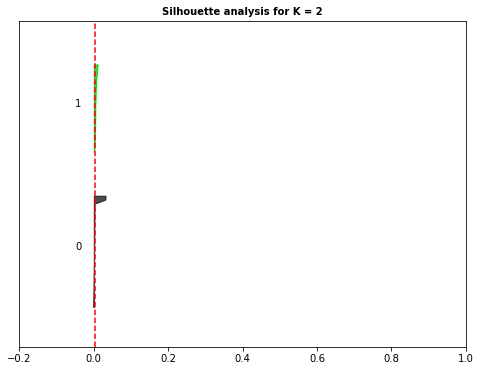

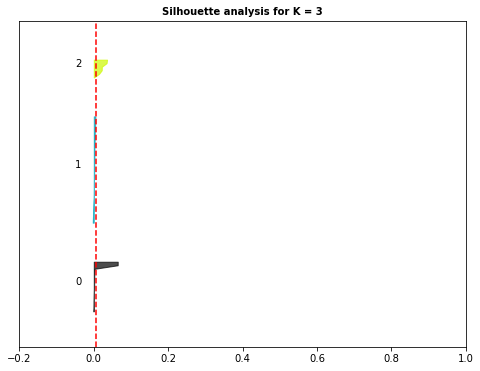

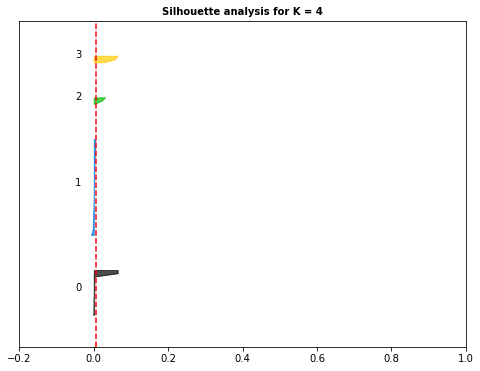

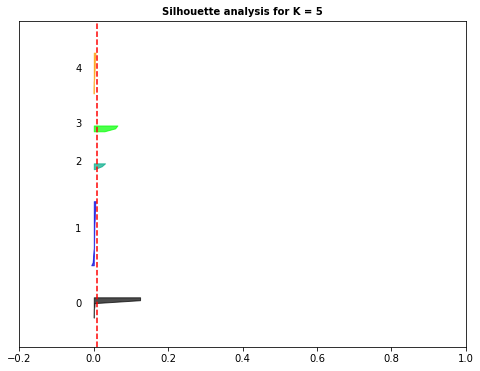

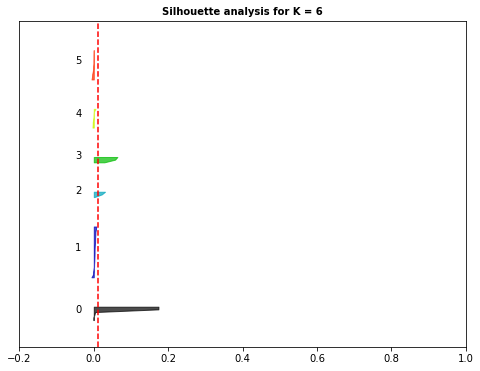

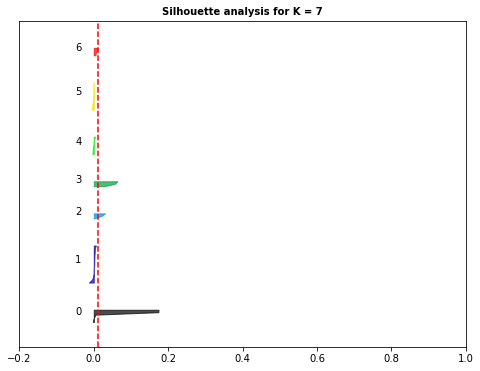

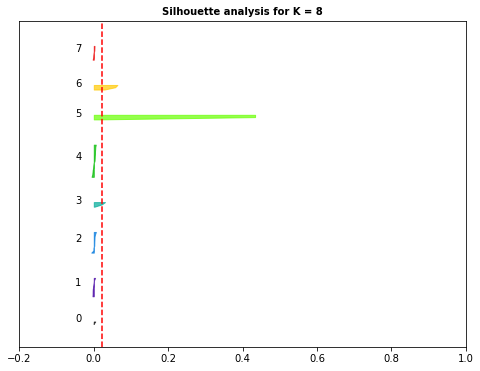

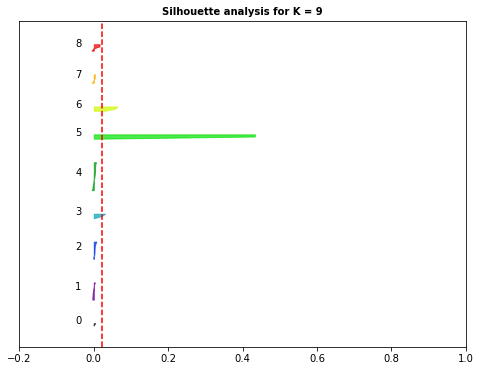

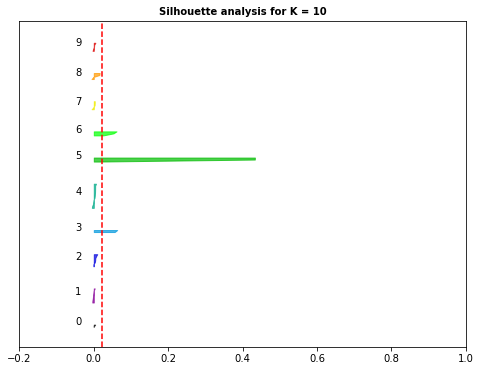

In [400]:
silhouette(kmeans_results, final_df, plot=True)

In [401]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

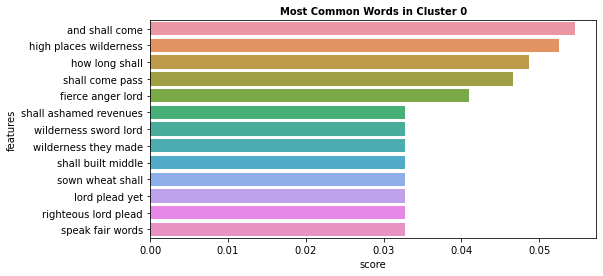

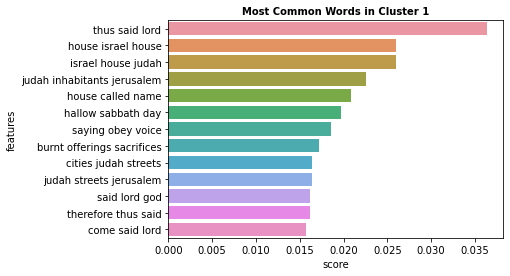

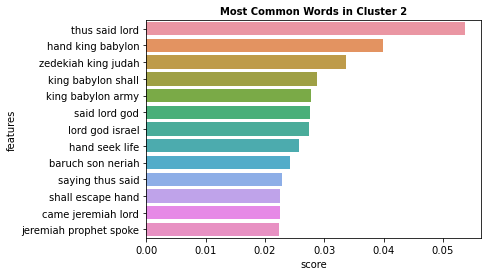

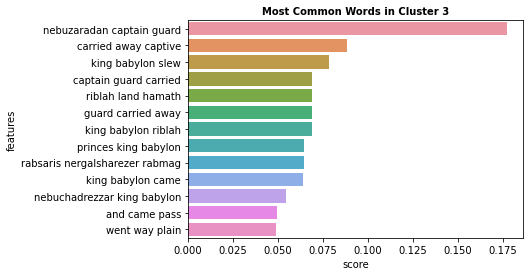

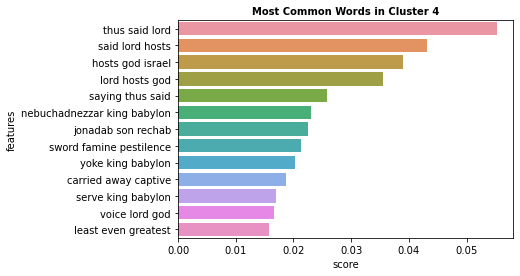

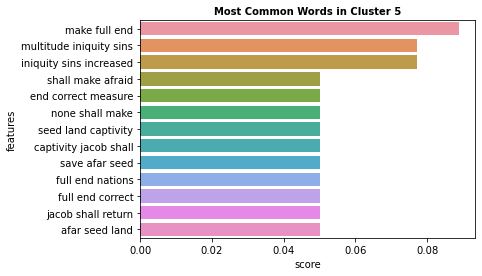

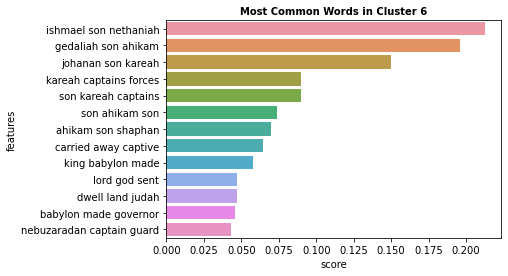

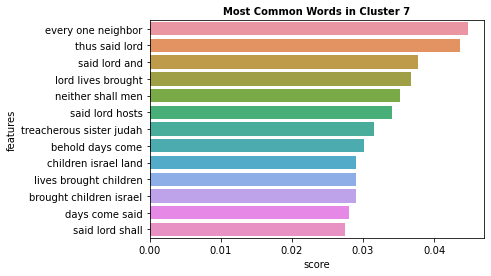

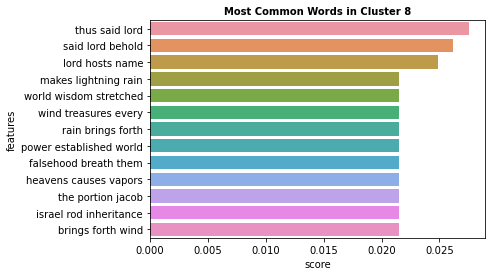

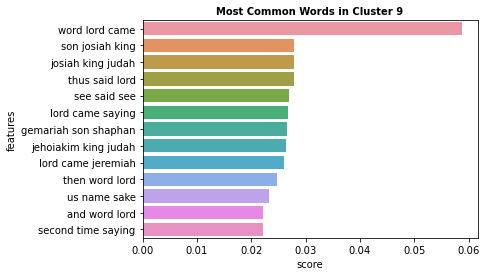

In [402]:
best_result = 10
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [403]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

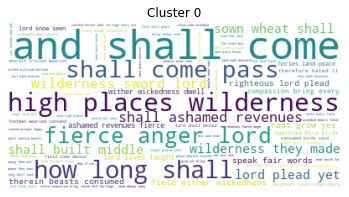

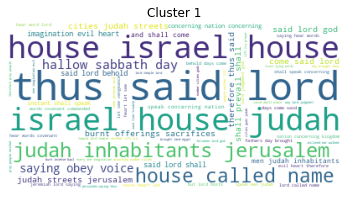

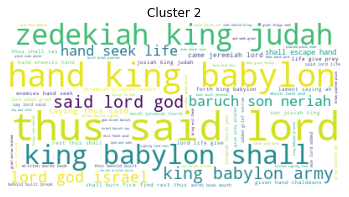

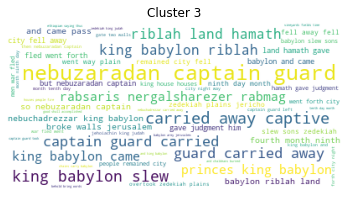

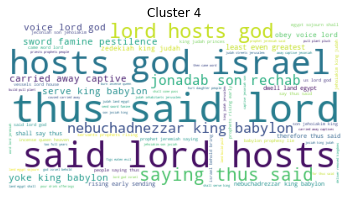

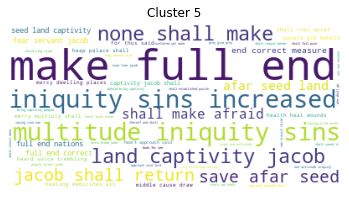

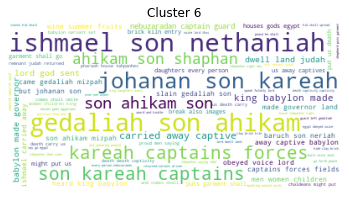

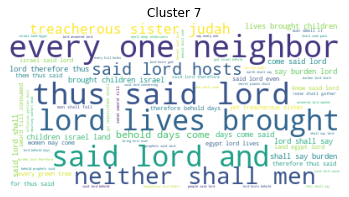

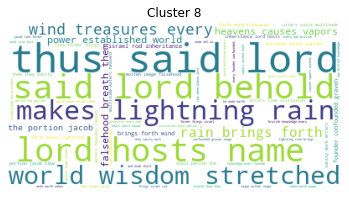

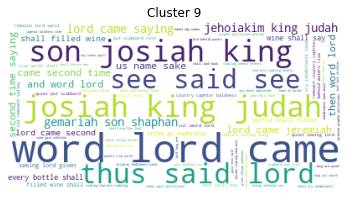

In [404]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [405]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Jeremias_1,"'words', 'jeremiah', 'son', 'hilkiah', ',', 'p...",9
101,Jeremias_2,"'moreover', 'word', 'lord', 'came', ',', 'sayi...",1
102,Jeremias_3,"'say', ',', 'man', 'put', 'away', 'wife', ',',...",7
103,Jeremias_4,"'return', ',', 'israel', ',', 'said', 'lord', ...",0
104,Jeremias_5,"'run', 'fro', 'streets', 'jerusalem', ',', 'se...",1


In [406]:
print(df)

            Autor                                              Livro  label
100    Jeremias_1  'words', 'jeremiah', 'son', 'hilkiah', ',', 'p...      9
101    Jeremias_2  'moreover', 'word', 'lord', 'came', ',', 'sayi...      1
102    Jeremias_3  'say', ',', 'man', 'put', 'away', 'wife', ',',...      7
103    Jeremias_4  'return', ',', 'israel', ',', 'said', 'lord', ...      0
104    Jeremias_5  'run', 'fro', 'streets', 'jerusalem', ',', 'se...      1
105    Jeremias_6  'children', 'benjamin', ',', 'gather', 'flee',...      4
106    Jeremias_7  'word', 'came', 'jeremiah', 'lord', ',', 'sayi...      1
107    Jeremias_8  'time', ',', 'said', 'lord', ',', 'shall', 'br...      4
108    Jeremias_9  'oh', 'head', 'waters', ',', 'eyes', 'fountain...      7
109   Jeremias_10  'hear', 'word', 'lord', 'speaks', ',', 'house'...      8
110   Jeremias_11  'word', 'came', 'jeremiah', 'lord', 'saying', ...      1
111   Jeremias_12  'righteous', ',', 'lord', ',', 'plead', ':', '...      0
112   Jeremi